**What i'm doing here**
***
This step is my study of color through time, I'll plot all hsv and rgb count's of parameter ocurrency in all color palettes previously calculated.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import colorsys
import seaborn as sns

**Reading the necessary csv's**

In [92]:
classes = pd.read_csv("CSV's/Model_classes.csv")

In [101]:
data = pd.read_csv("CSV's/trainset_color_palletes.csv")
data = data.iloc[:,1:]

**Transforming the dataset to a agregation of all RGB Colors**

In [102]:
color = pd.DataFrame()

for i in classes['index']:
    tmp = data[data['style'] == i]
    tmp_2 = pd.DataFrame(columns= ['r','g','b', 'movement'])
    tmp_2.r = pd.concat([tmp.c1_r, tmp.c2_r, tmp.c3_r, tmp.c4_r, tmp.c5_r], axis=0)
    tmp_2.g = pd.concat([tmp.c1_g, tmp.c2_g, tmp.c3_g, tmp.c4_g, tmp.c5_g], axis=0)
    tmp_2.b = pd.concat([tmp.c1_b, tmp.c2_b, tmp.c3_b, tmp.c4_b, tmp.c5_b], axis=0)
    tmp_2['movement'] = i  
    color = pd.concat([color, tmp_2], axis=0)


**Resampling all rgb values to 0-255 range**

In [103]:
color.r = round(color.r*255)
color.g = round(color.g*255)
color.b = round(color.b*255)

color = color.reset_index(drop = True)

In [26]:
color.head(5)

Unnamed: 0      r      g      b       movement  hue  saturation  lightness
0           0   47.0   46.0   42.0  Impressionism   12          11         19
1           1  176.0  176.0  138.0  Impressionism   16          22         69
2           2  200.0  197.0  186.0  Impressionism   12           7         79
3           3  167.0  166.0  166.0  Impressionism   94           0         65
4           4   74.0   56.0   53.0  Impressionism    2          28         29

**Creating HSV values from all dominant colors**

In [130]:
L_h = []
L_s = []
L_l = []

for row in color.iloc[:,:-1].values:
    h, s, l = colorsys.rgb_to_hsv(row[0], row[1], row[2])
    L_h.append(round(h*100))
    L_s.append(round(s*100))
    L_l.append(round(l*100))

In [140]:
color['hue'] = L_h
color['saturation'] = L_s
color['lightness'] = L_l

color.r = round(color.r*255)
color.g = round(color.g*255)
color.b = round(color.b*255)

**Ploting and saving the RGB plots per movement**

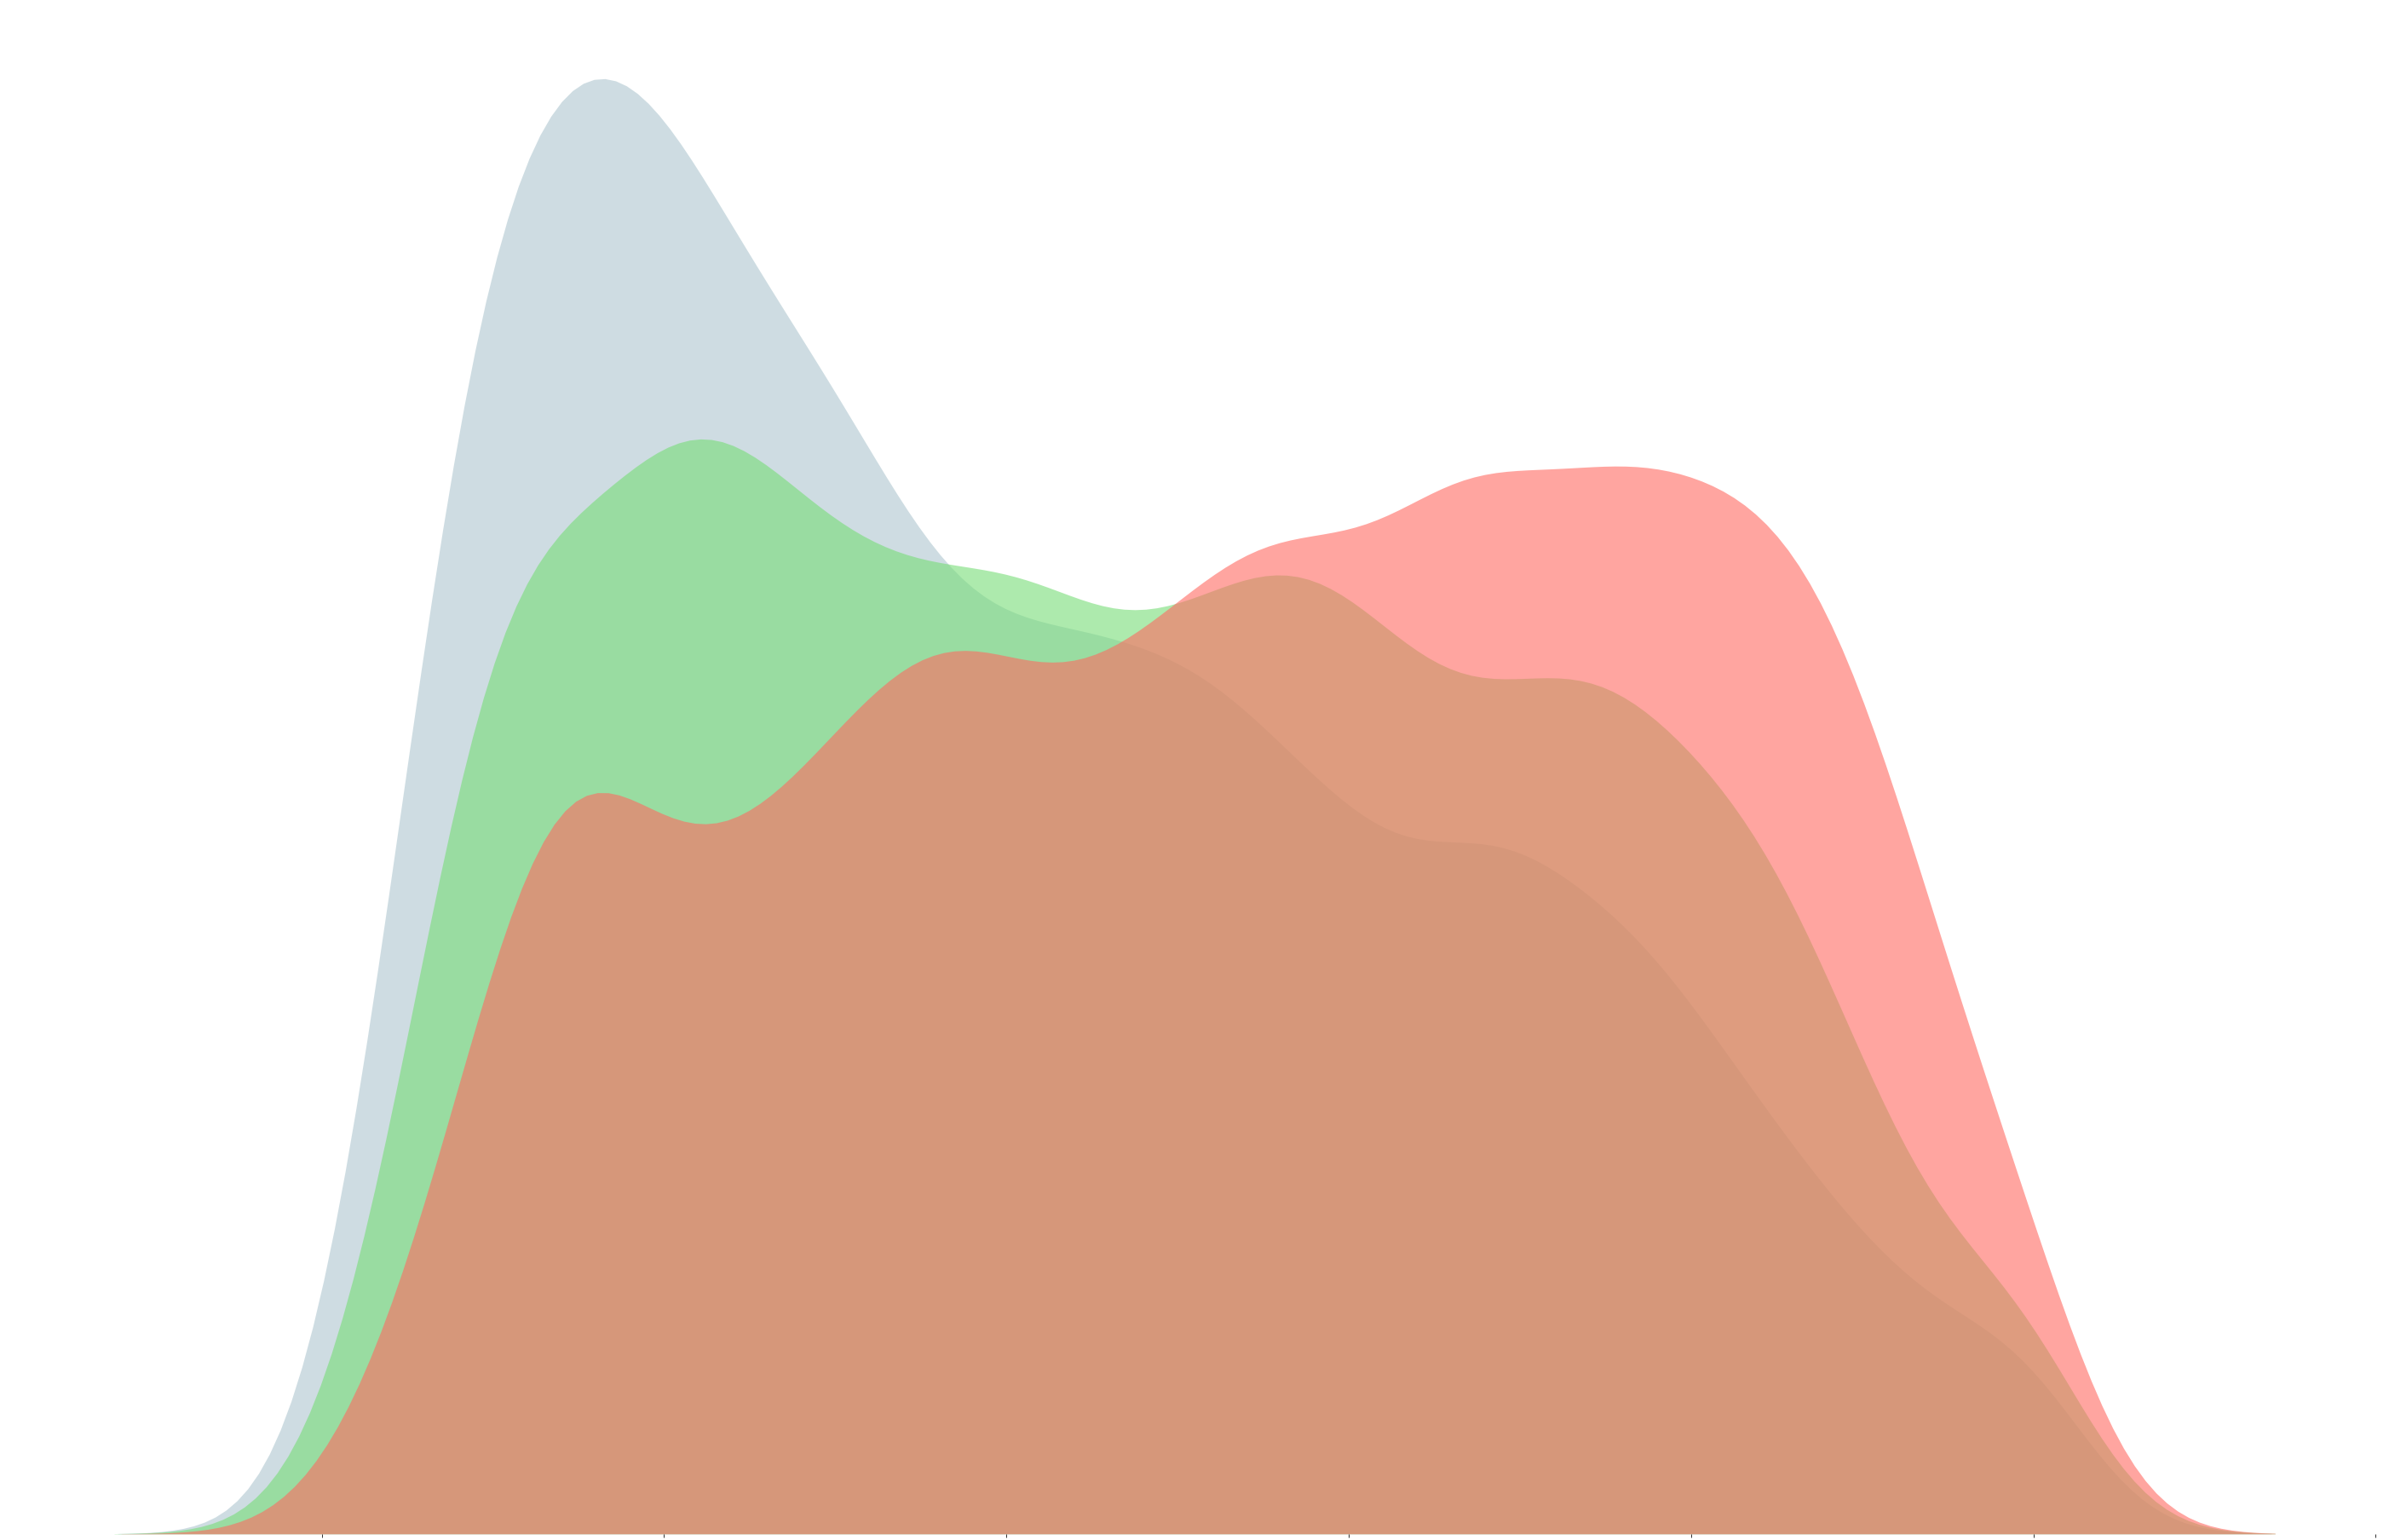

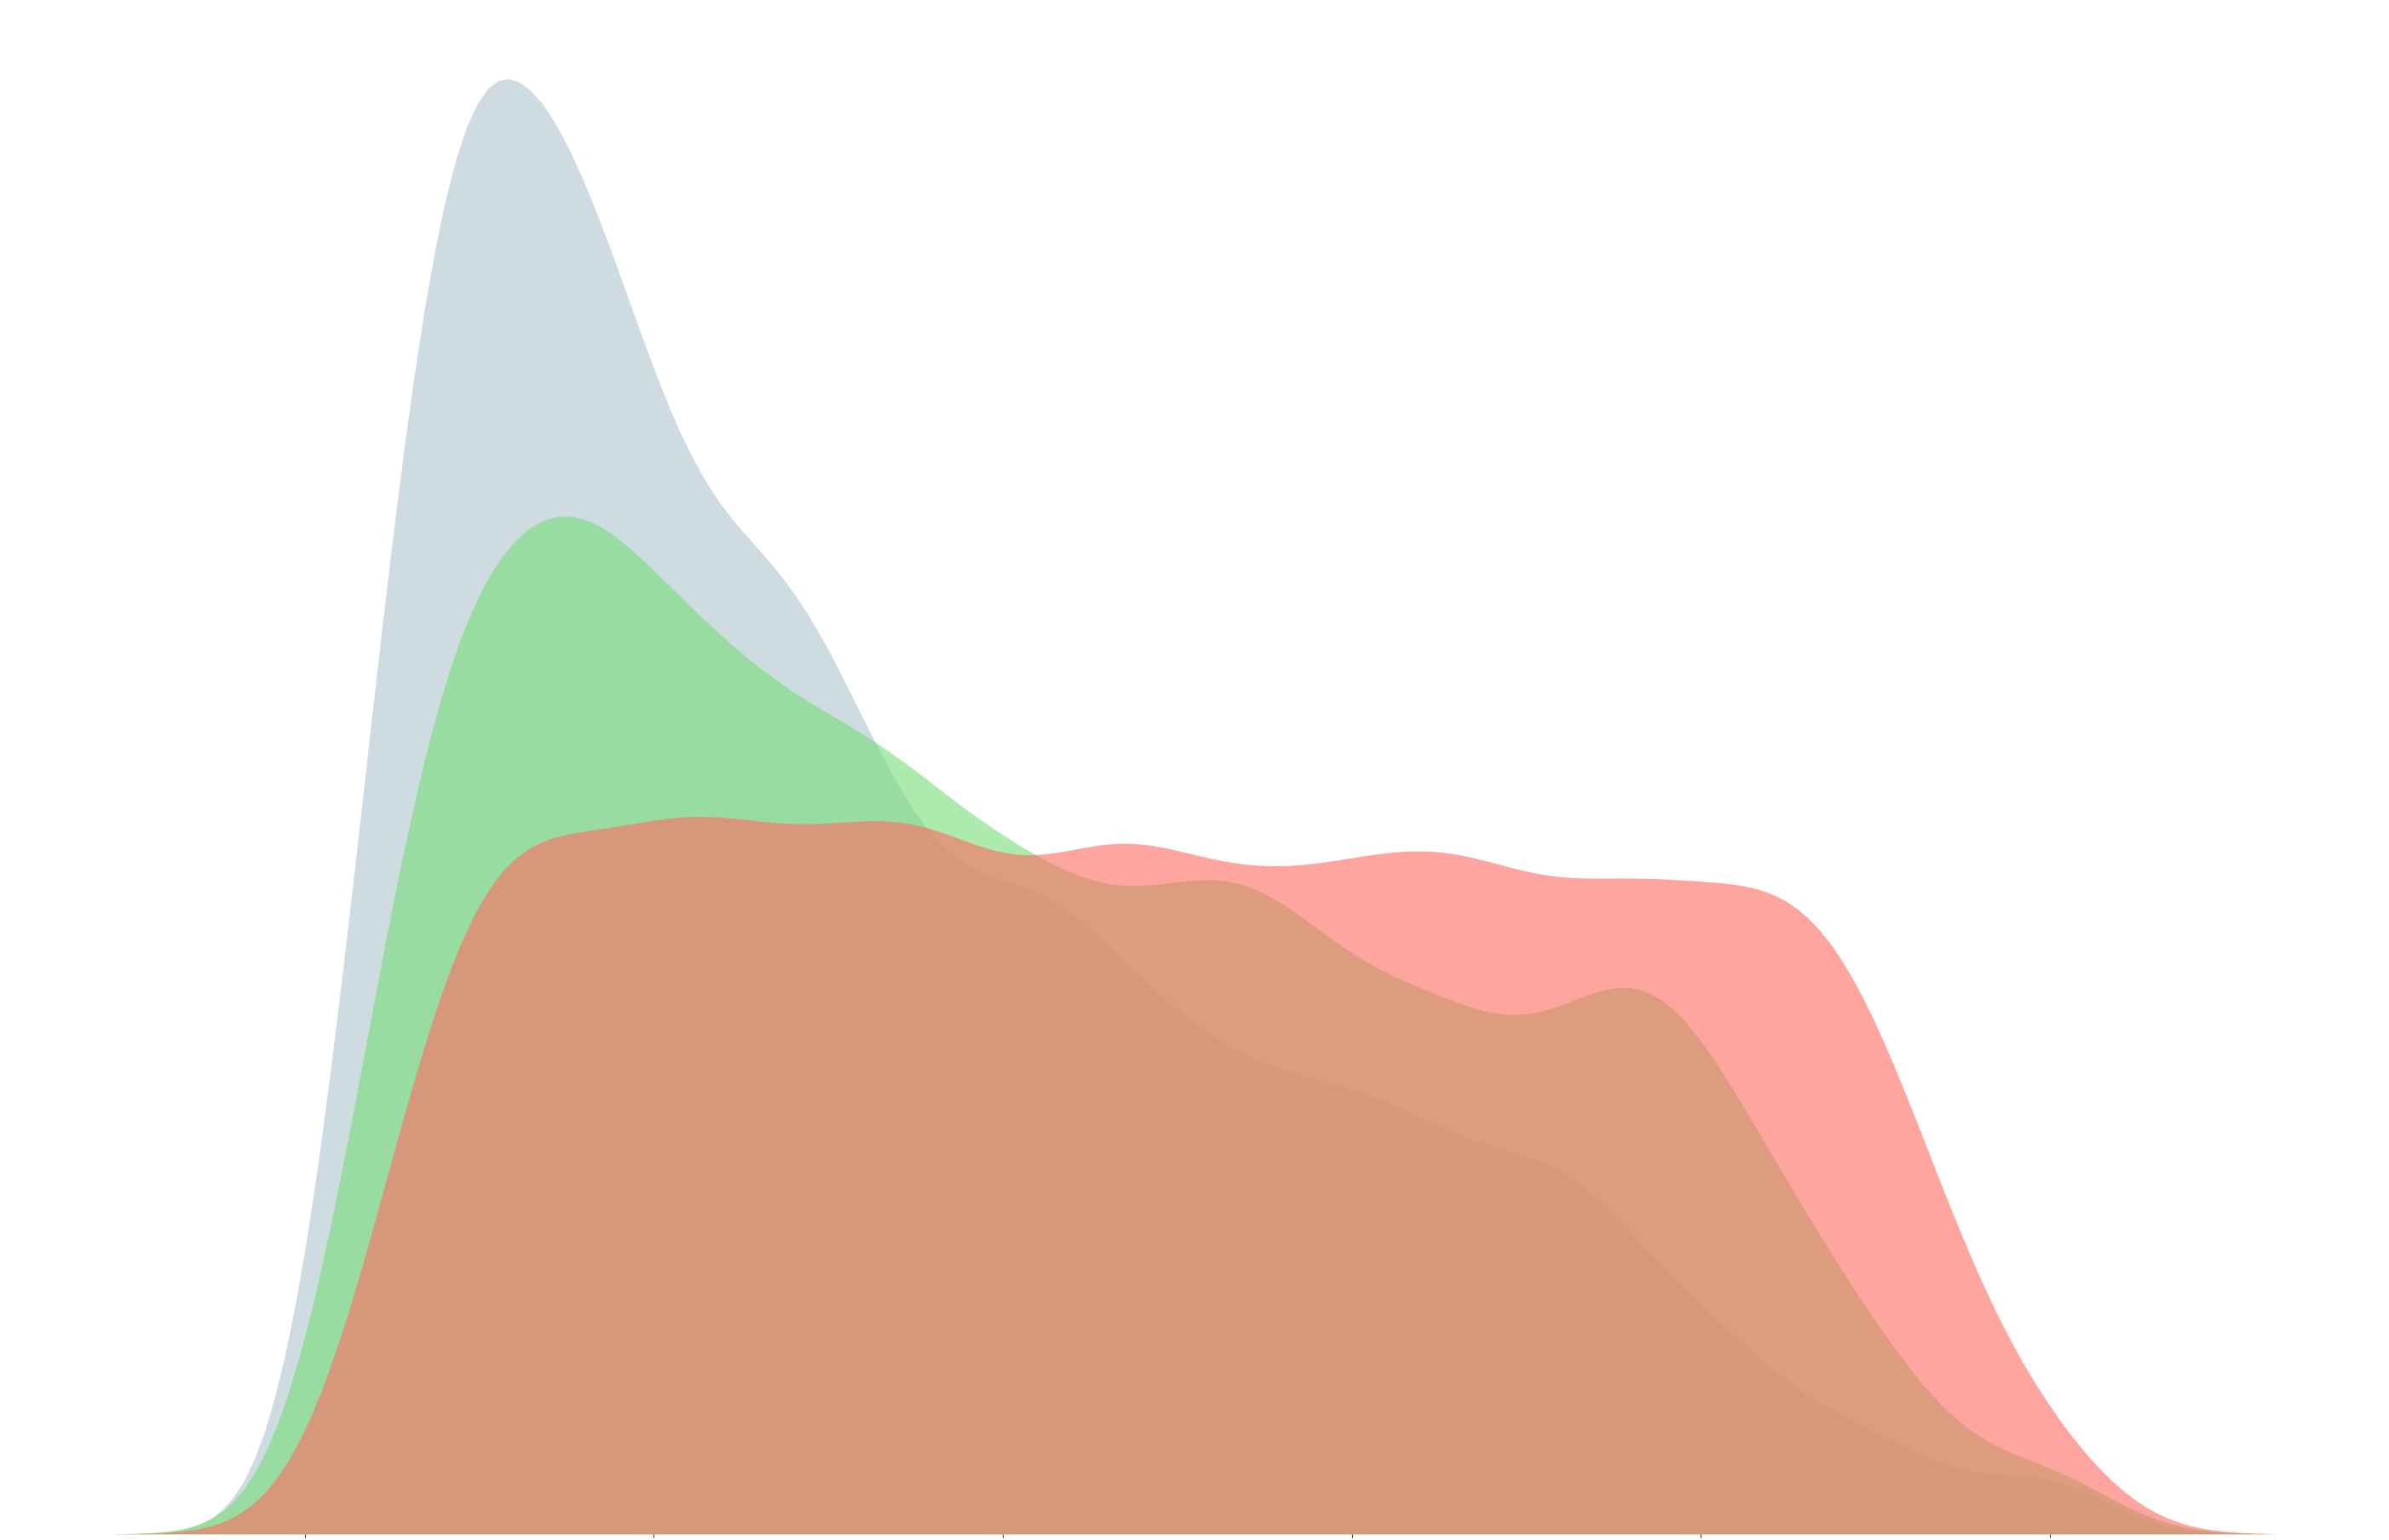

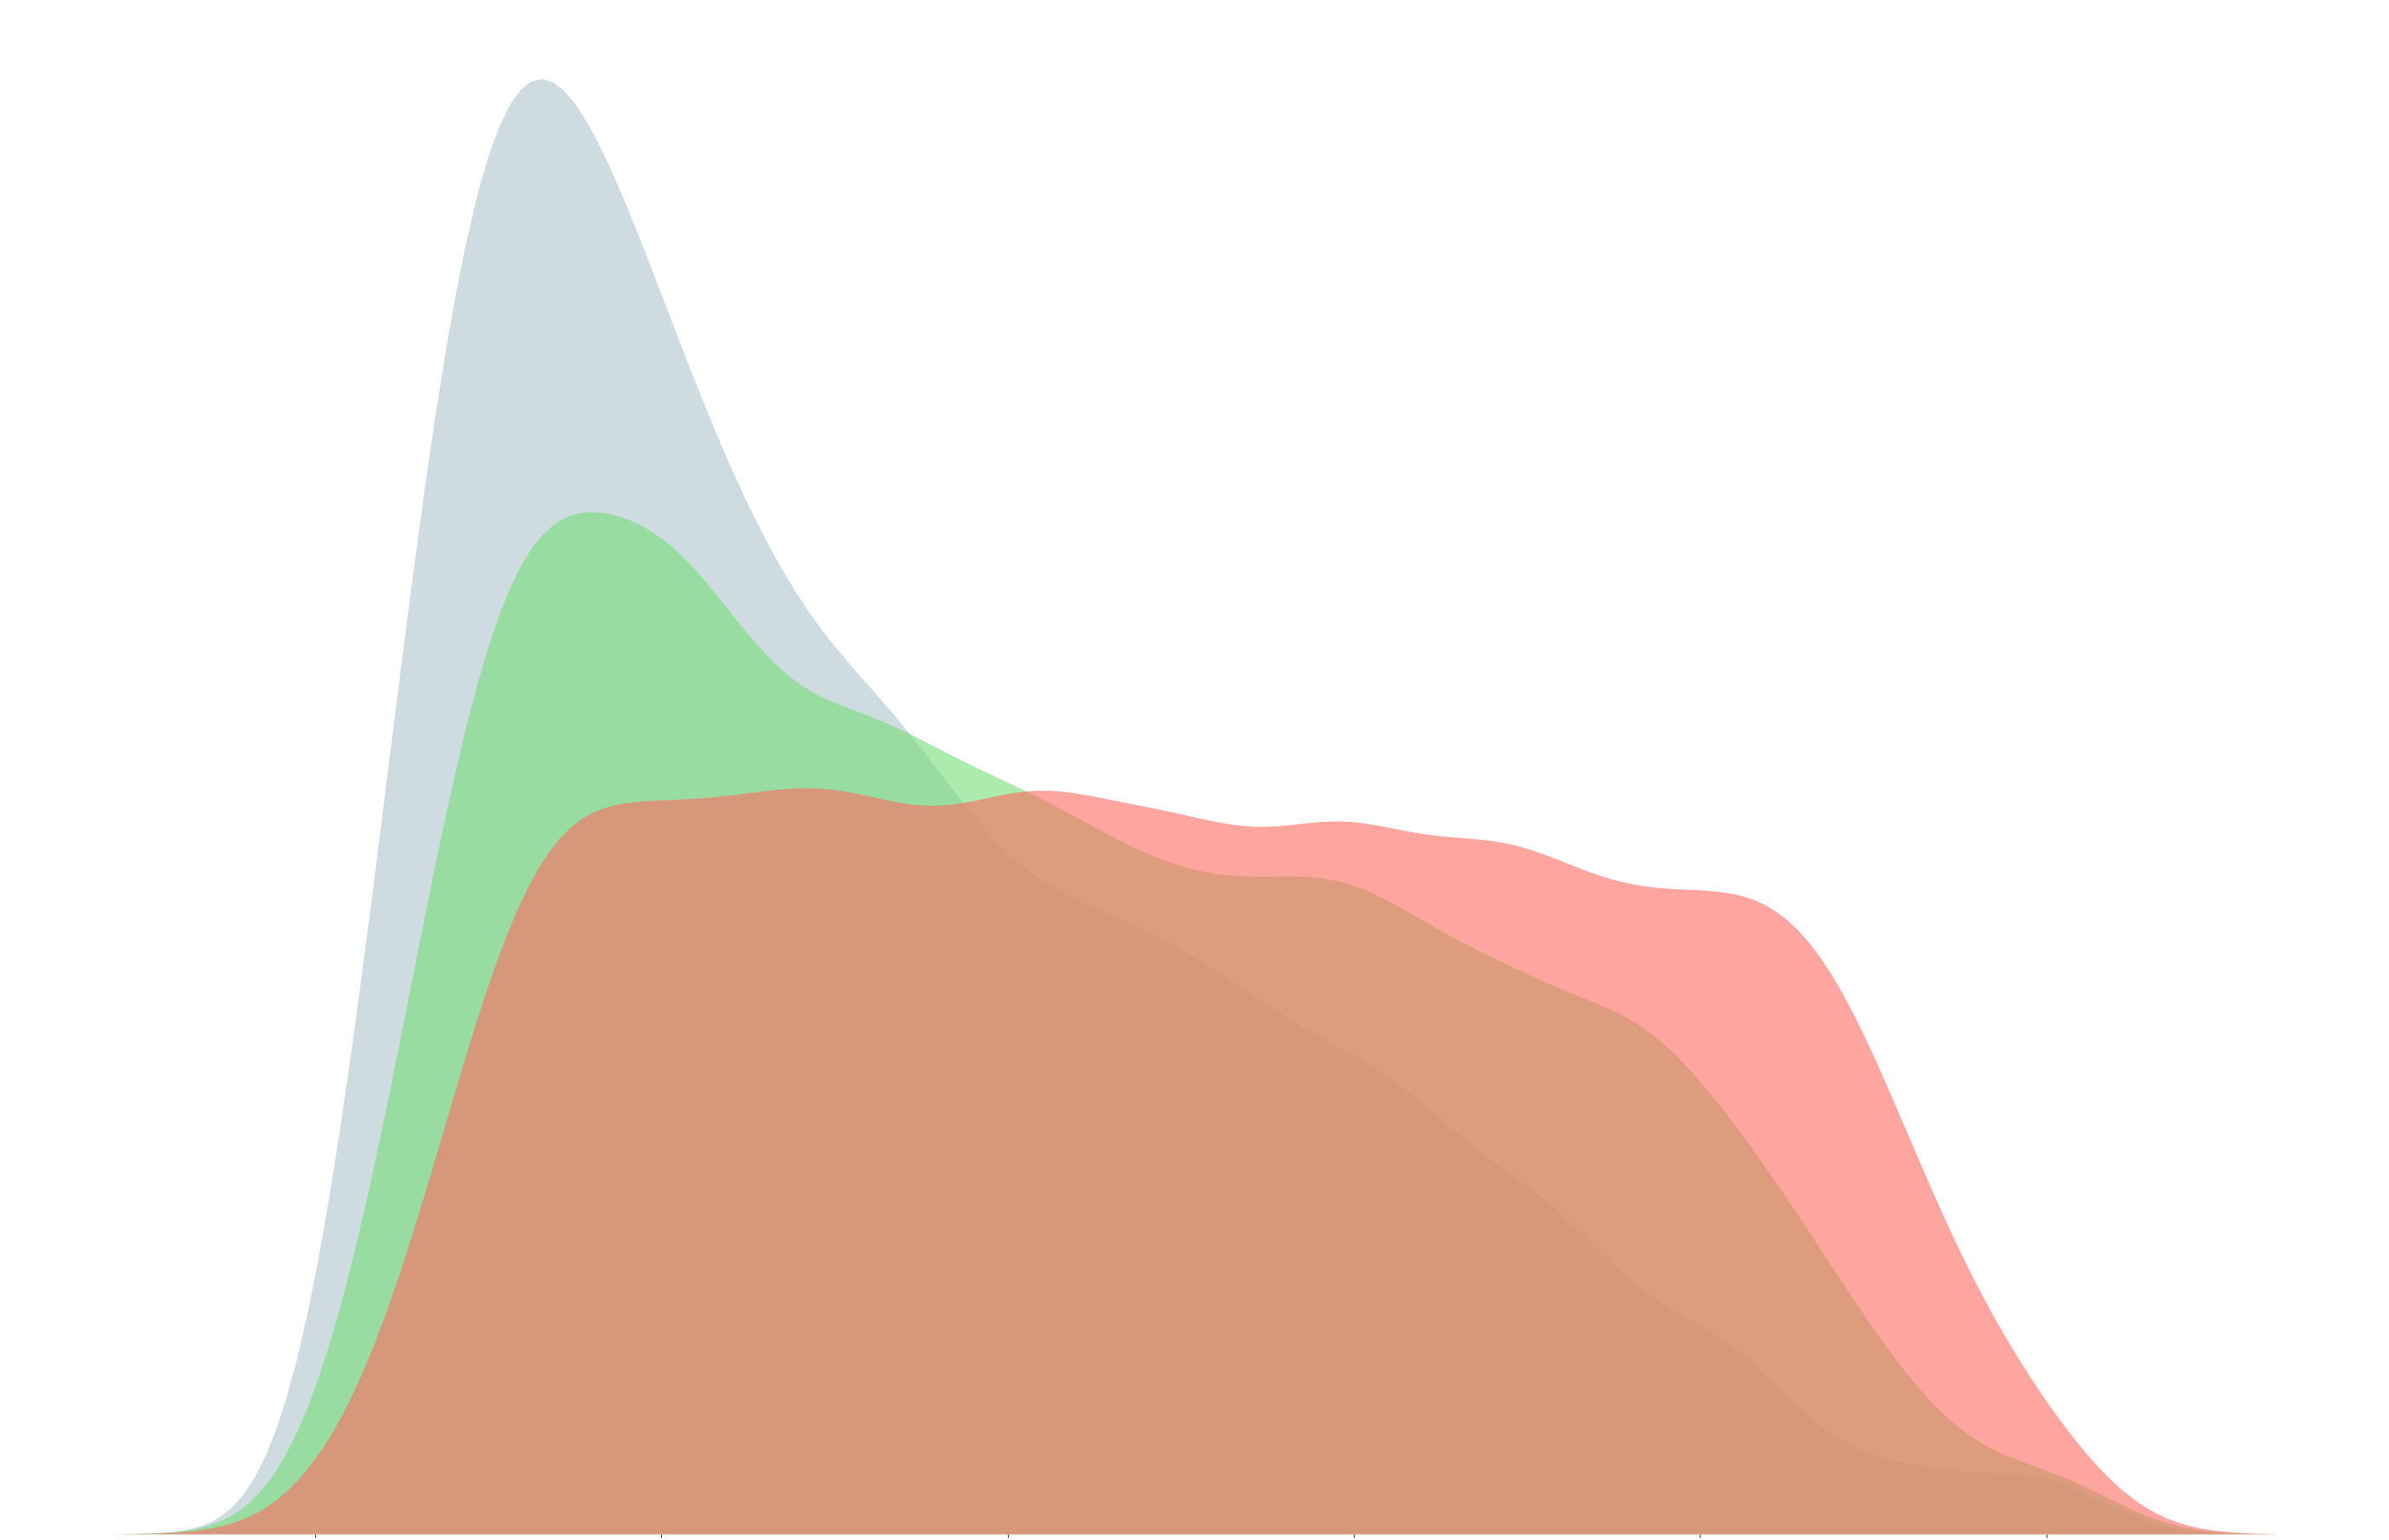

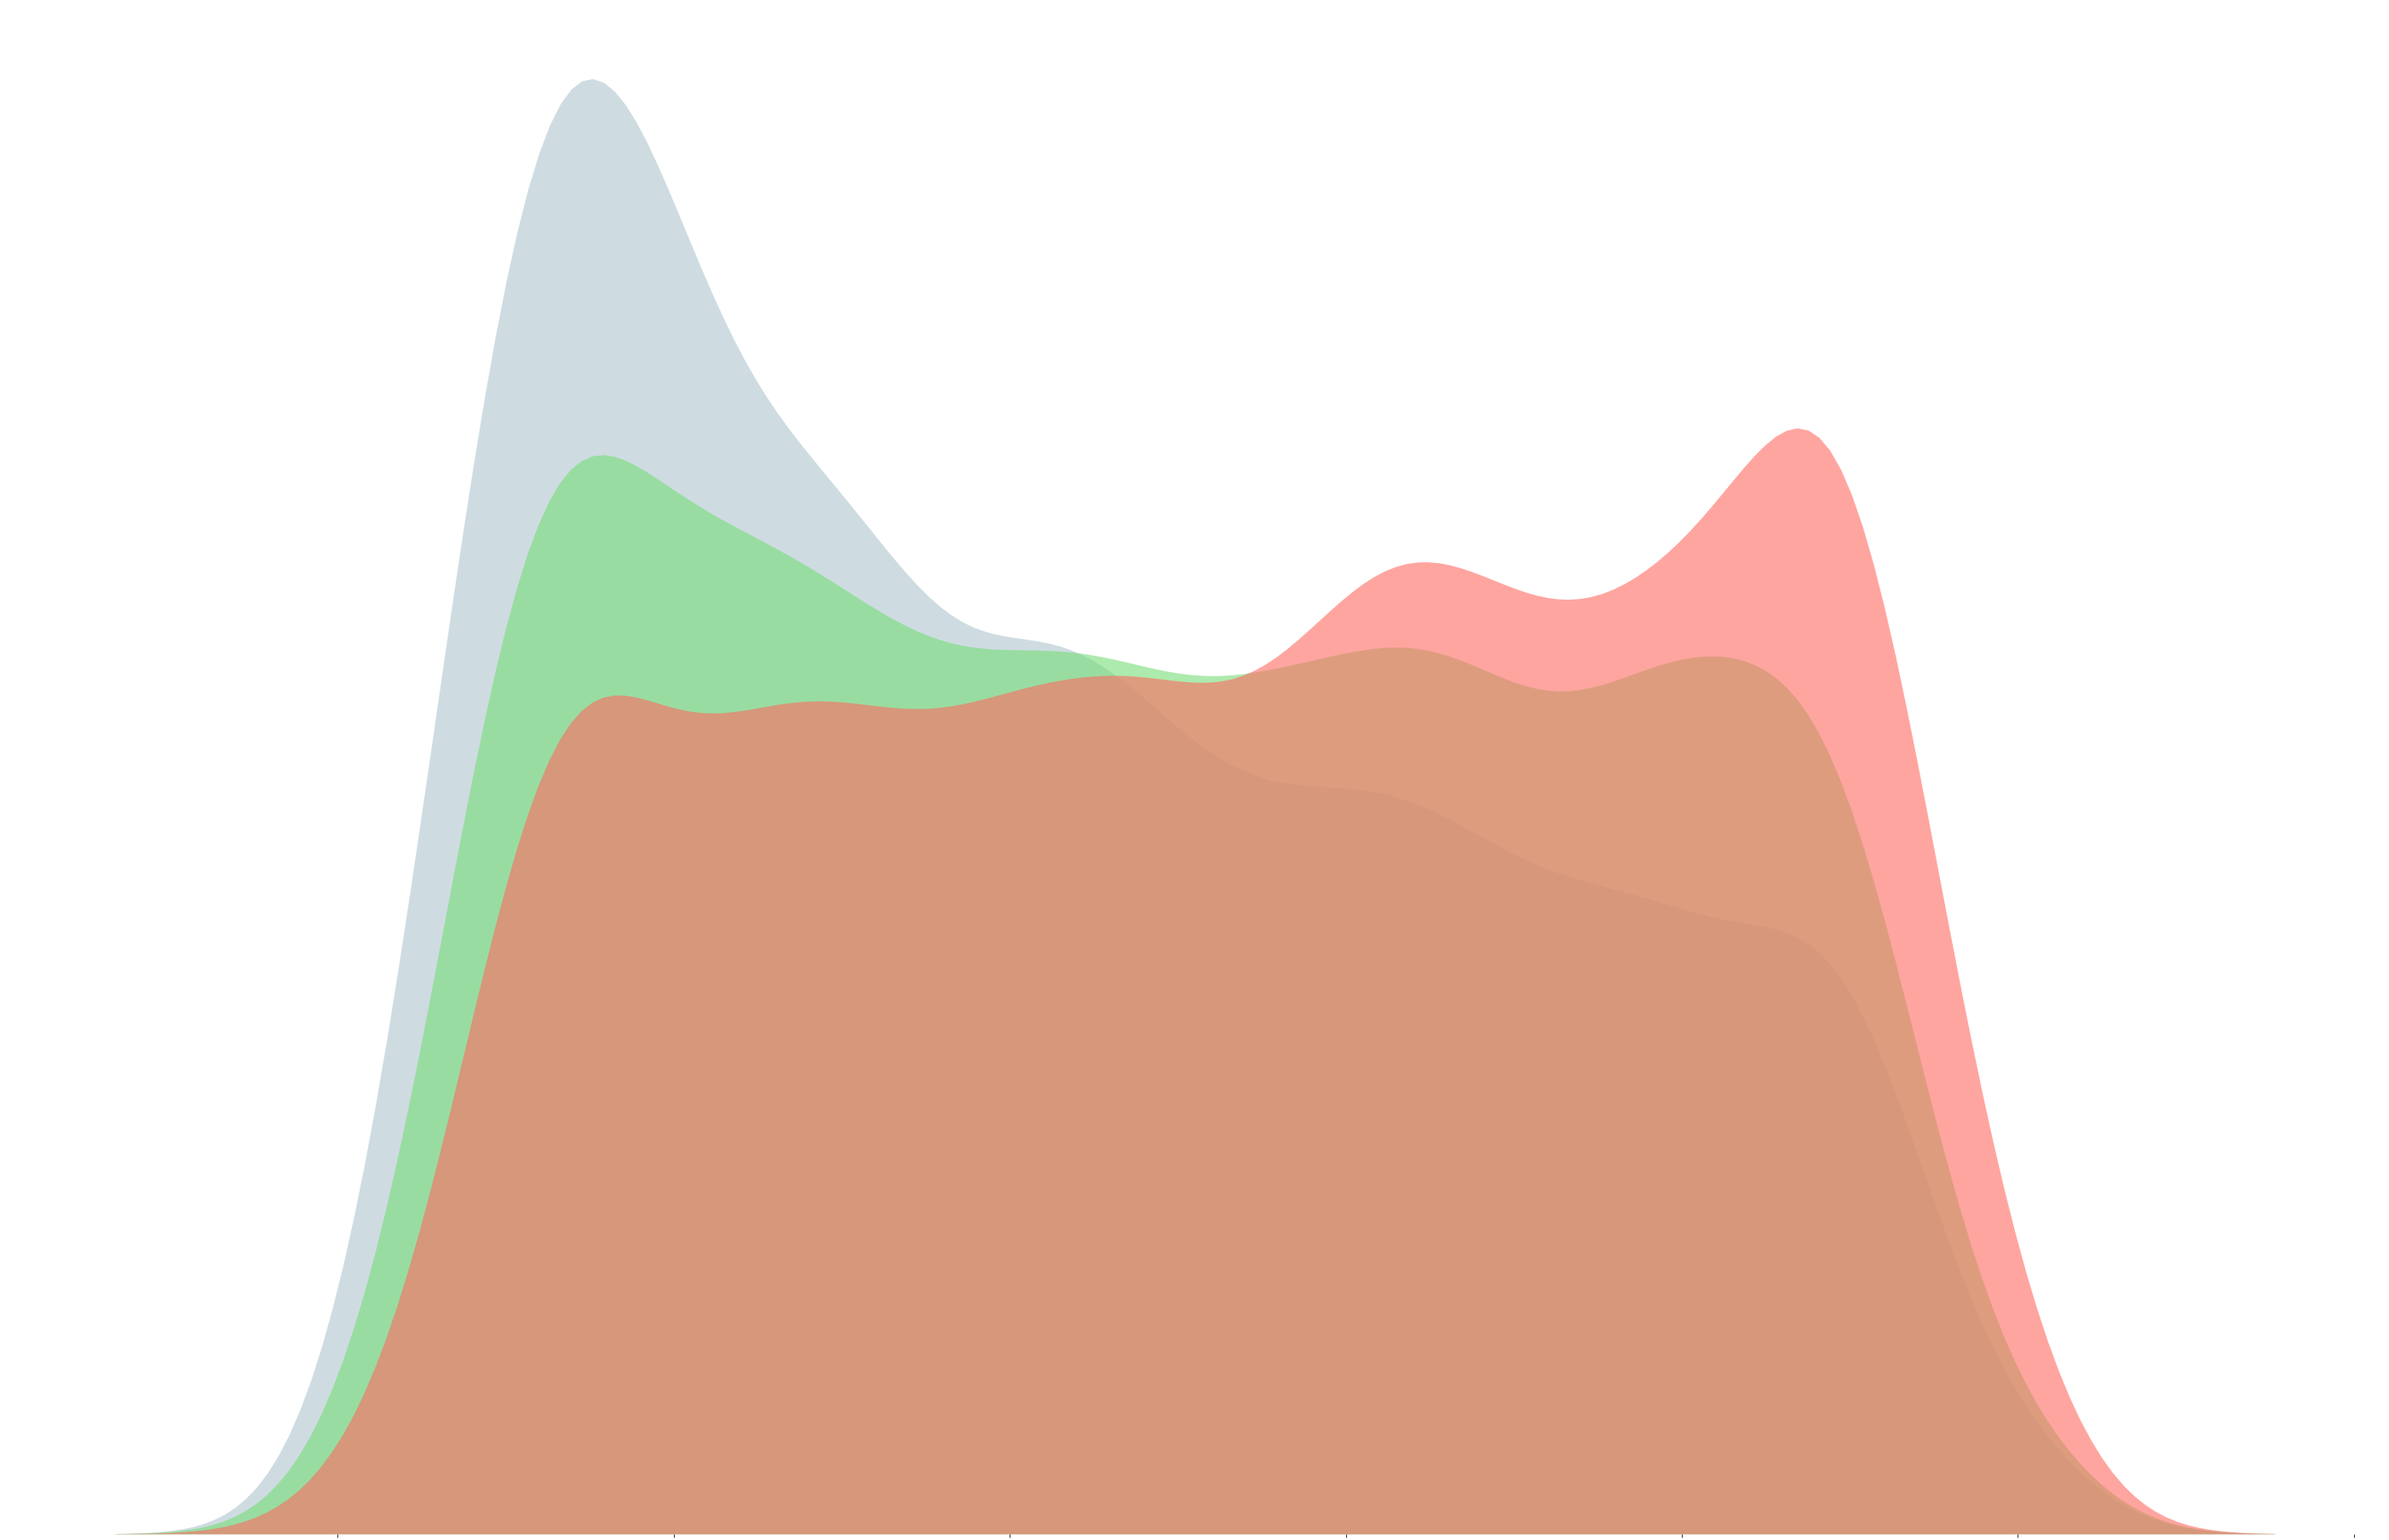

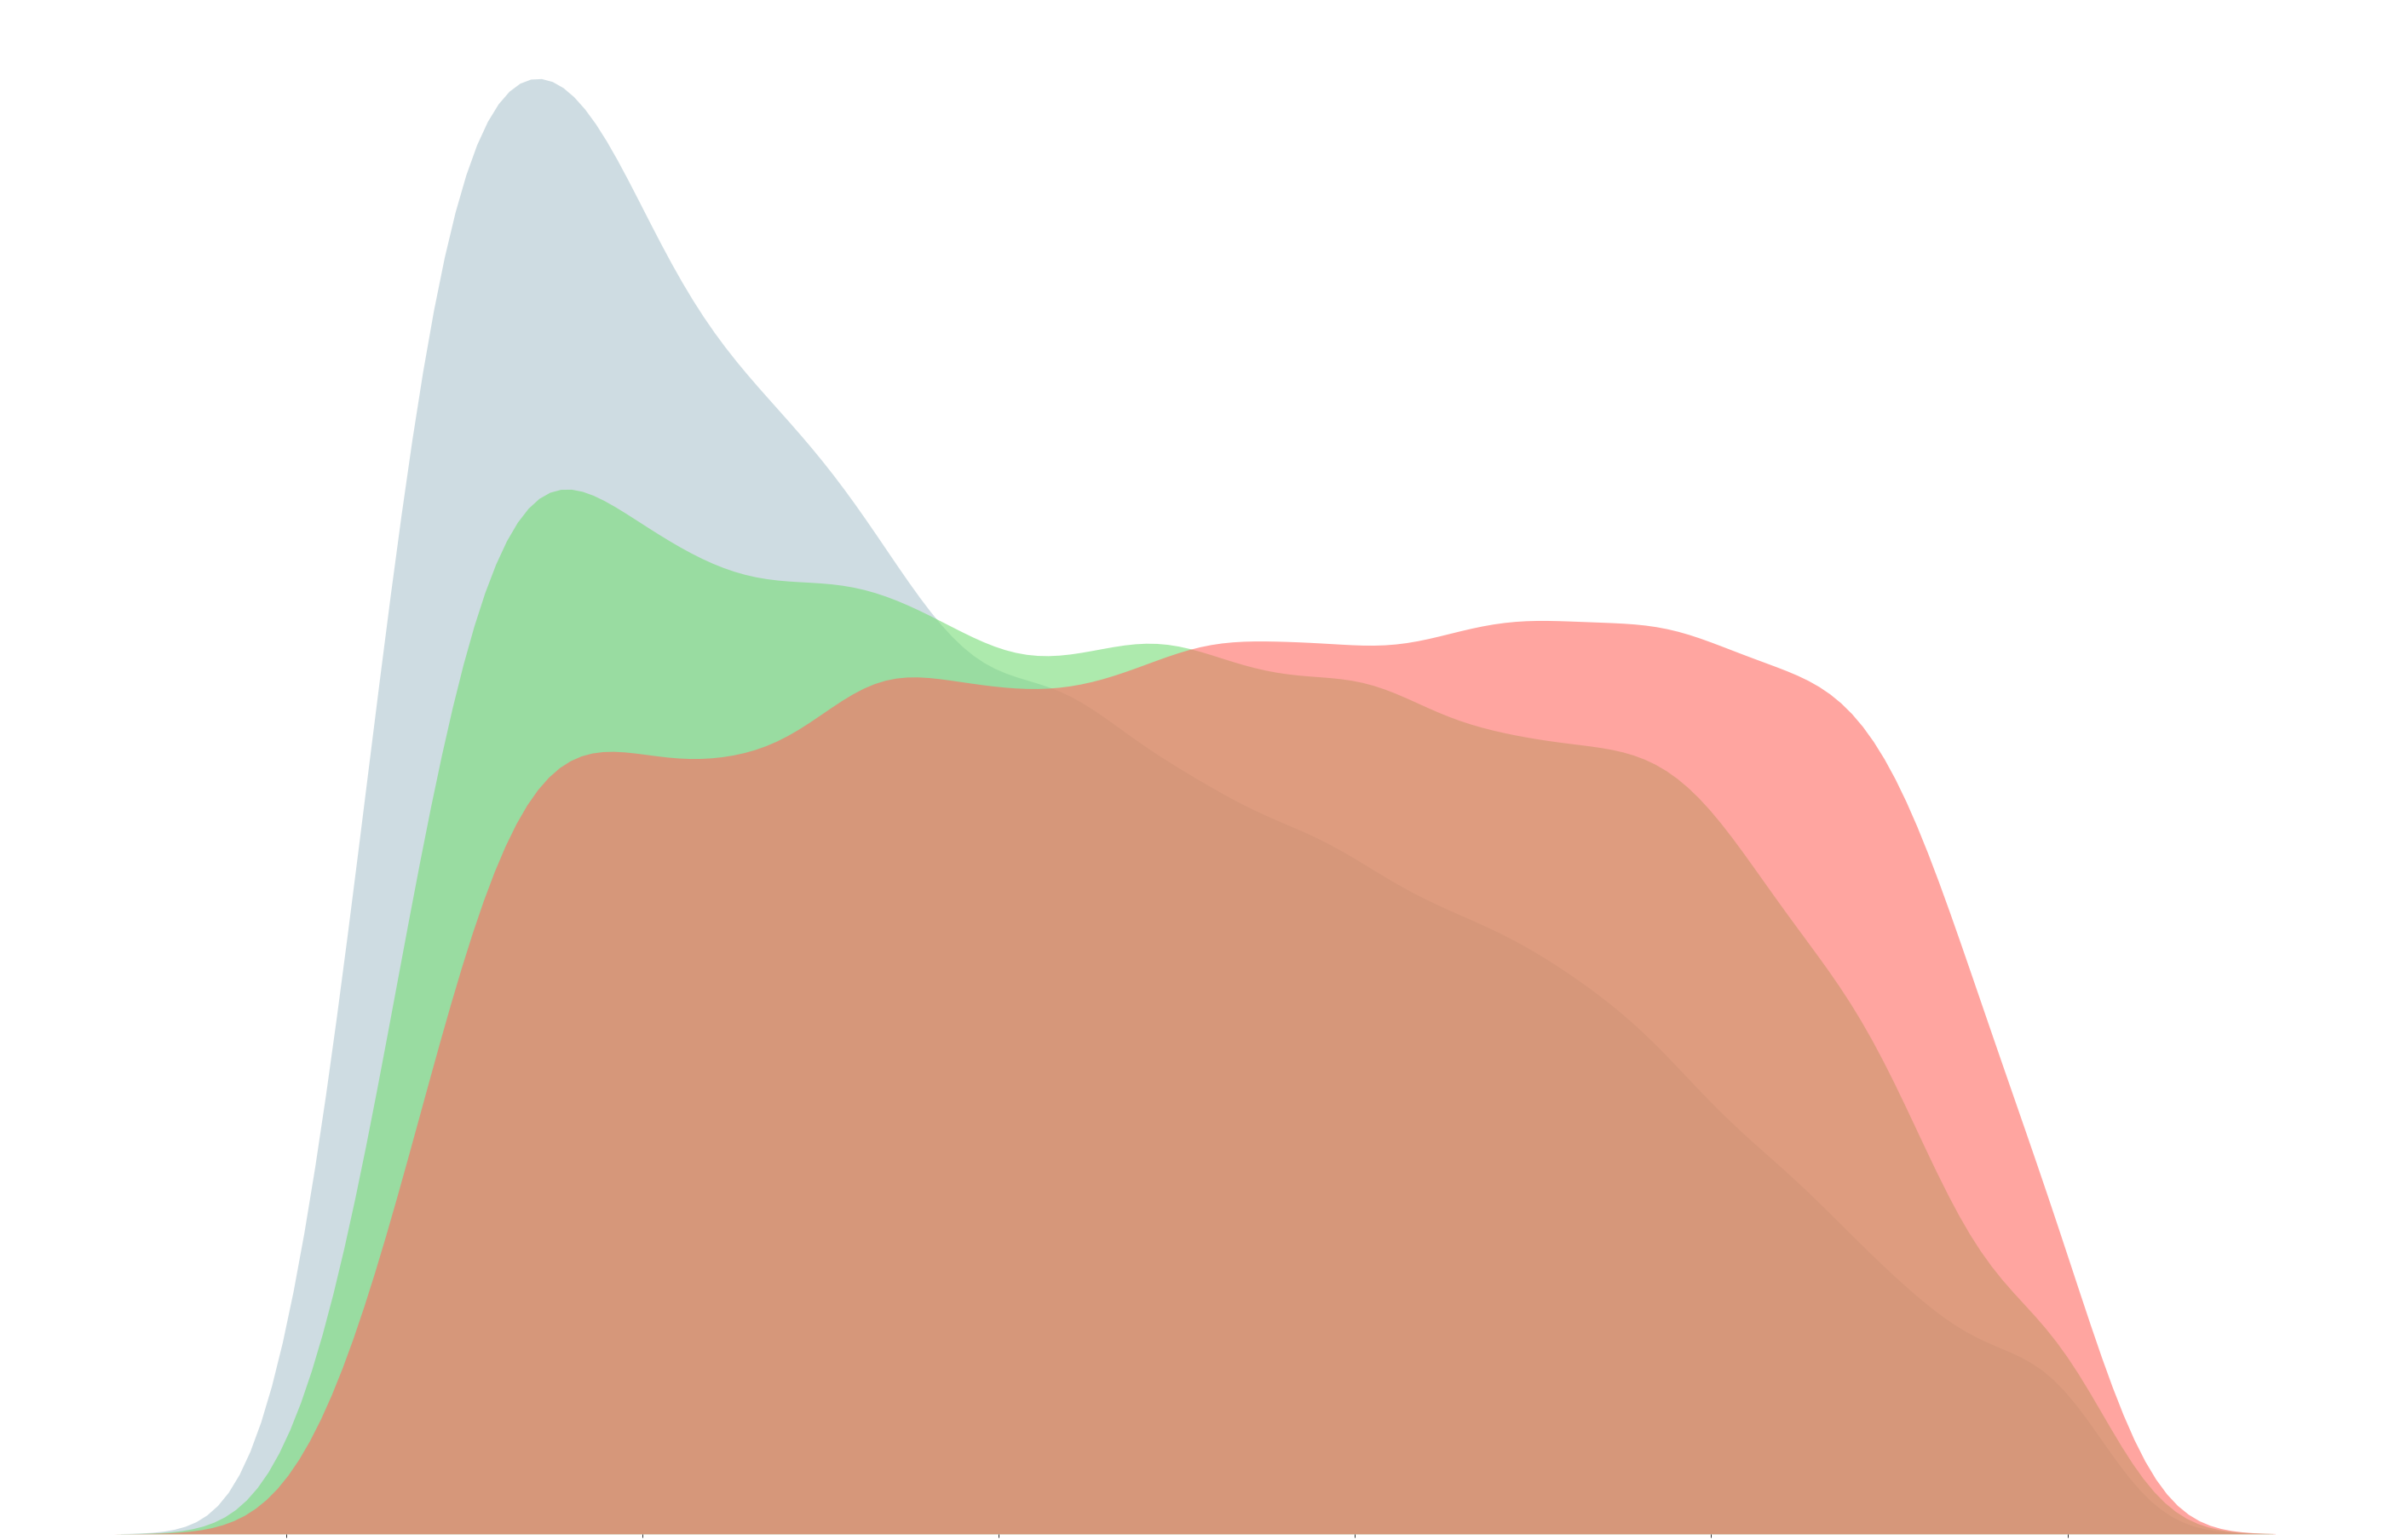

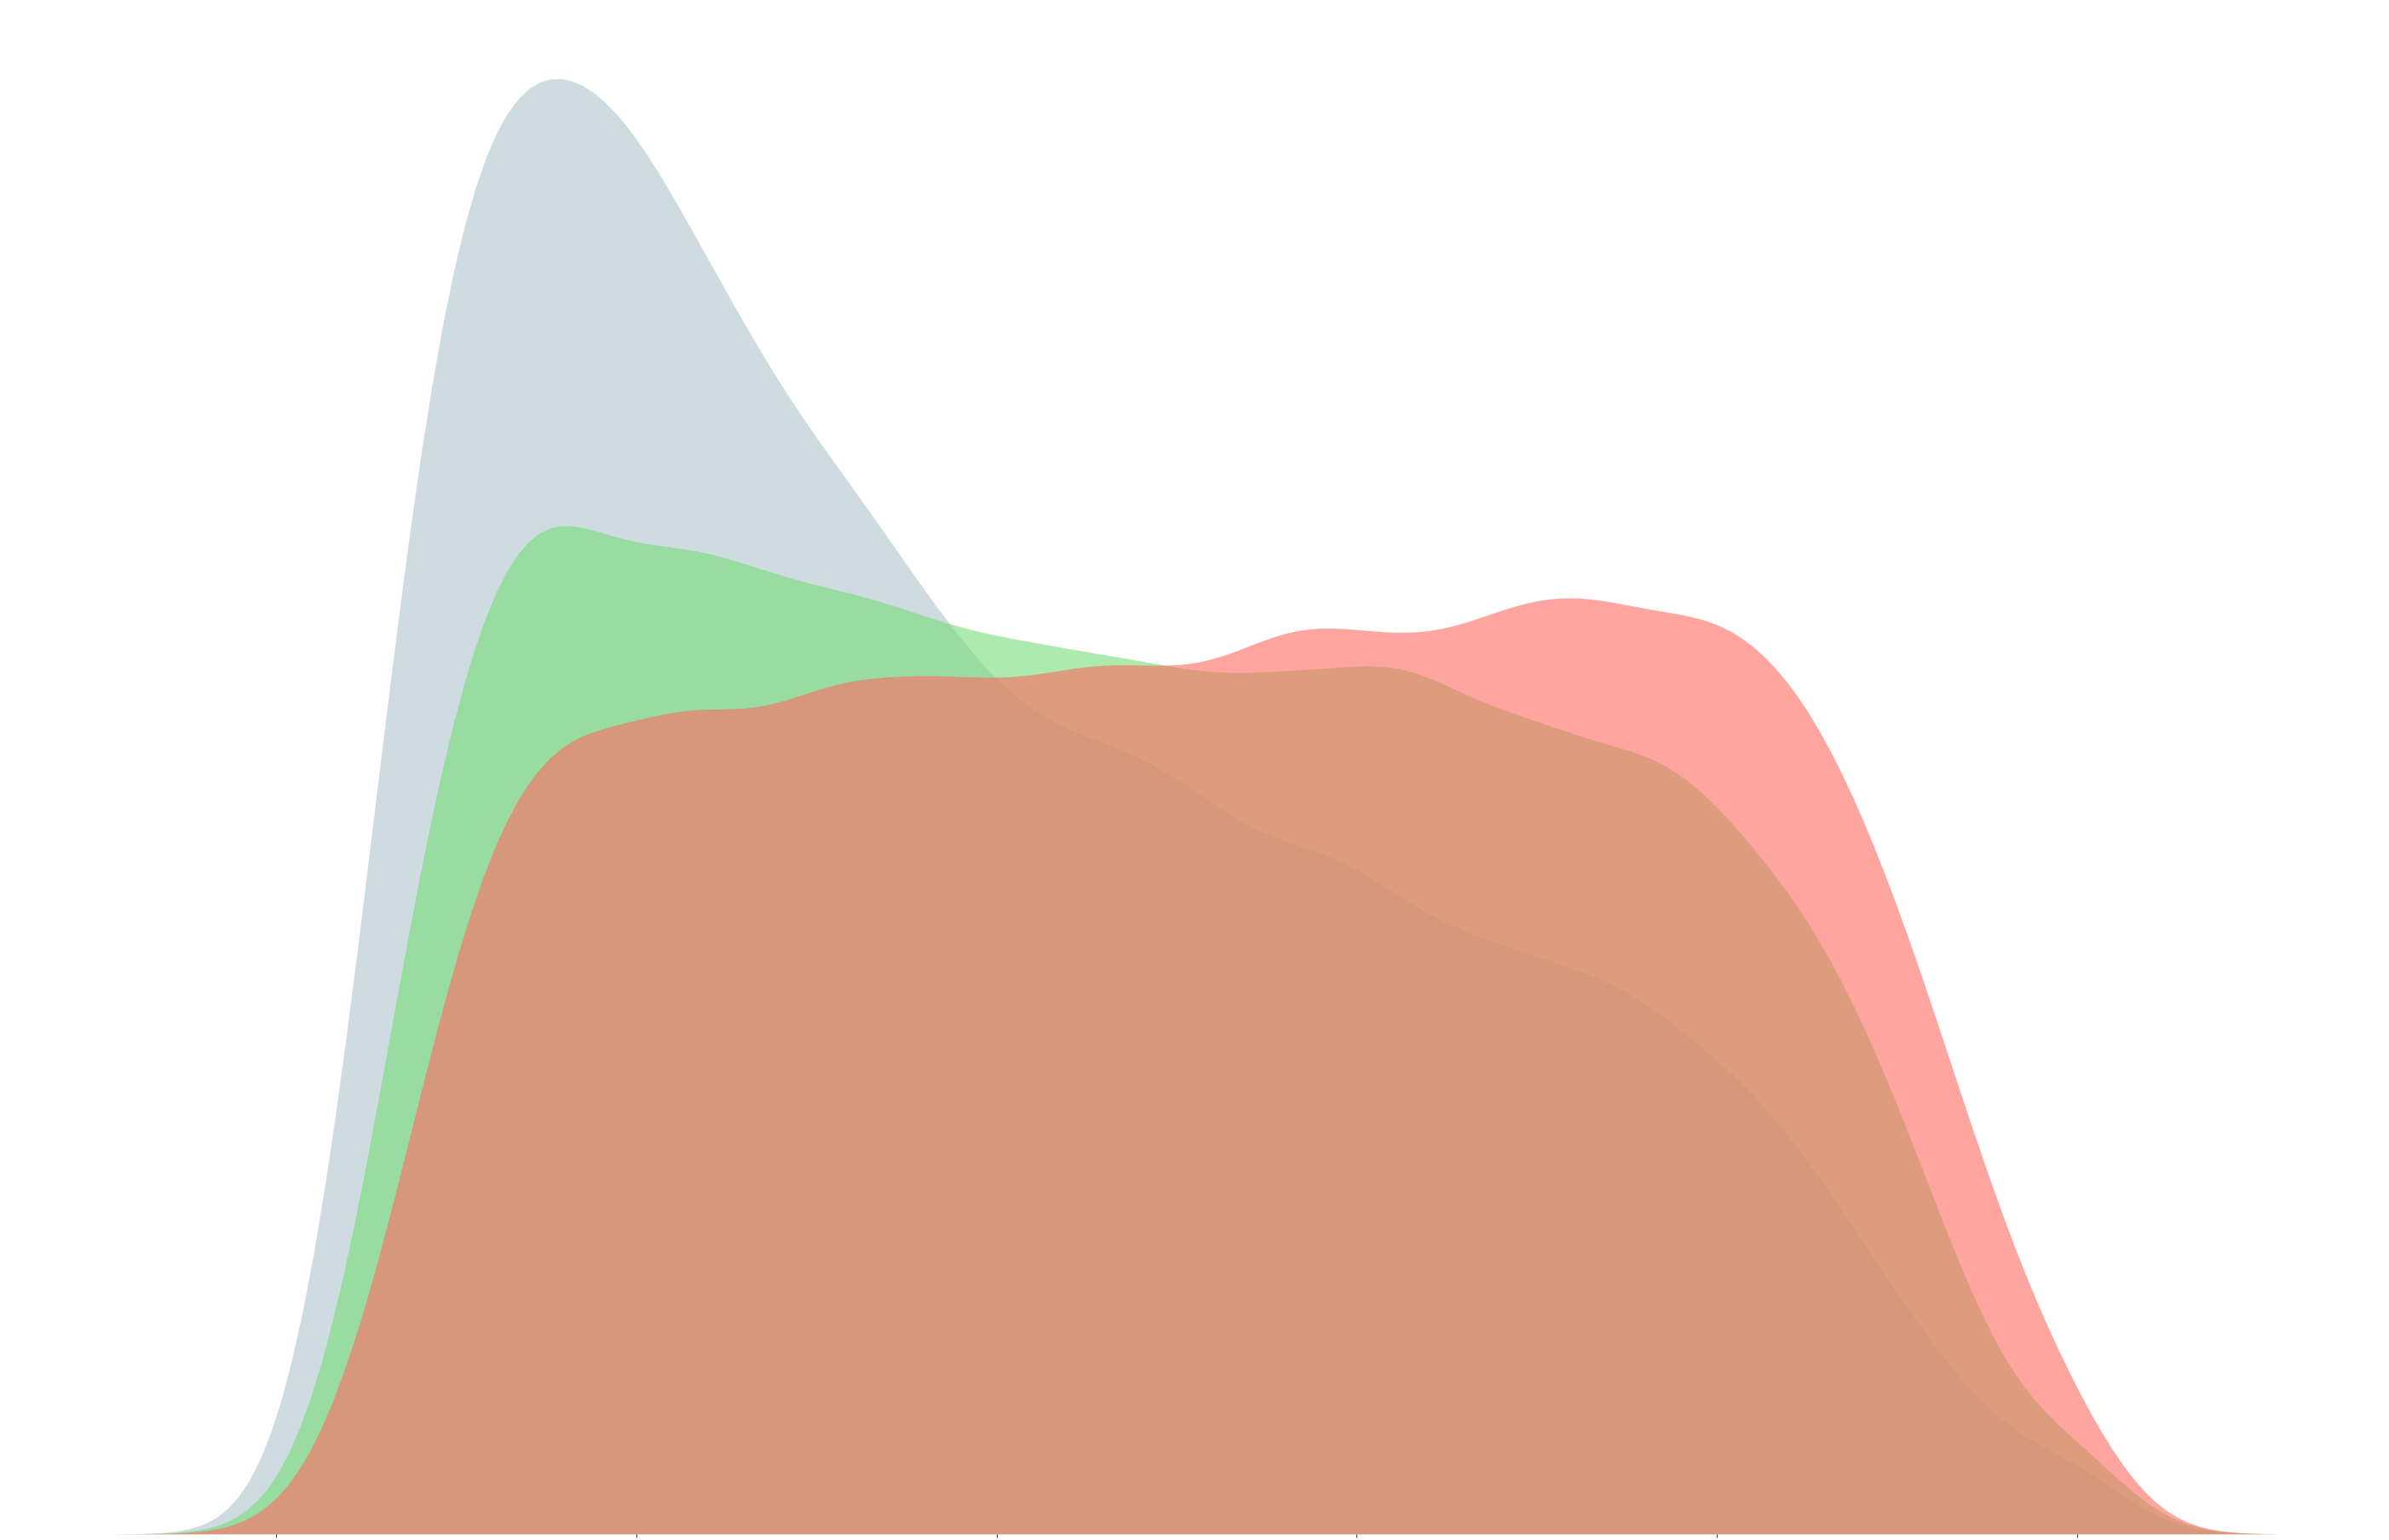

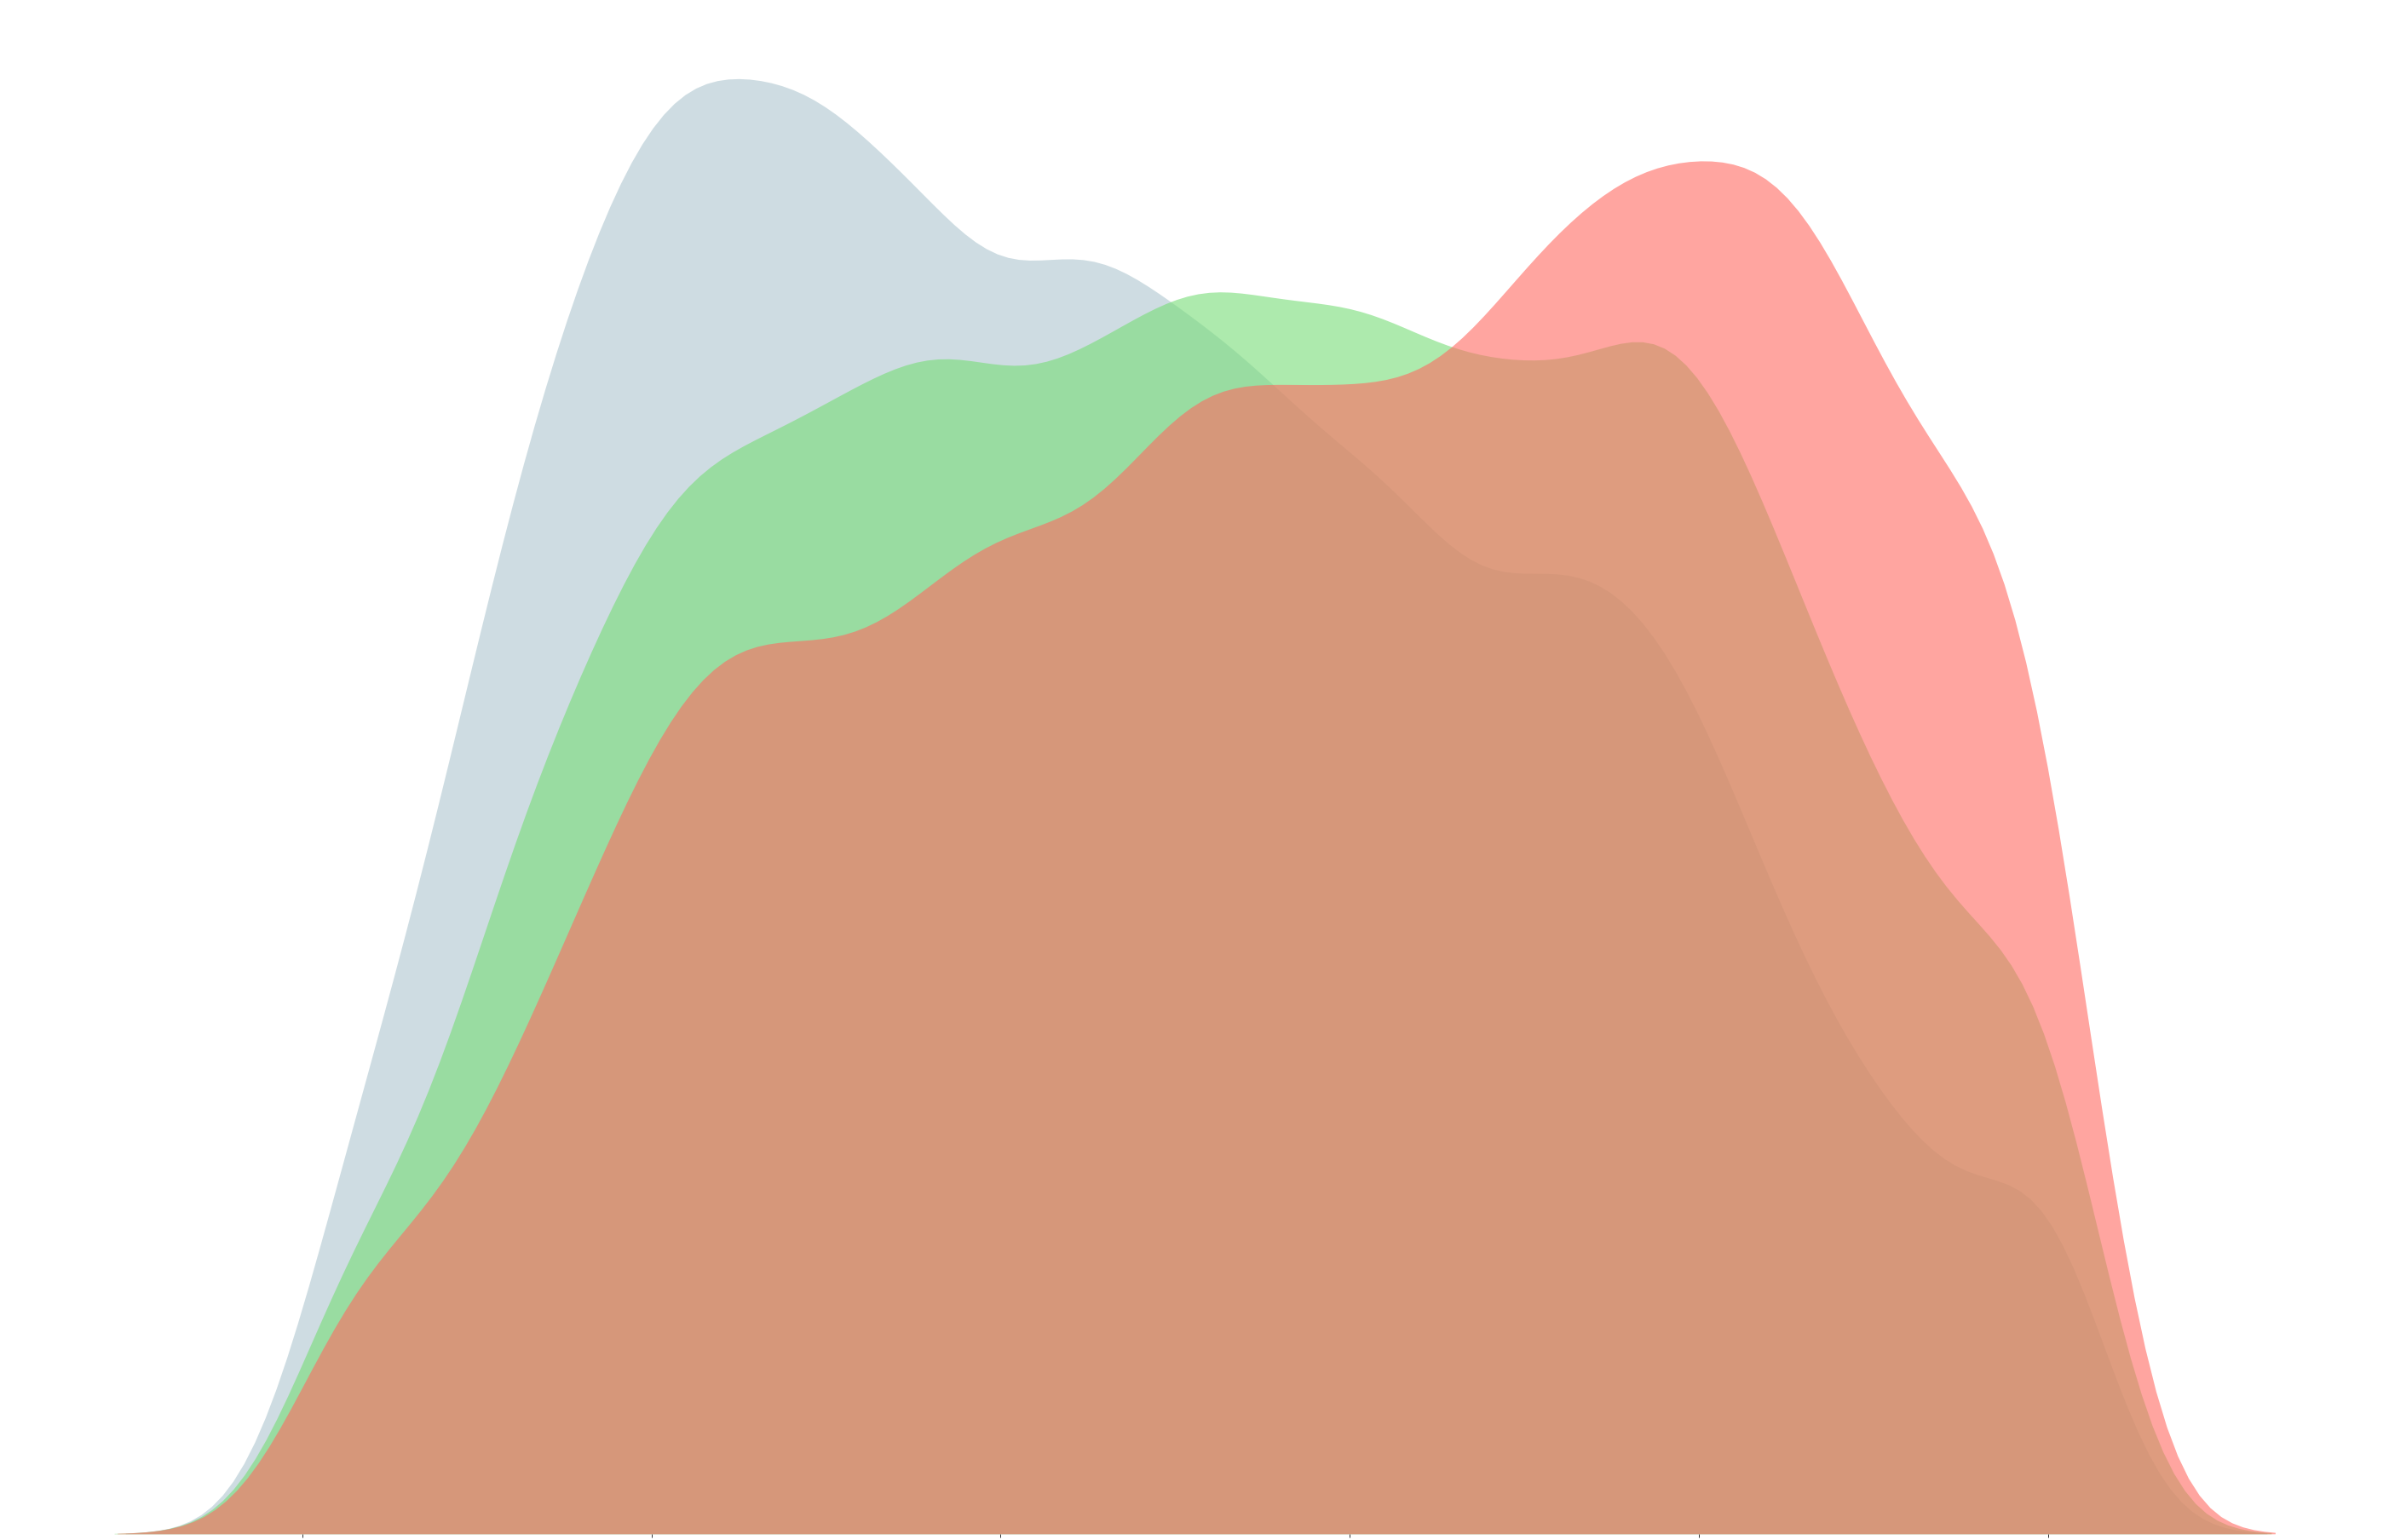

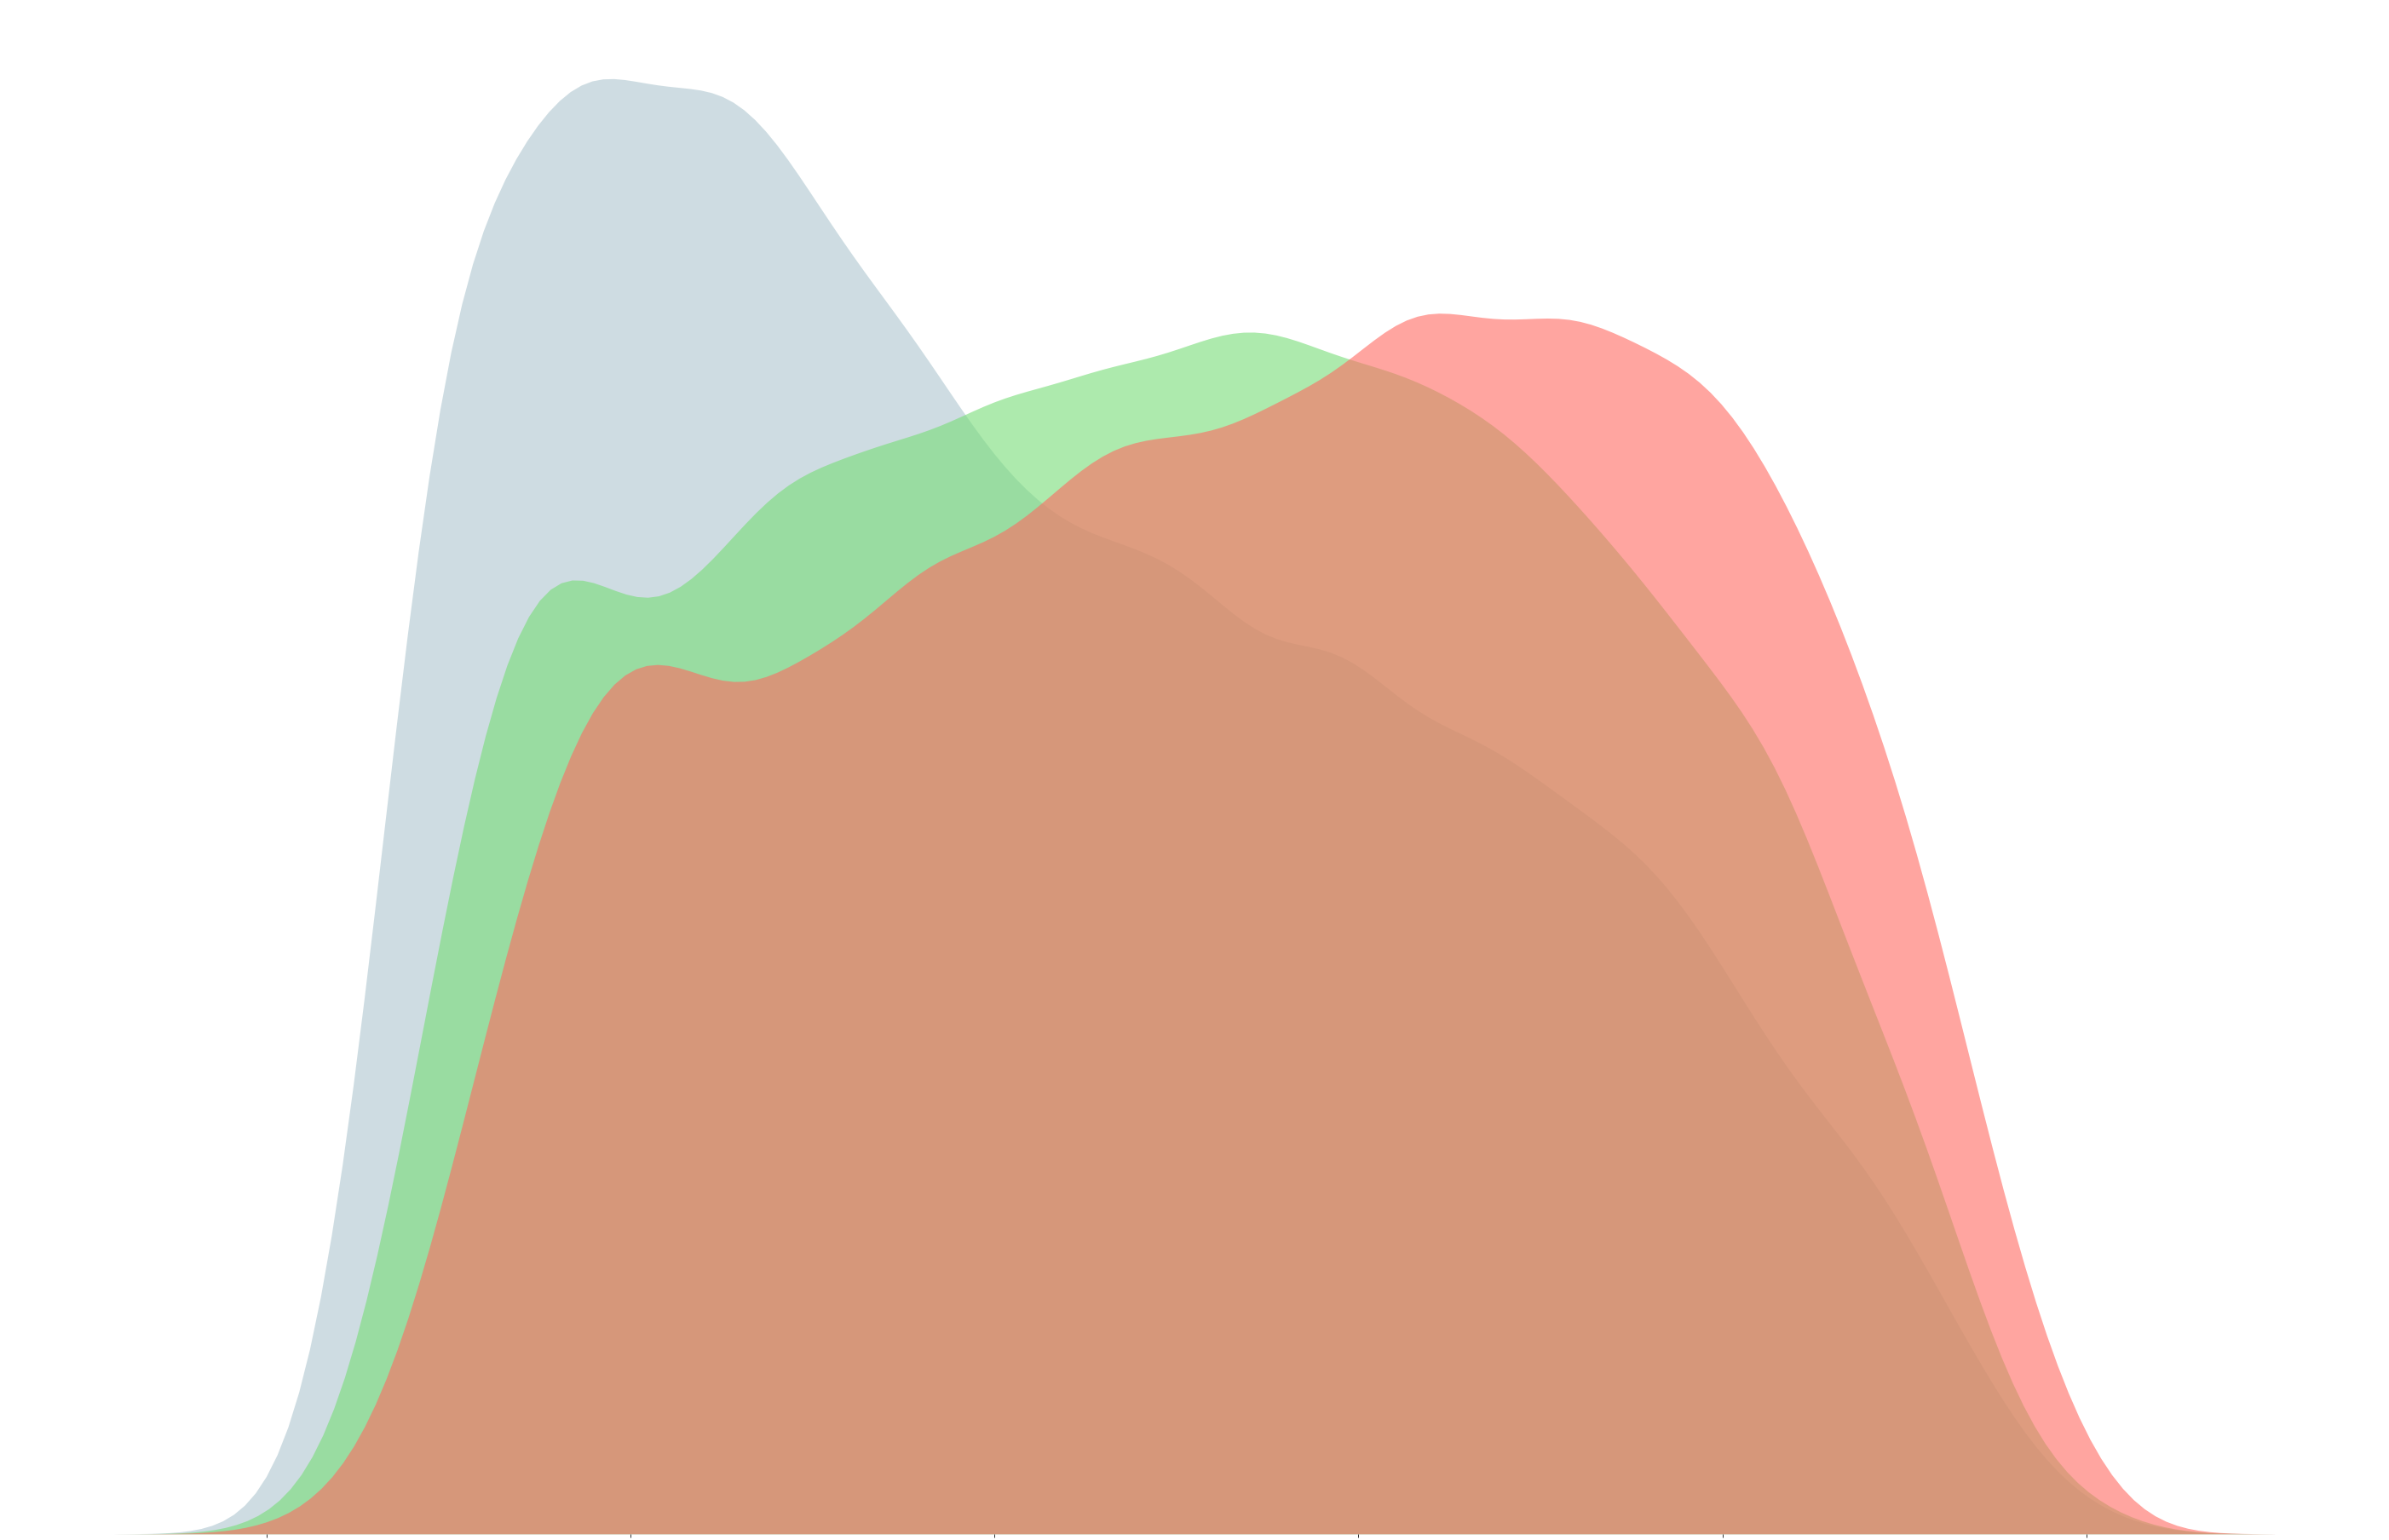

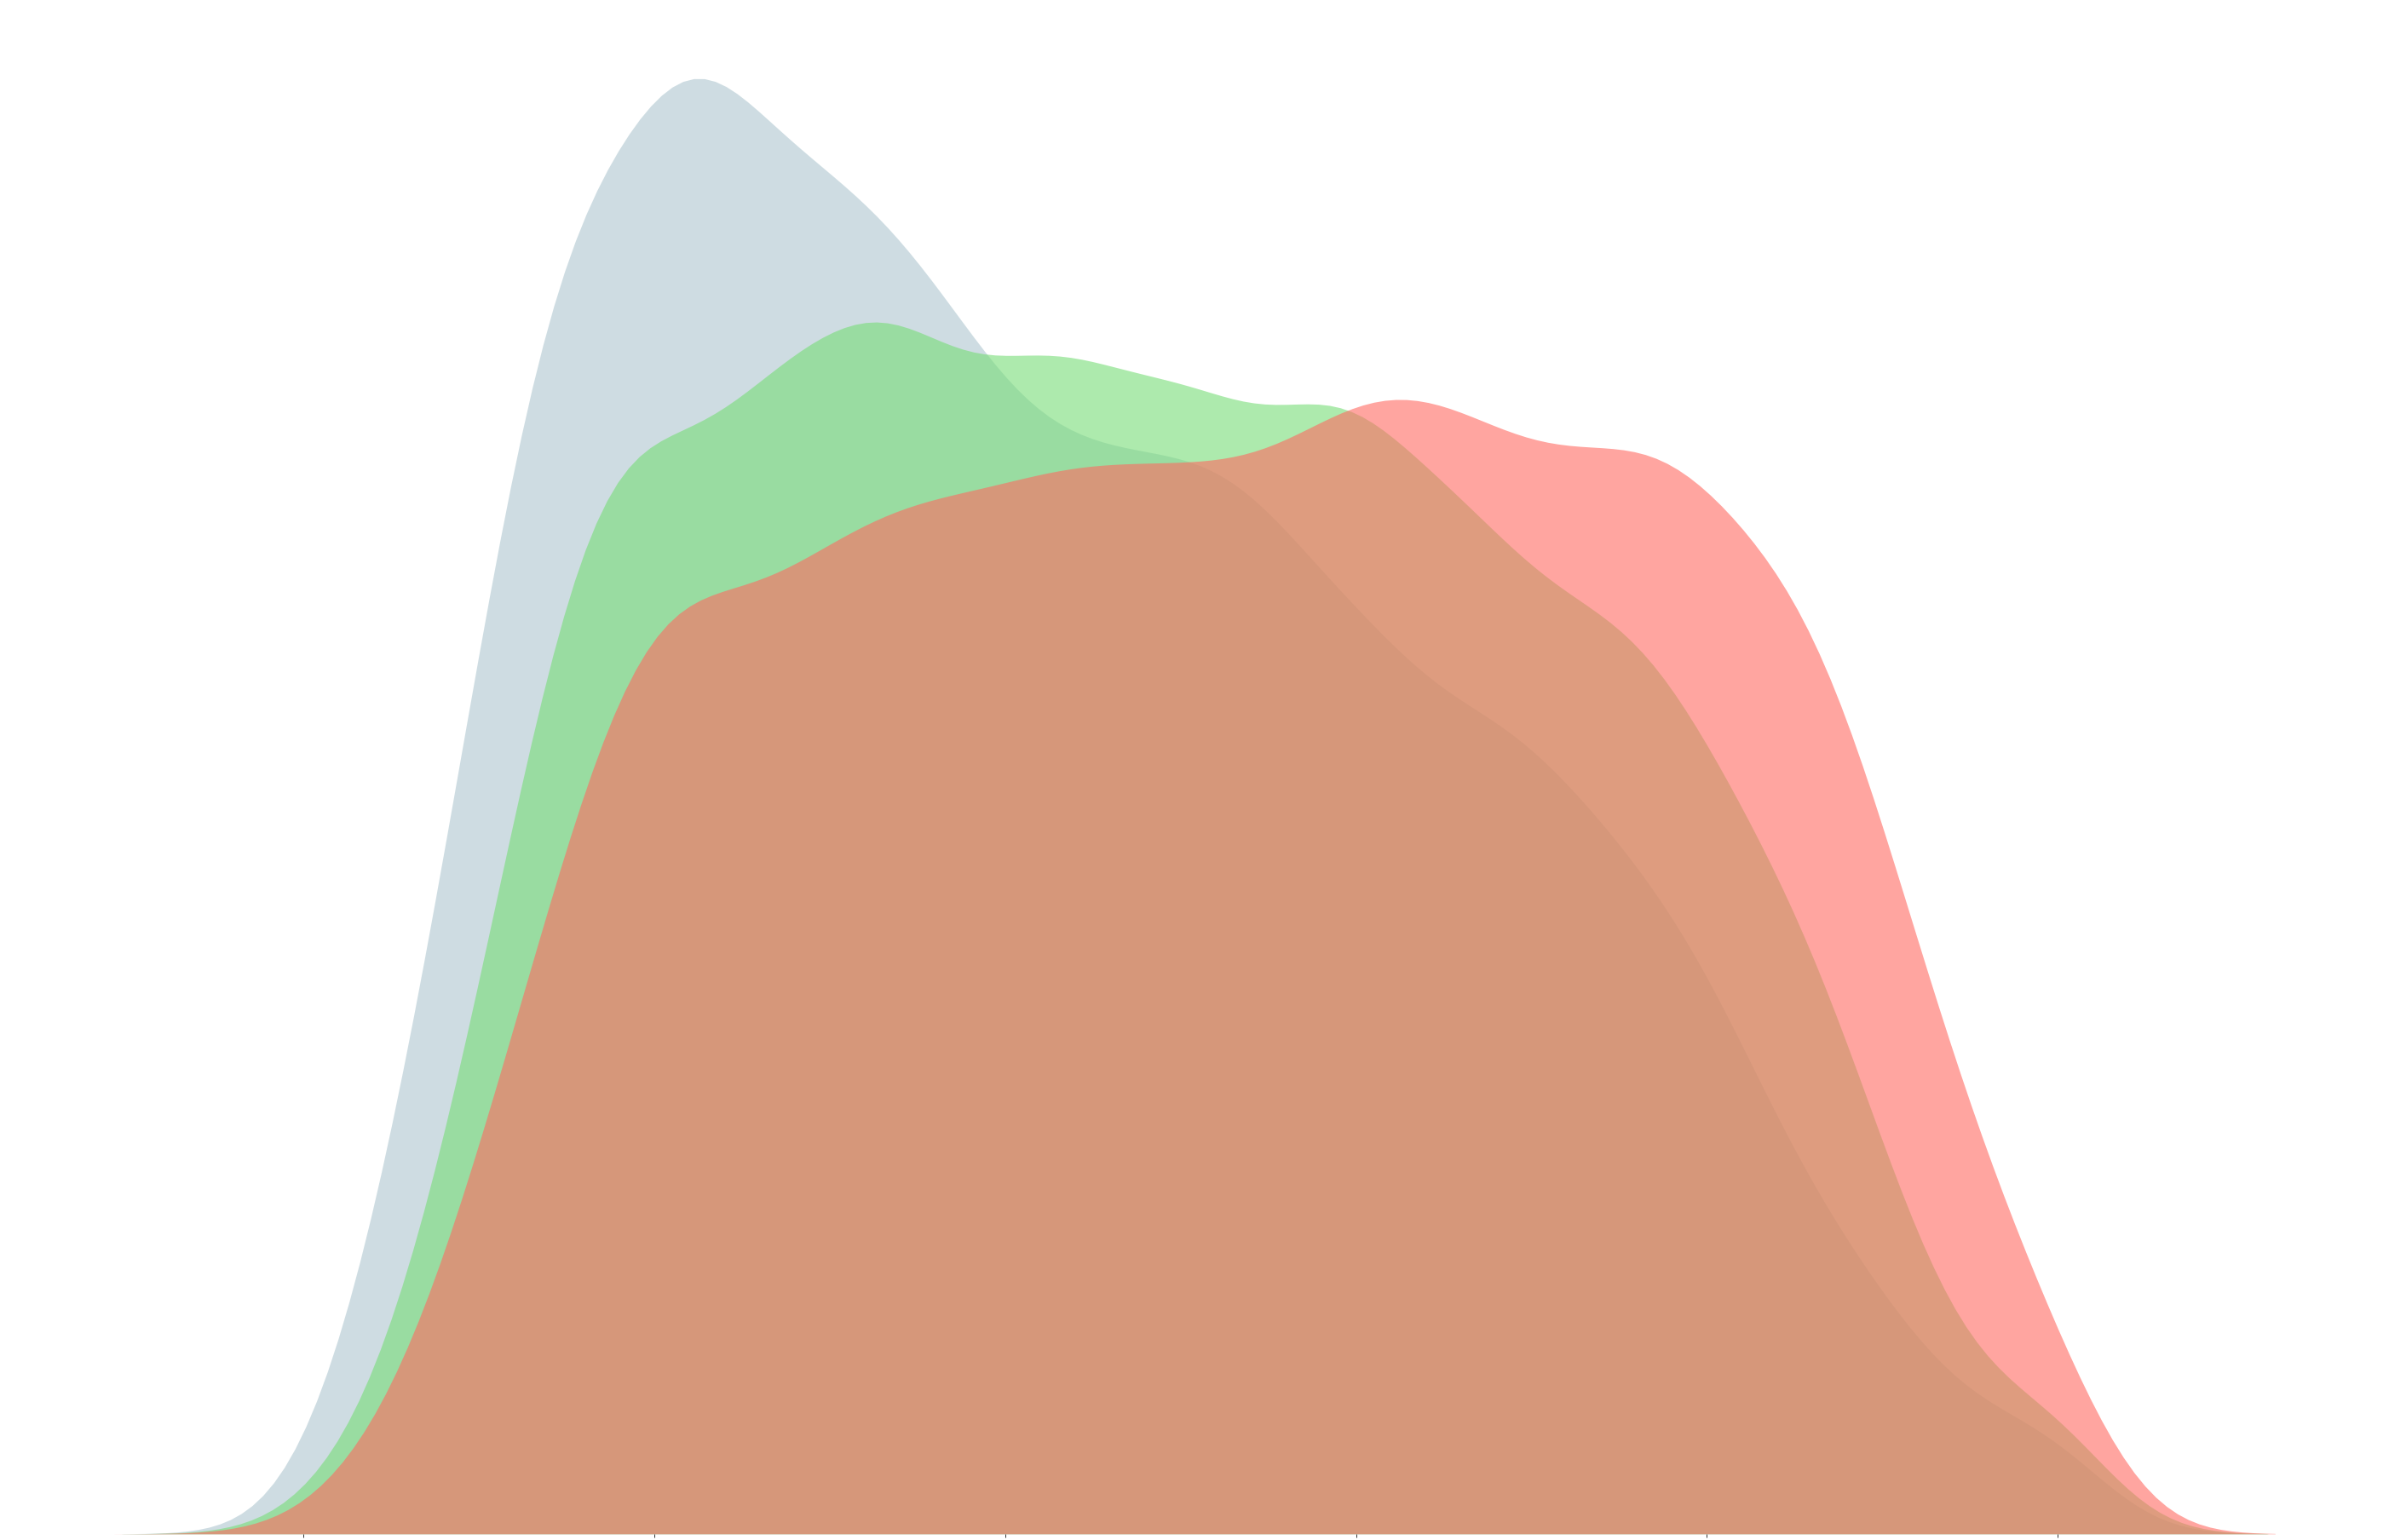

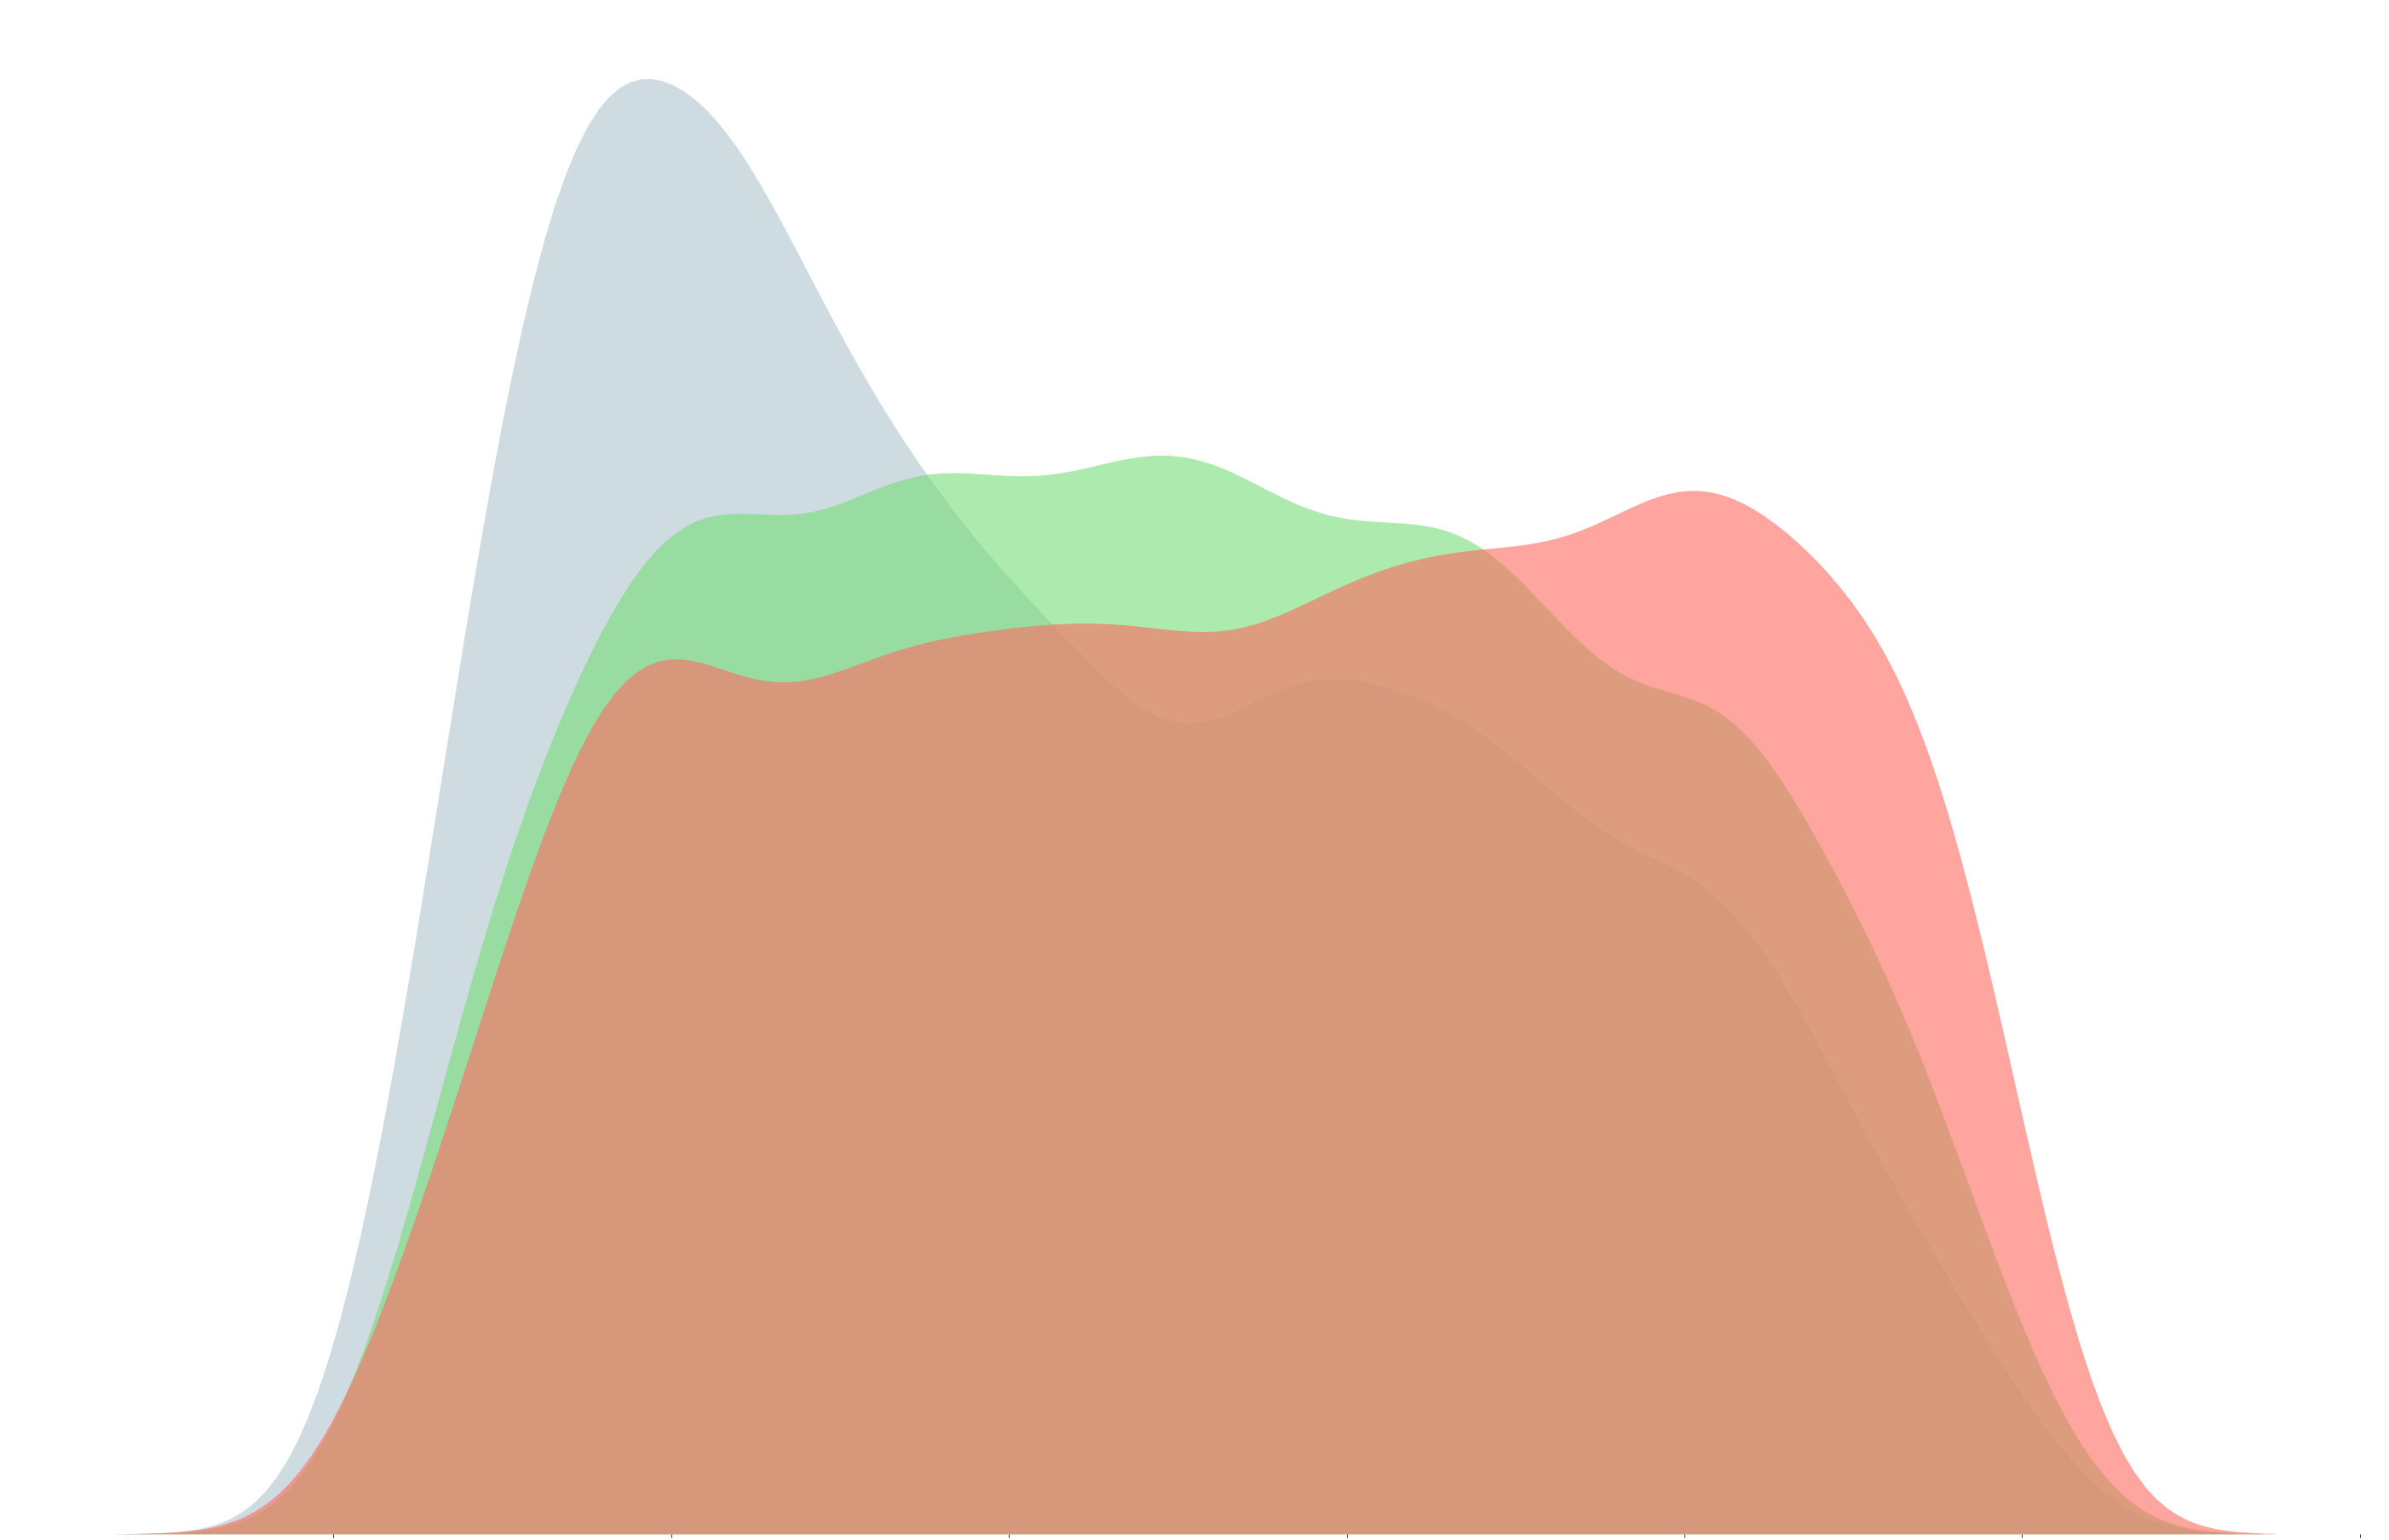

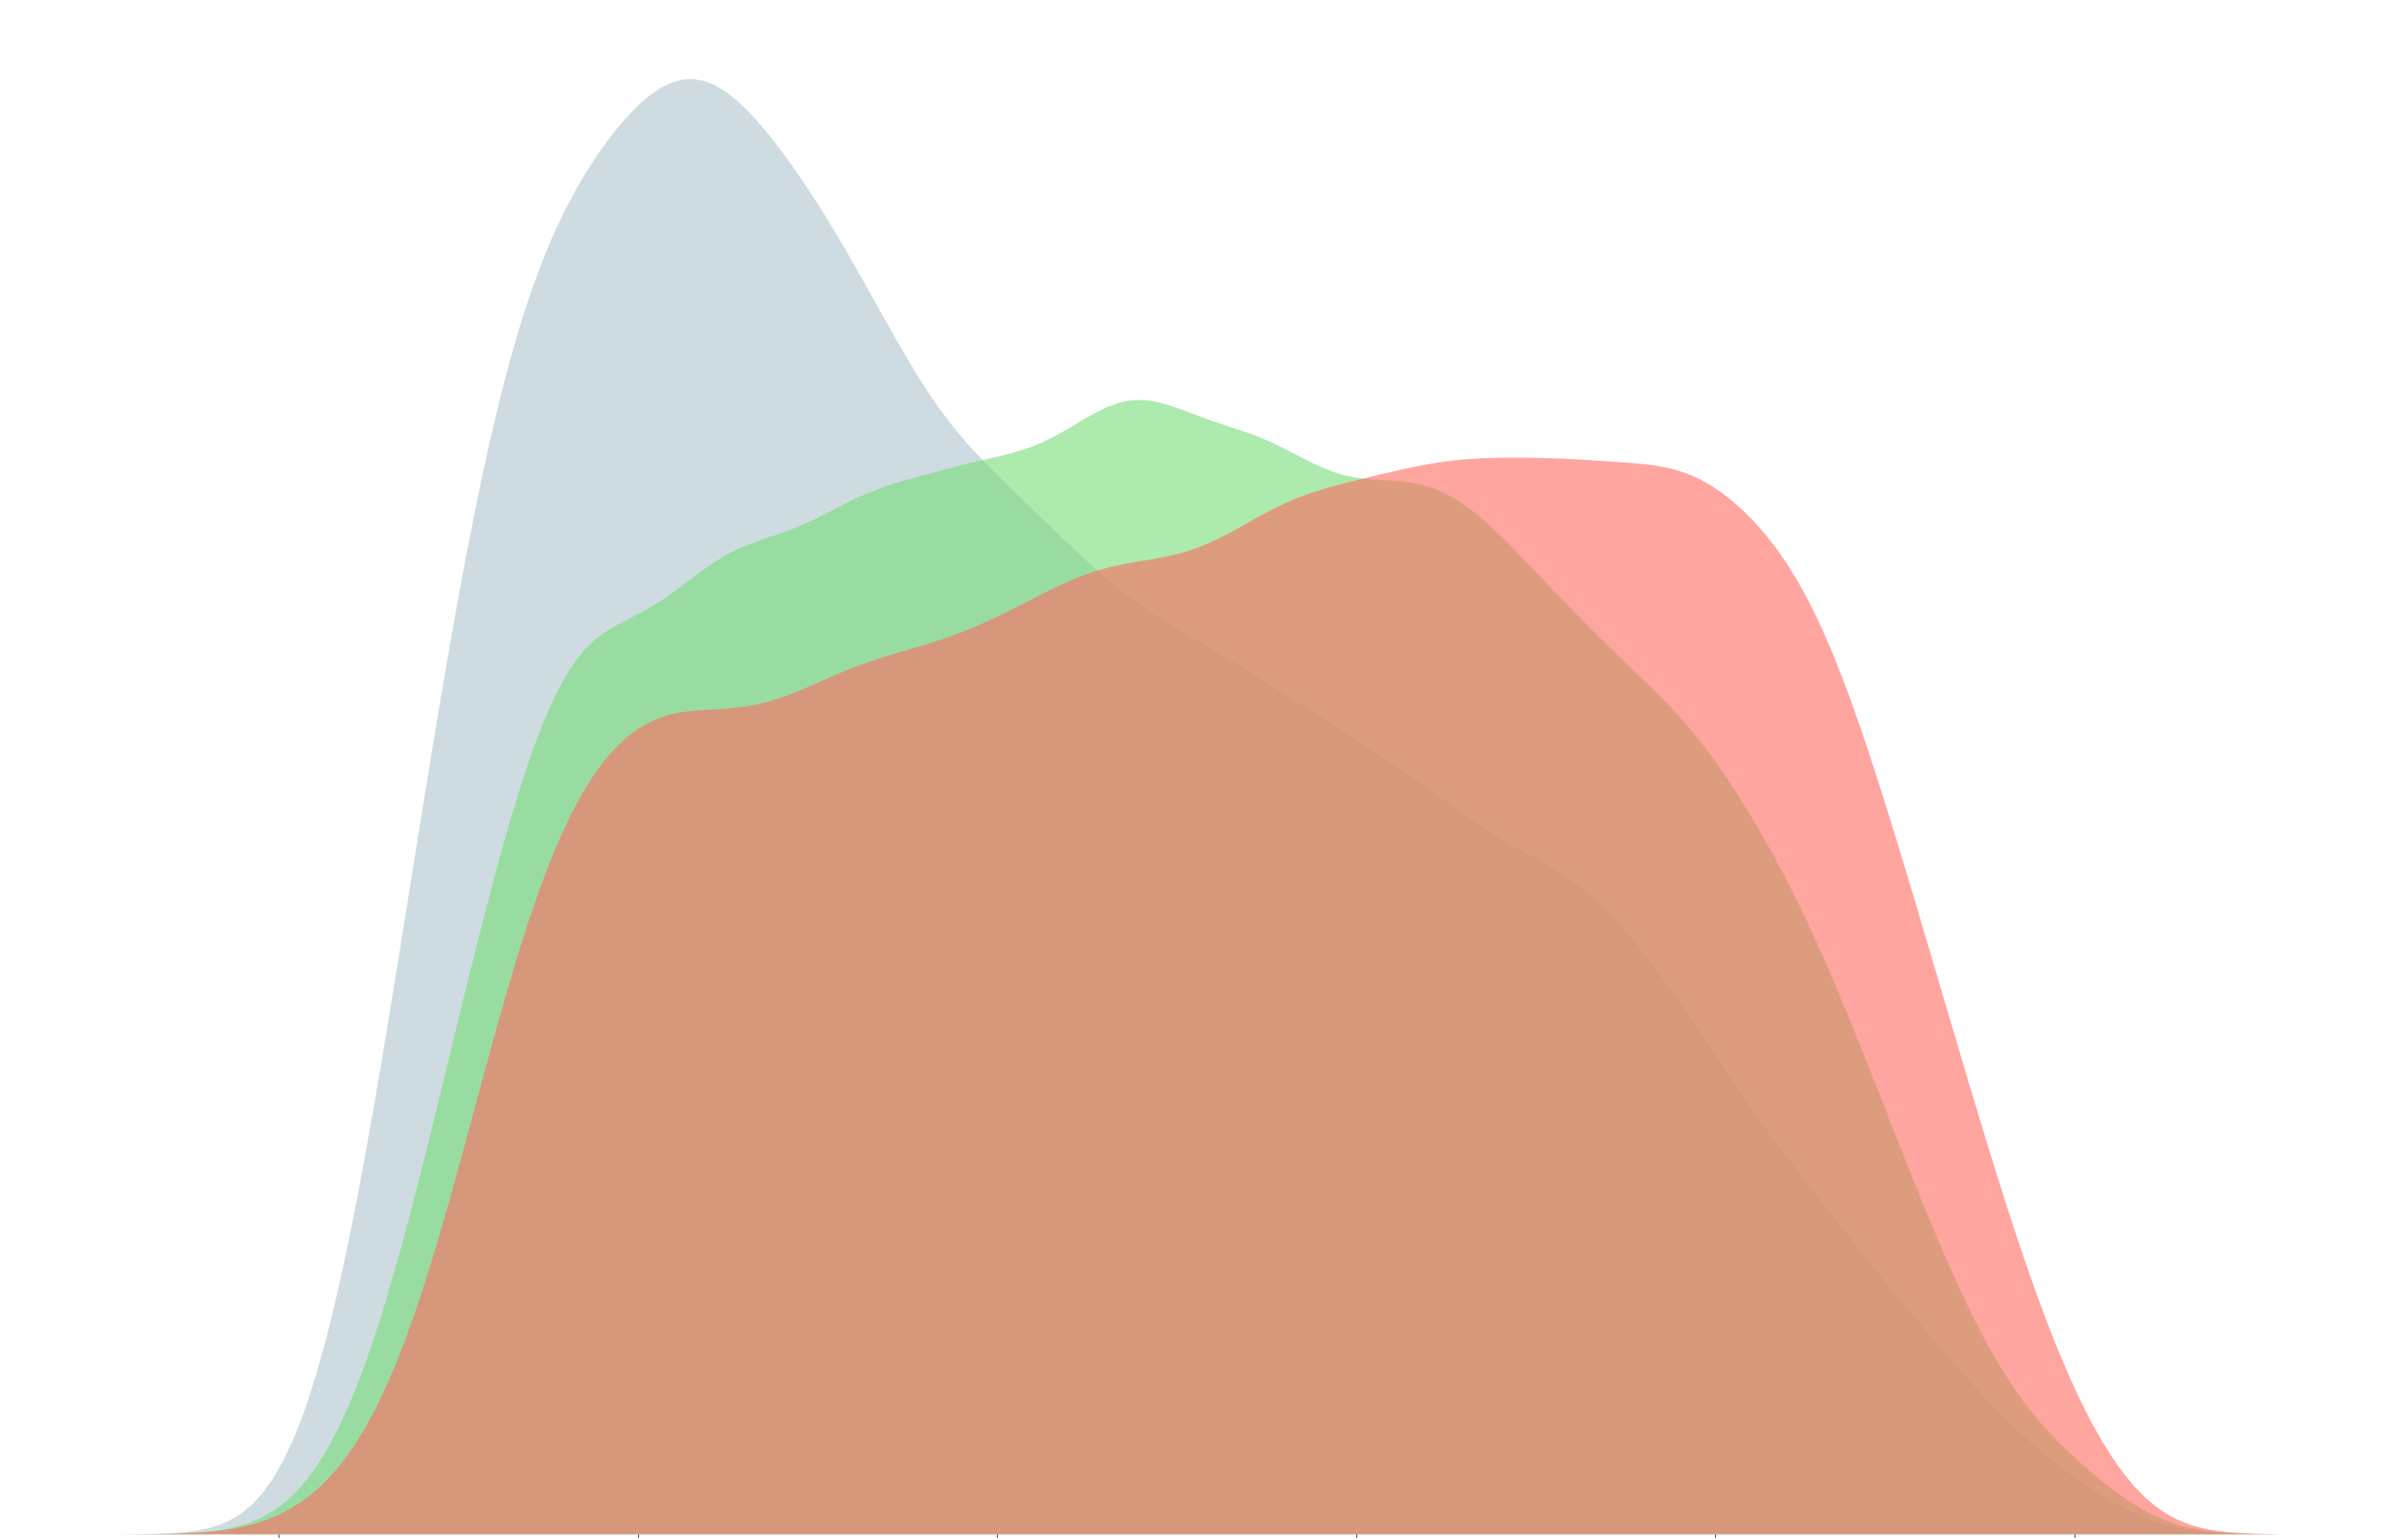

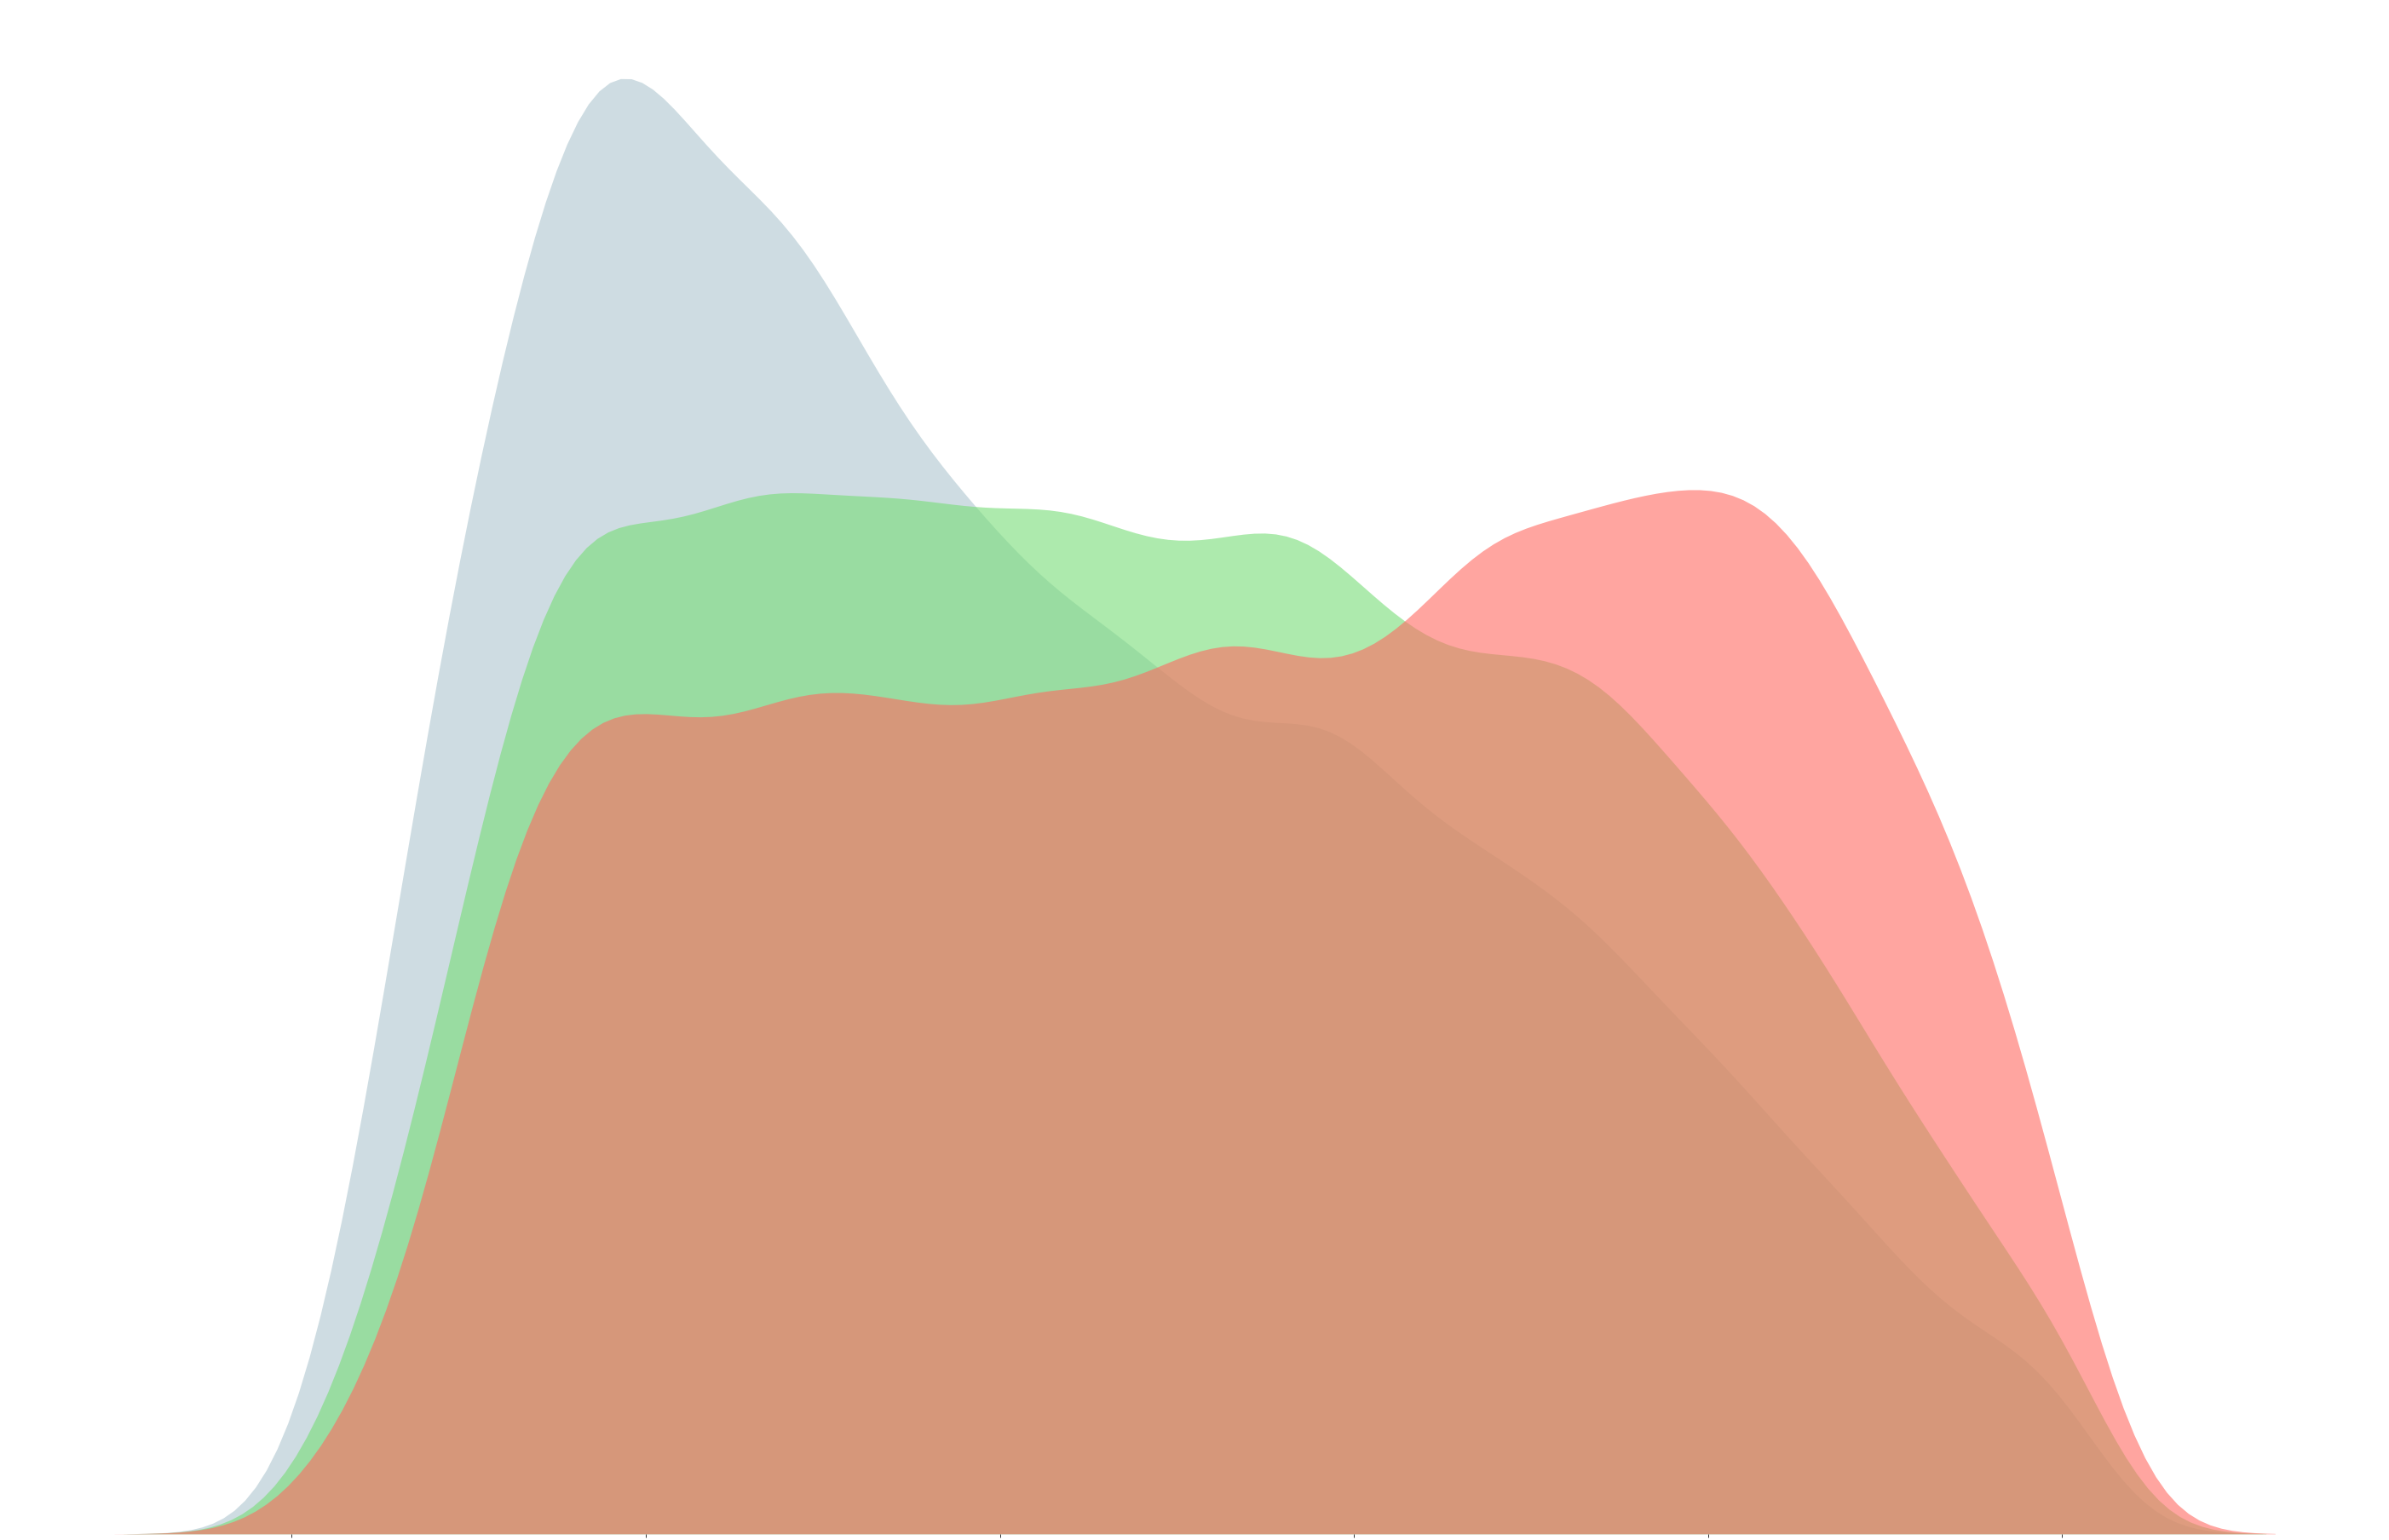

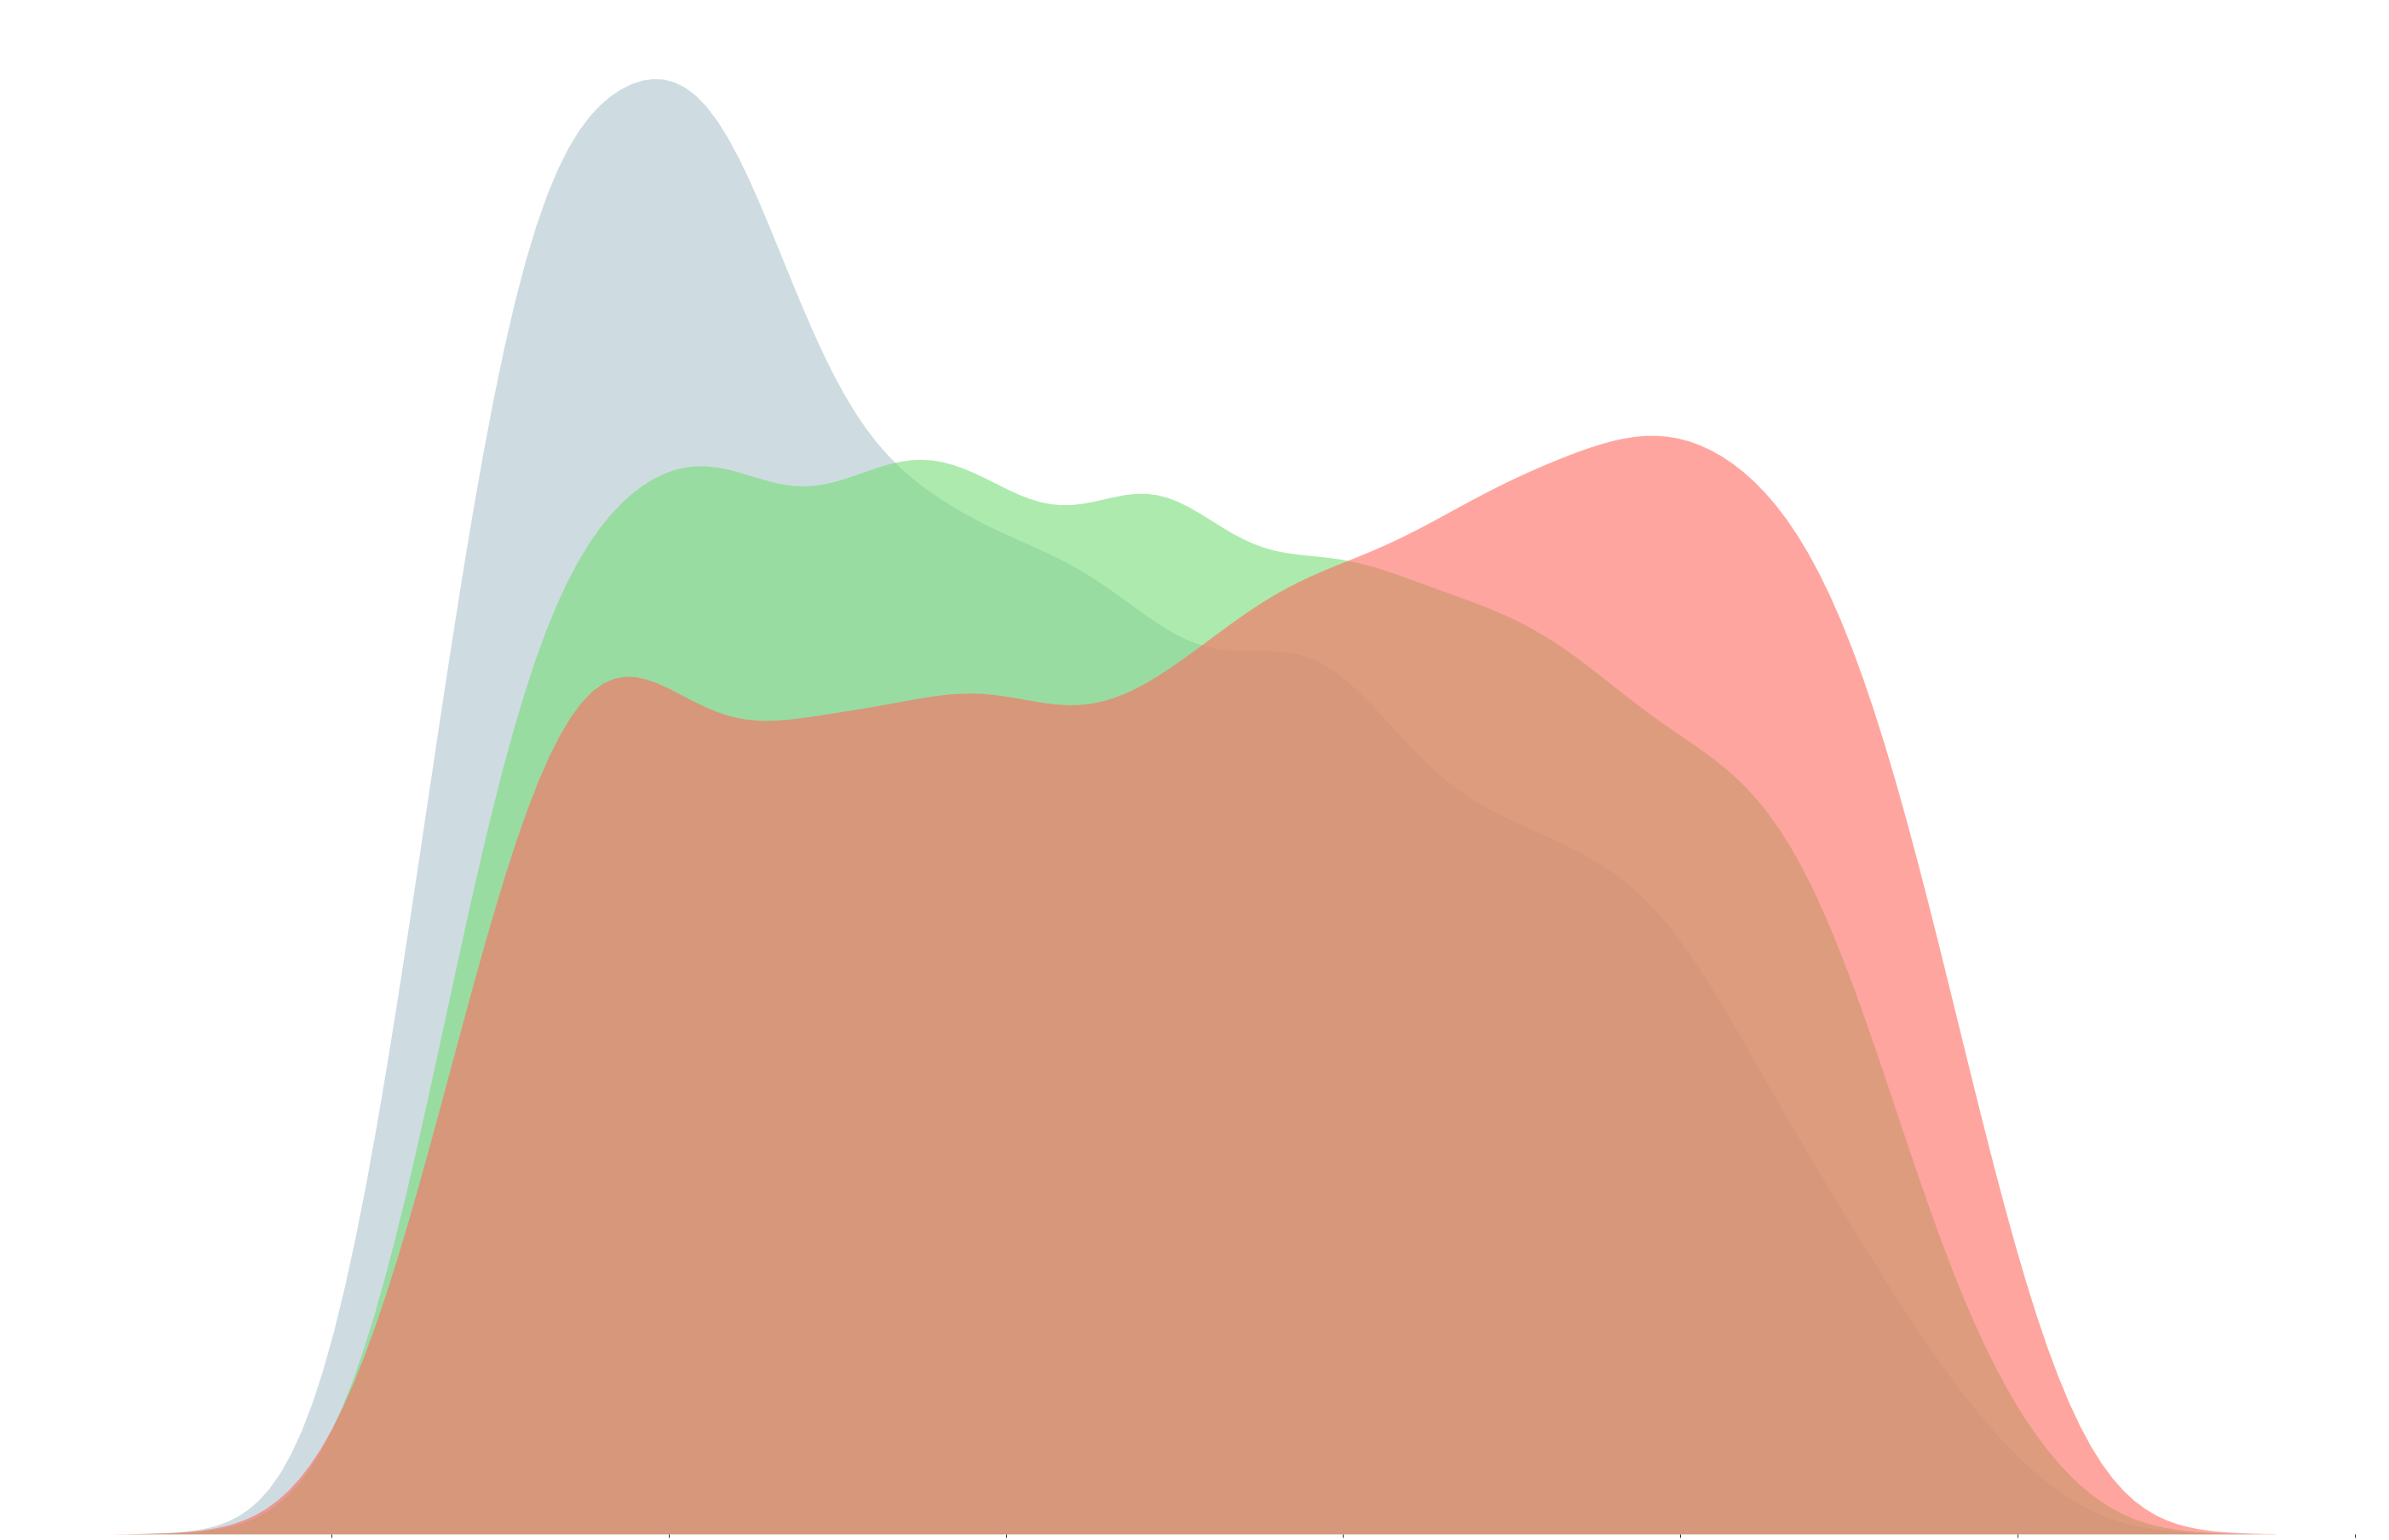

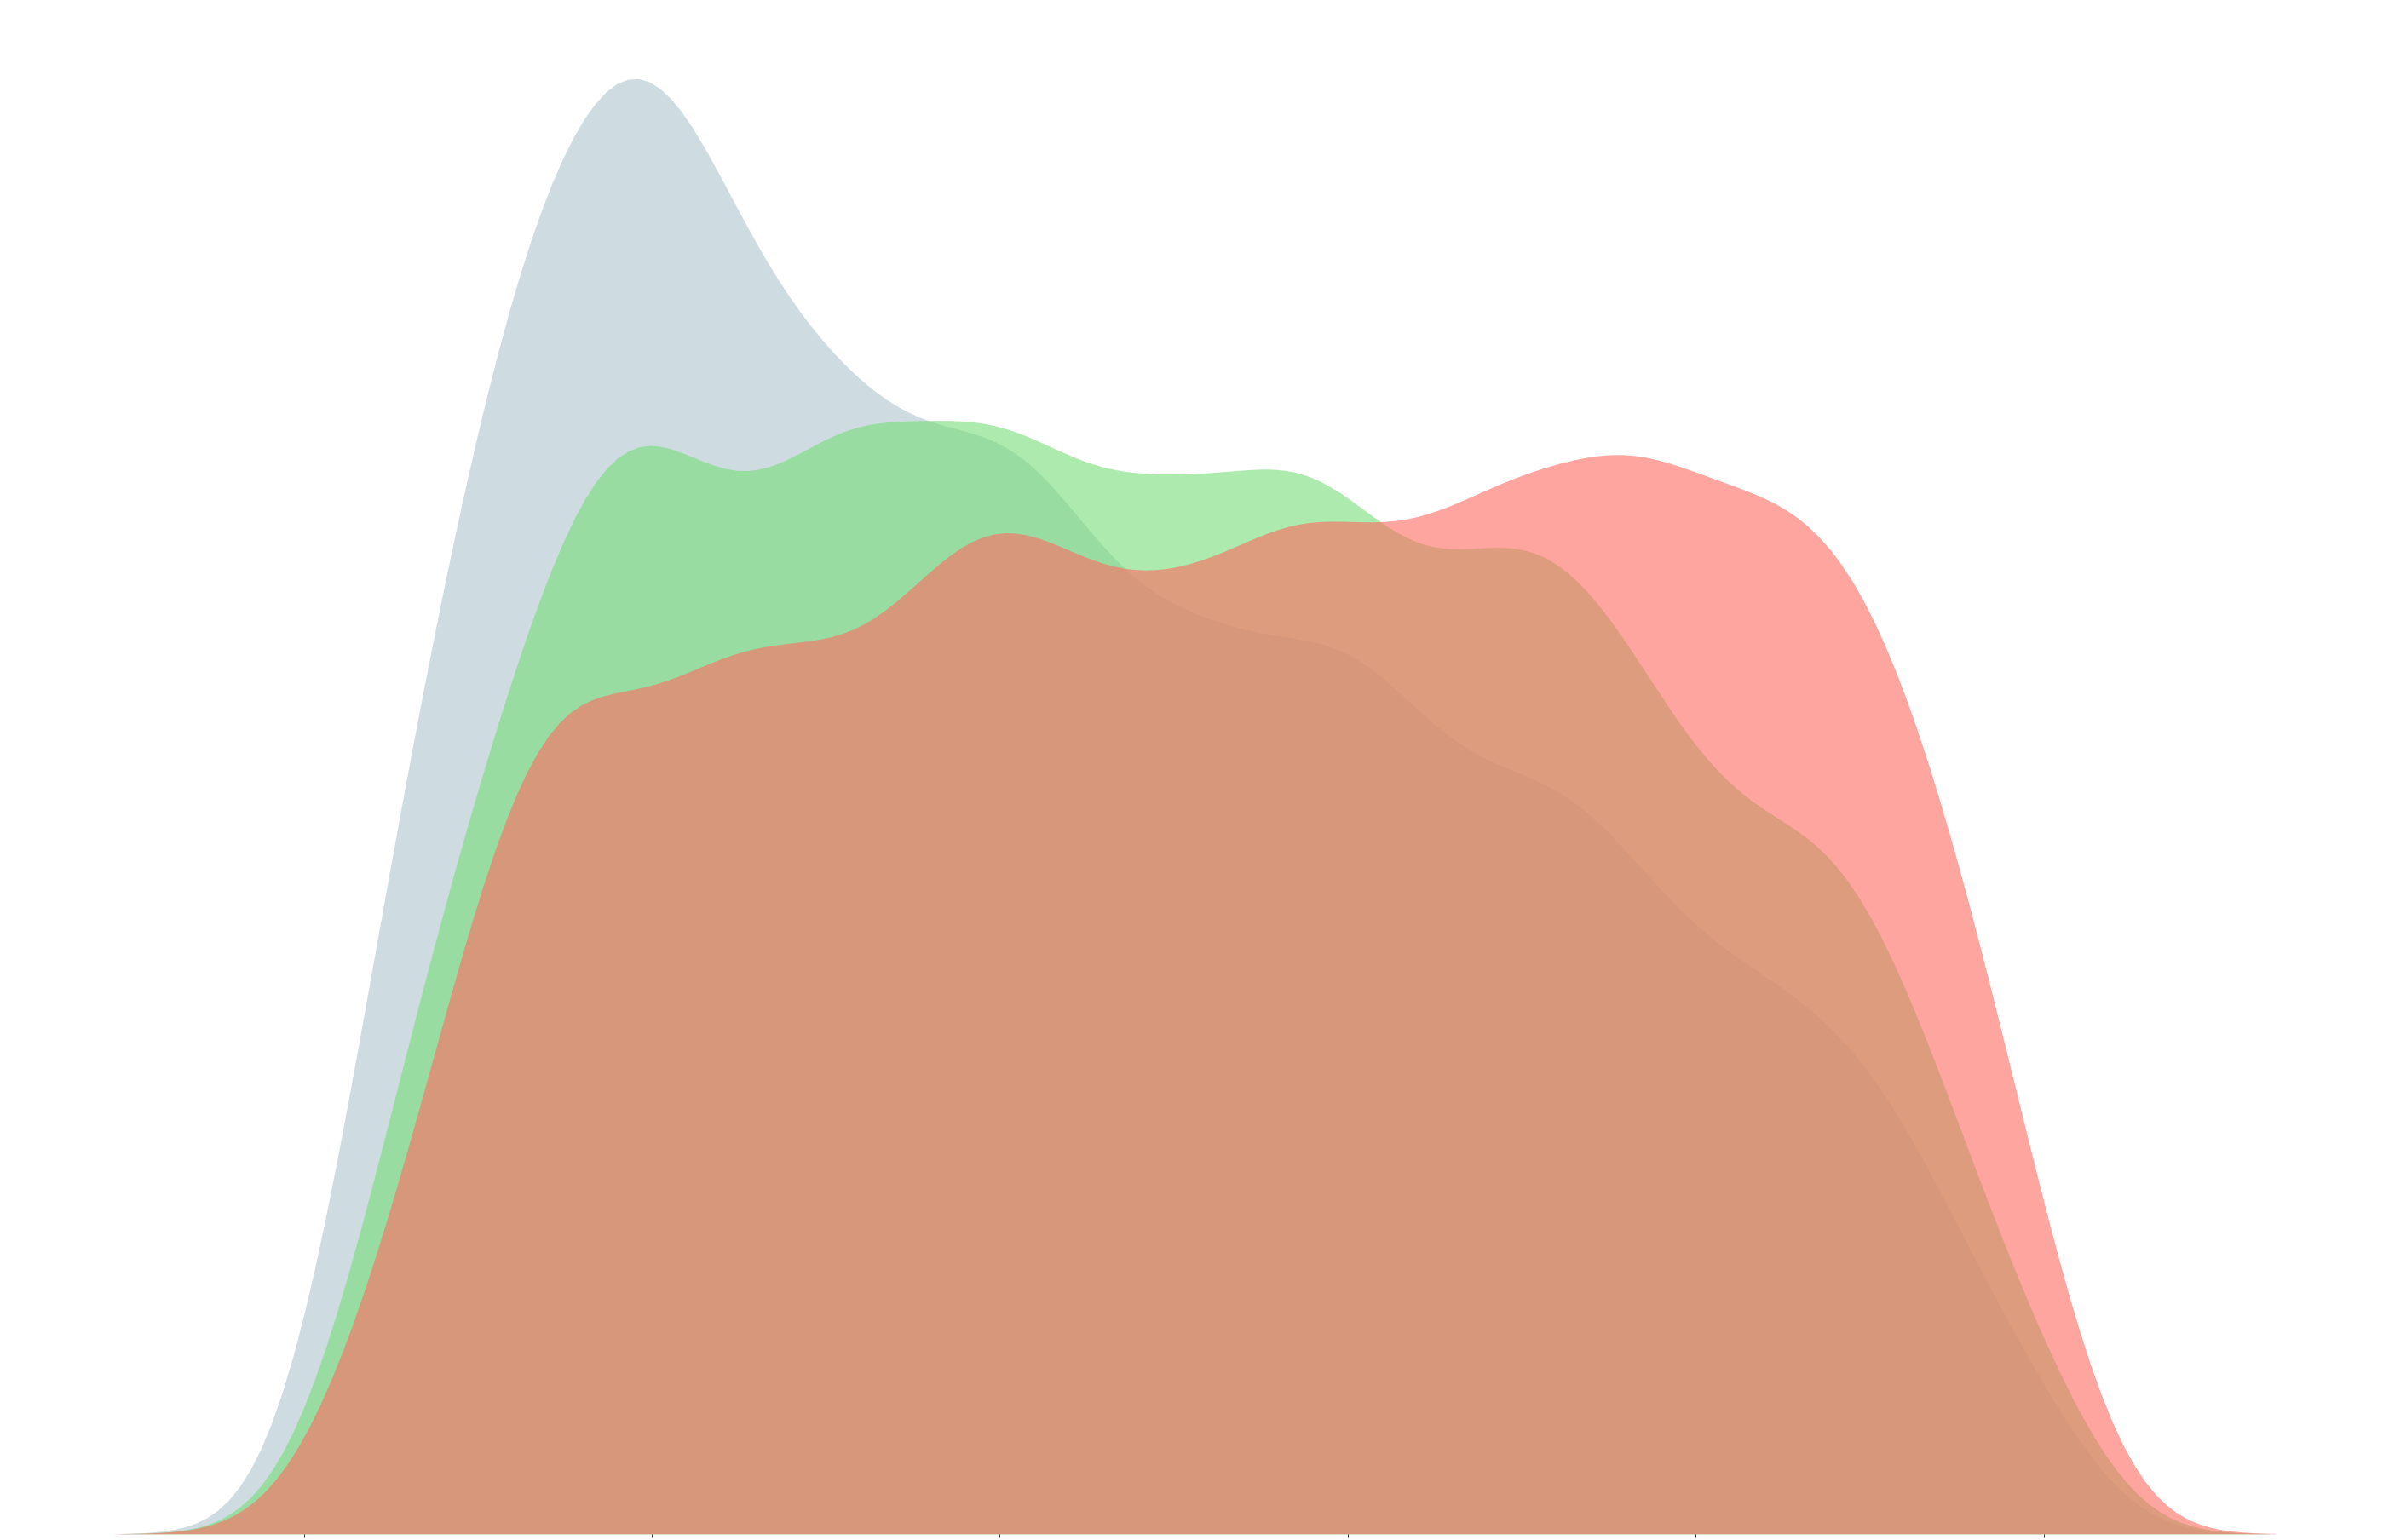

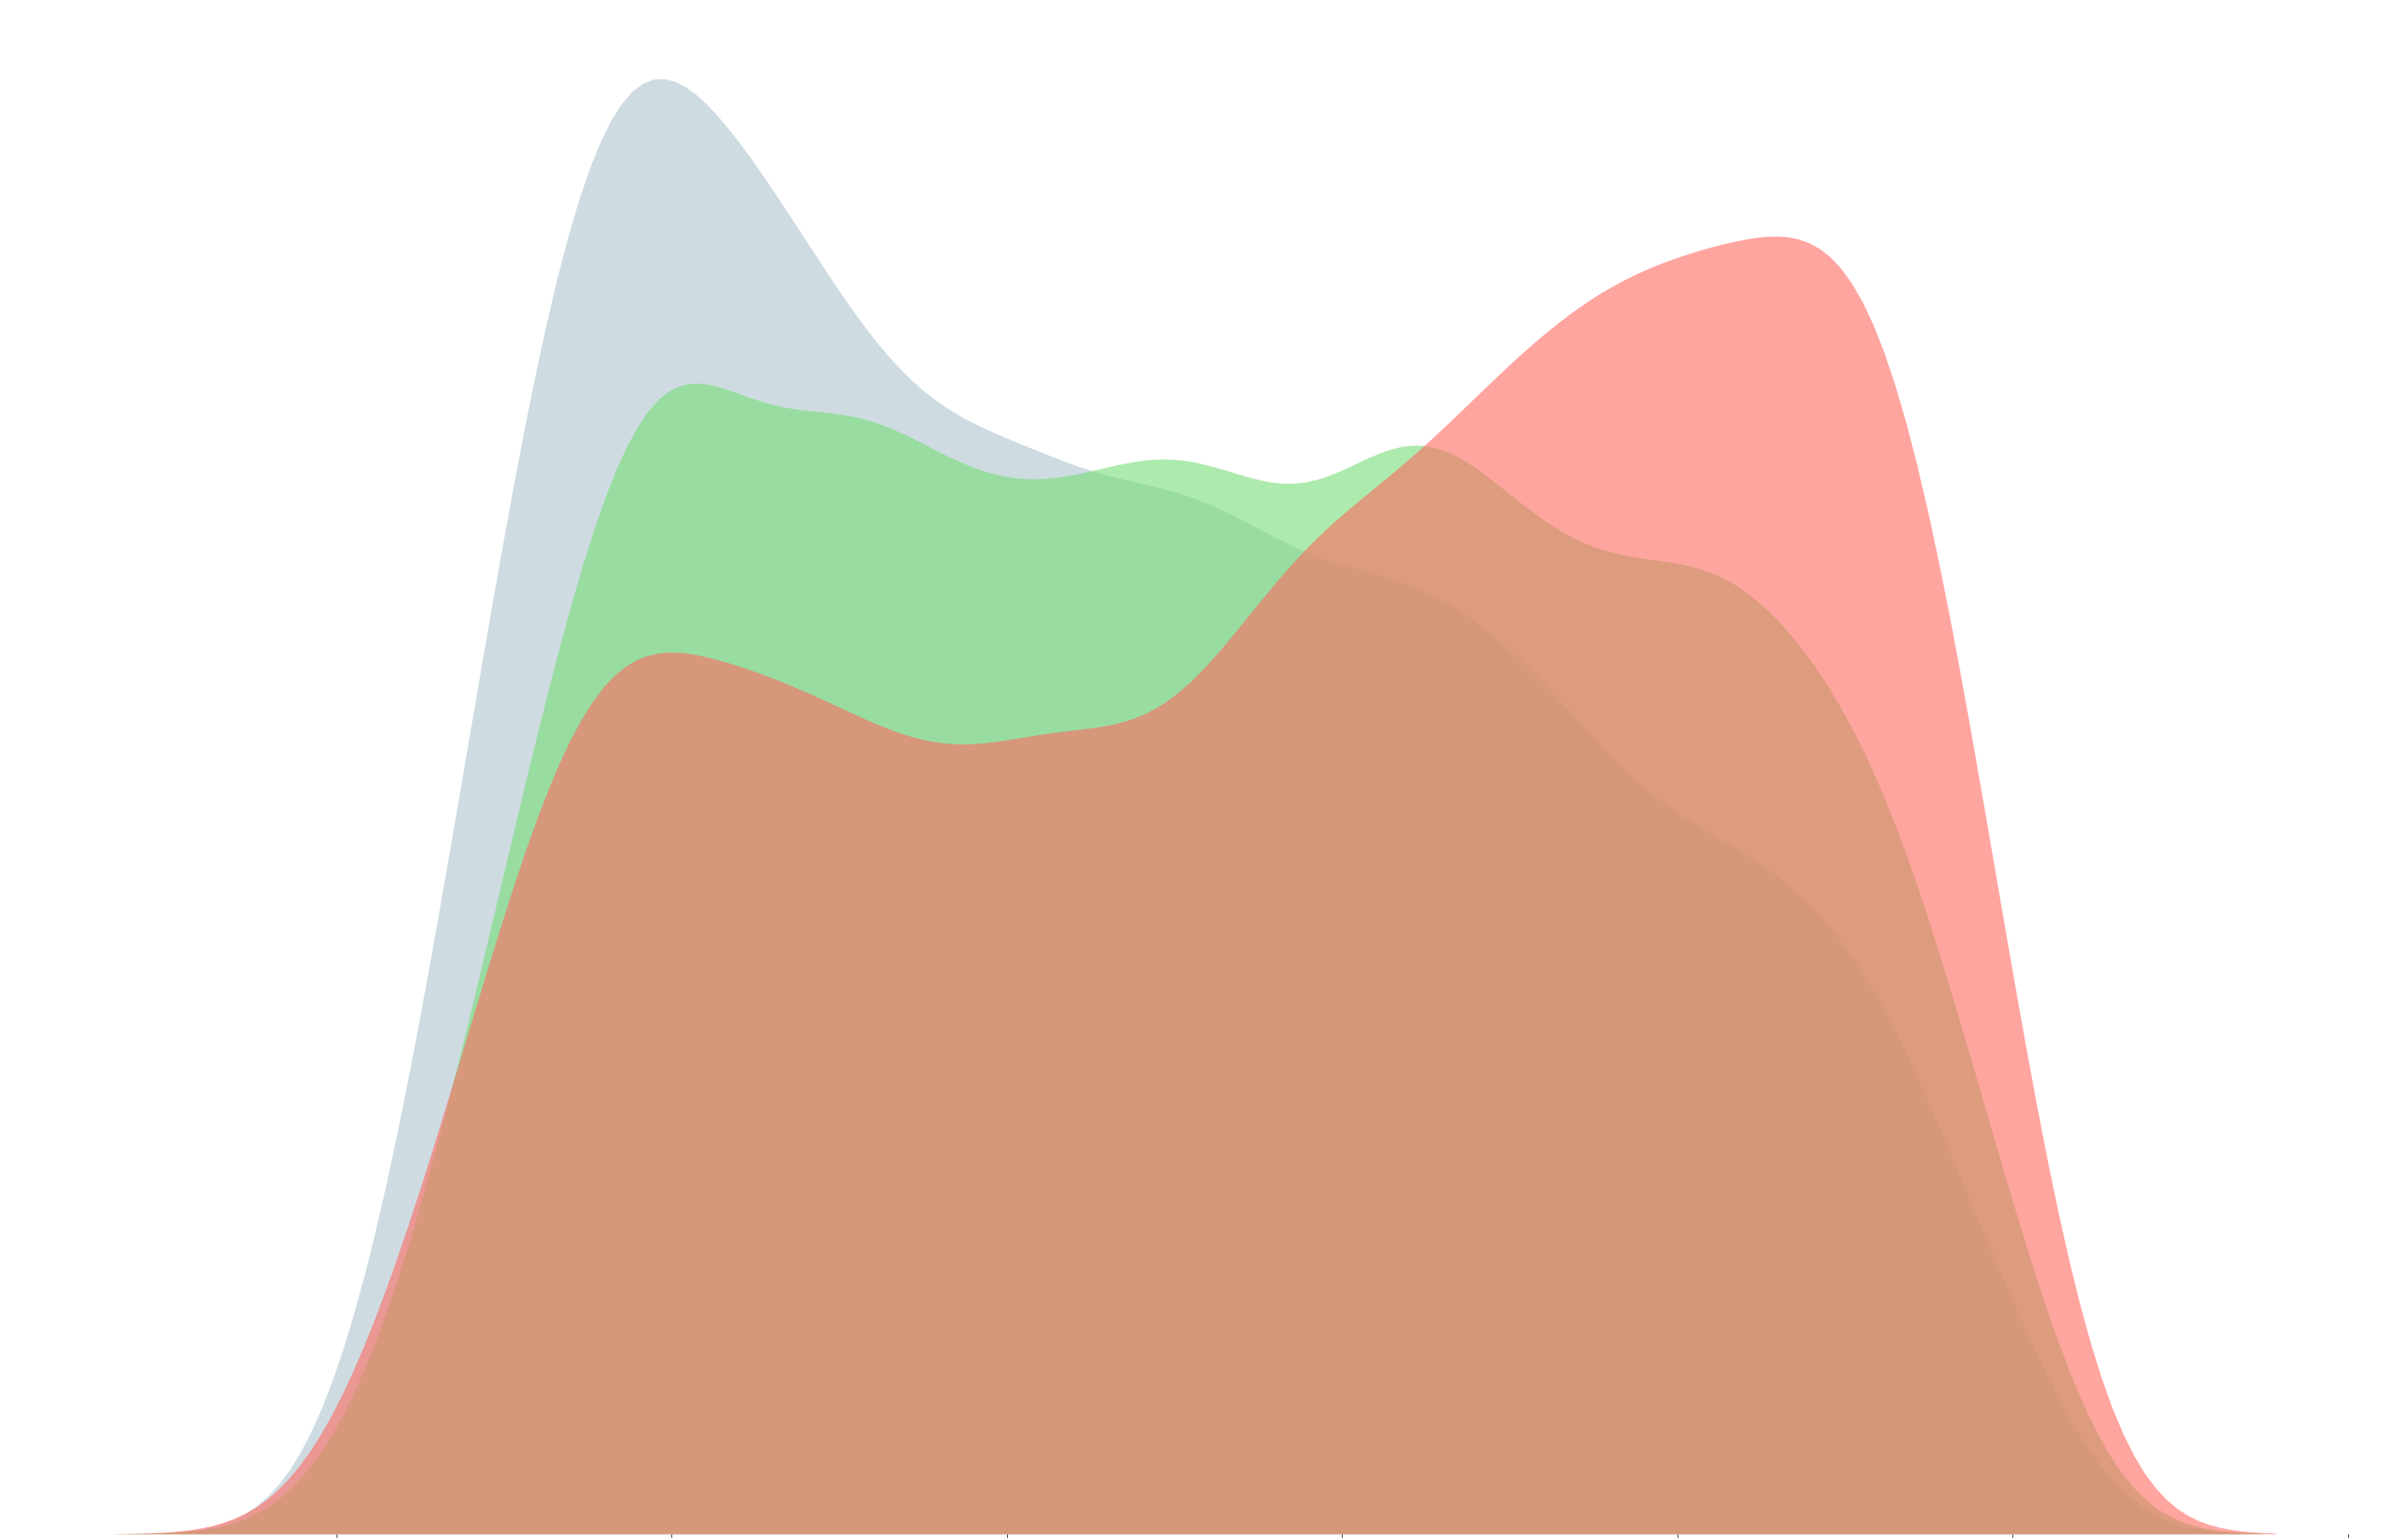

In [96]:
# colors to use in the plot
colors = ["#FF6961", "#77DD77", "#AEC6CF"]
sns.set_palette(sns.color_palette(colors))

j = 1
for i in classes['index']:
    
    plt.figure(figsize=(50,33))
    sns.kdeplot(data=color[color.movement == i][['r','g','b']],
                   fill=True, common_norm=False,
                   alpha=.6, linewidth=0, legend = None)

    plt.xlabel("Color Value", size=35, color = 'white', visible = False)
    plt.xticks(visible=False)
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(True)

    # Remove all borders
    sns.despine(bottom = True, left = True)
    
    name_file = str(j)+' - '+i + ' color distribution.png'
    j += 1

    # Saving all the plots to analysis by name of movement for further study
    plt.savefig(name_file, transparent=True)
    plt.show()

**Ploting and saving the HSL plots per movement**

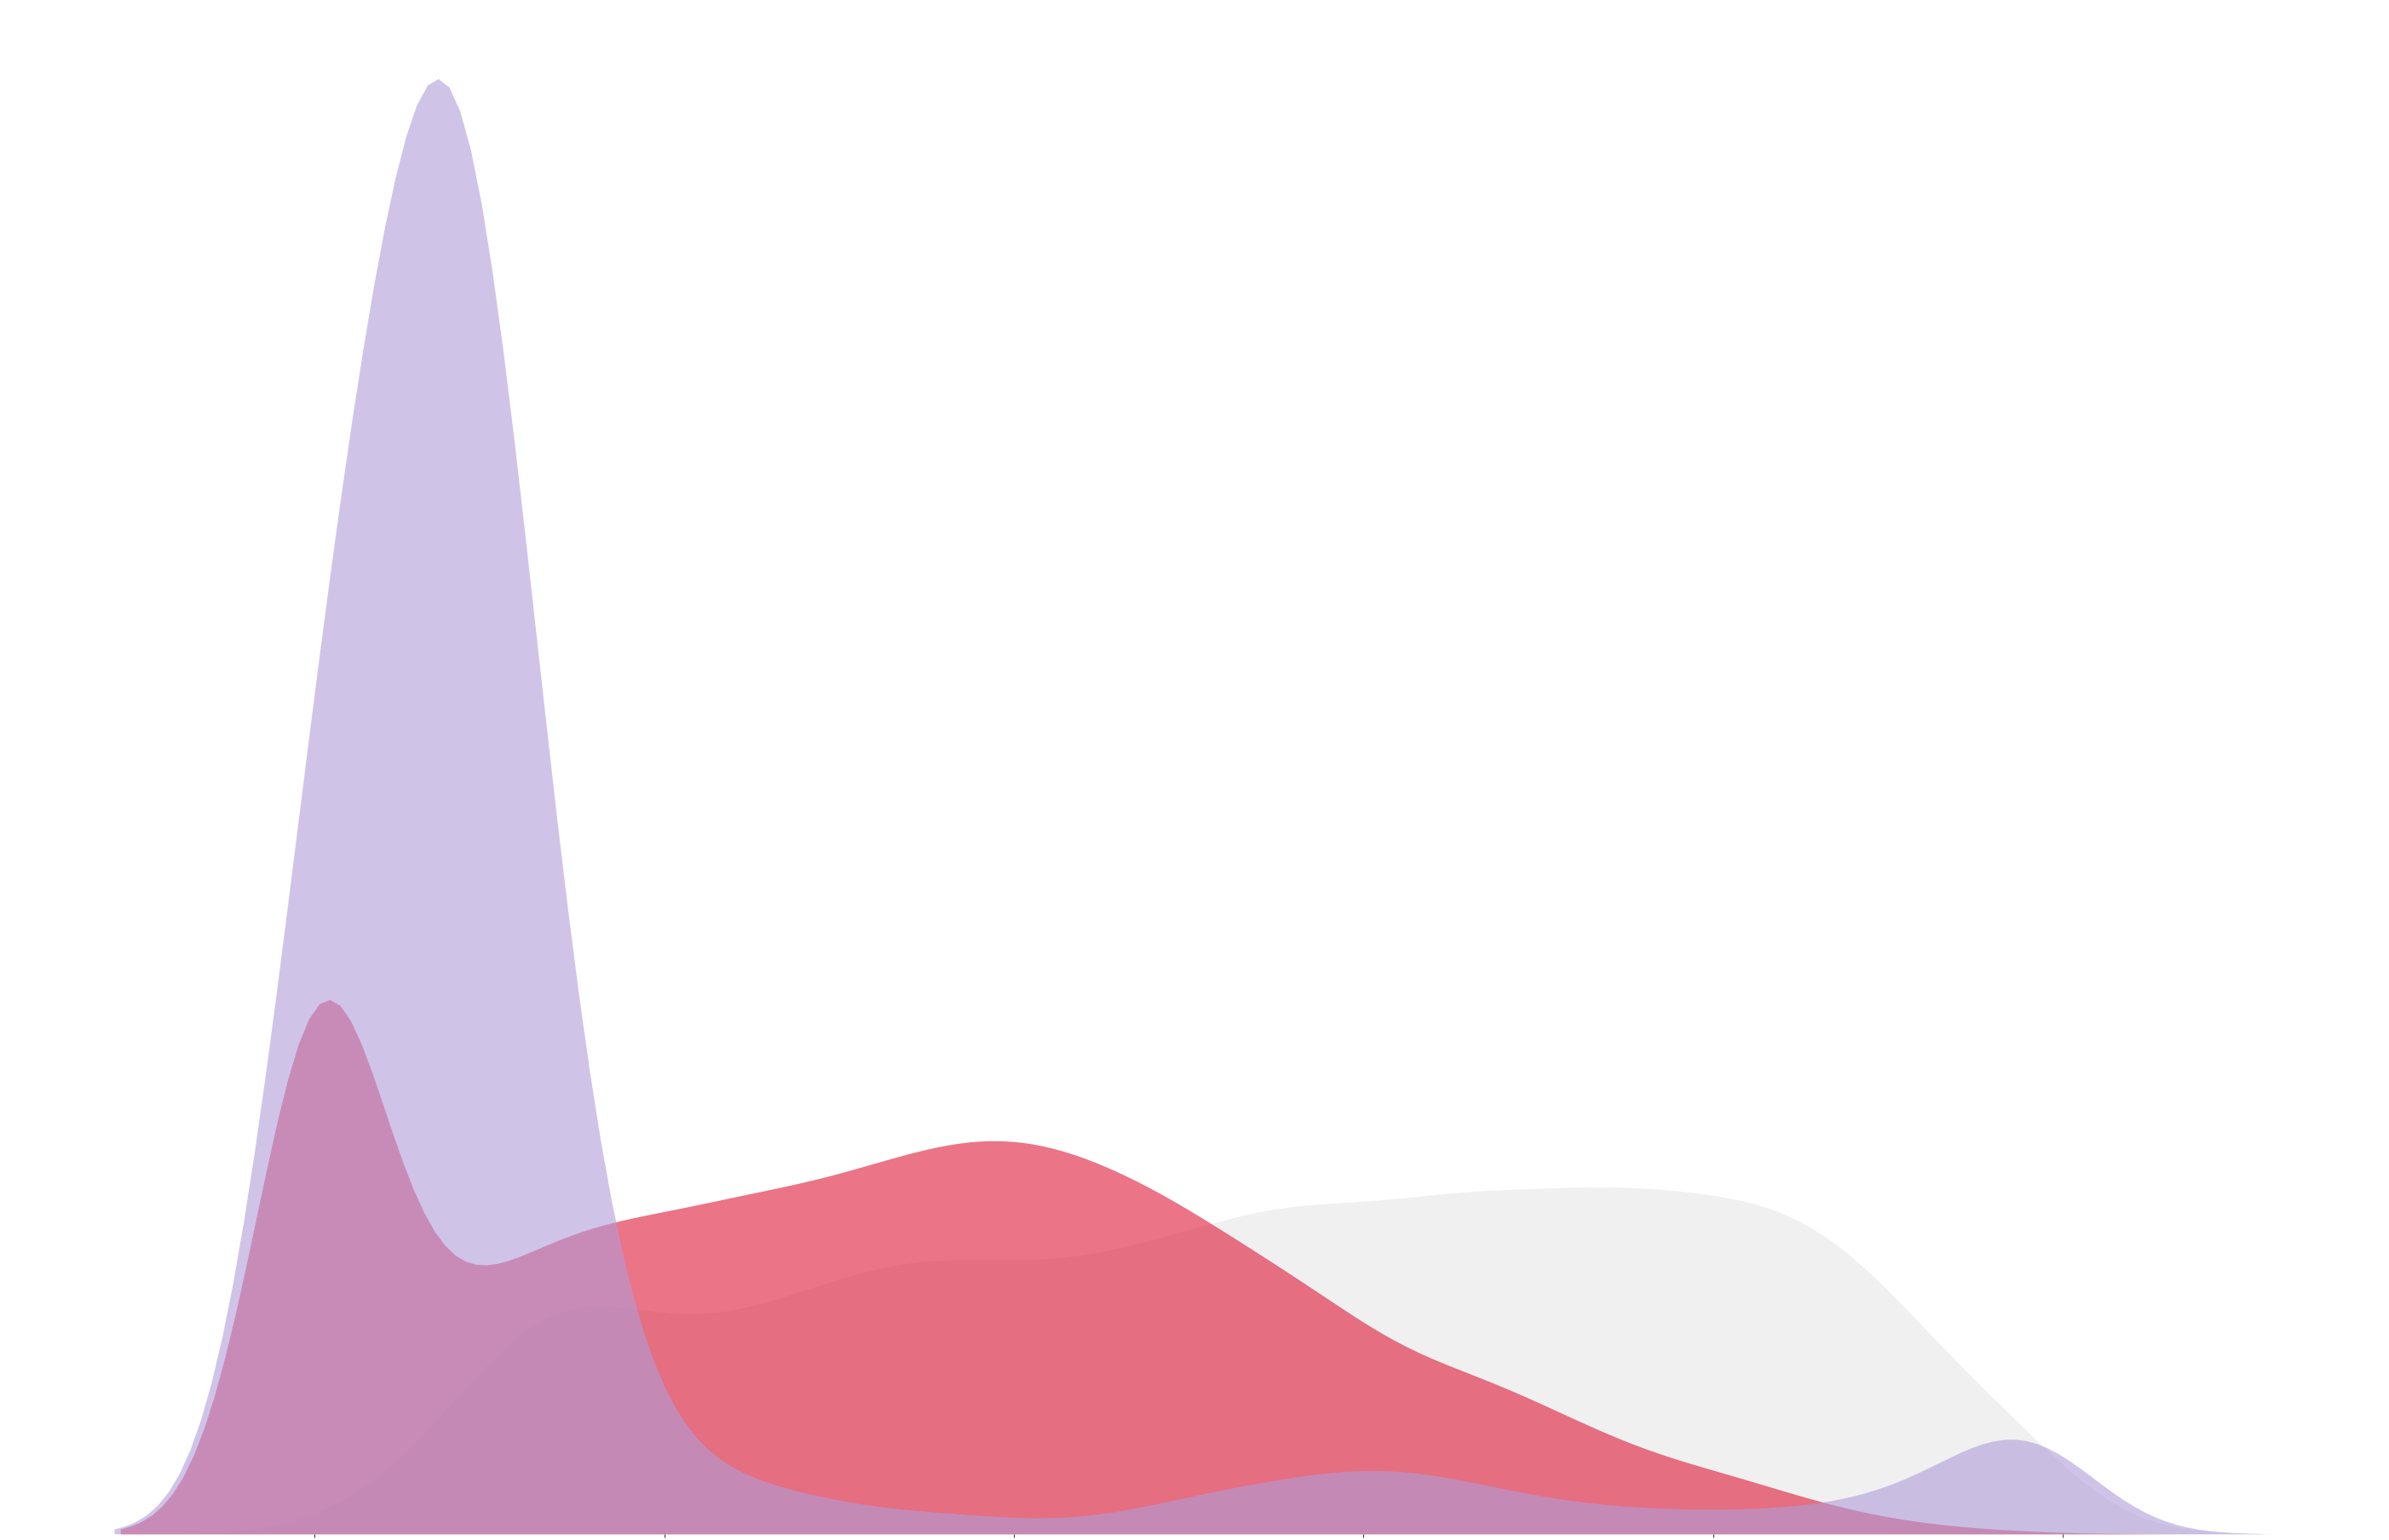

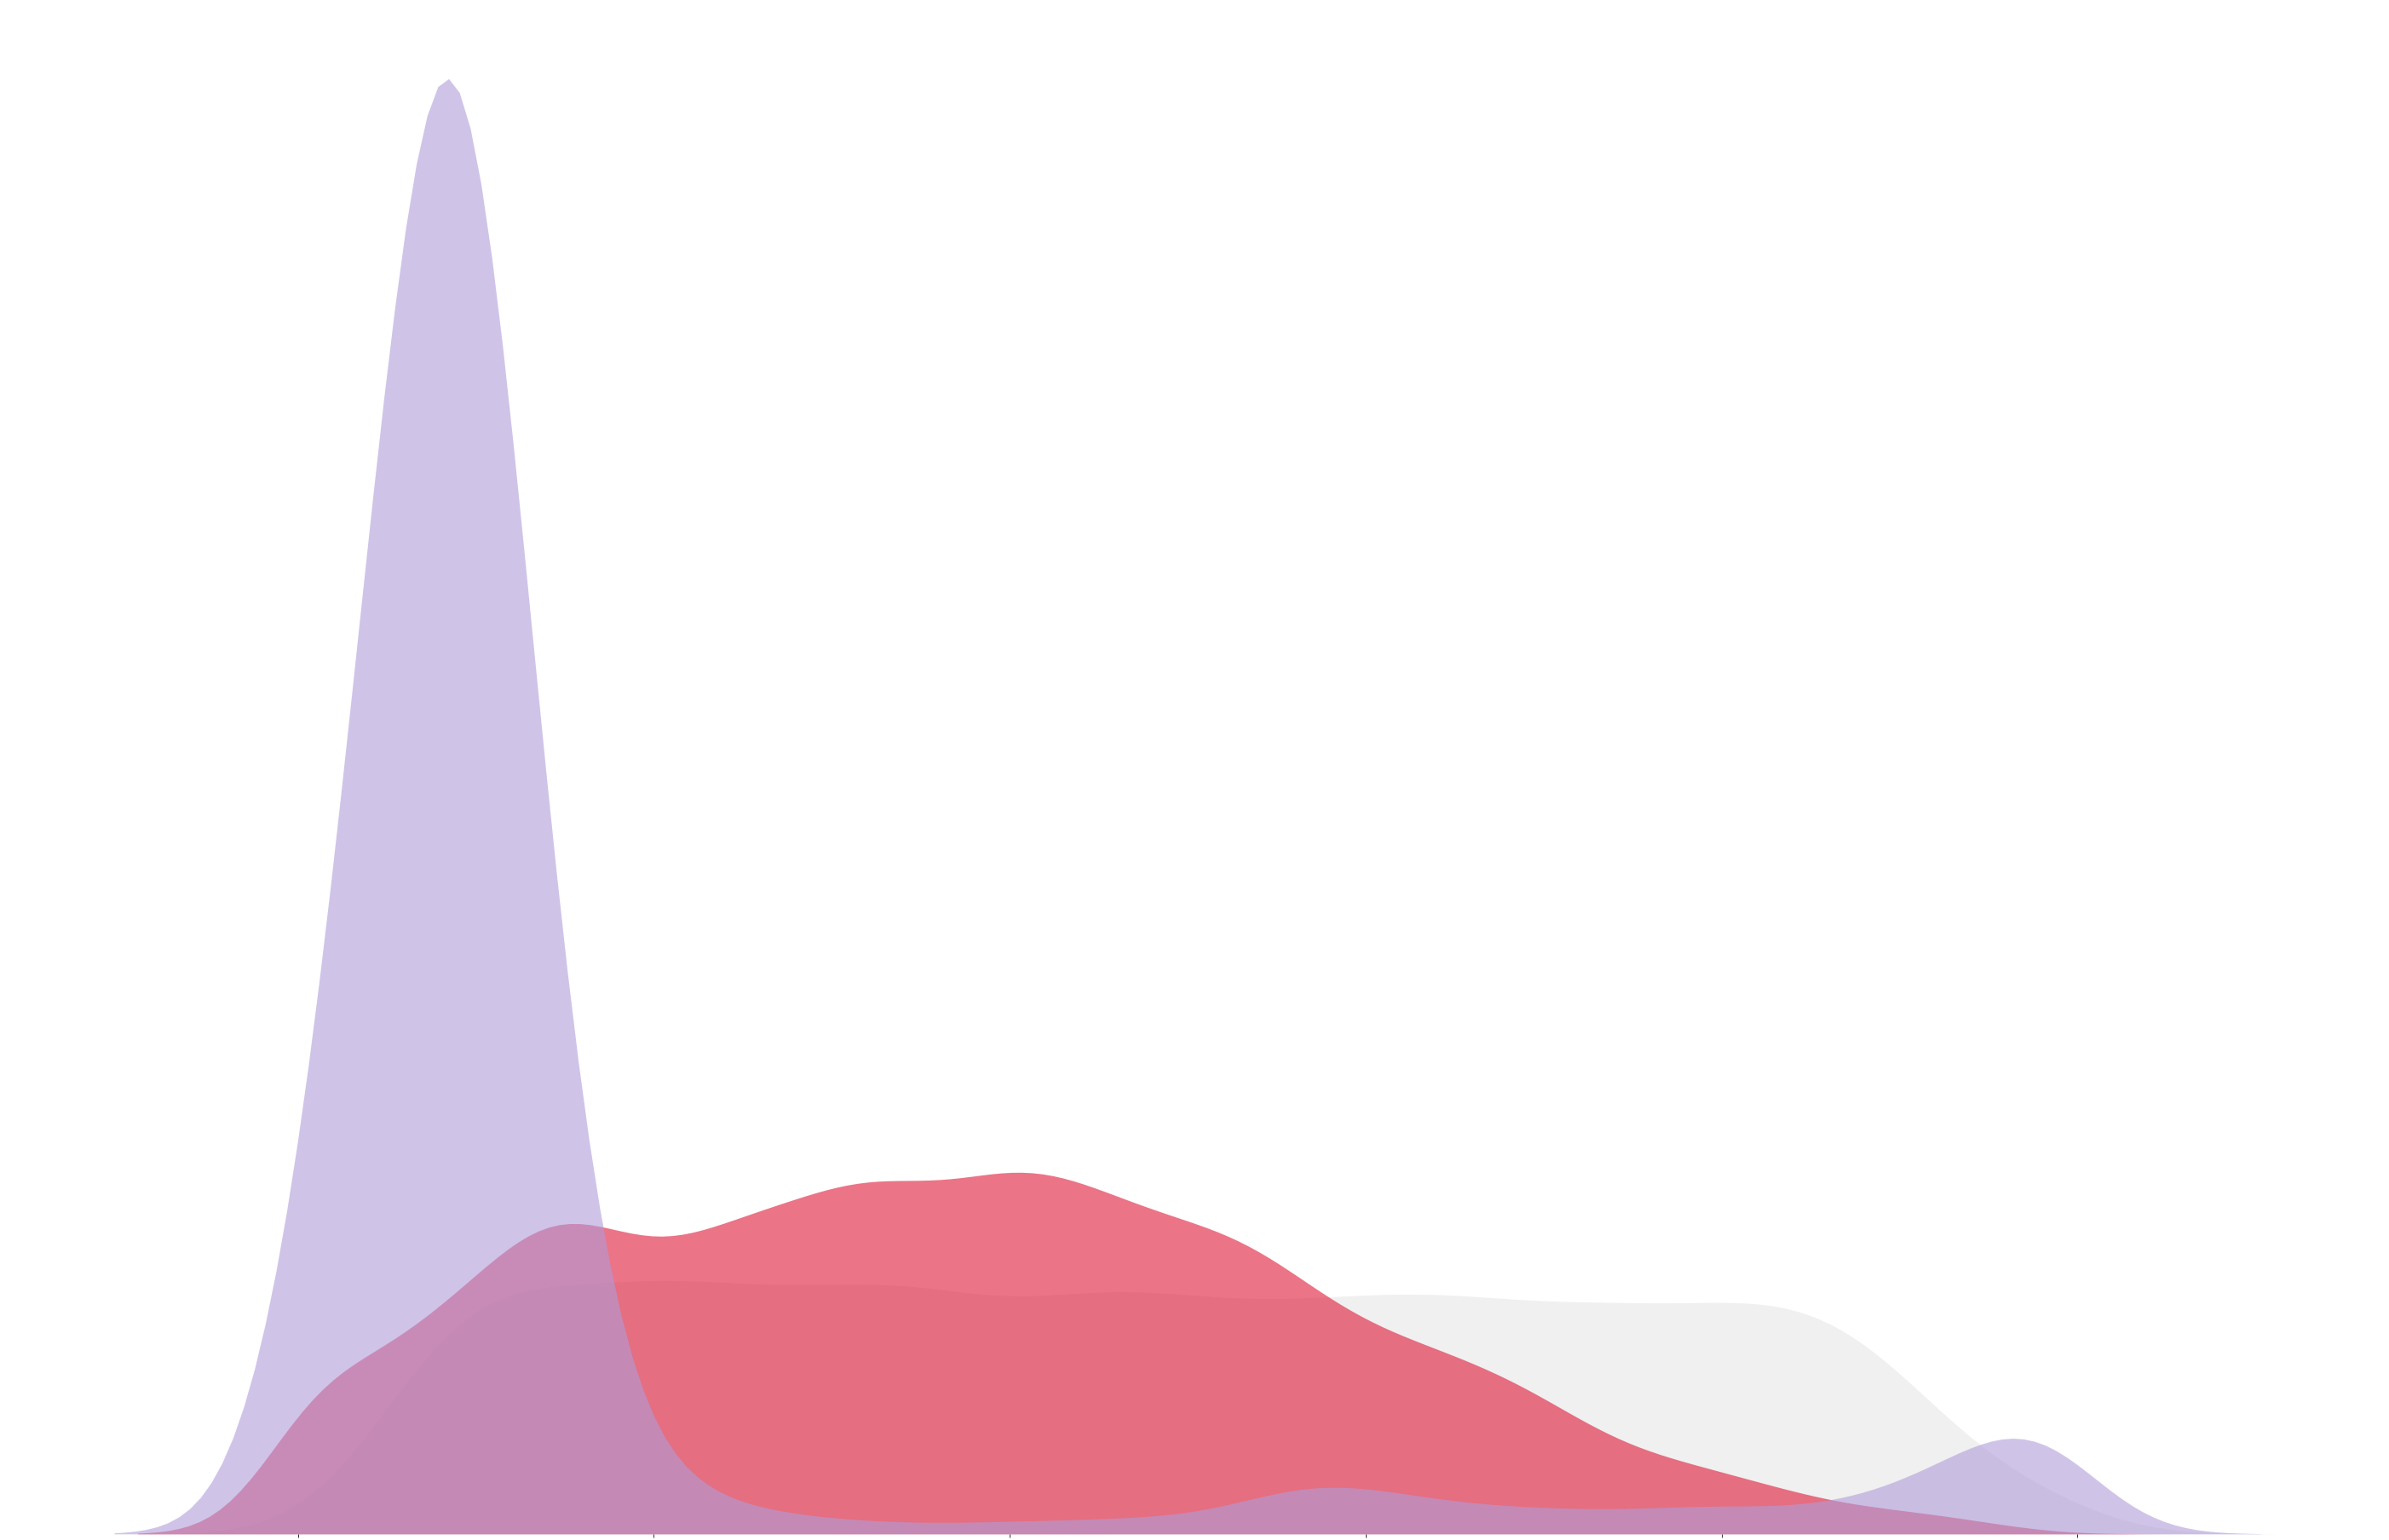

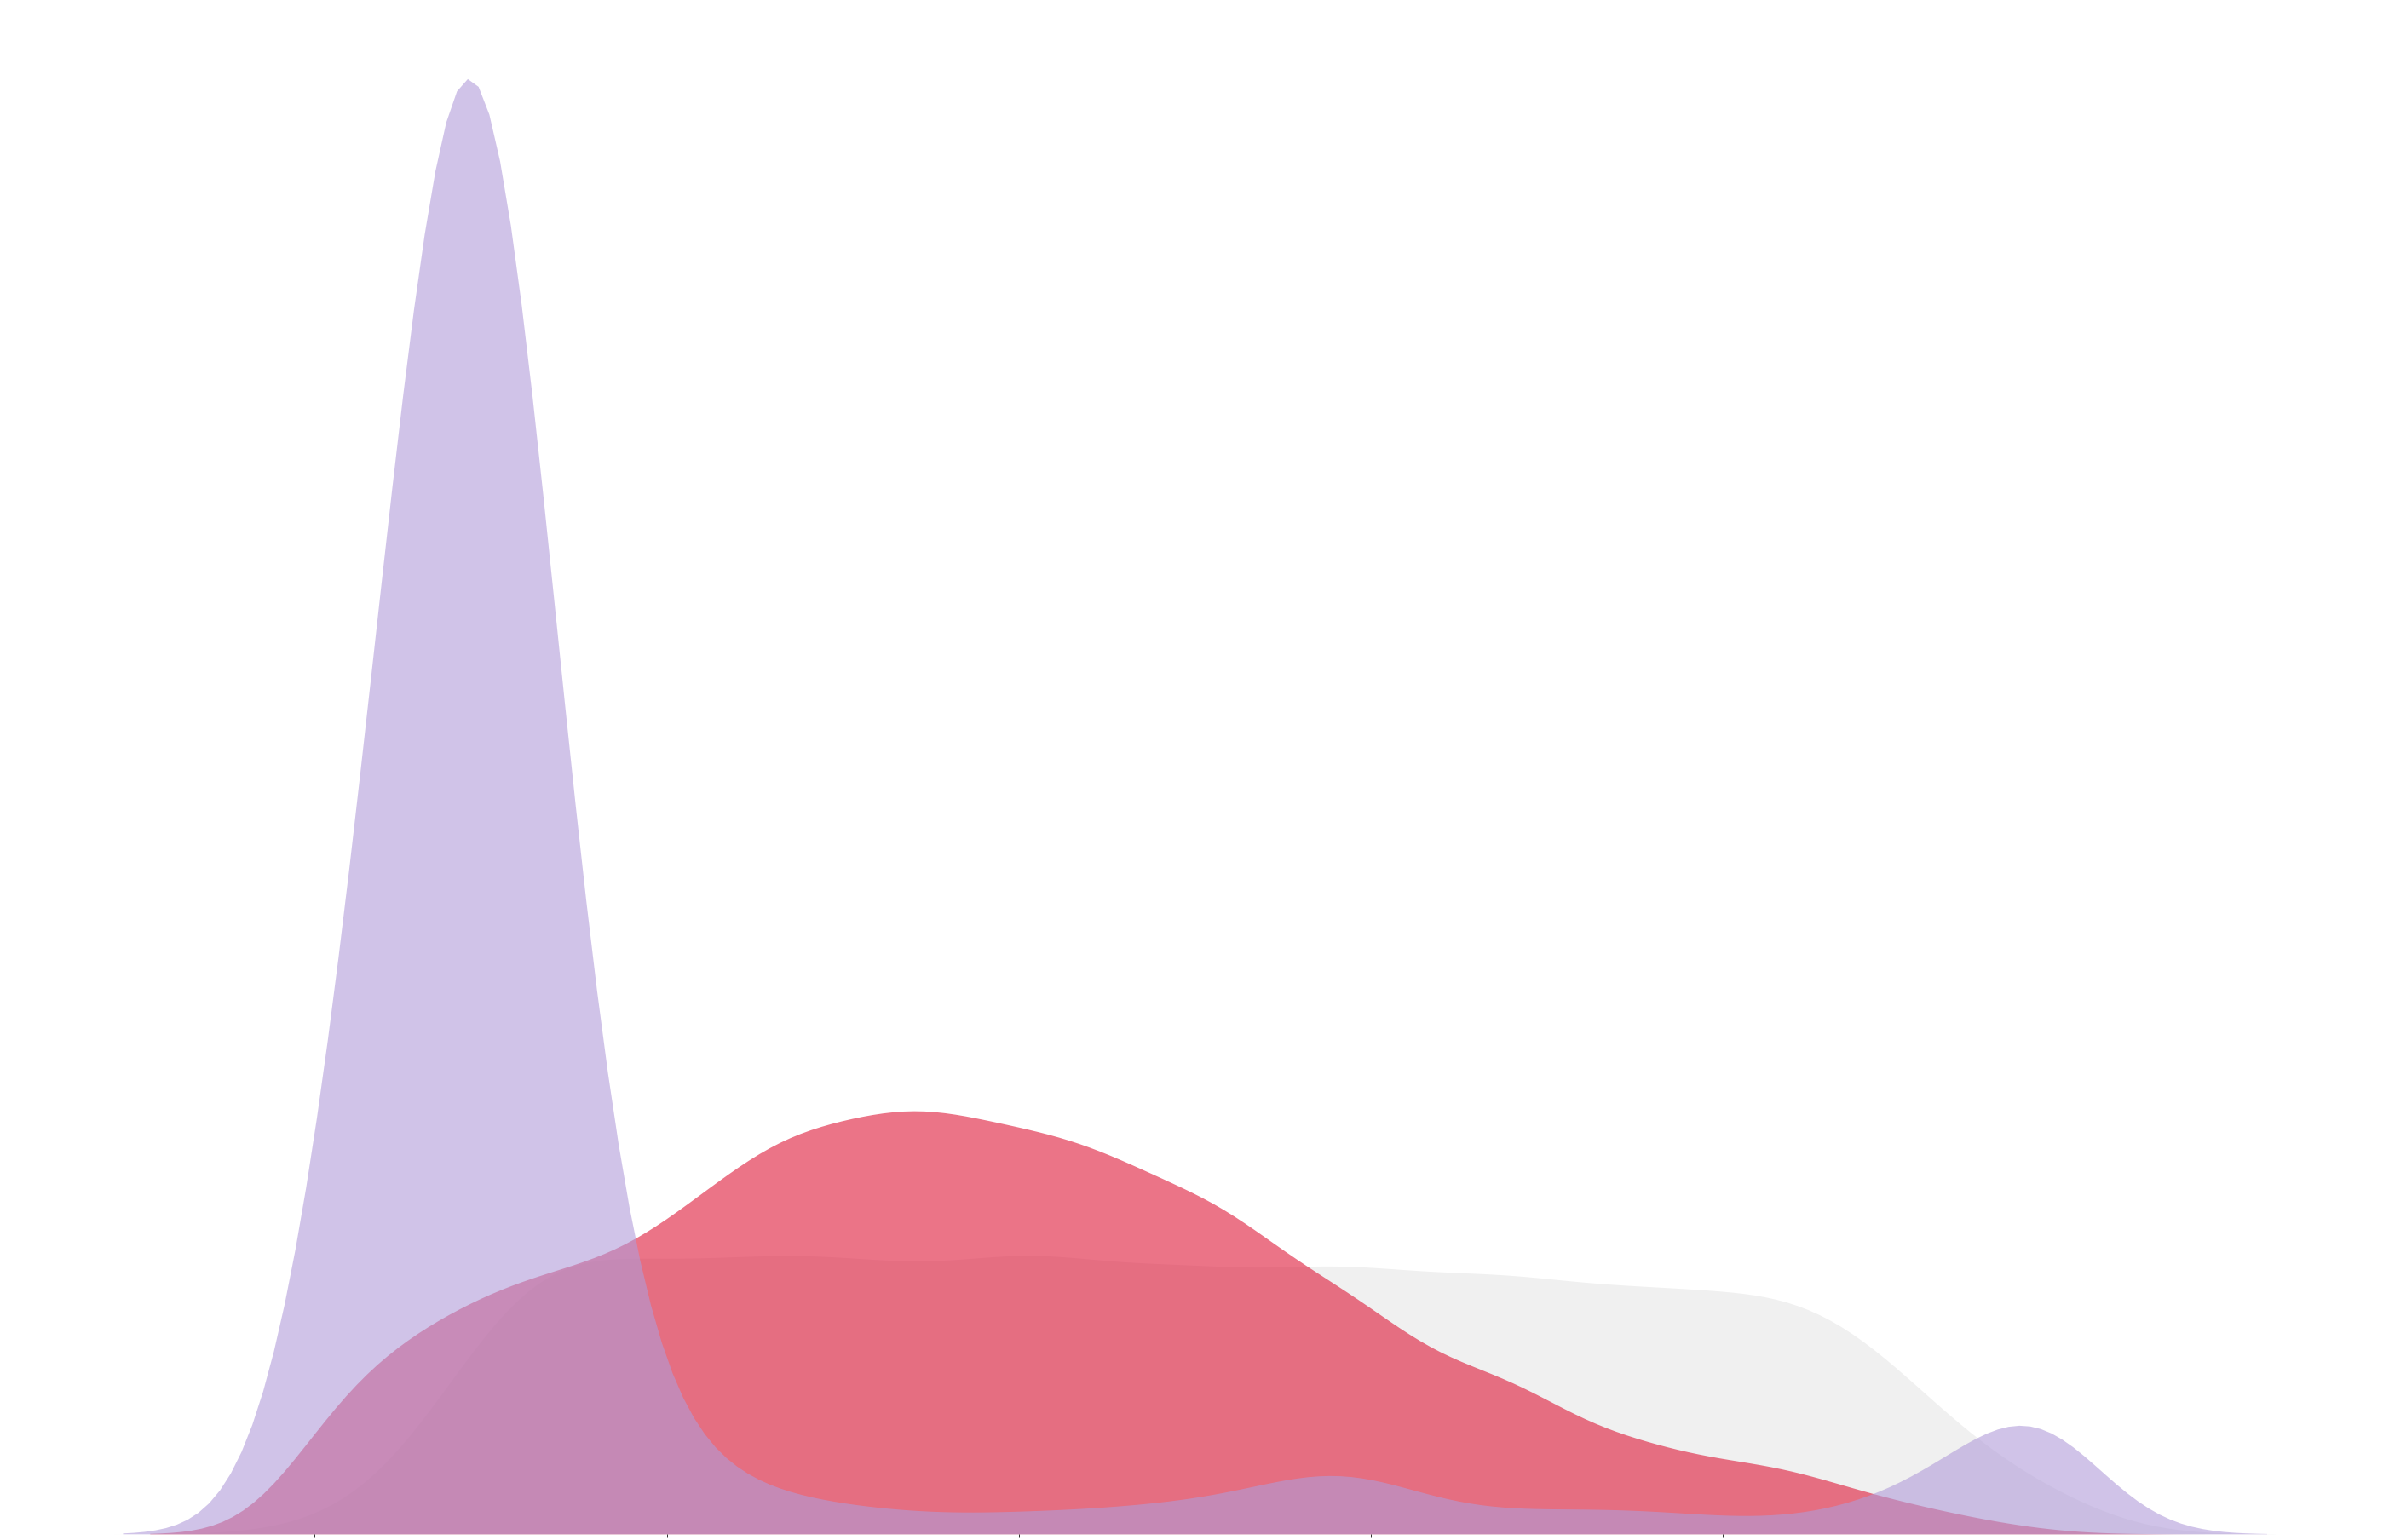

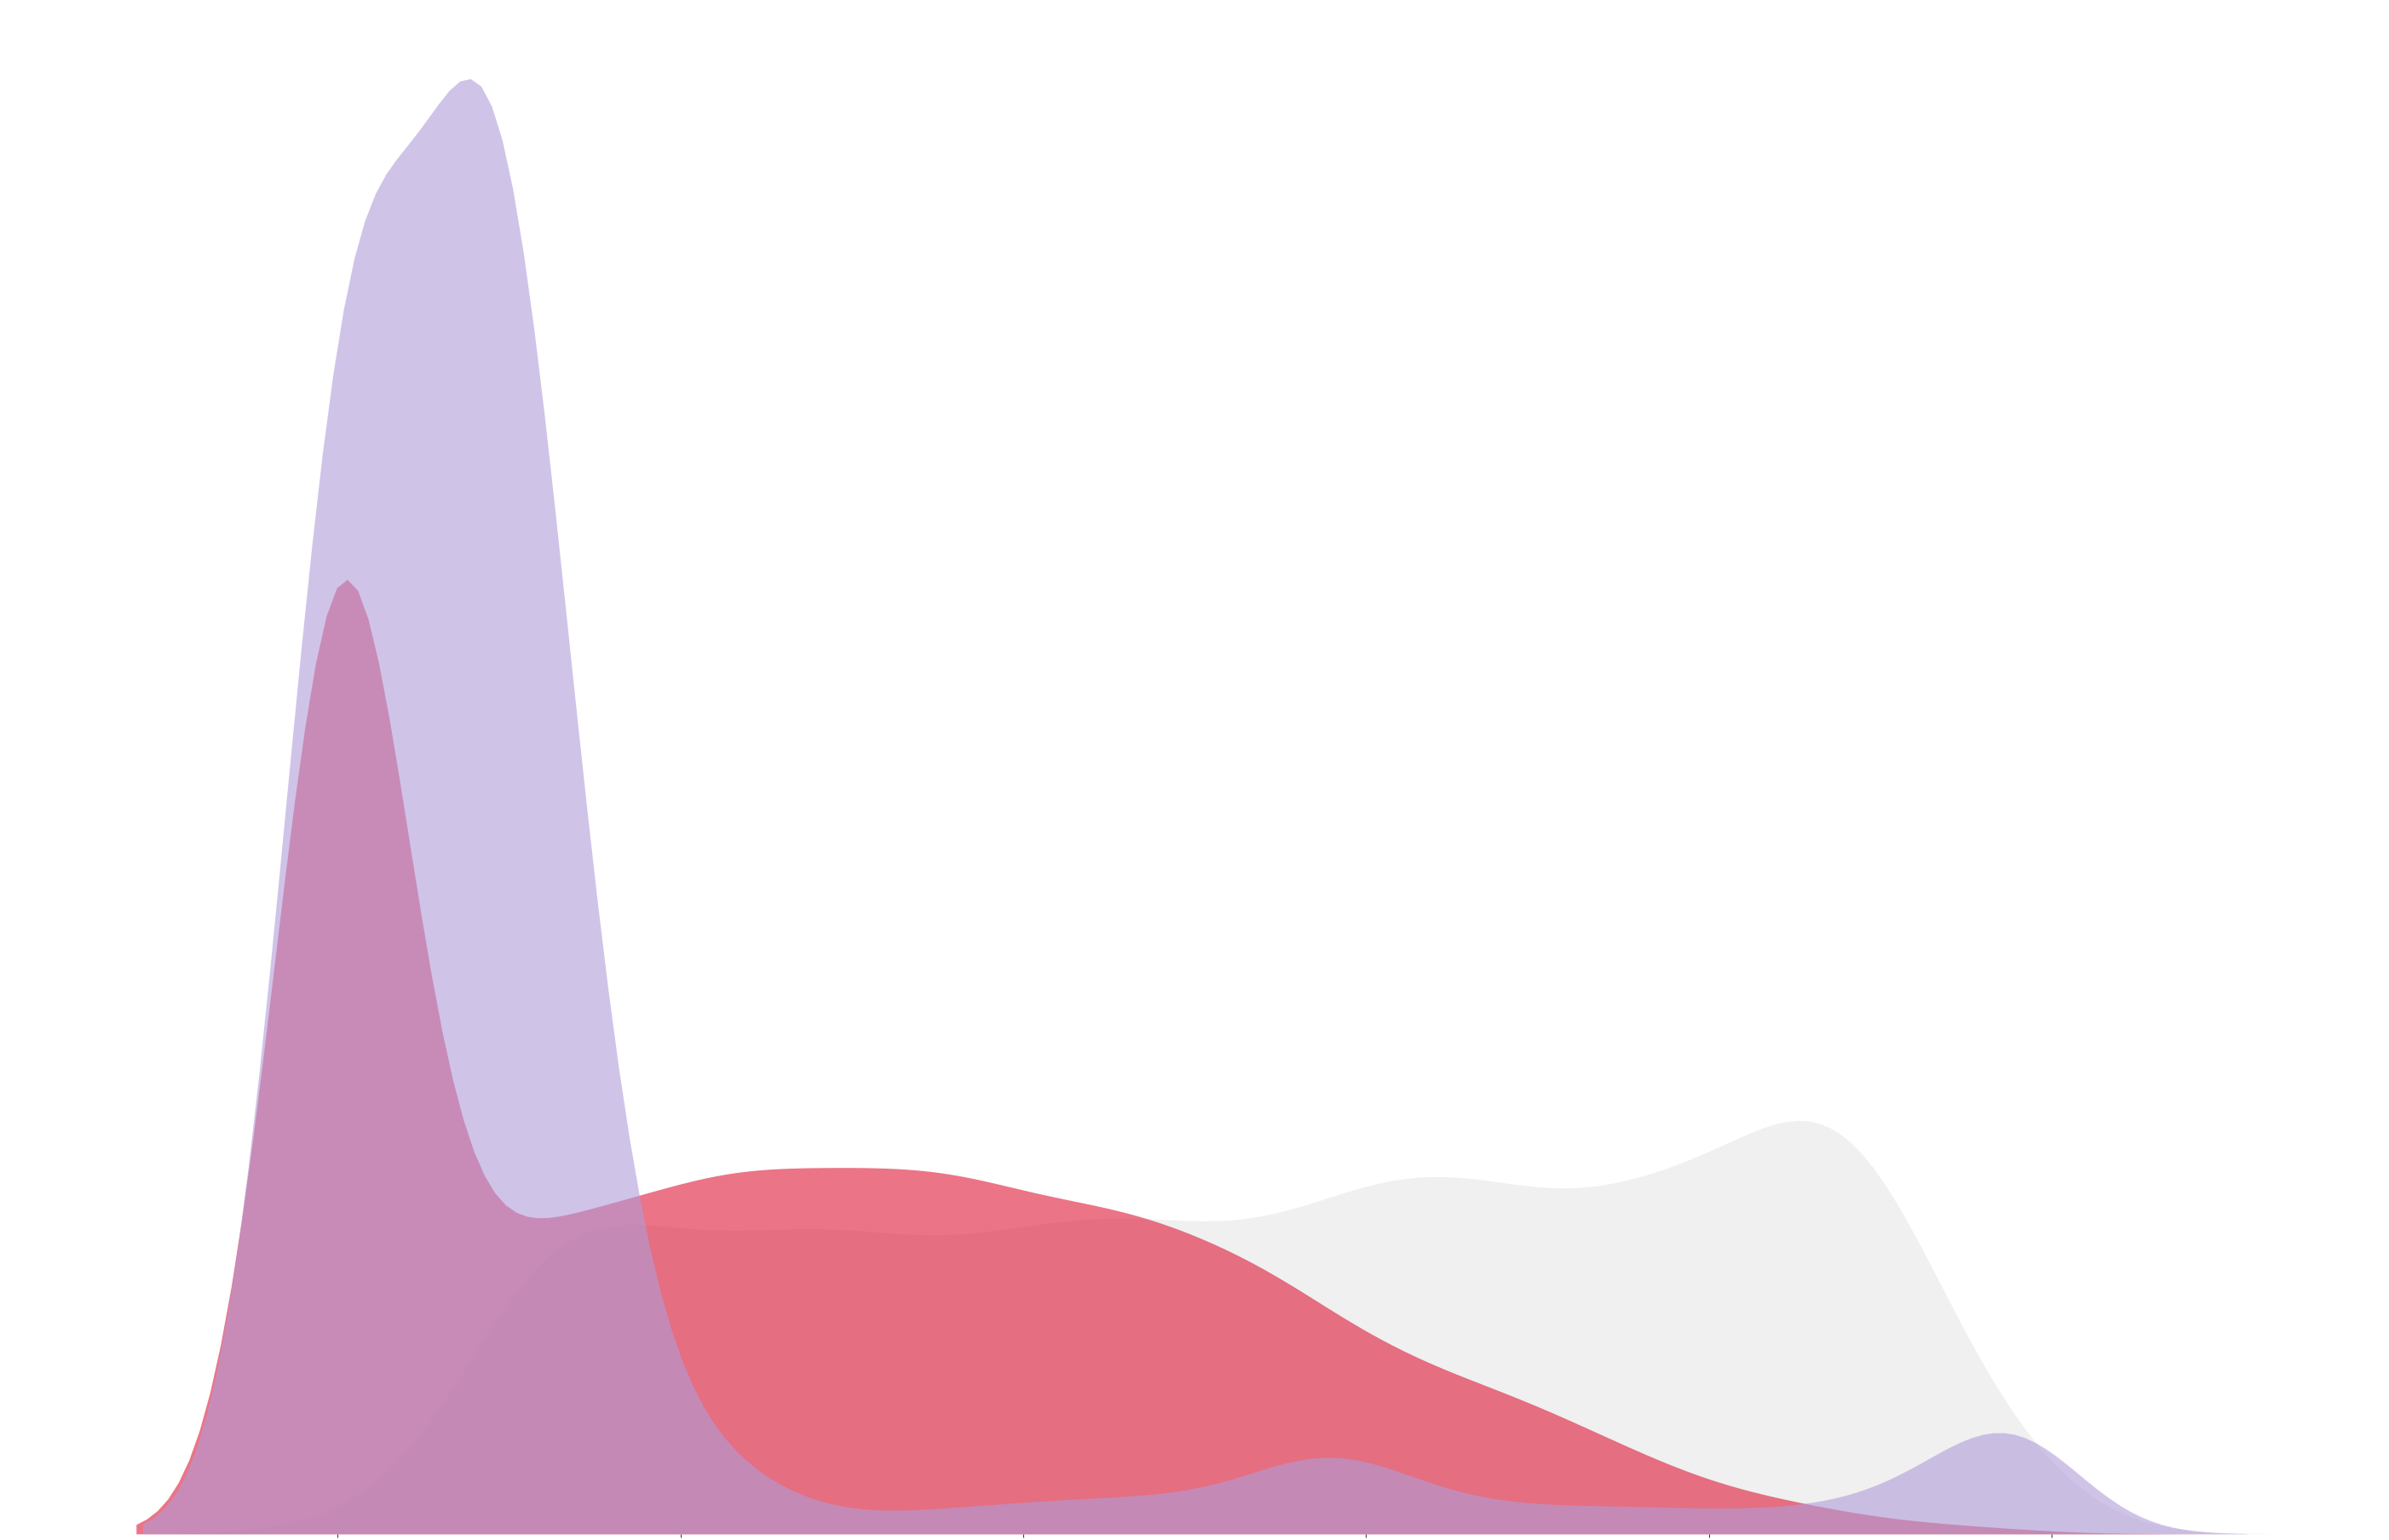

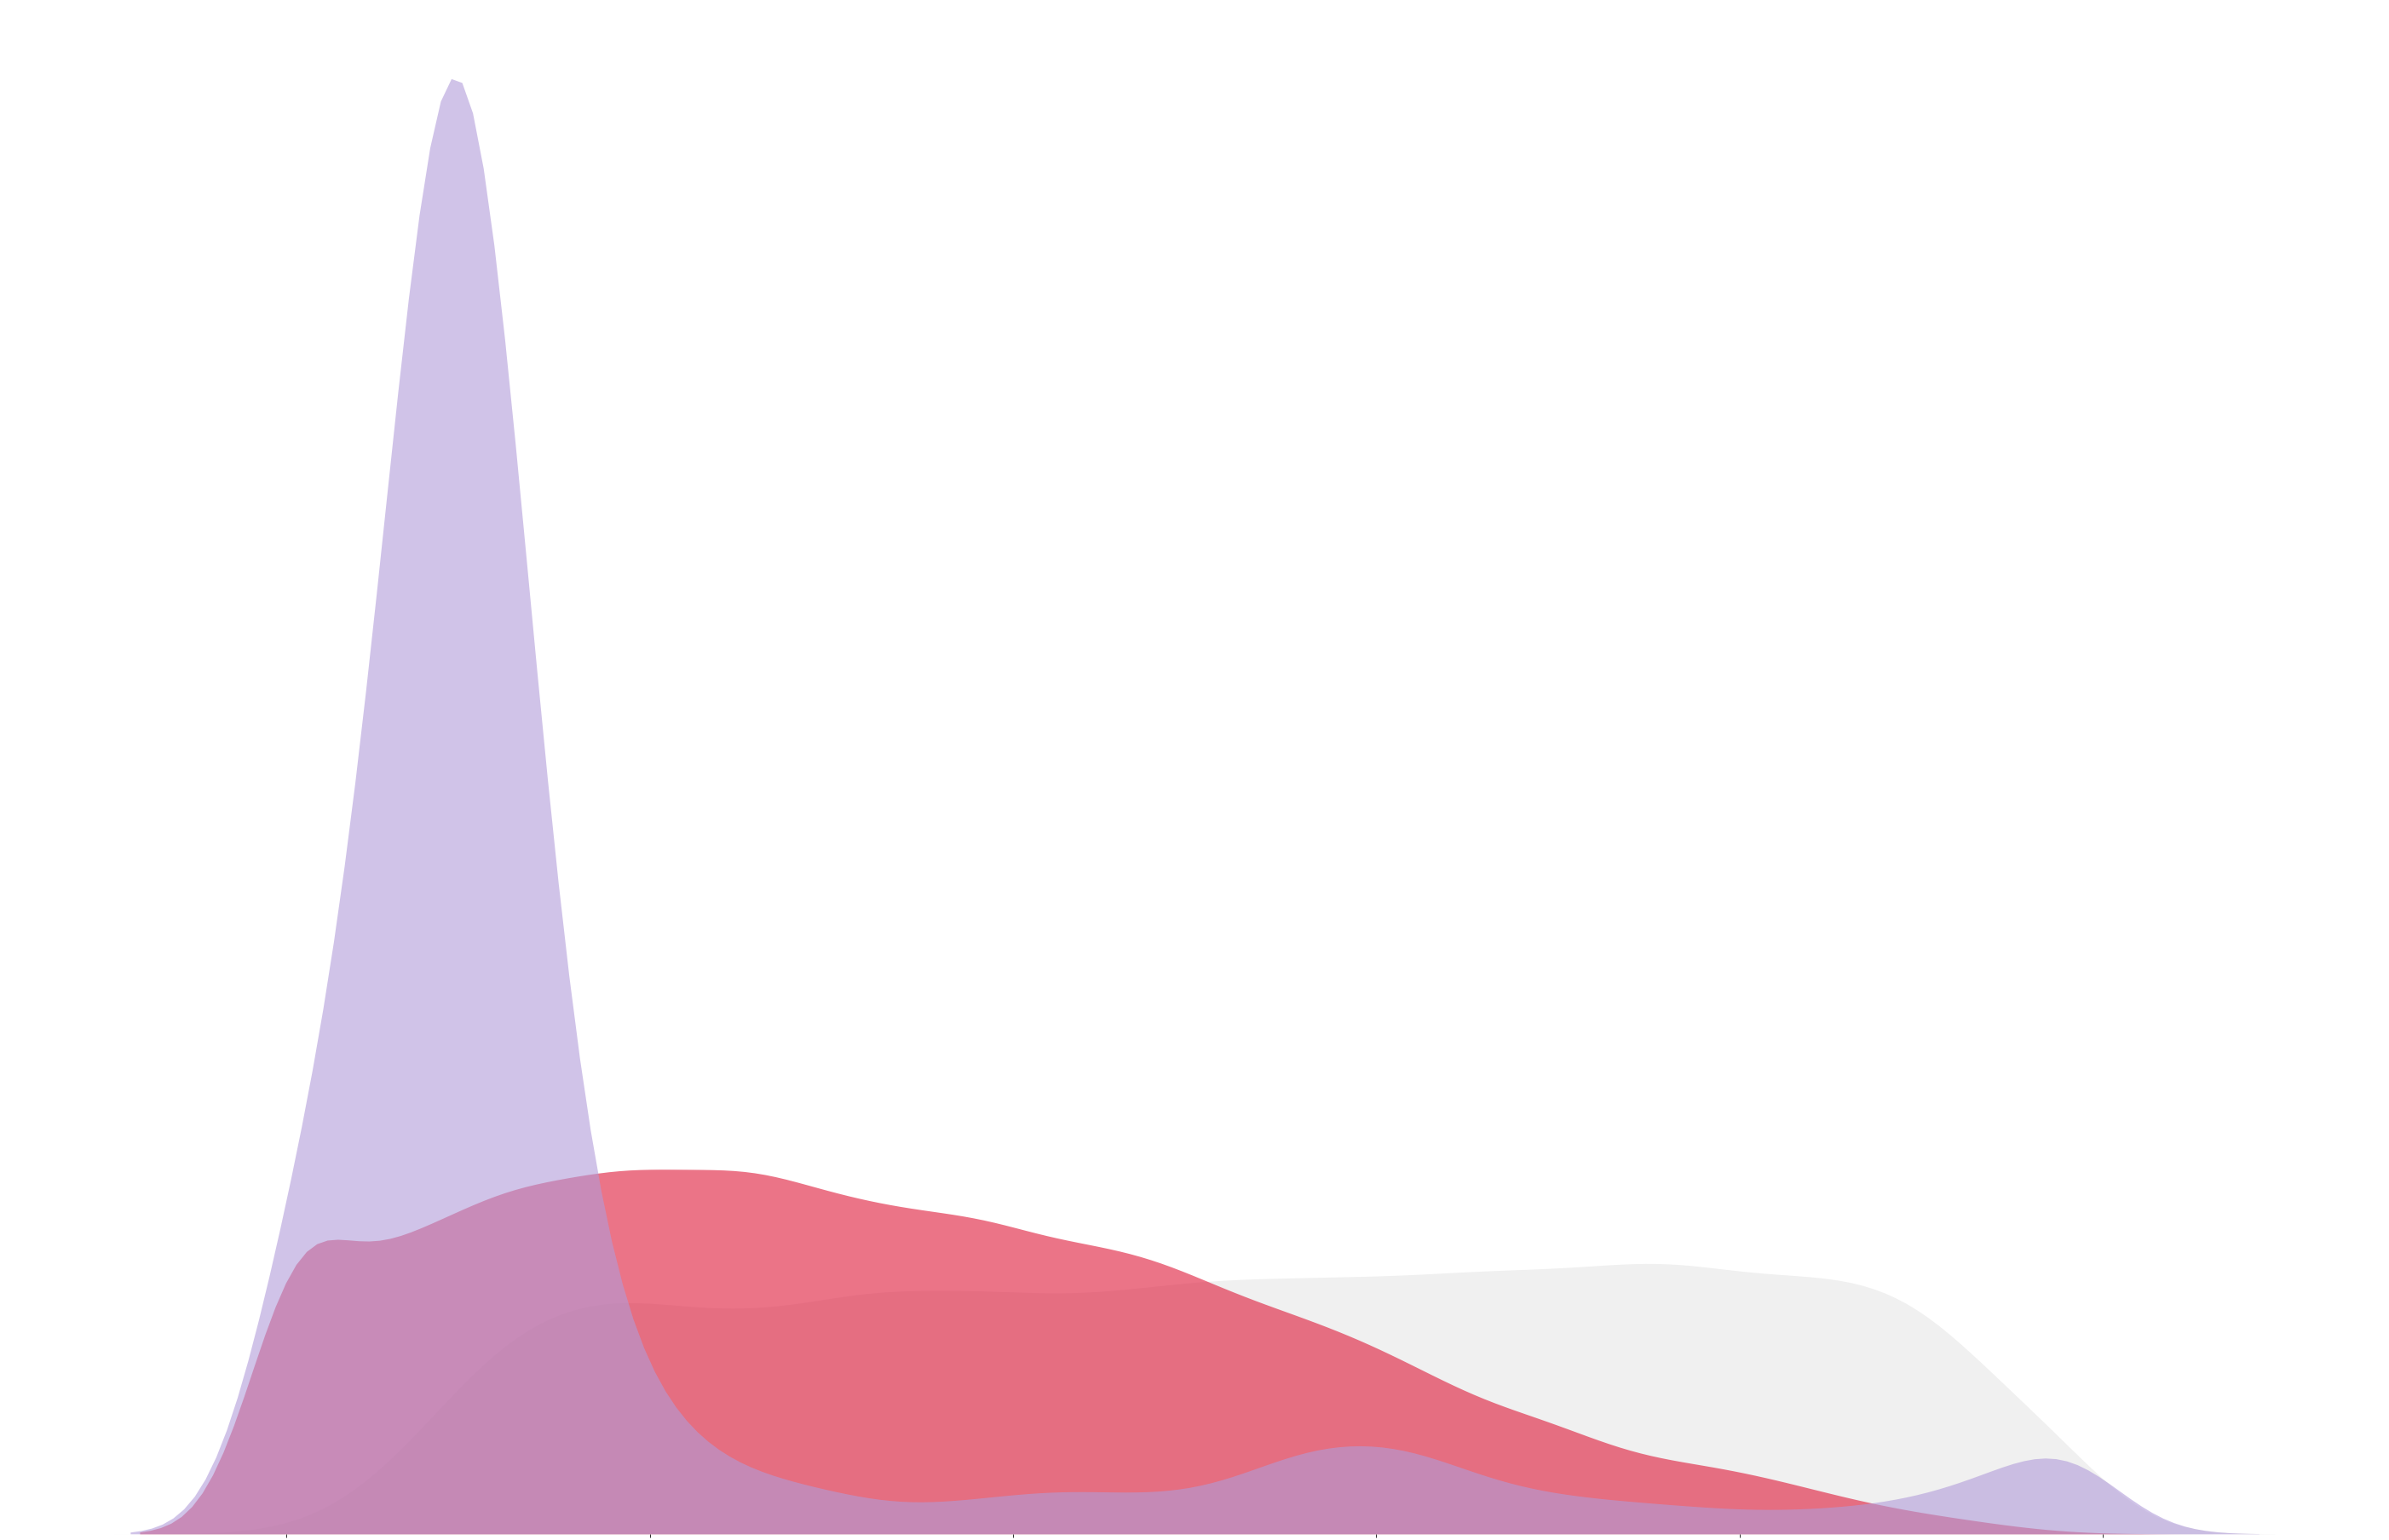

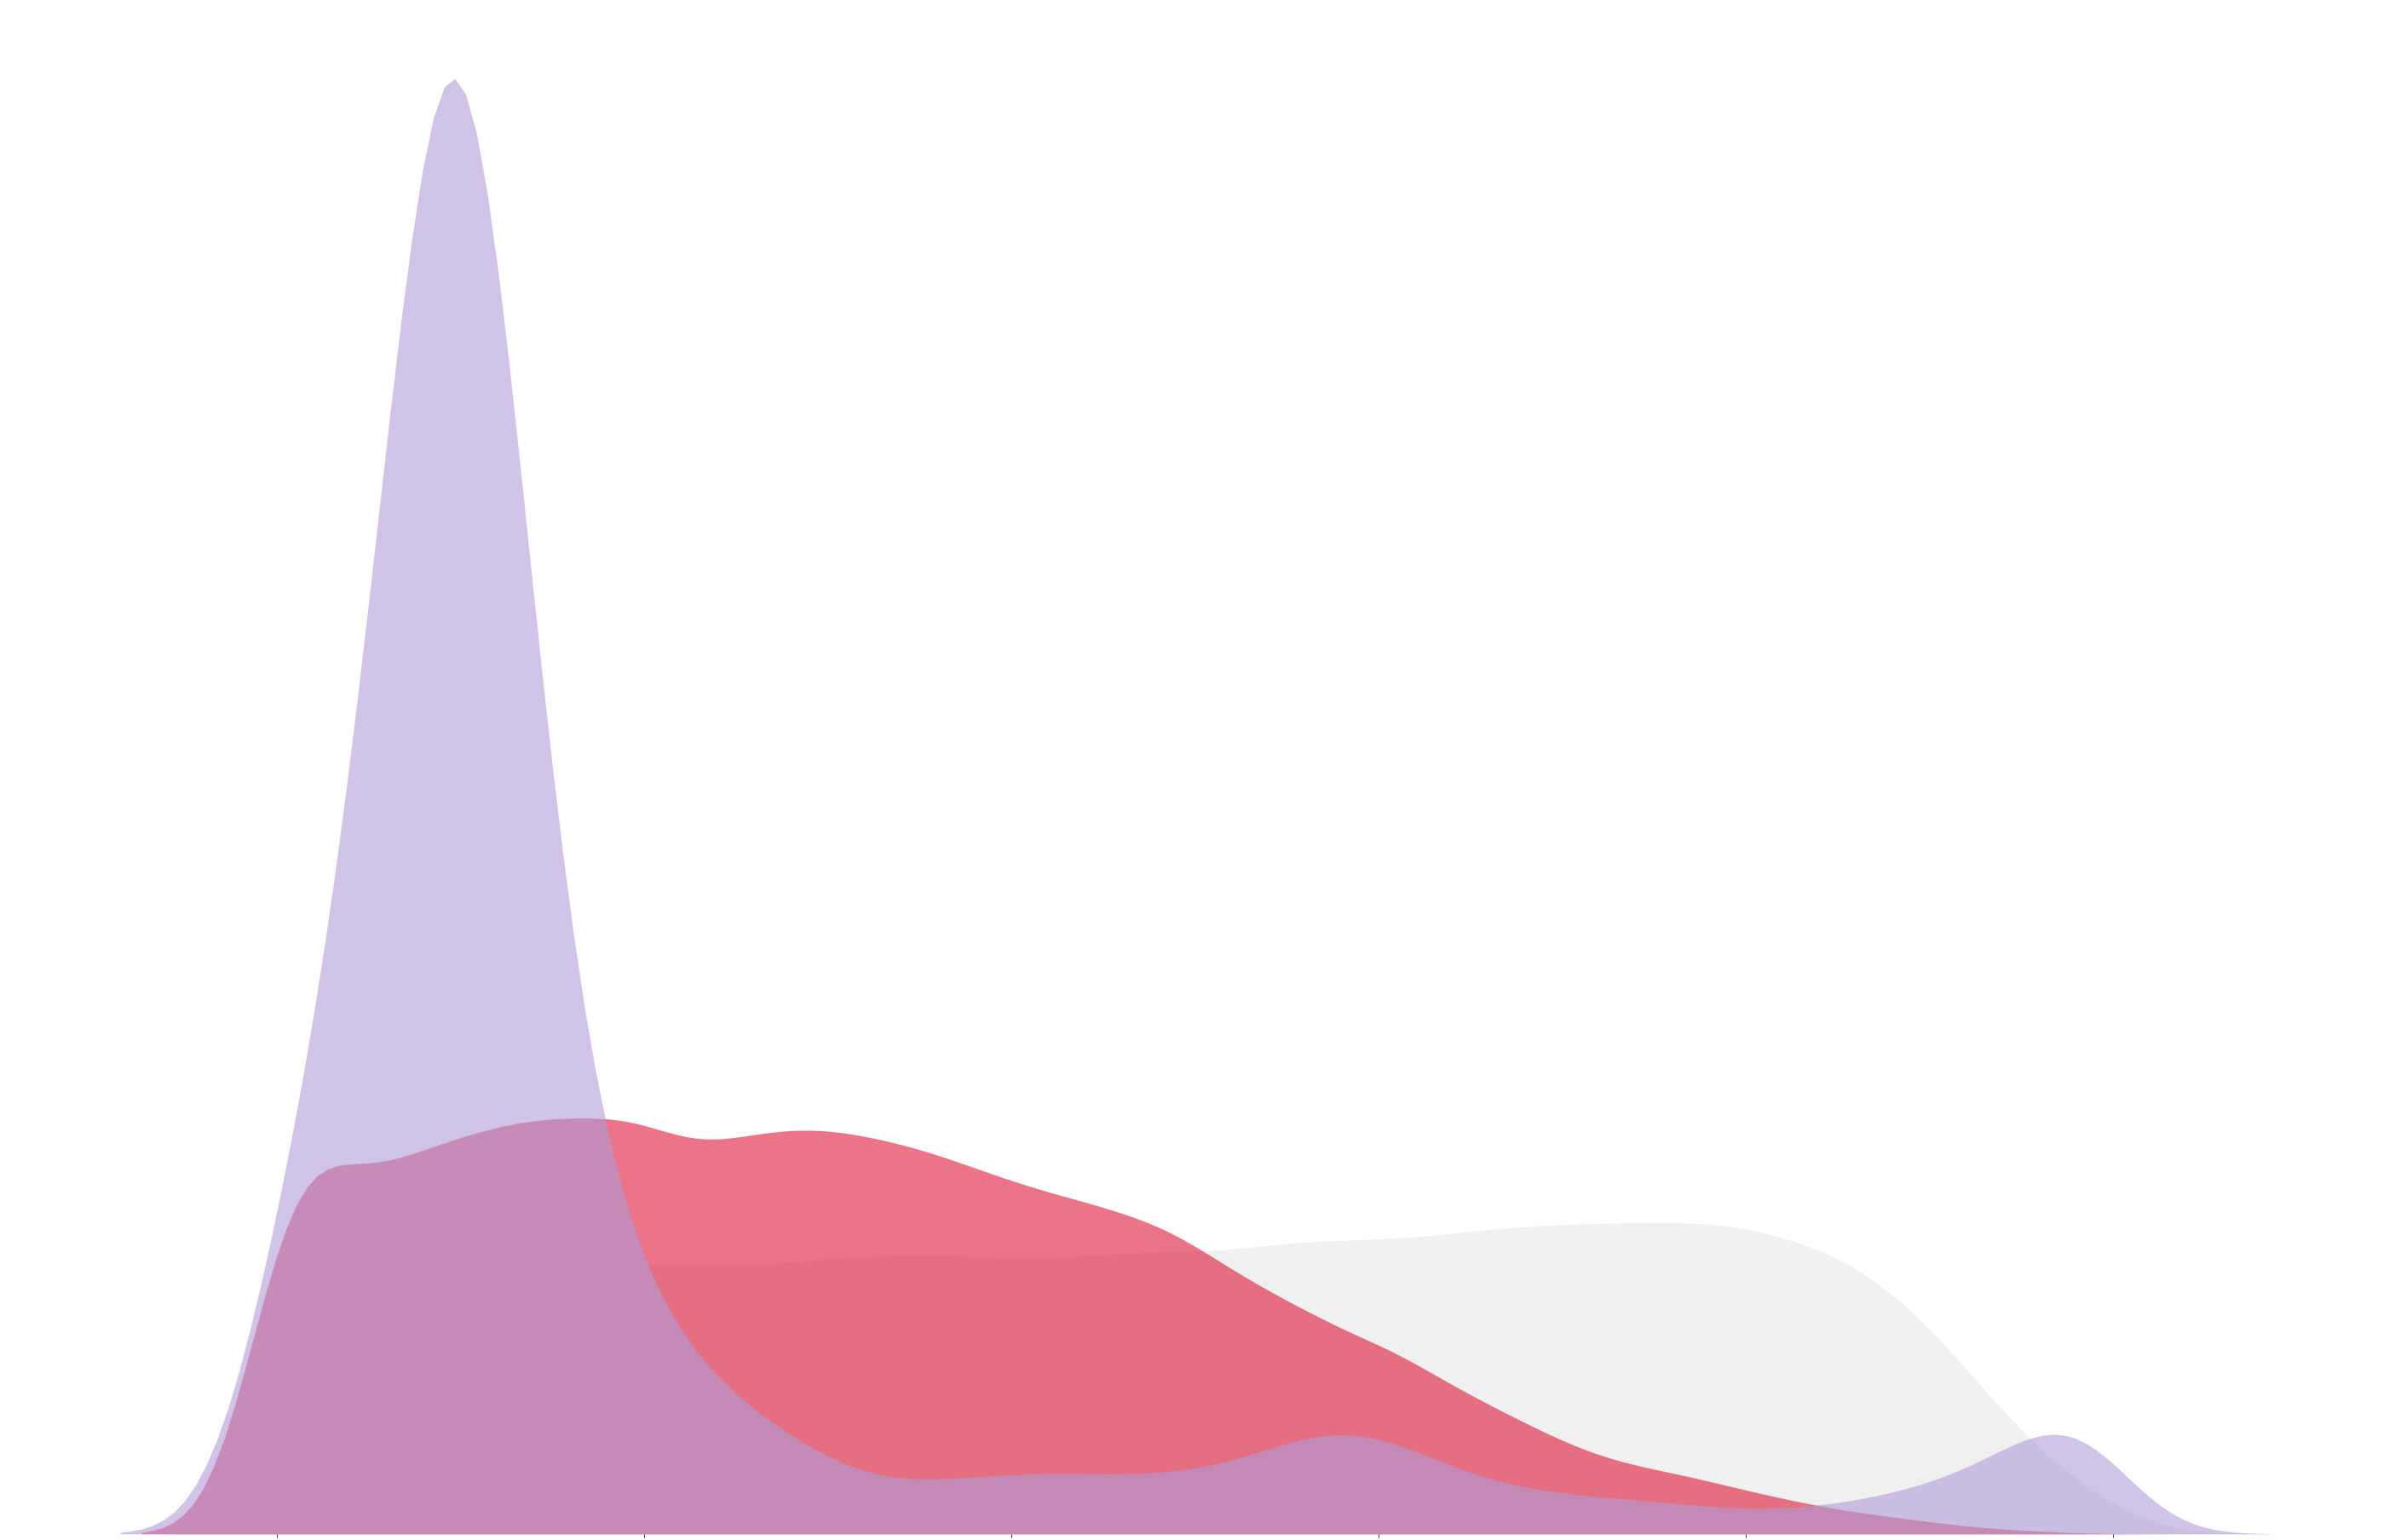

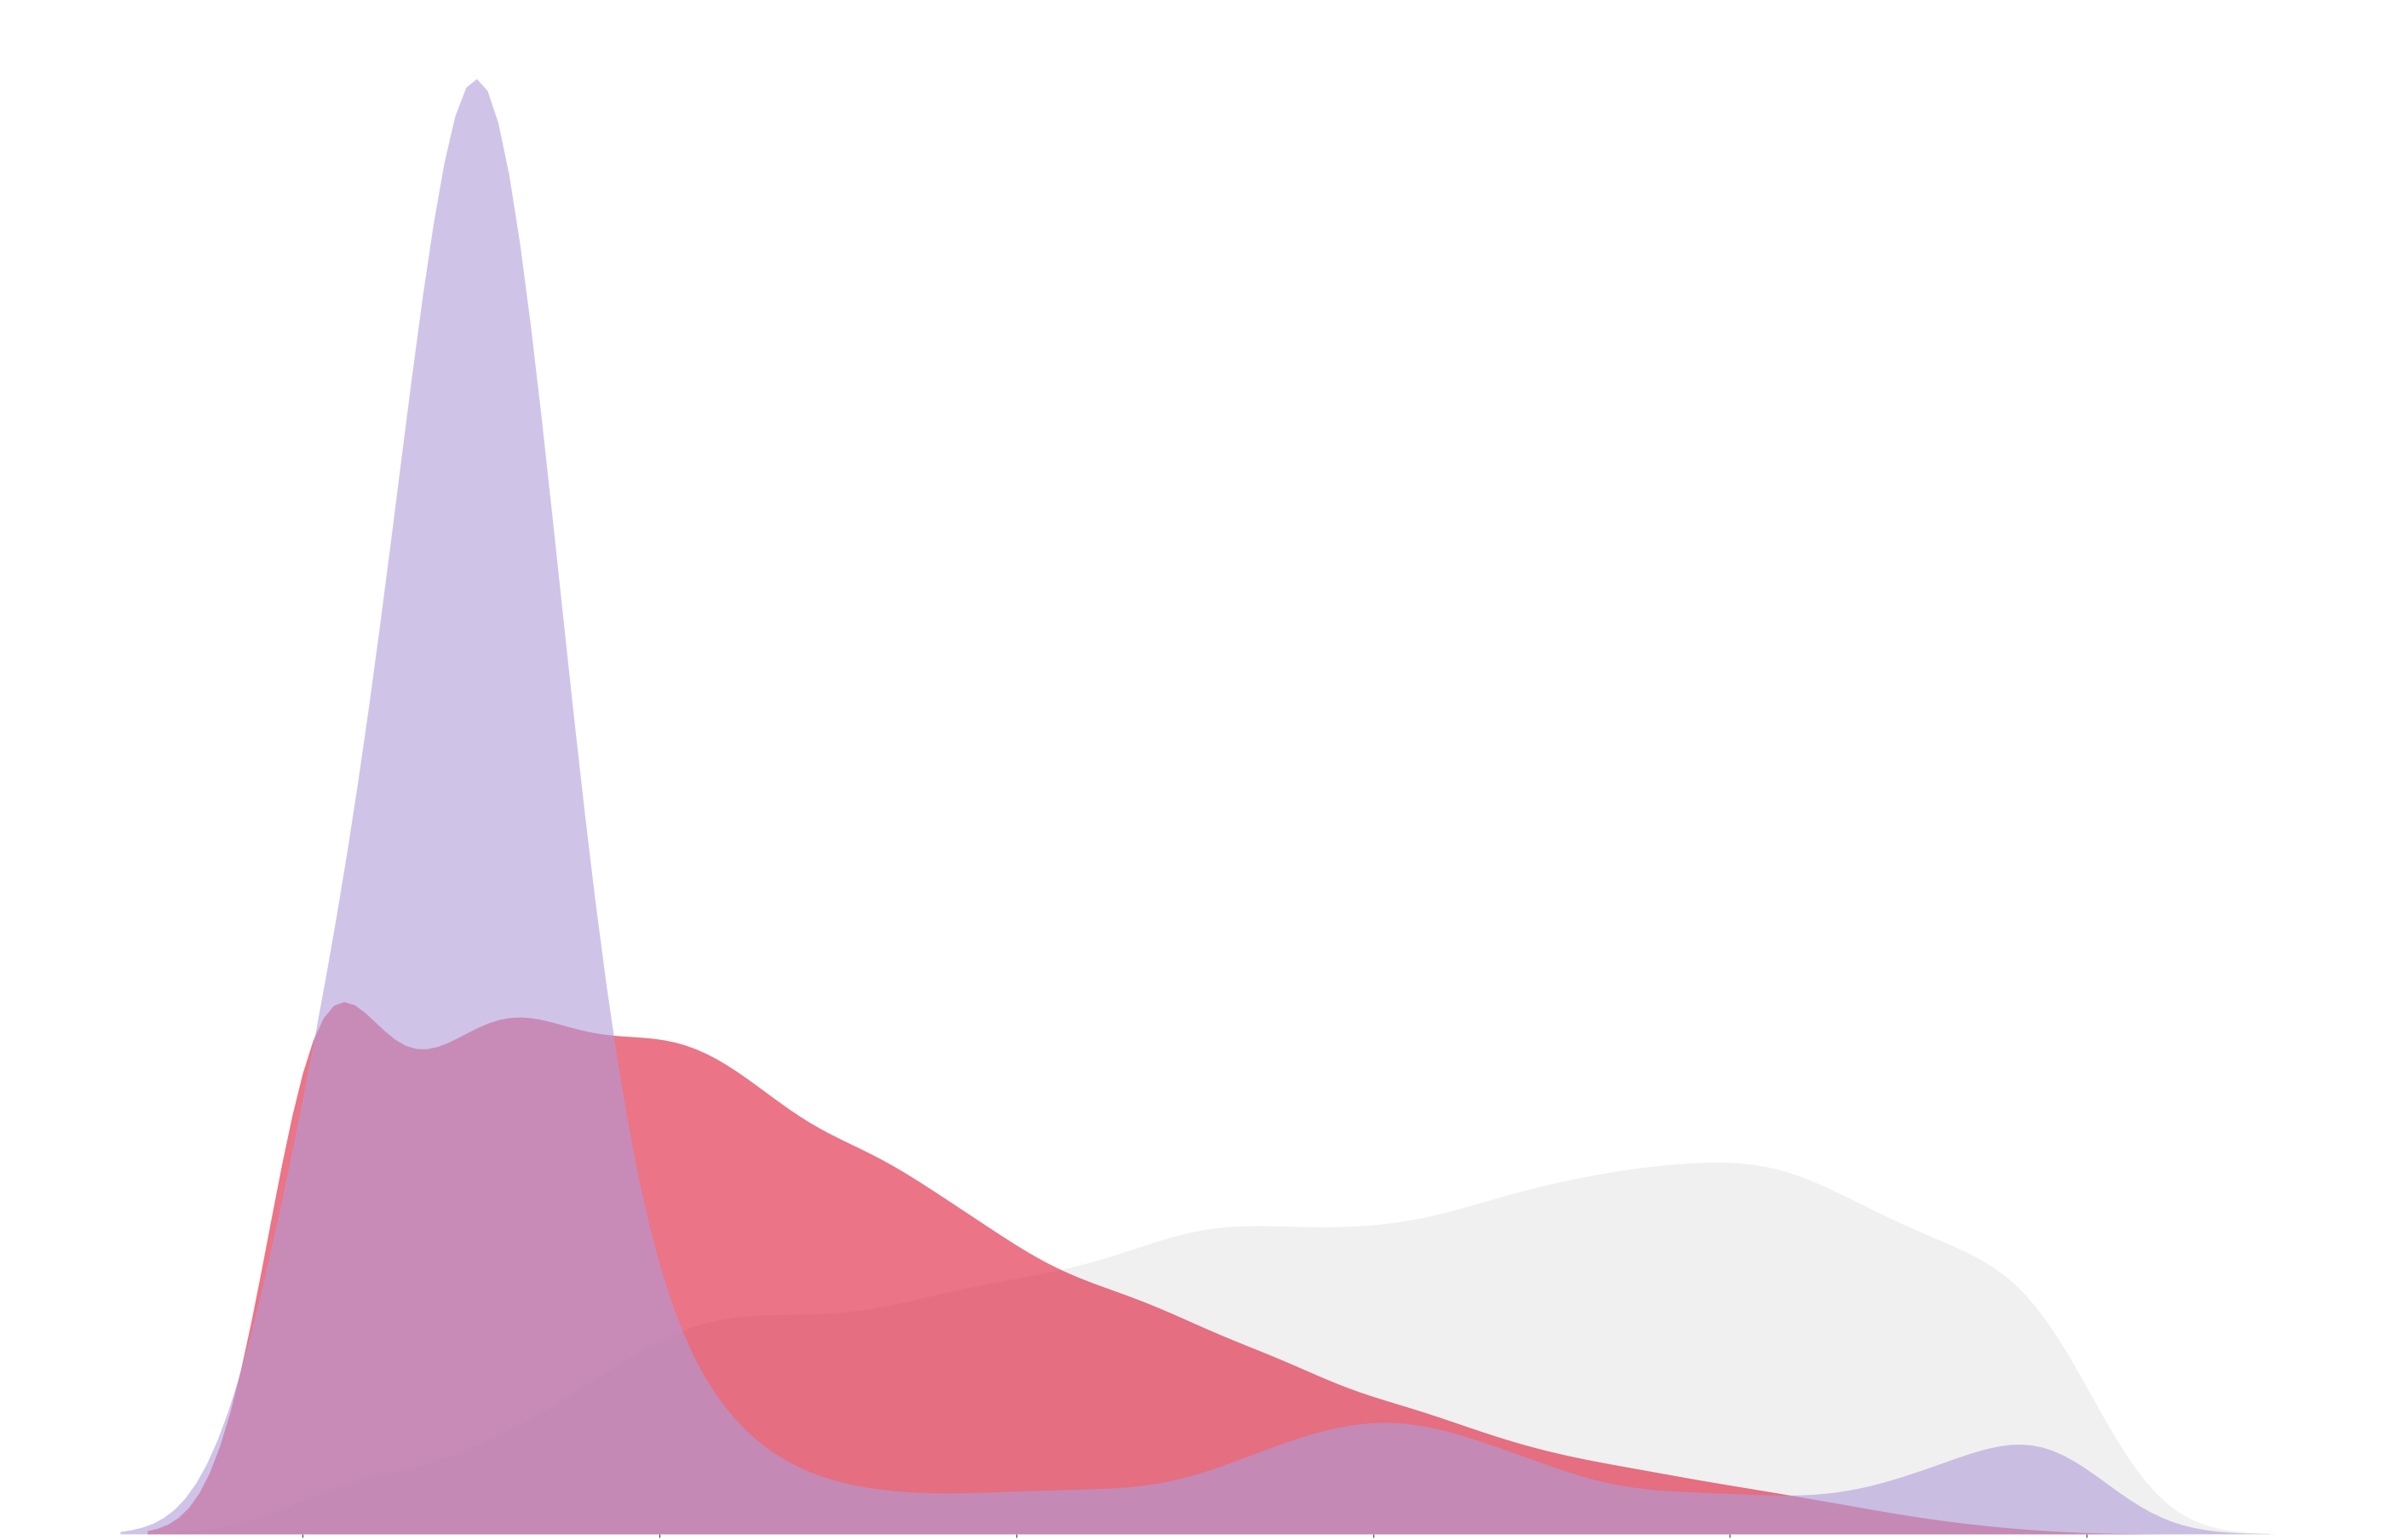

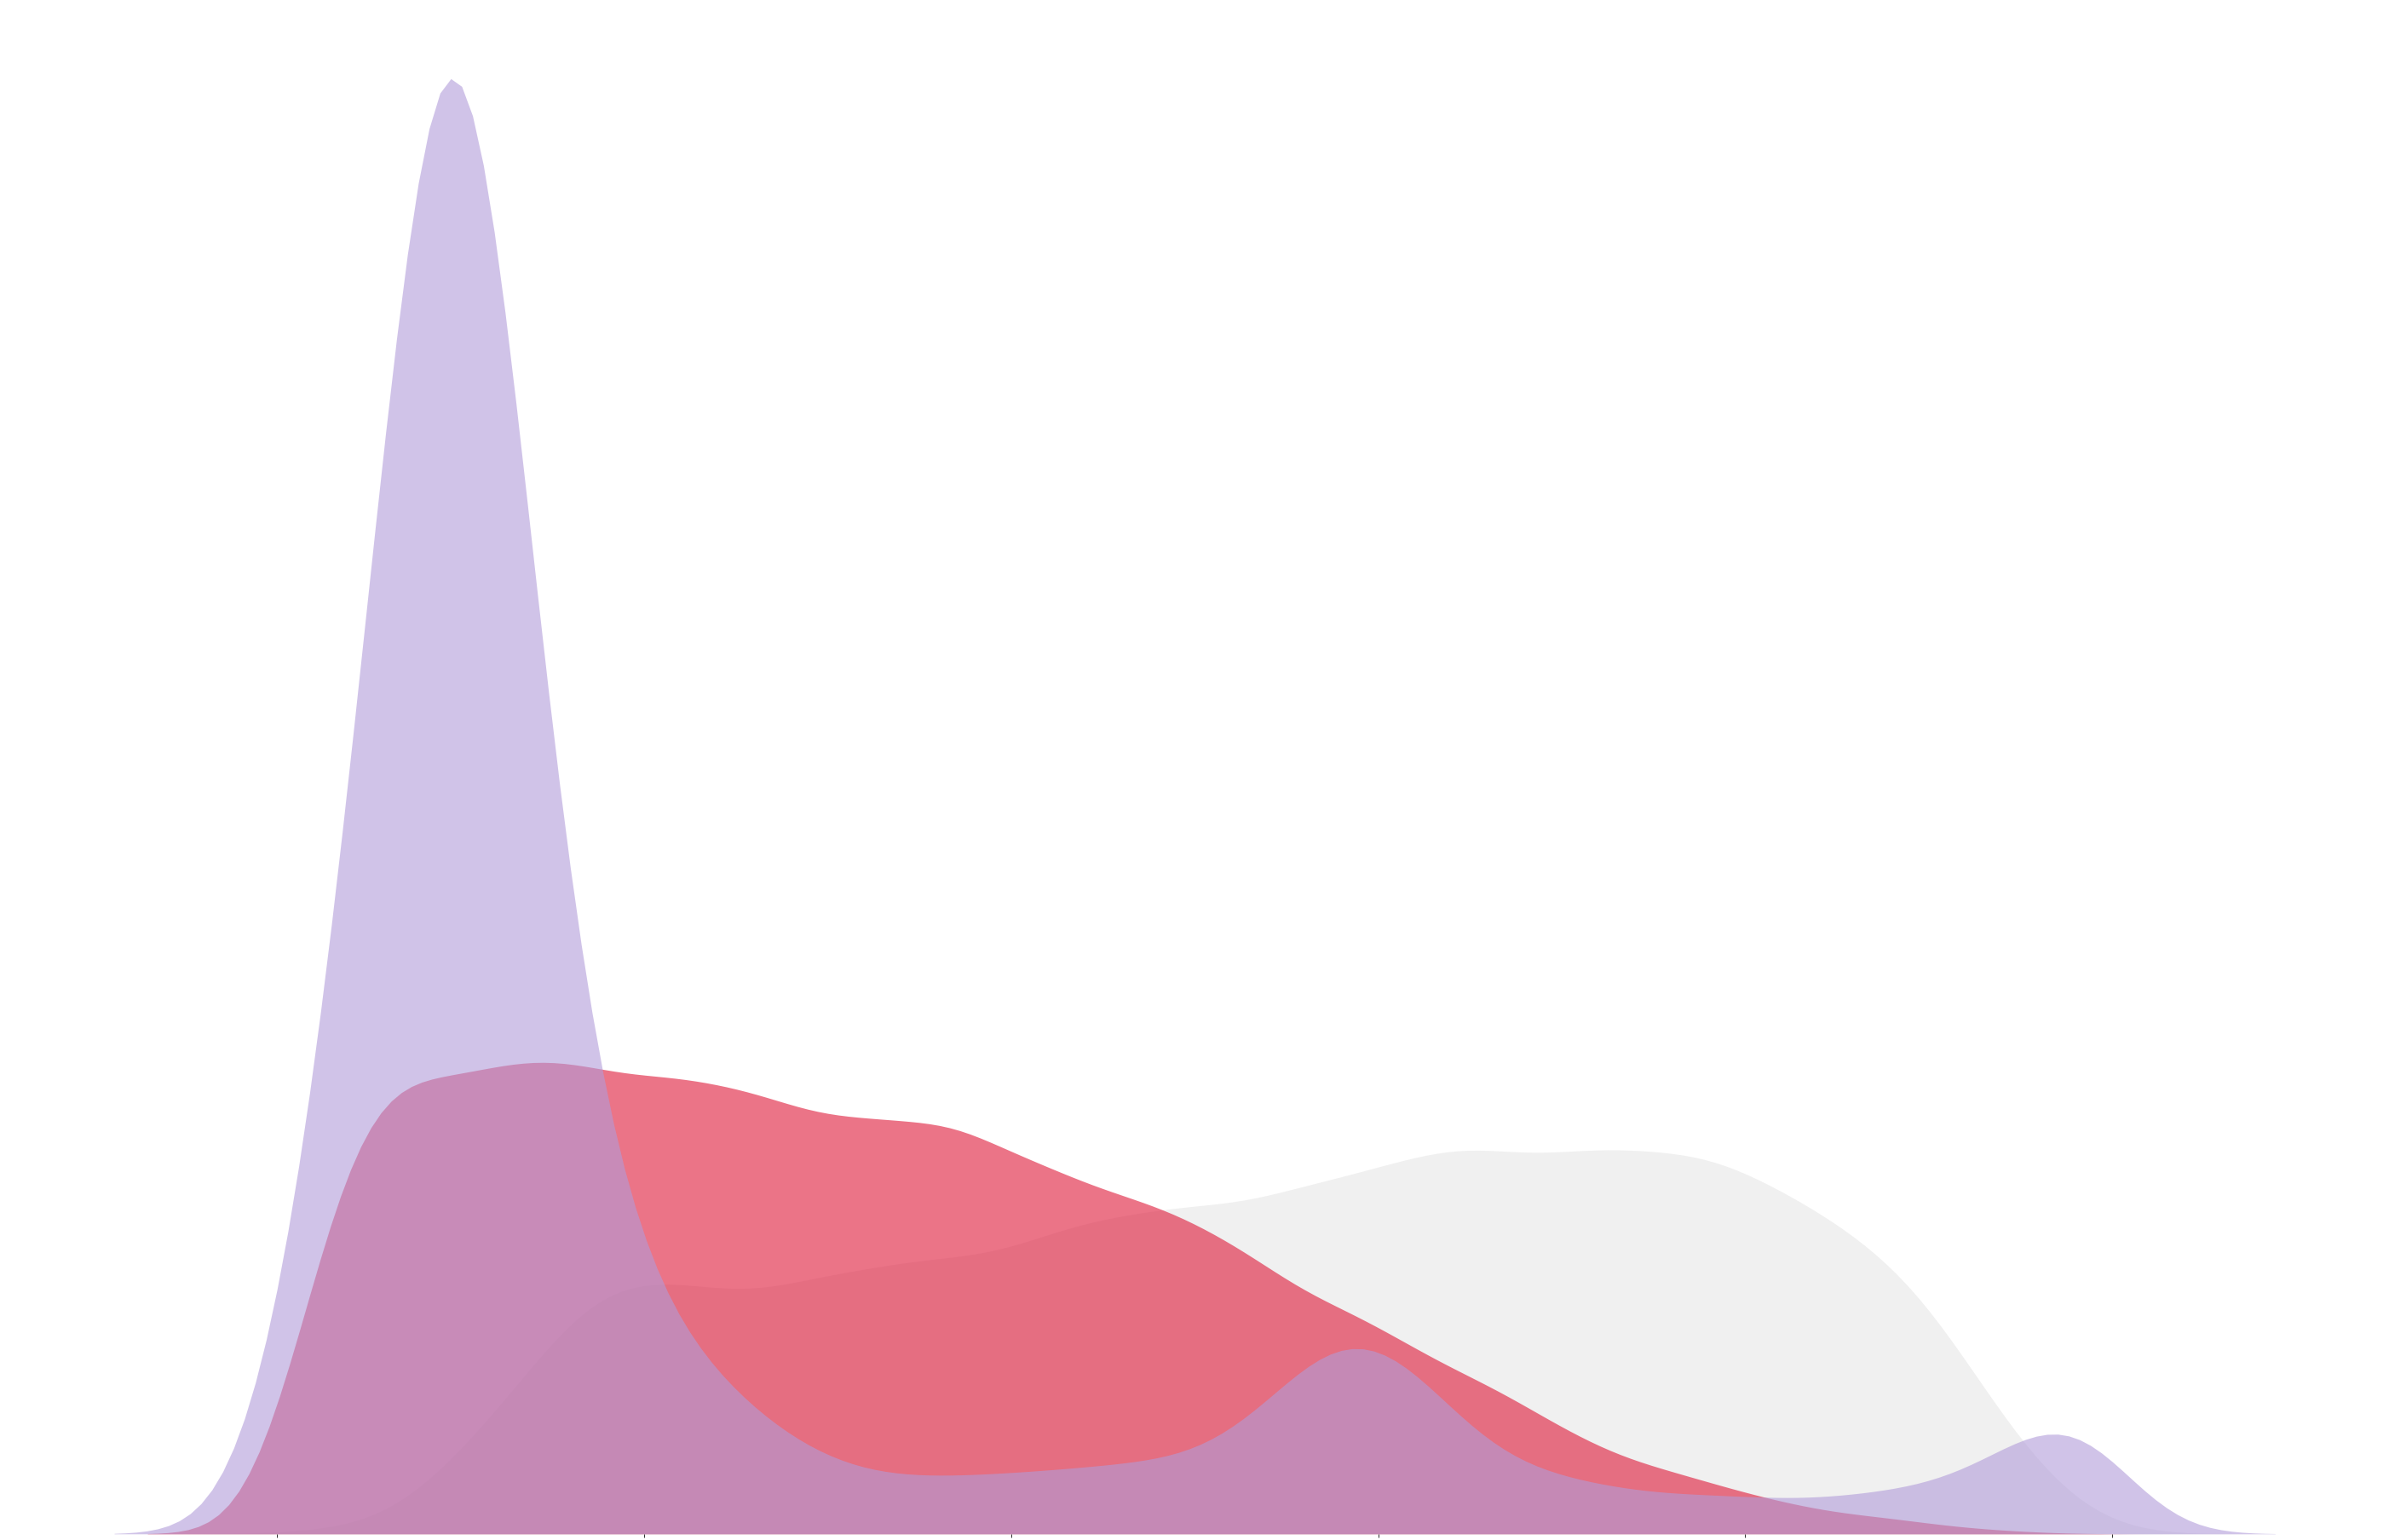

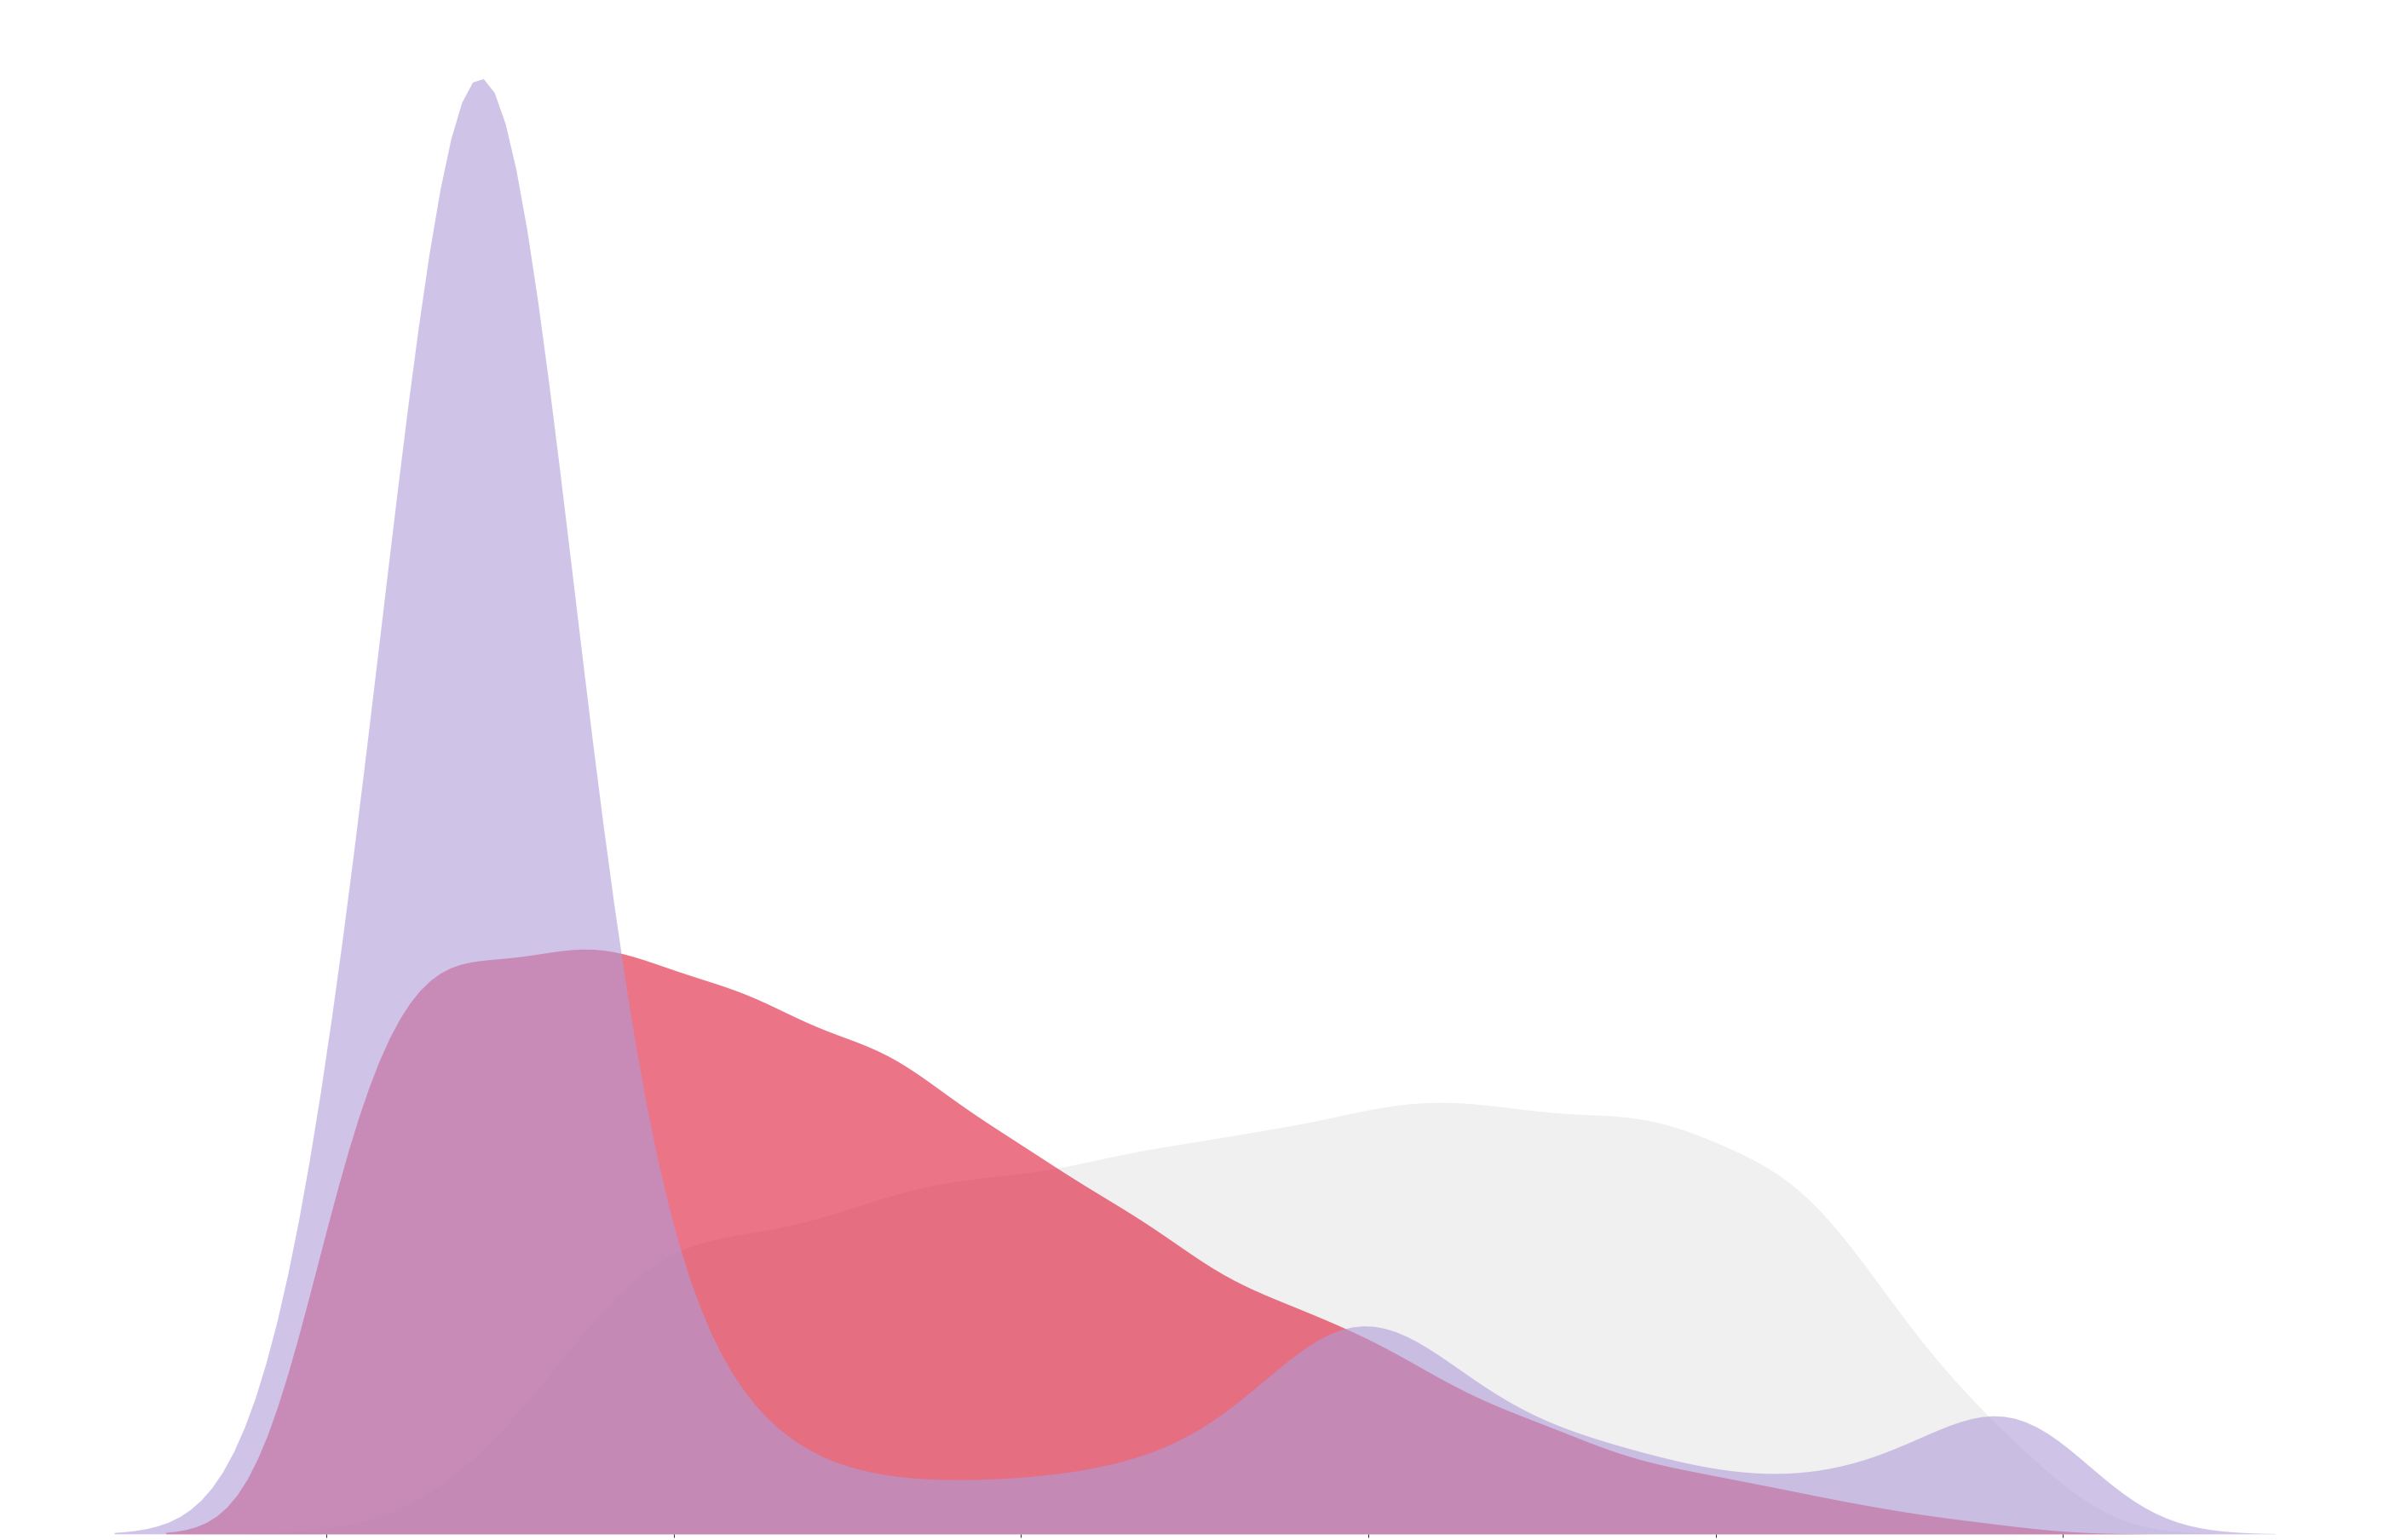

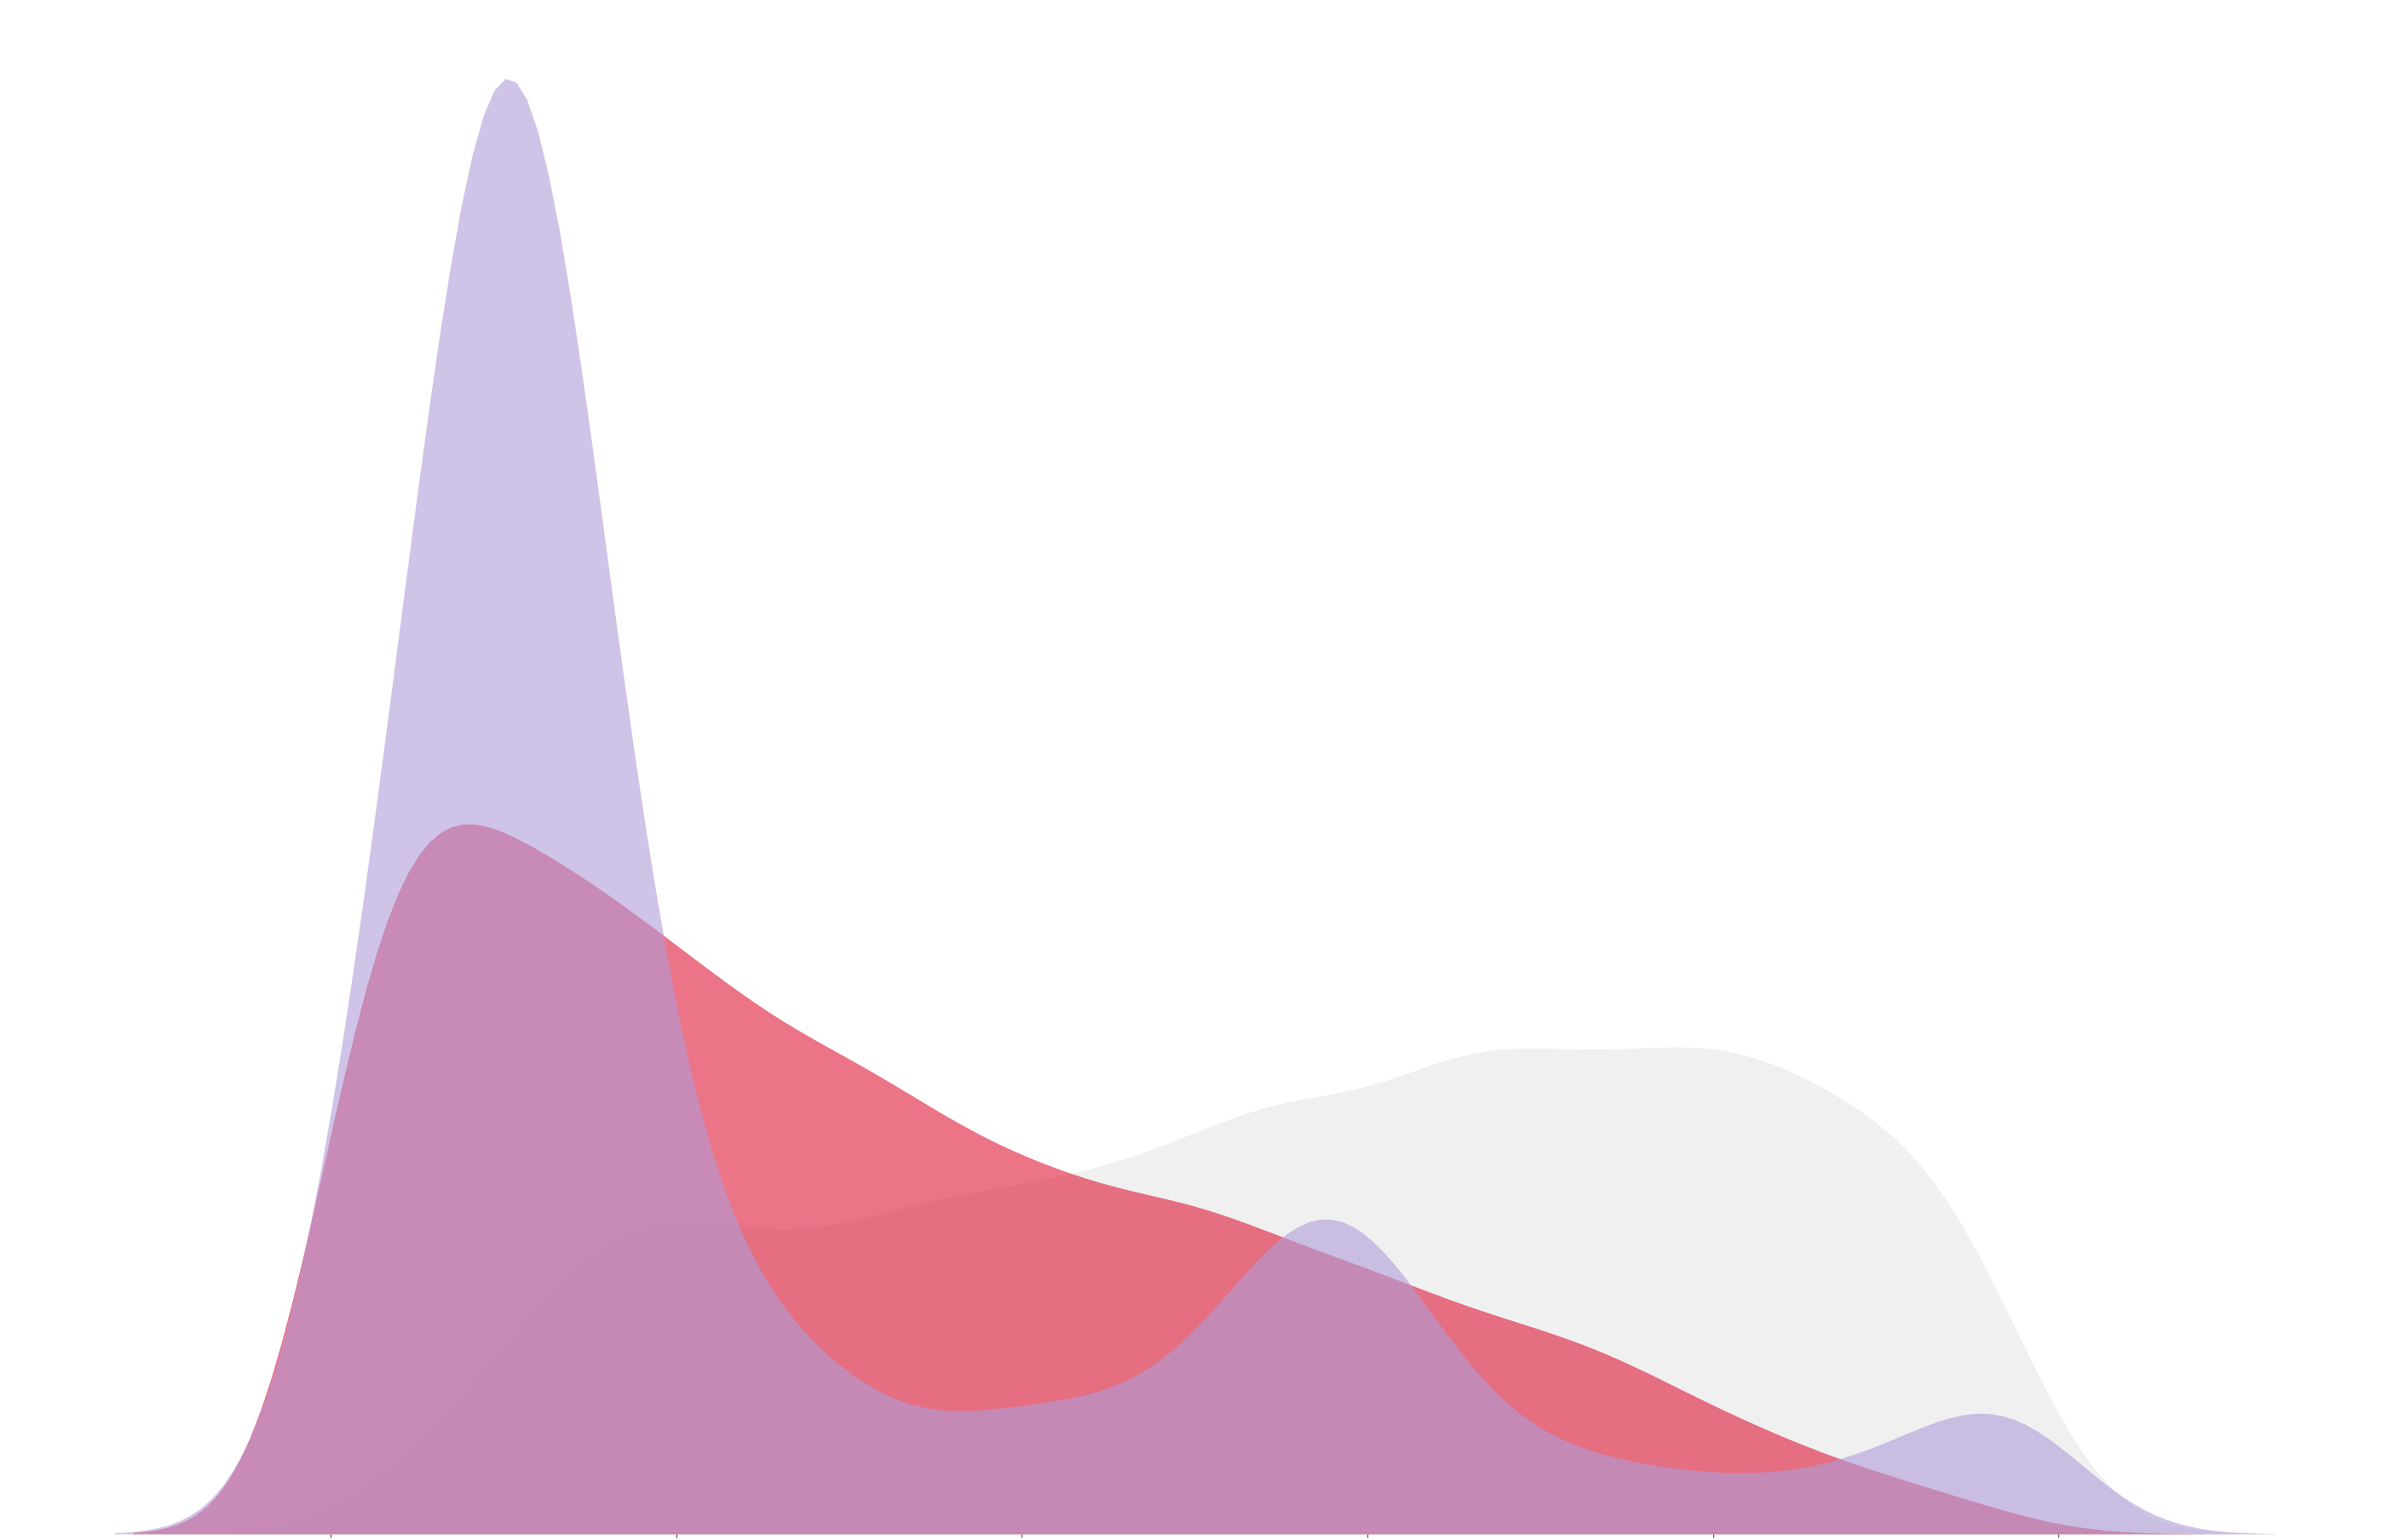

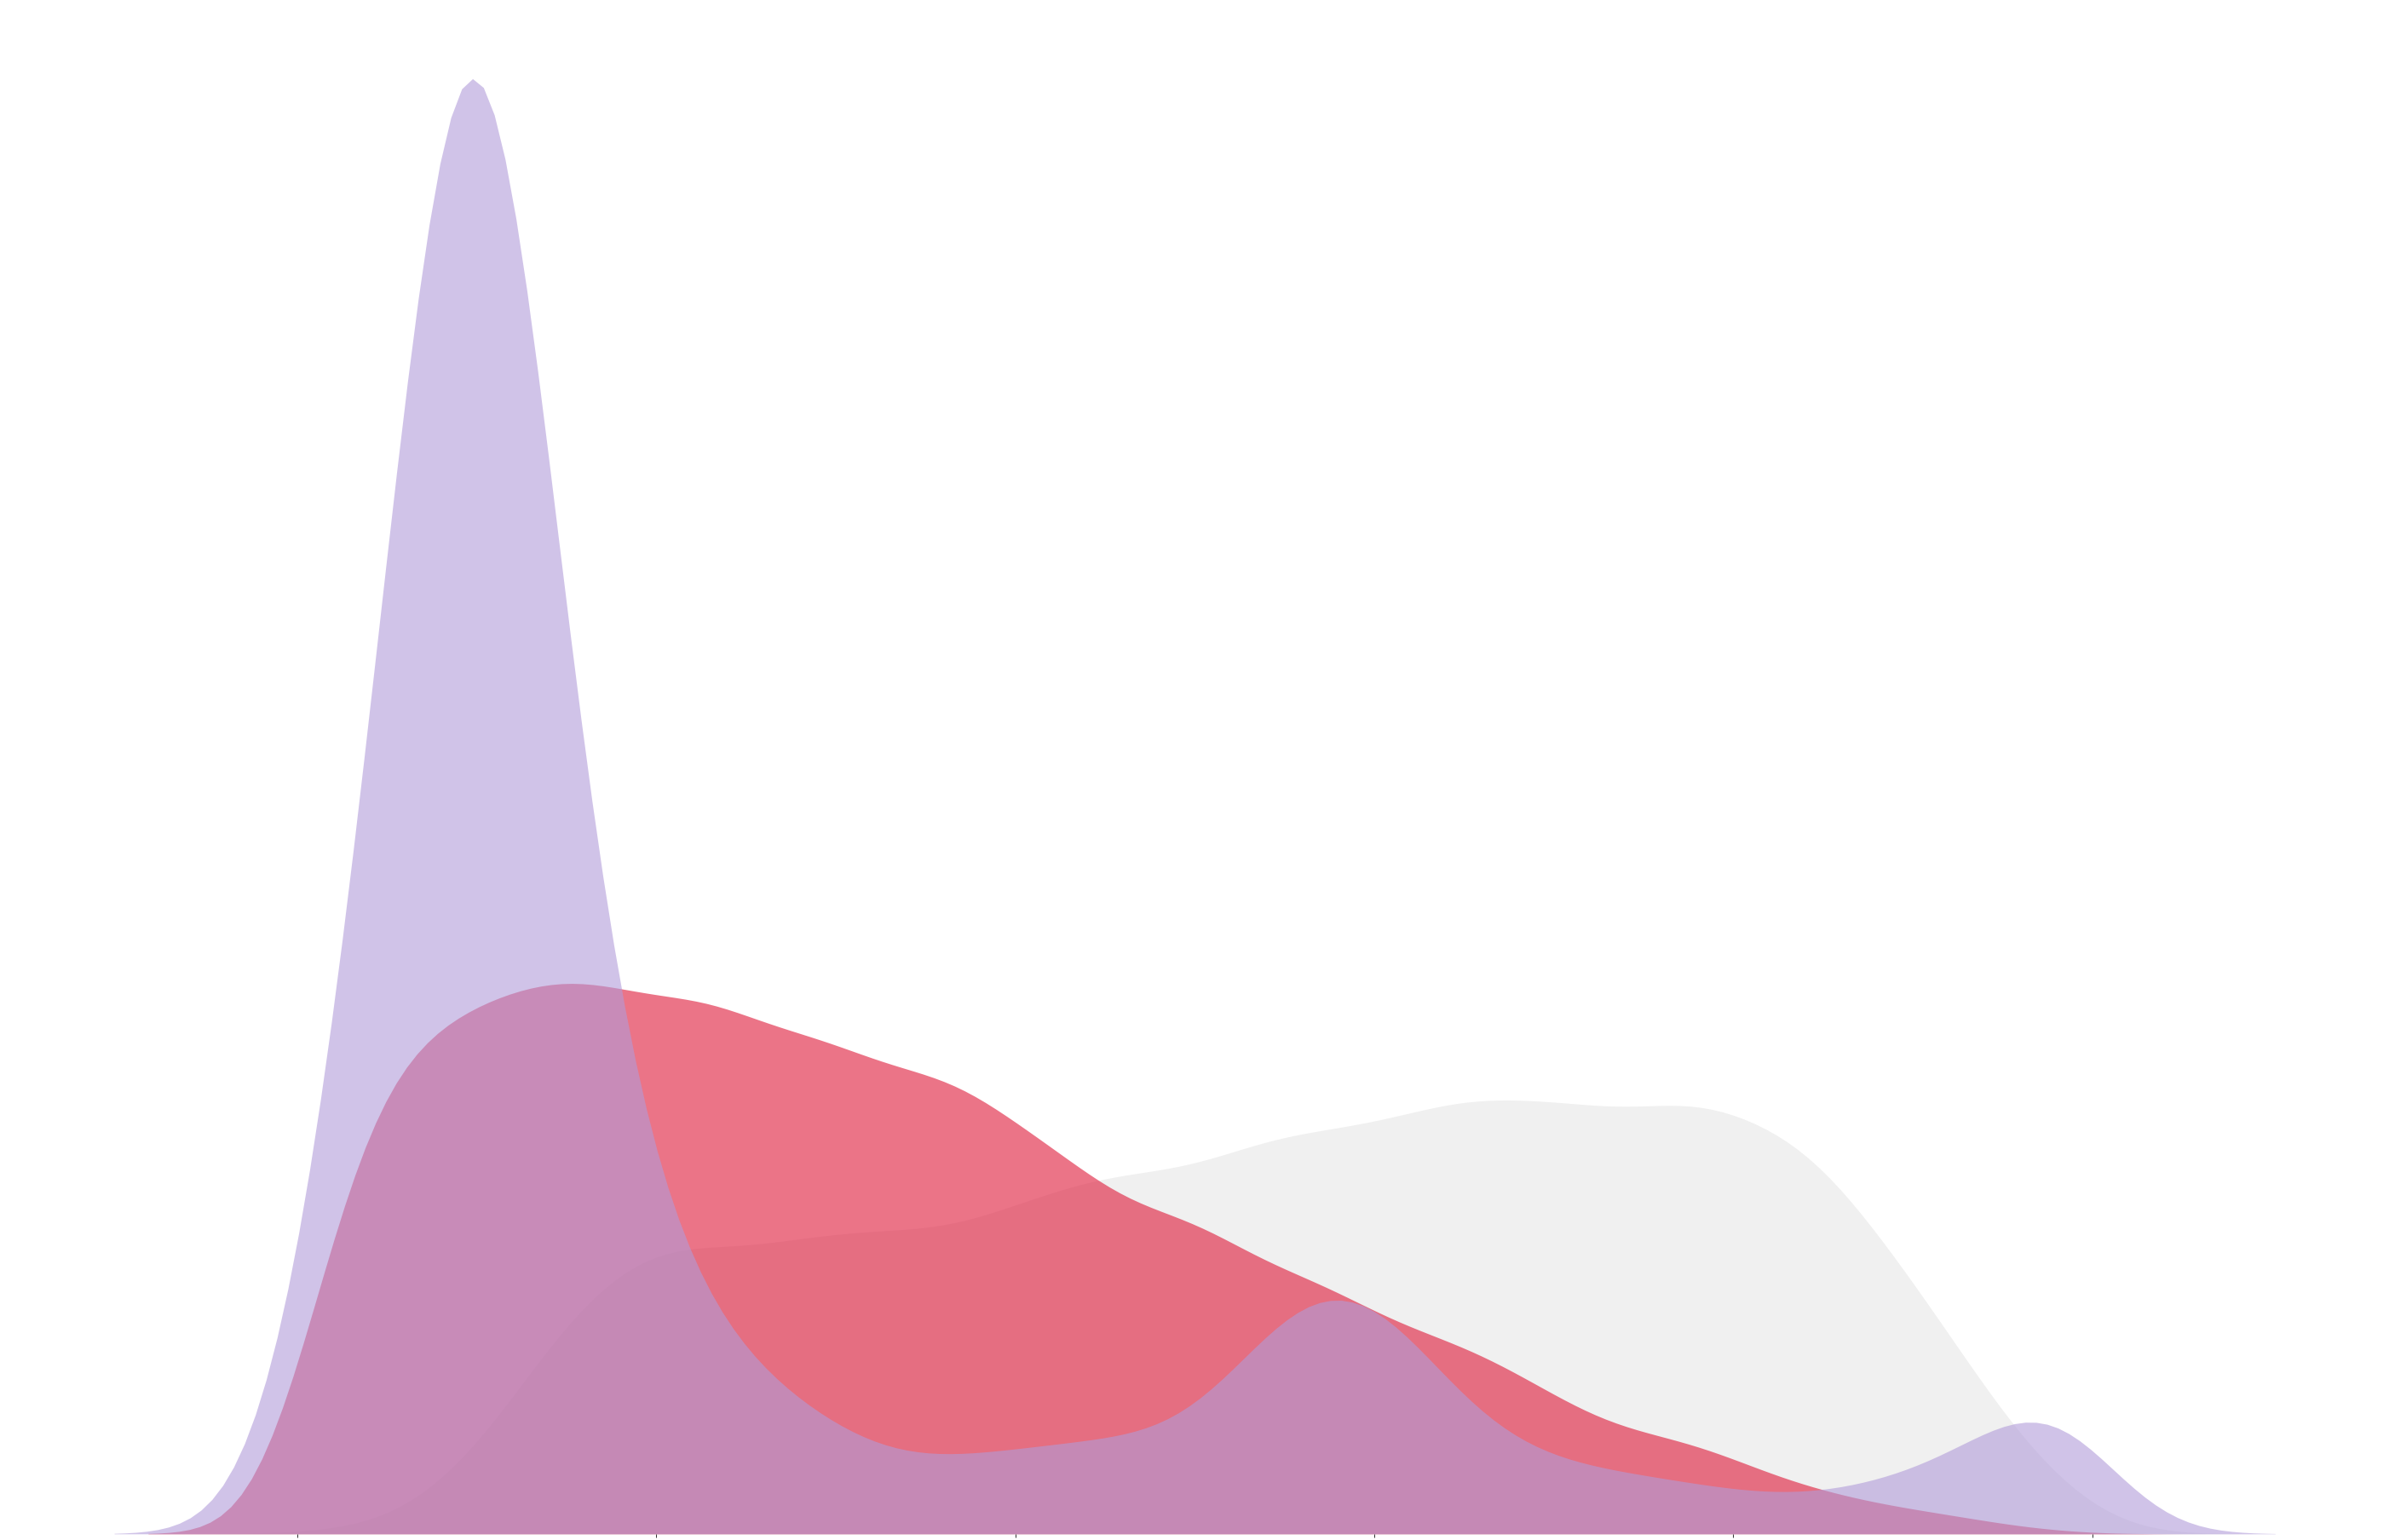

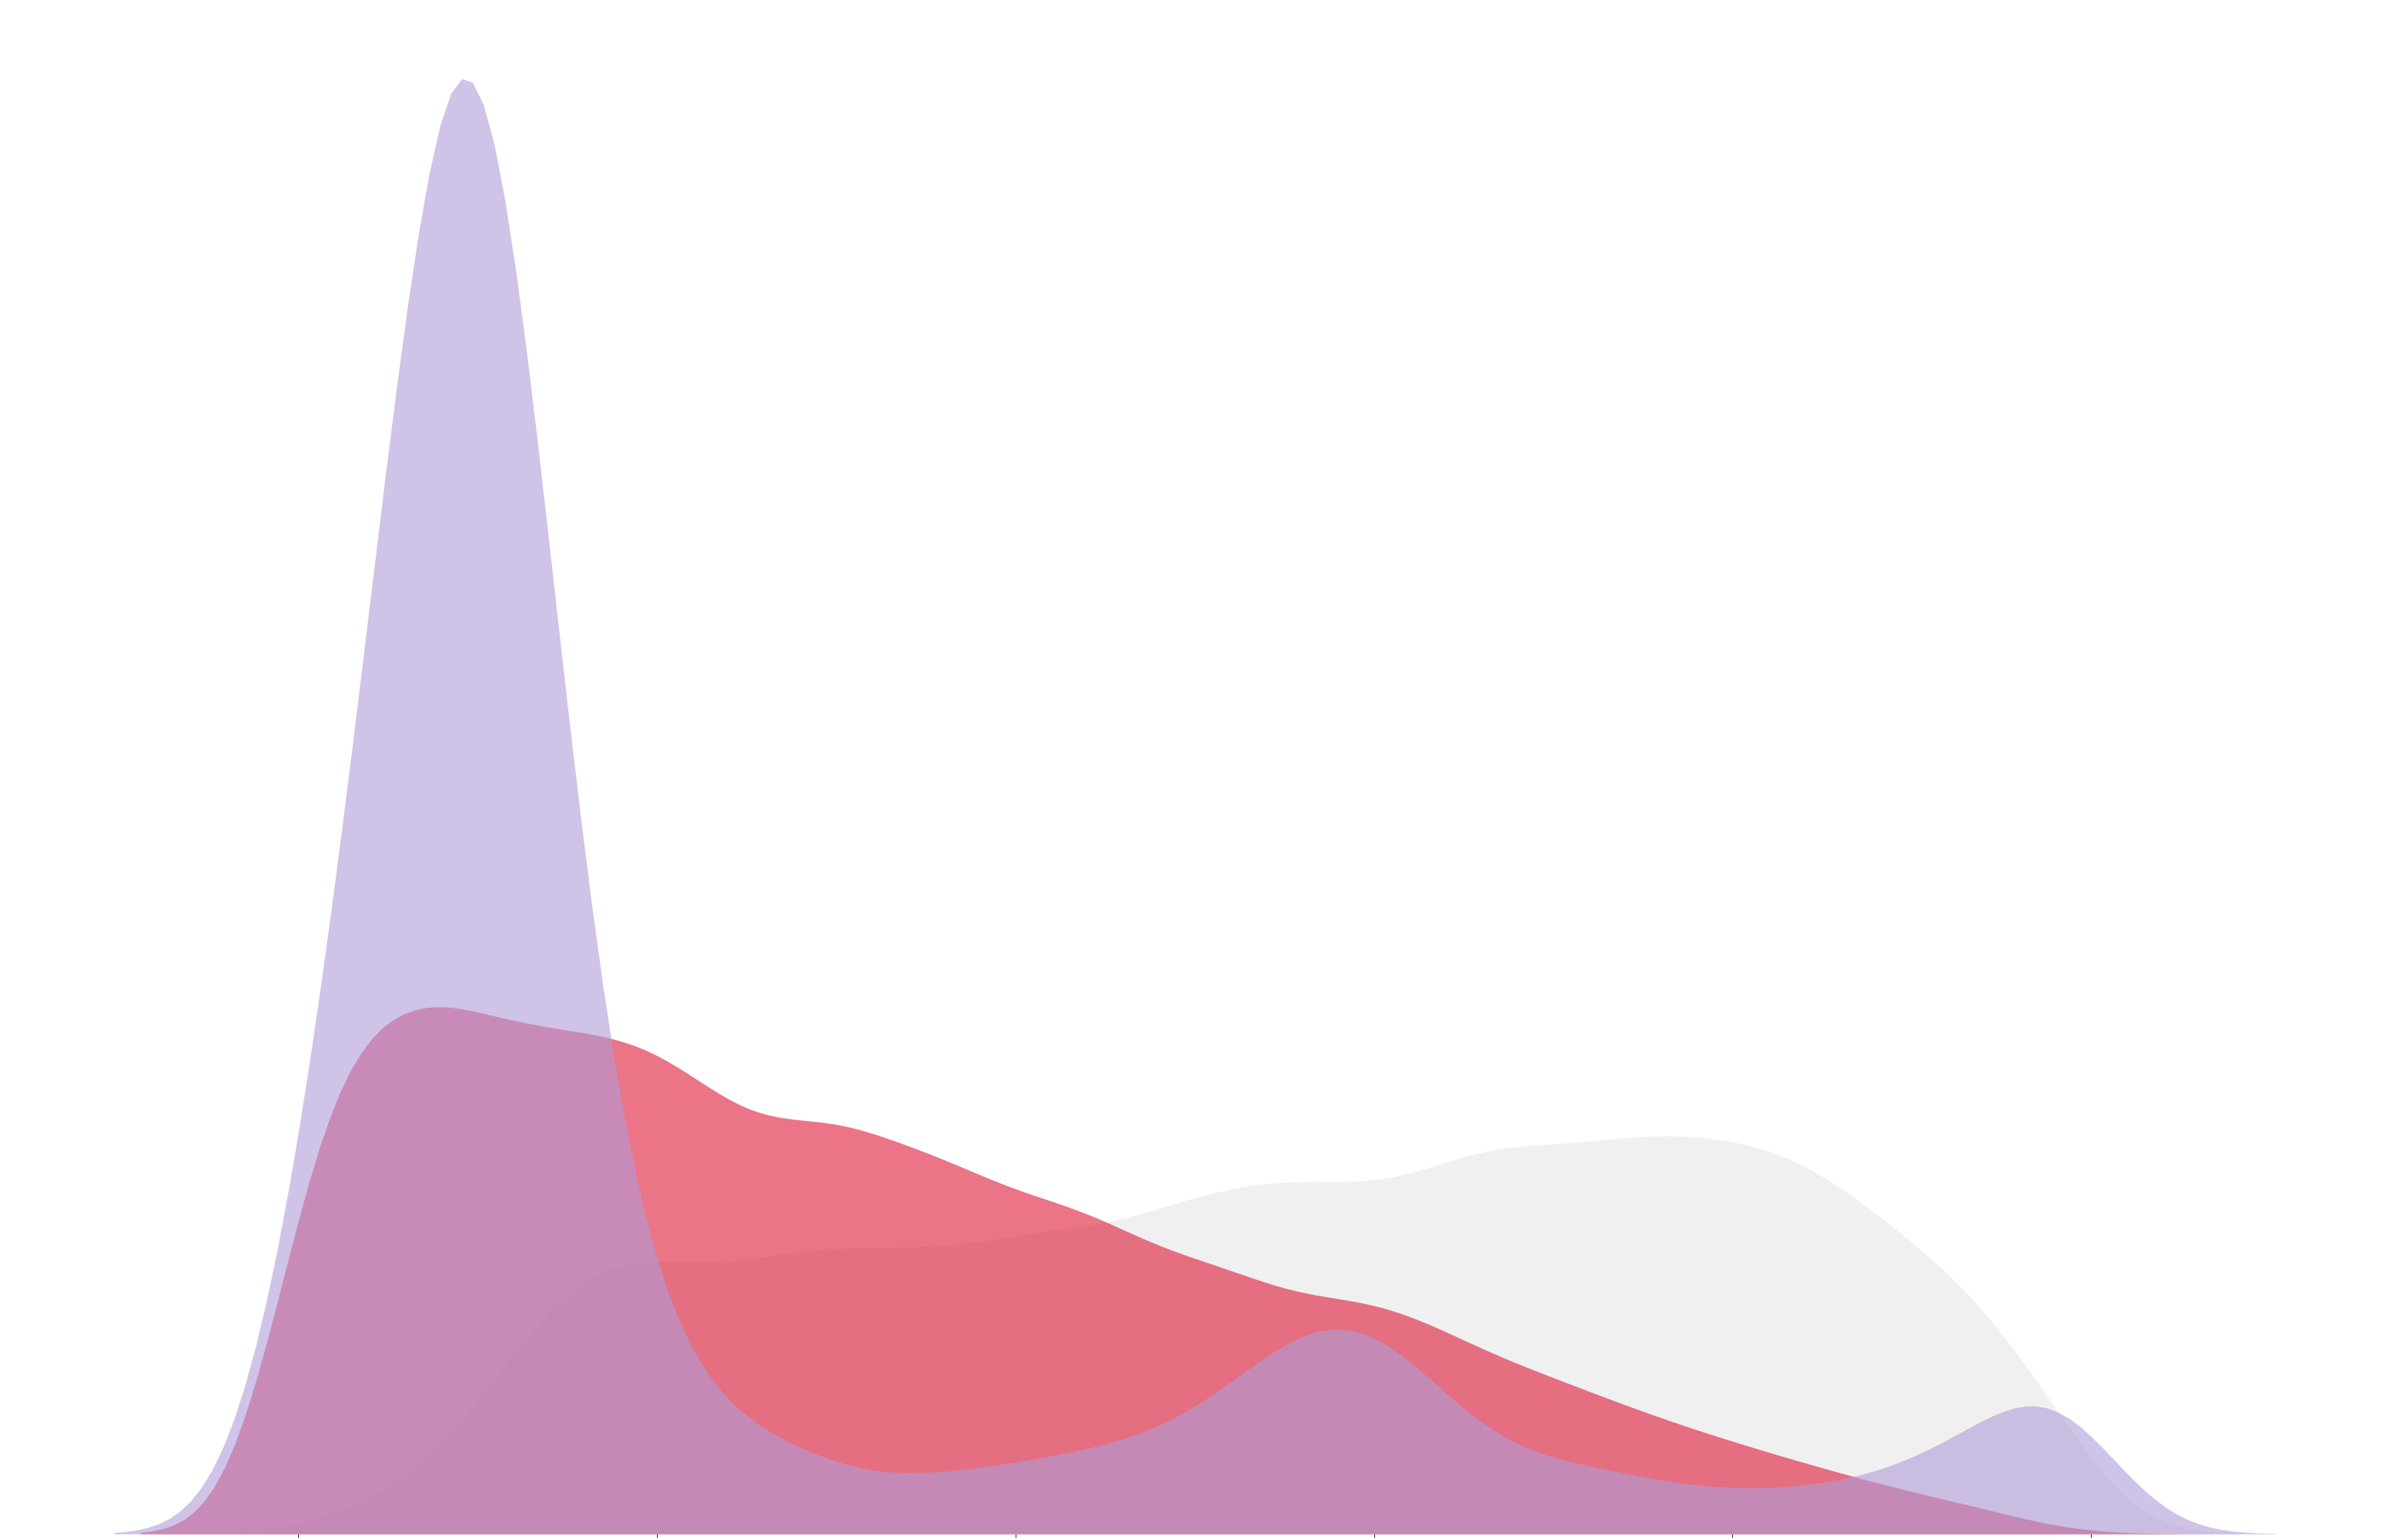

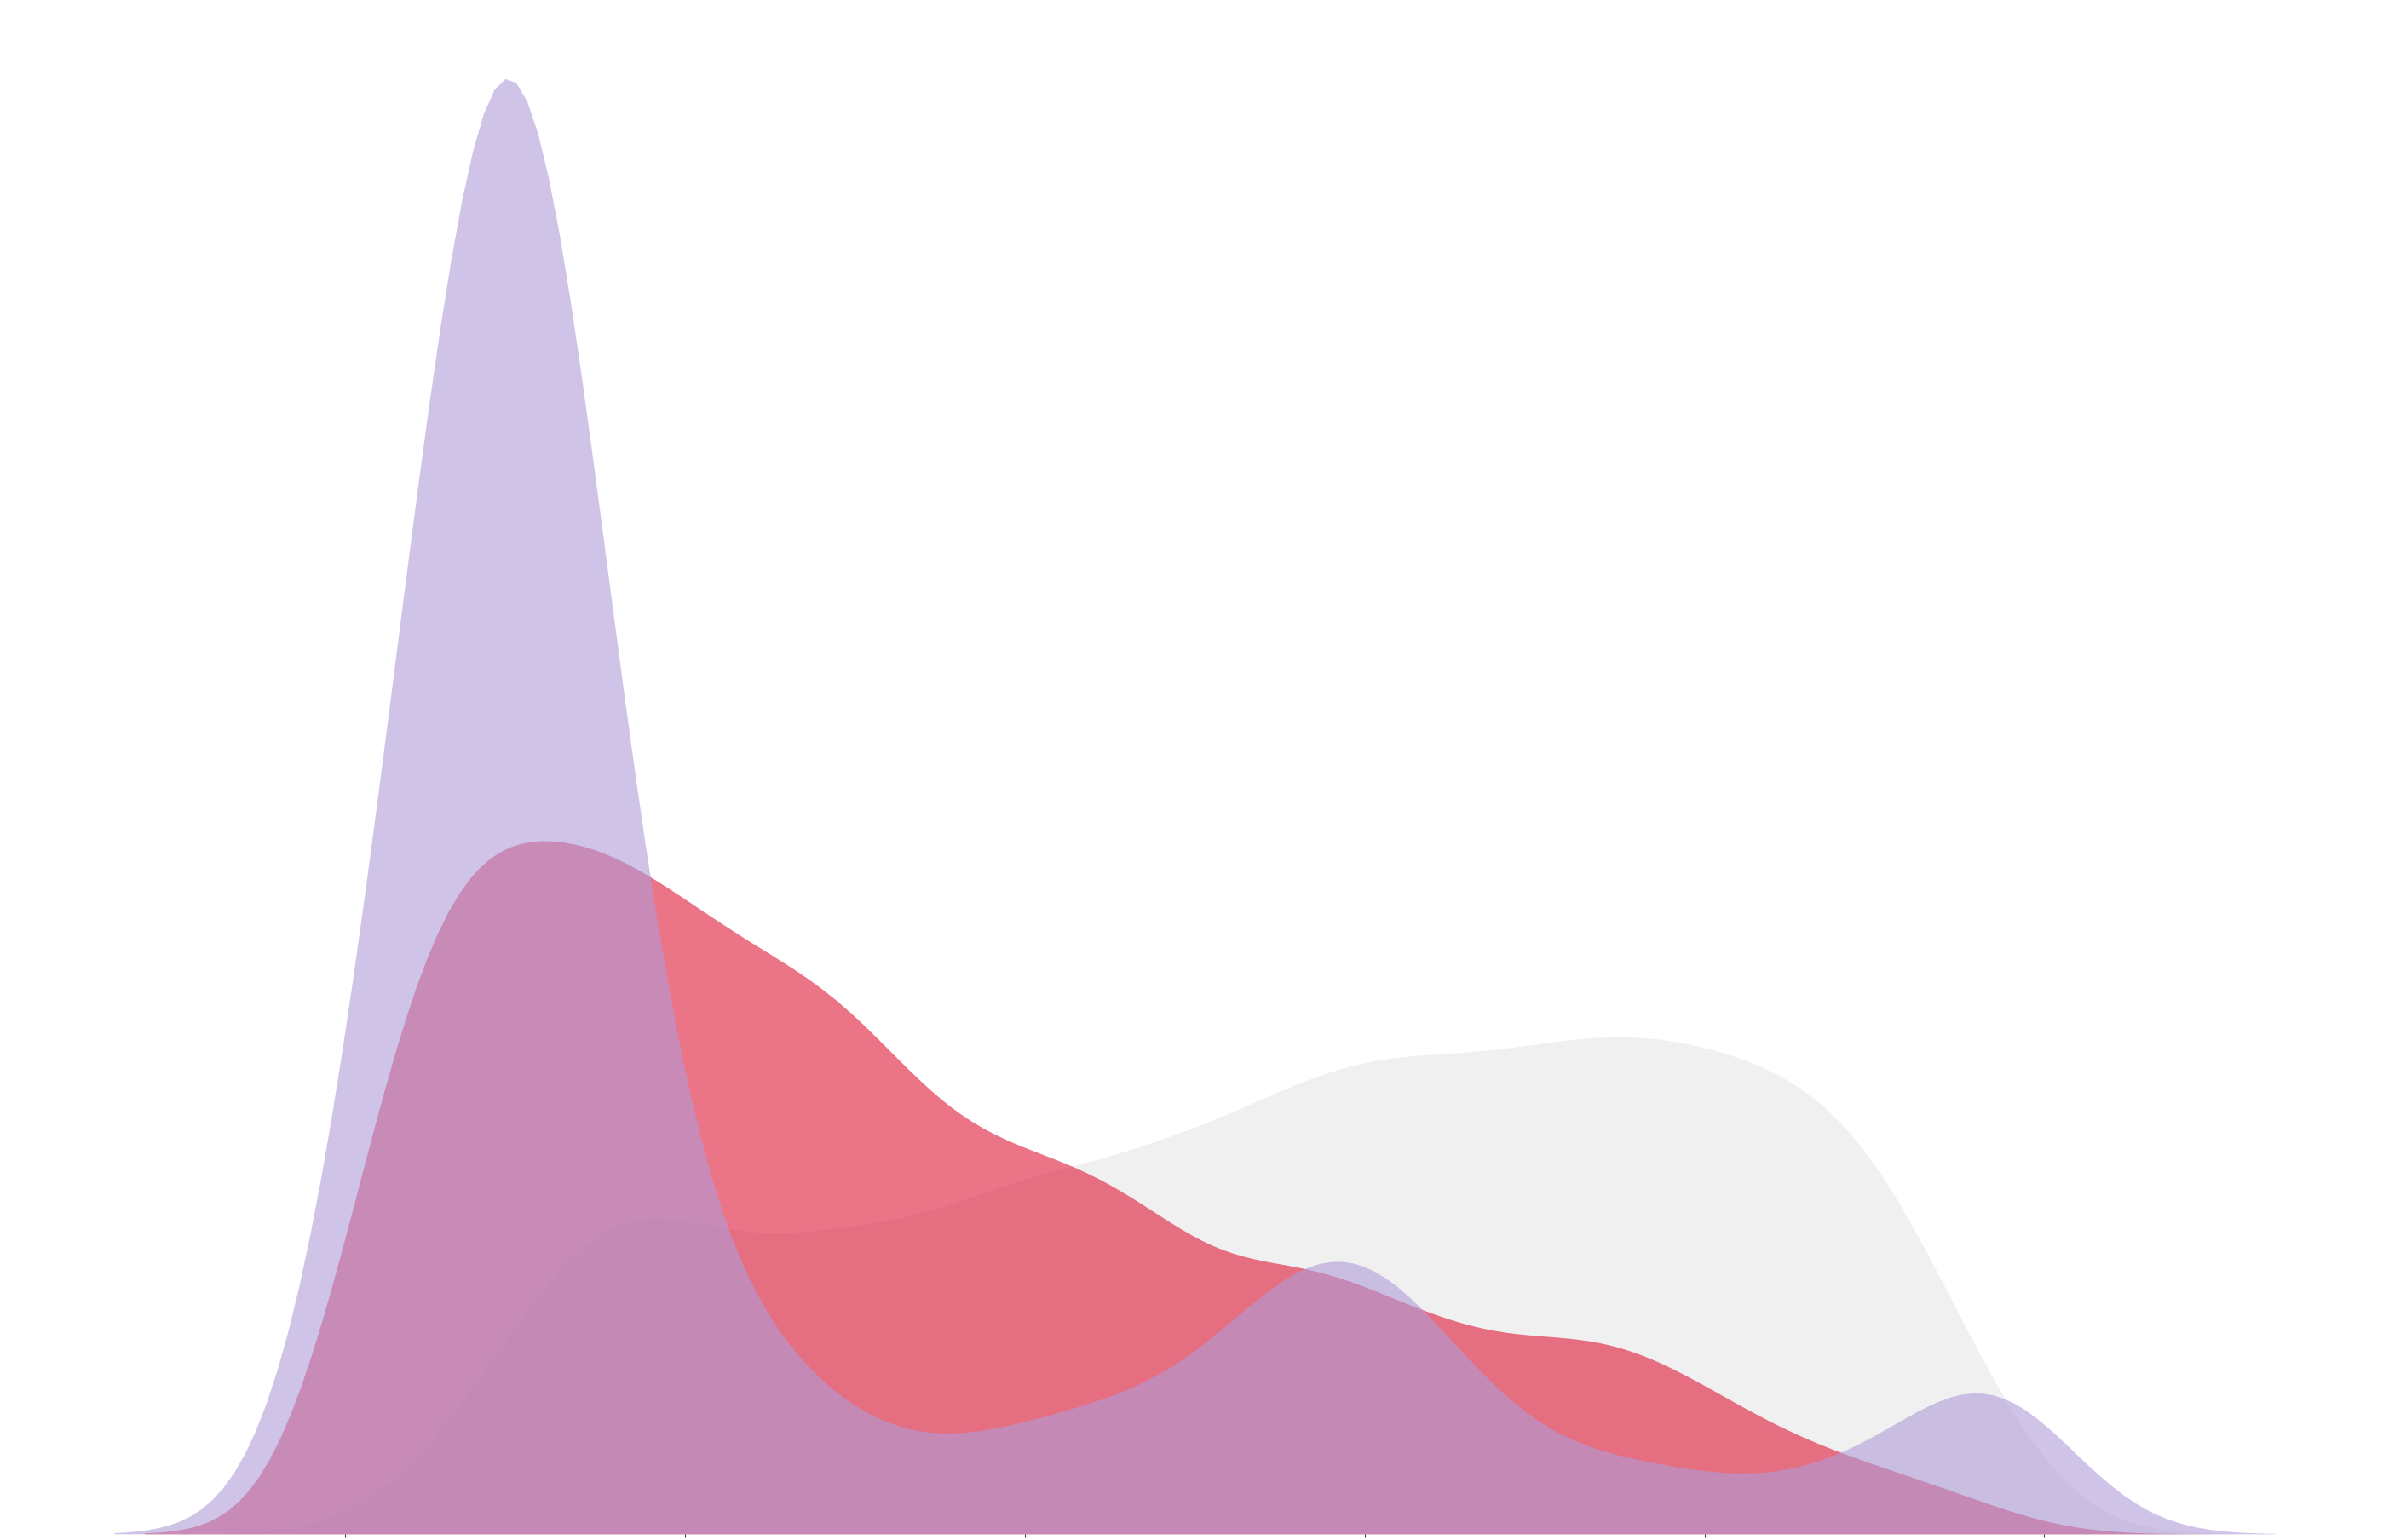

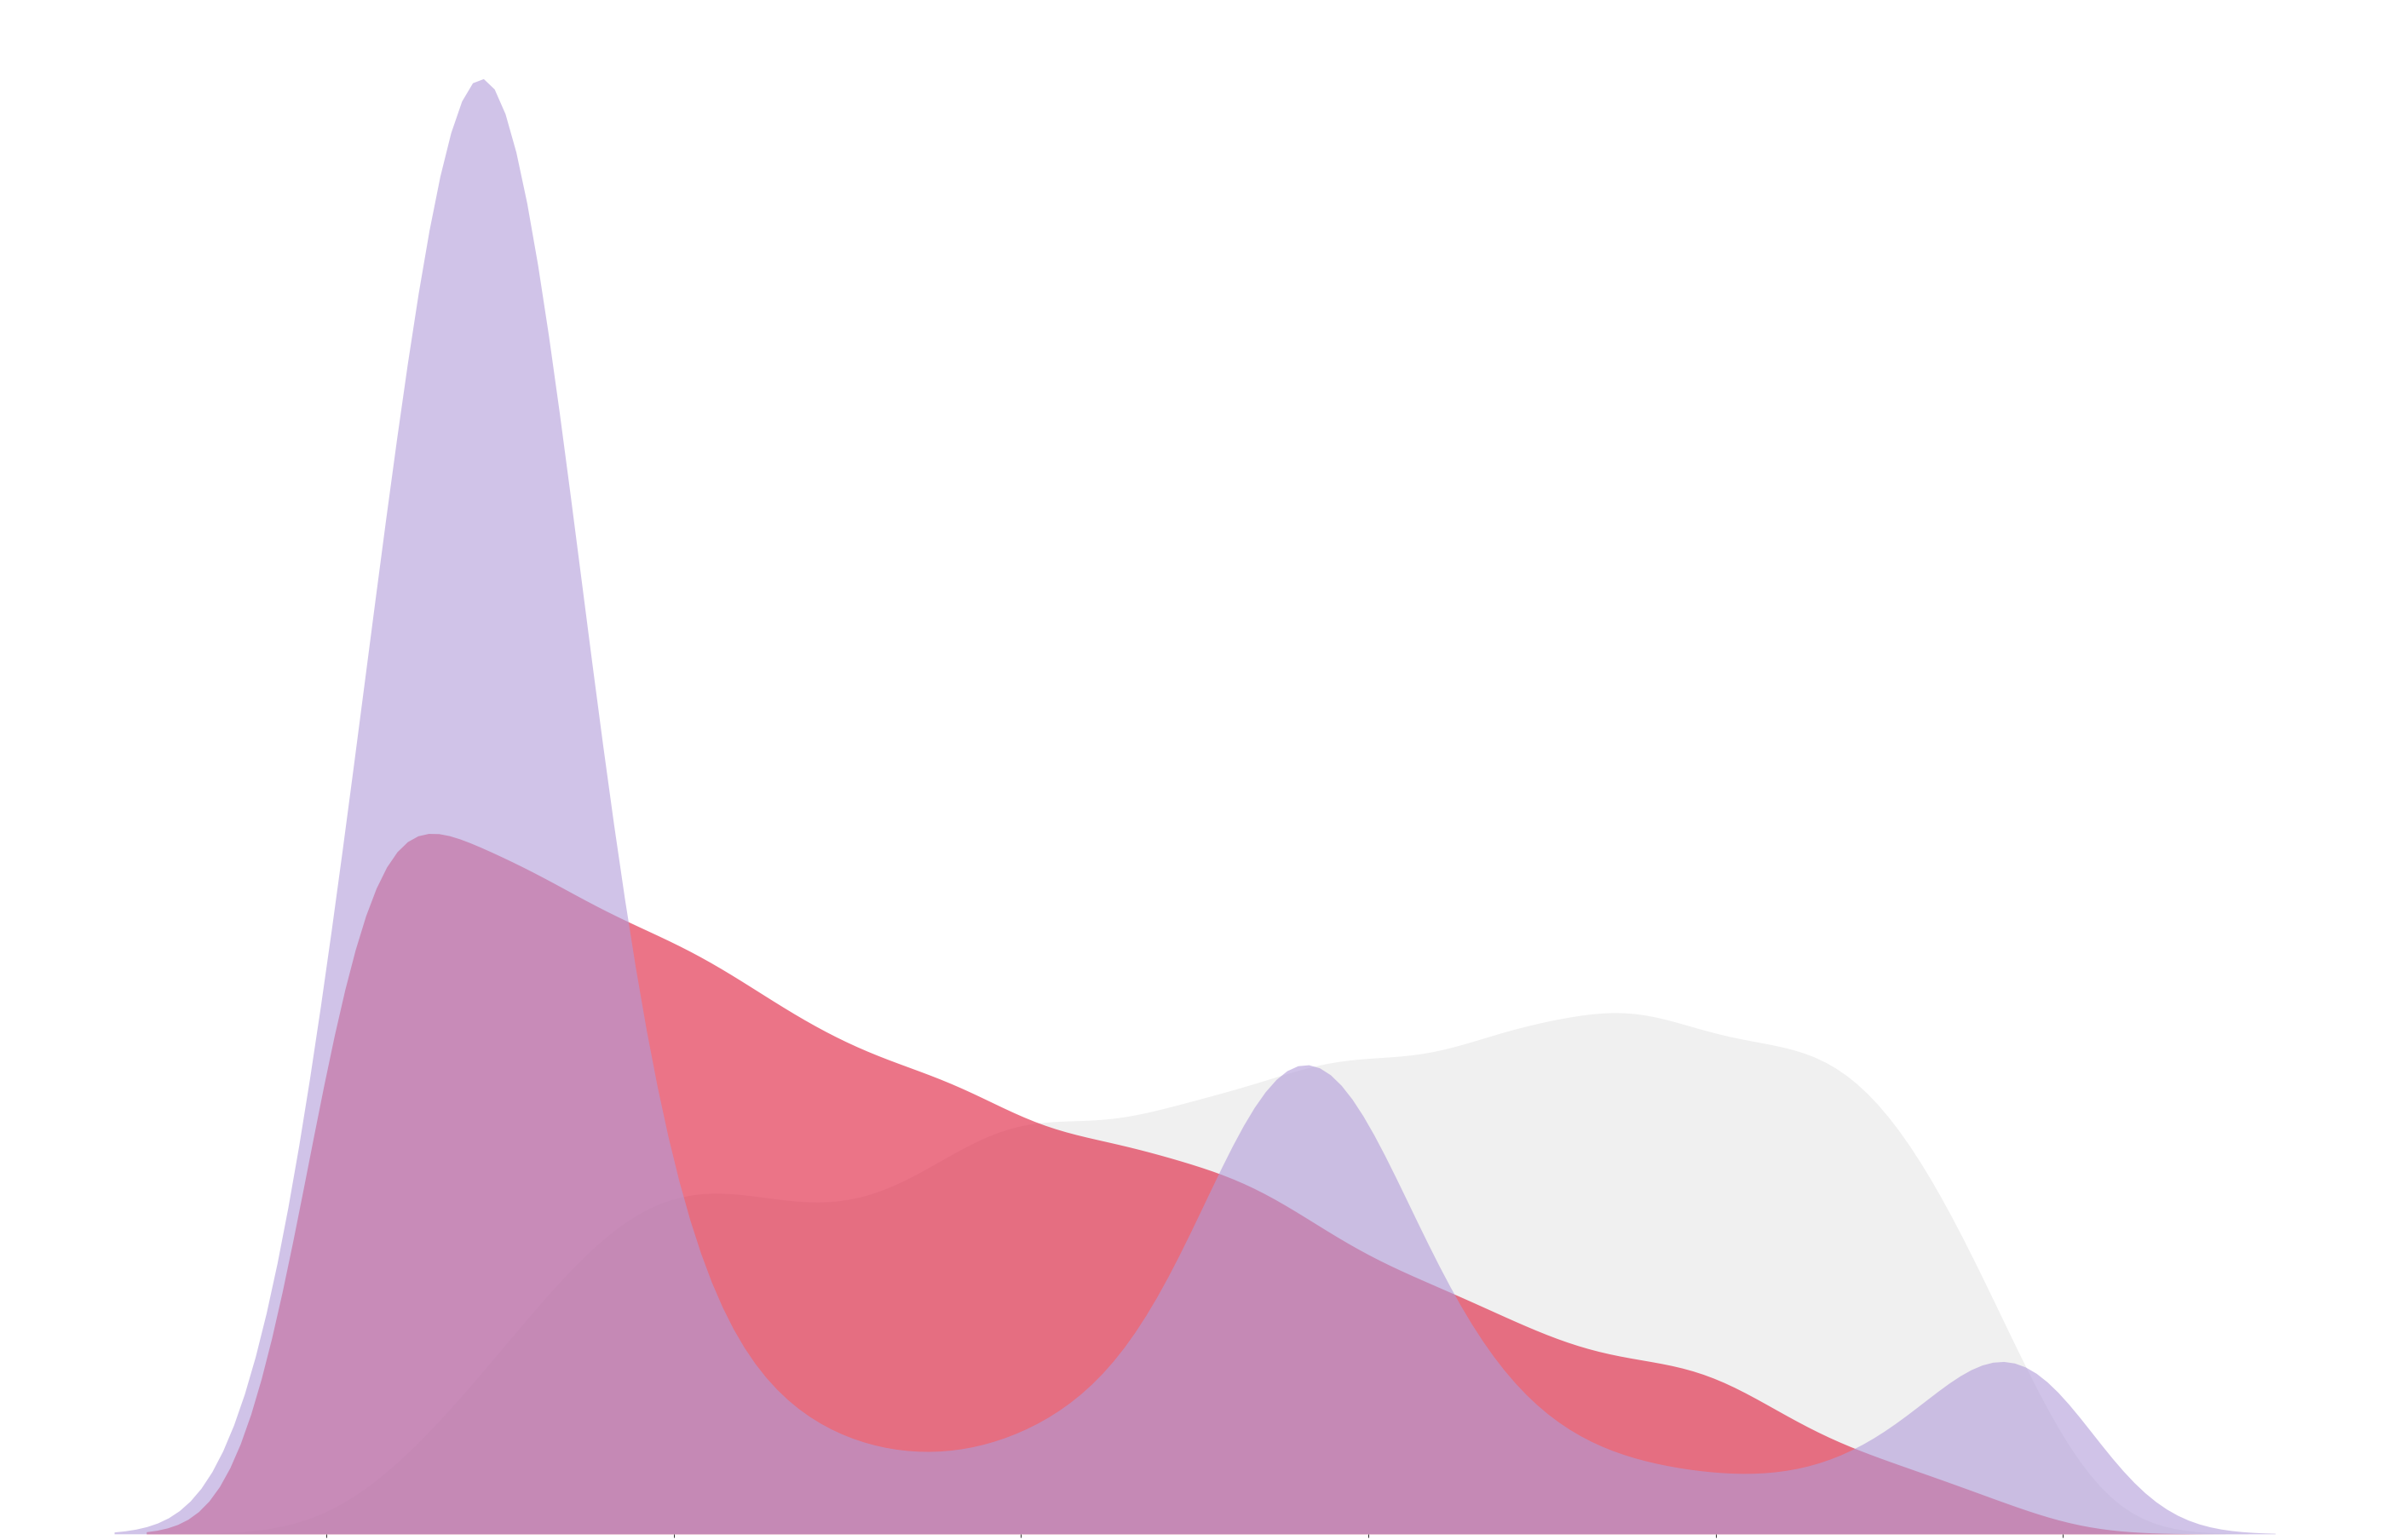

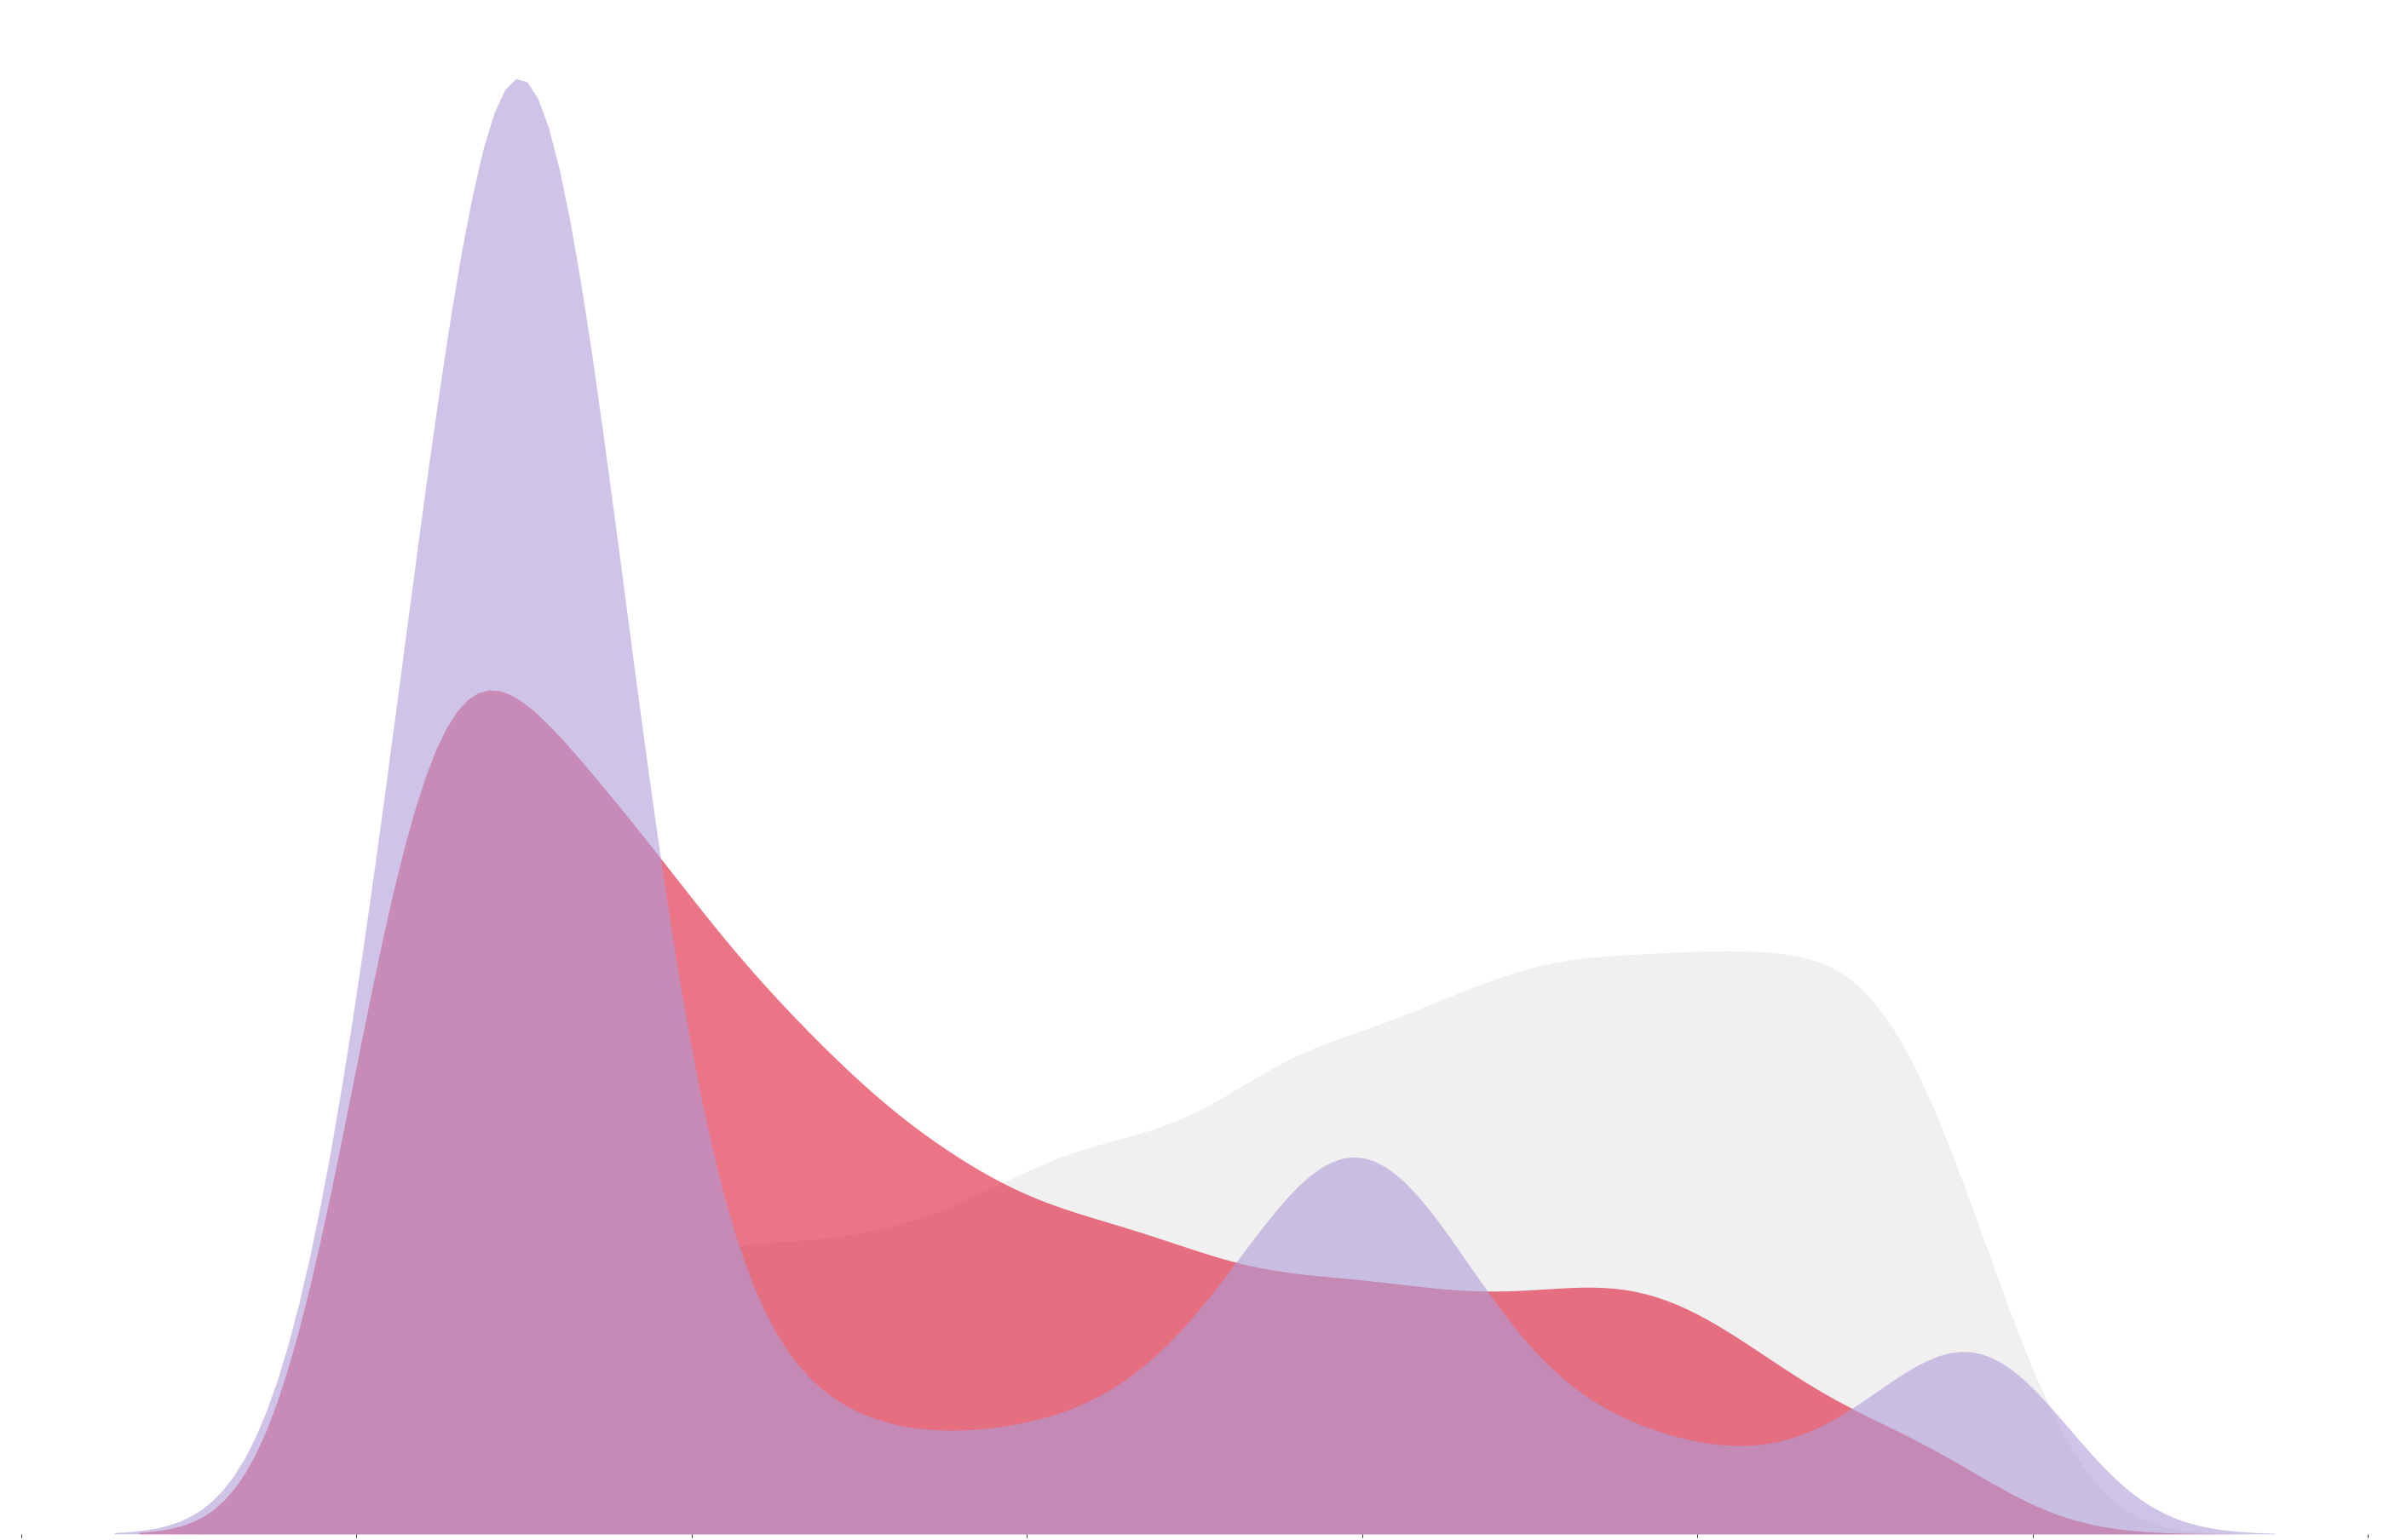

In [98]:
# colors to use in the plot
colors = ["#B19CD9", "#DE1738", "#E6E6E6"]
sns.set_palette(sns.color_palette(colors))

j = 1
for i in classes['index']:
    plt.figure(figsize=(50,33))

    sns.kdeplot(data=color[color.movement == i][['hue','saturation','lightness']],
                   fill=True, common_norm=False,
                   alpha=.6, linewidth=0, legend = None)

    plt.xlabel("Color Value", size=35, color = 'white', visible = False)
    plt.xticks(visible=False)
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(True)

    # Remove all borders
    sns.despine(bottom = True, left = True)
    
    name_file = str(j)+' - '+ i+ ' hsl distribuition.png'
    j +=1

    # Saving all the plots to analysis by name of movement for further study
    plt.savefig(name_file, transparent=True)
    plt.show()

**Calculating and ploting the color that defines the movement** 

In [51]:
movement_colors = pd.DataFrame(columns=['movement', 'color'])

# Selecting the most frequent value of of each color chanell per movement to calculate the dominat color
for i in classes['index']:
    r = pd.DataFrame(color[color.movement == i]['r'].value_counts()).head(1).reset_index()['index'][0]
    g = pd.DataFrame(color[color.movement == i]['g'].value_counts()).head(1).reset_index()['index'][0]
    b = pd.DataFrame(color[color.movement == i]['b'].value_counts()).head(1).reset_index()['index'][0]
    movement_colors.loc[len(movement_colors)] = [i, (r,g,b)]

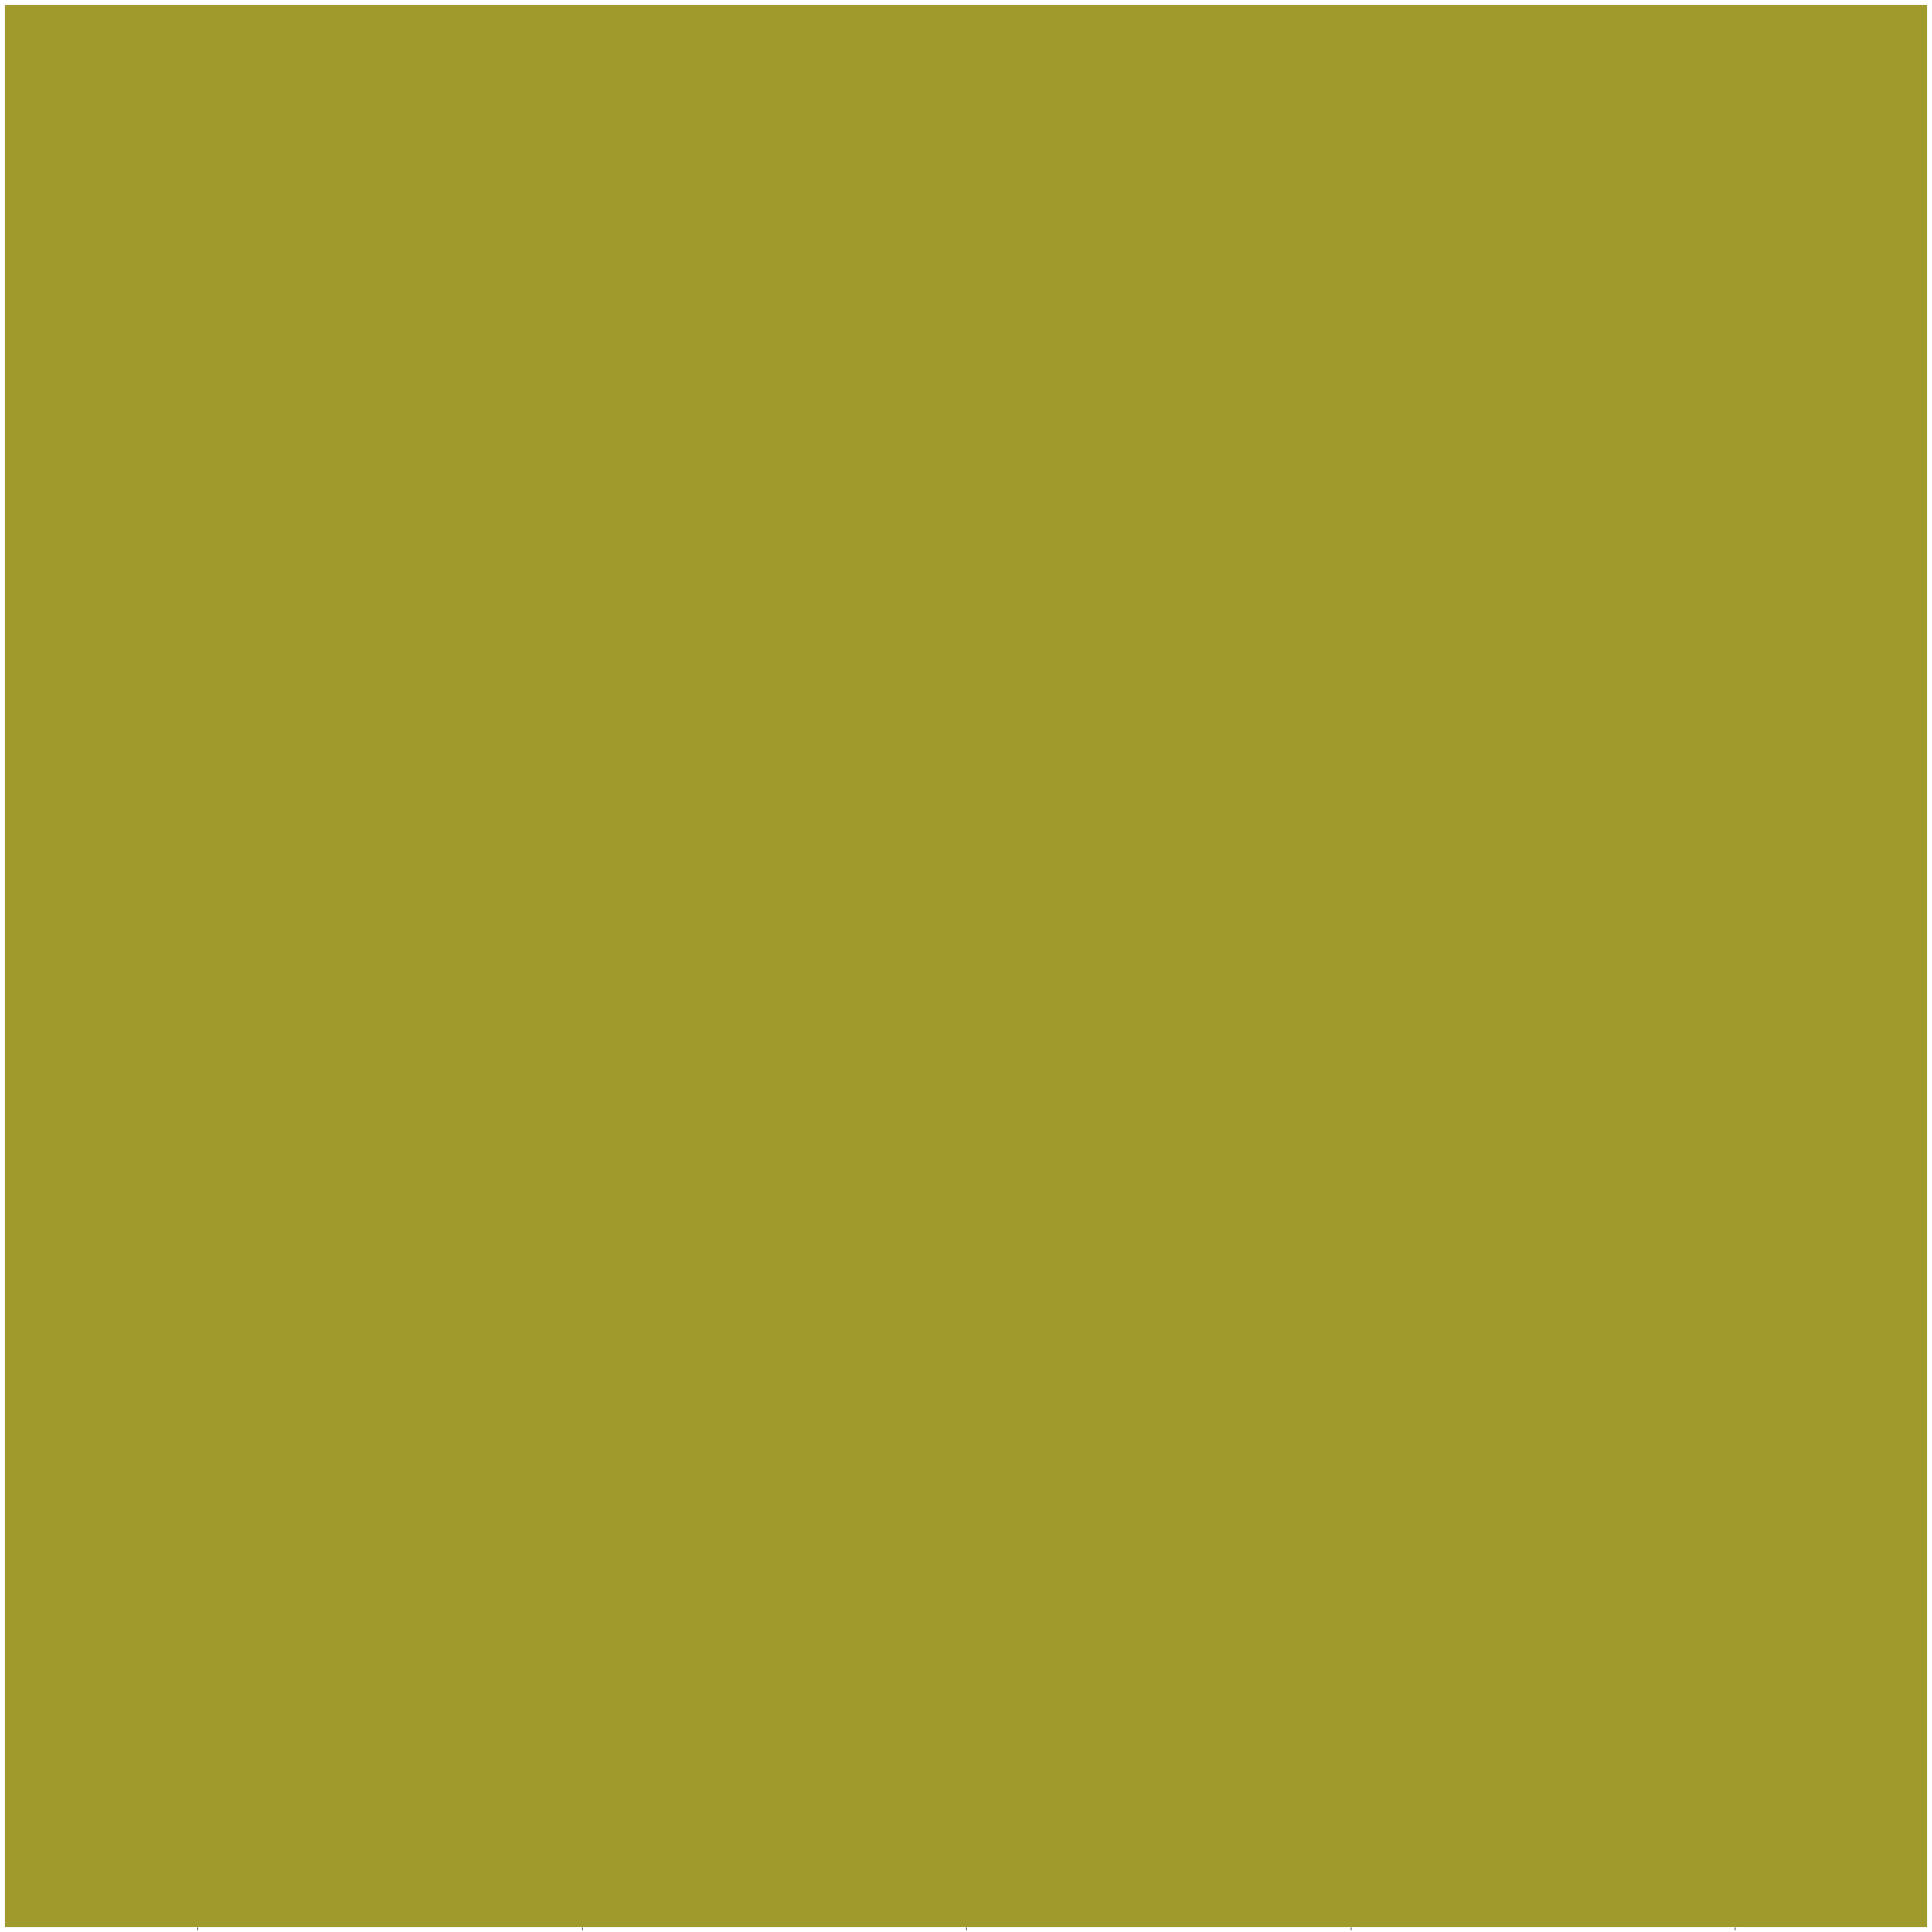

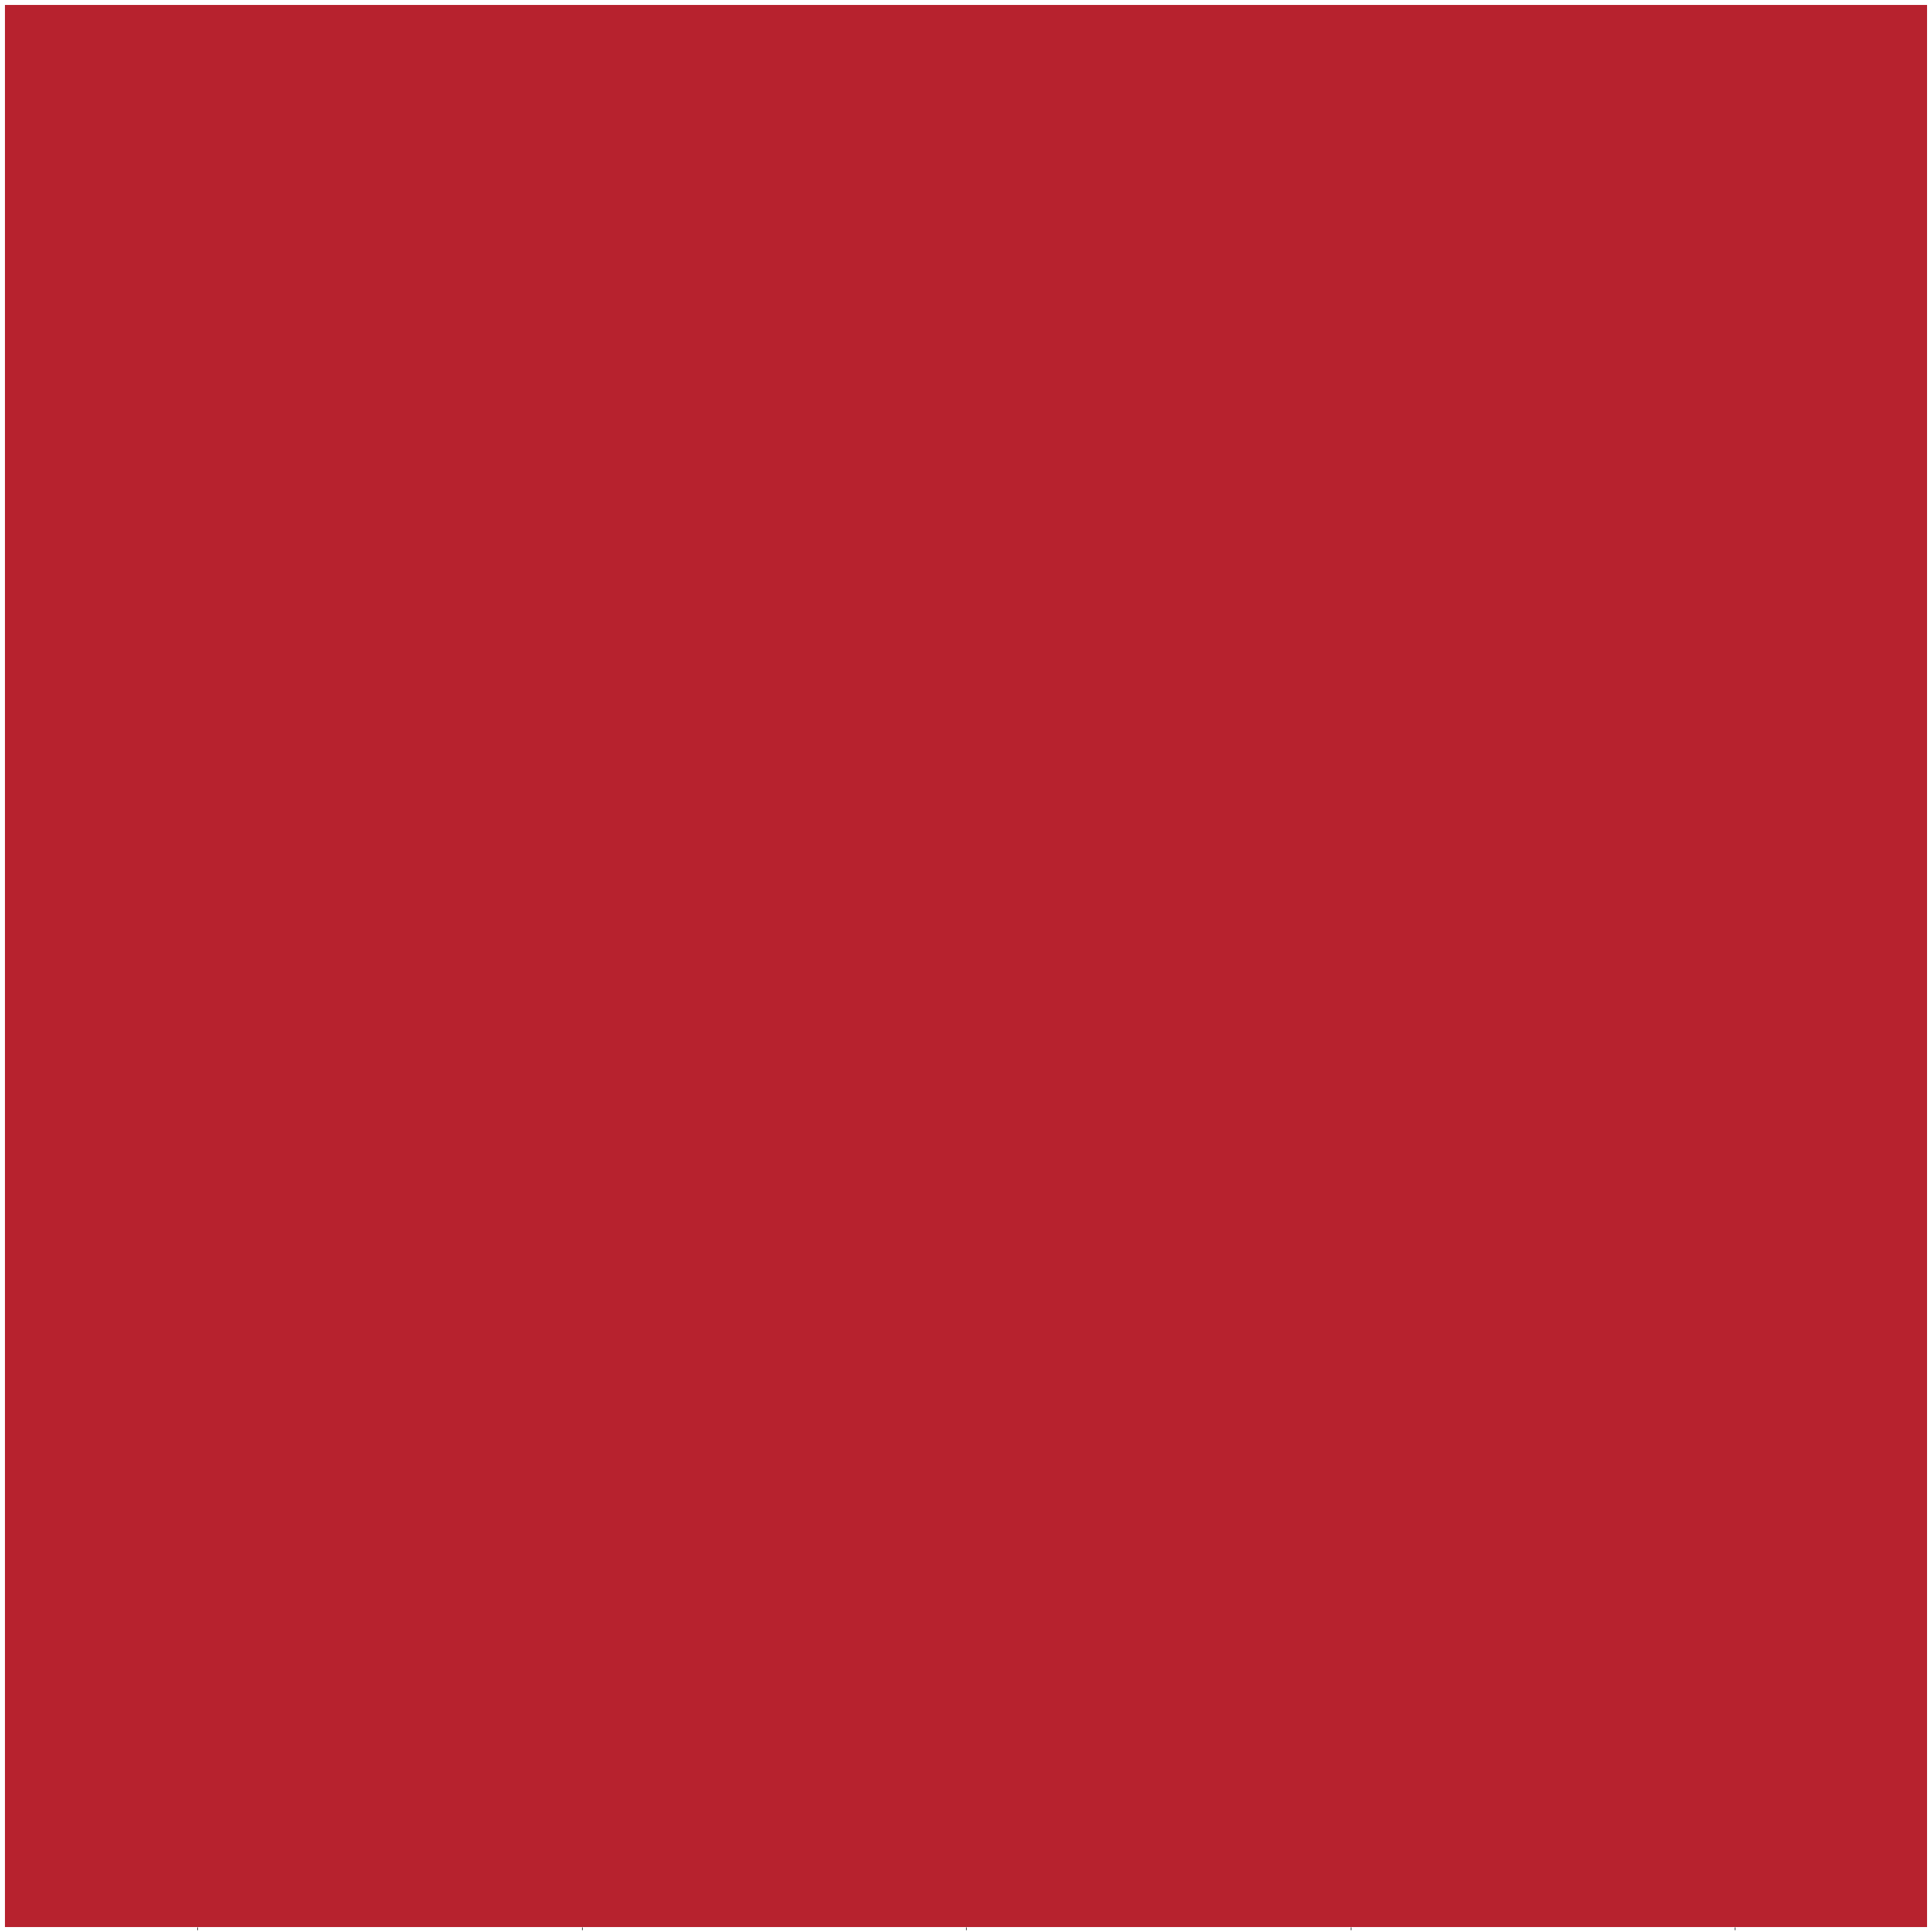

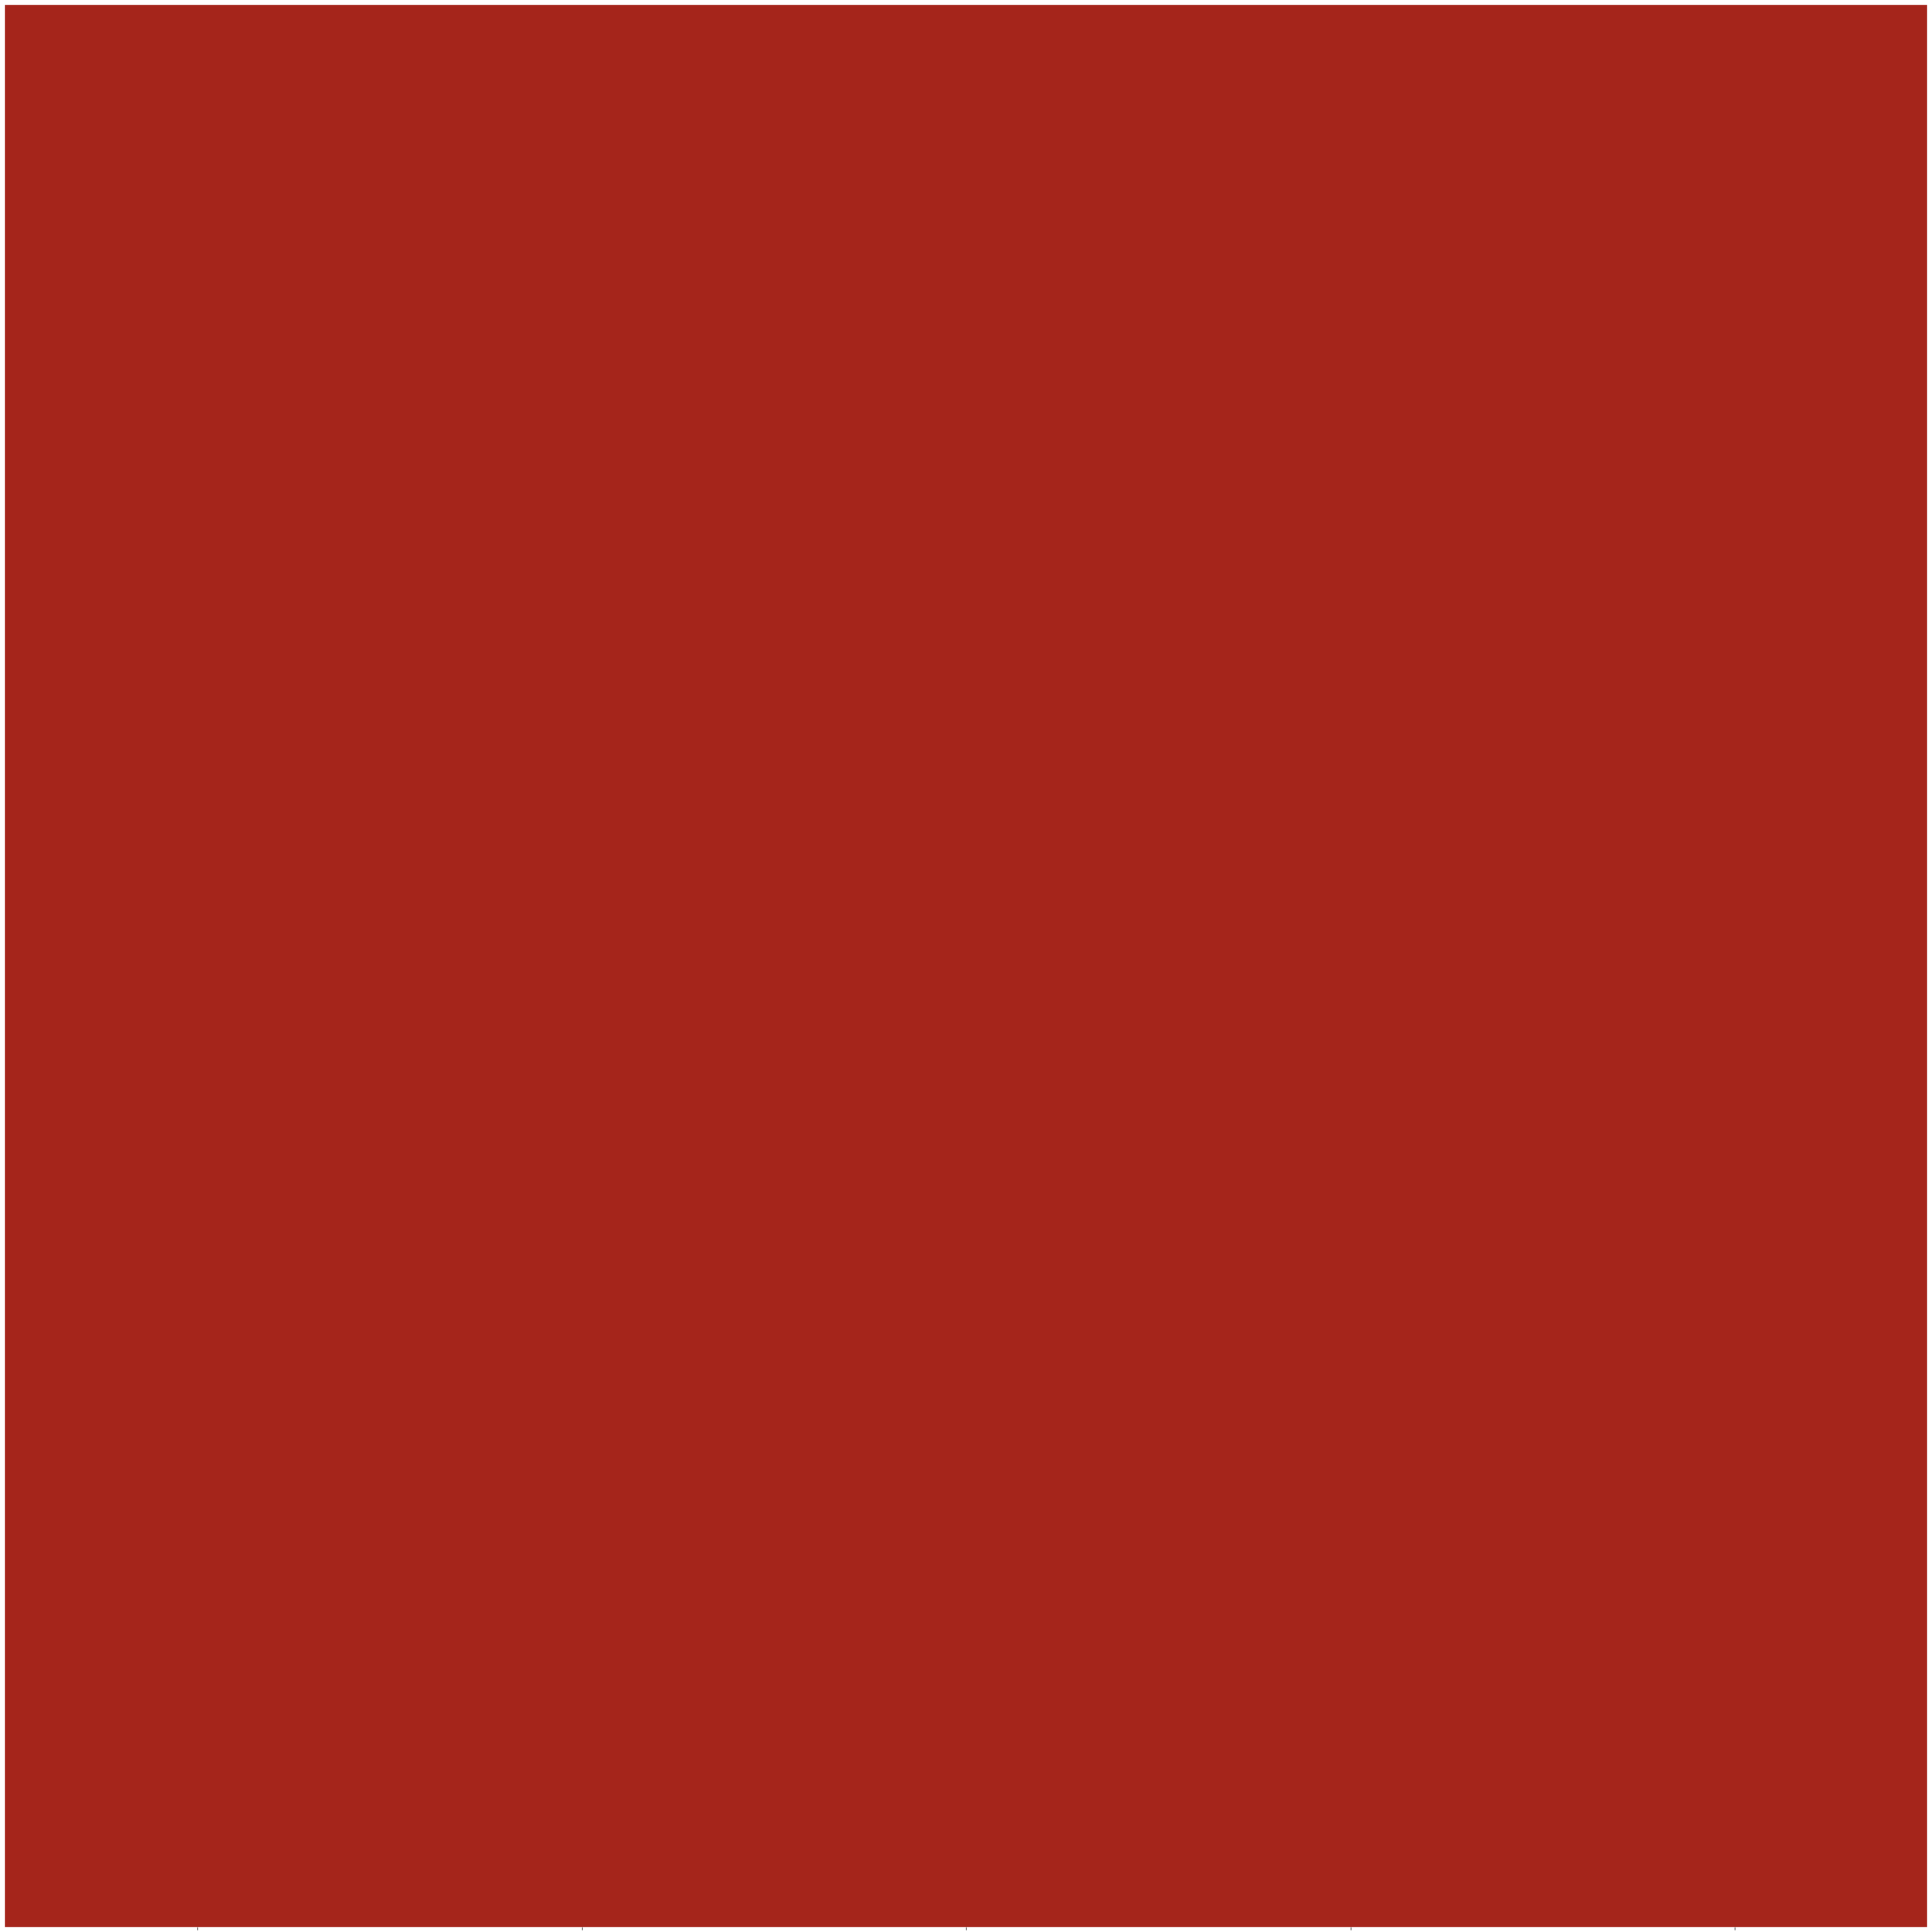

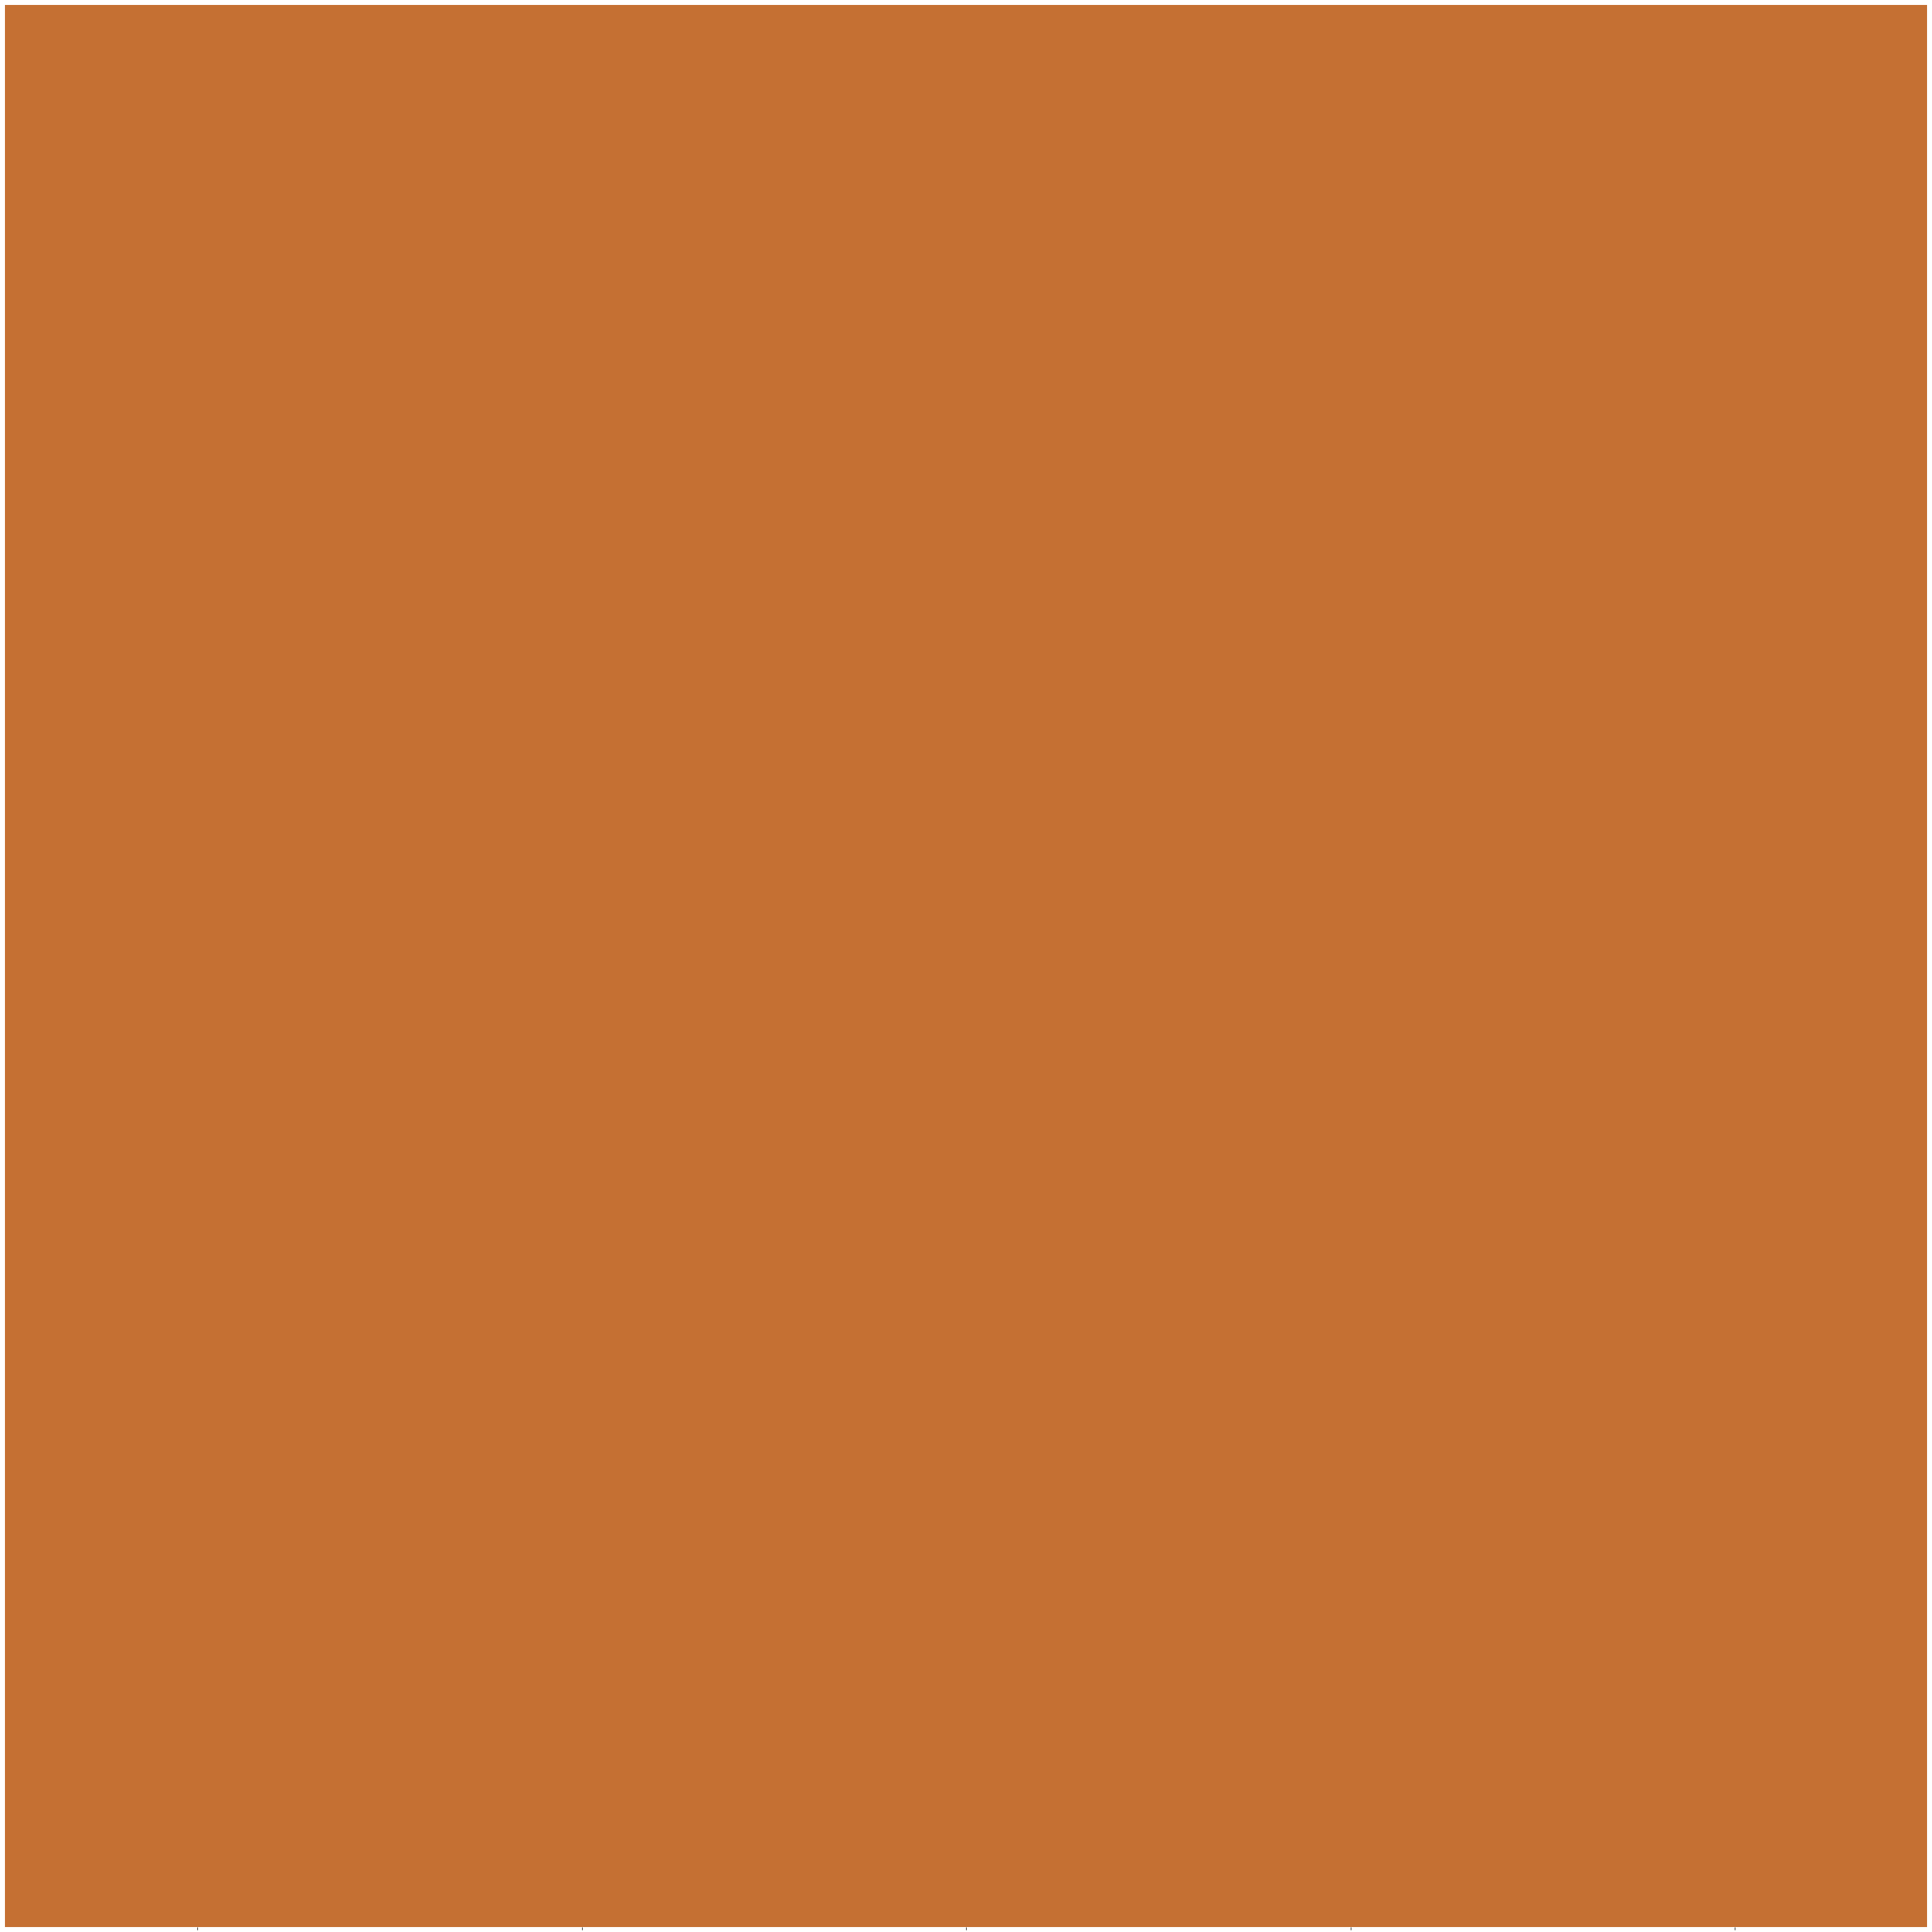

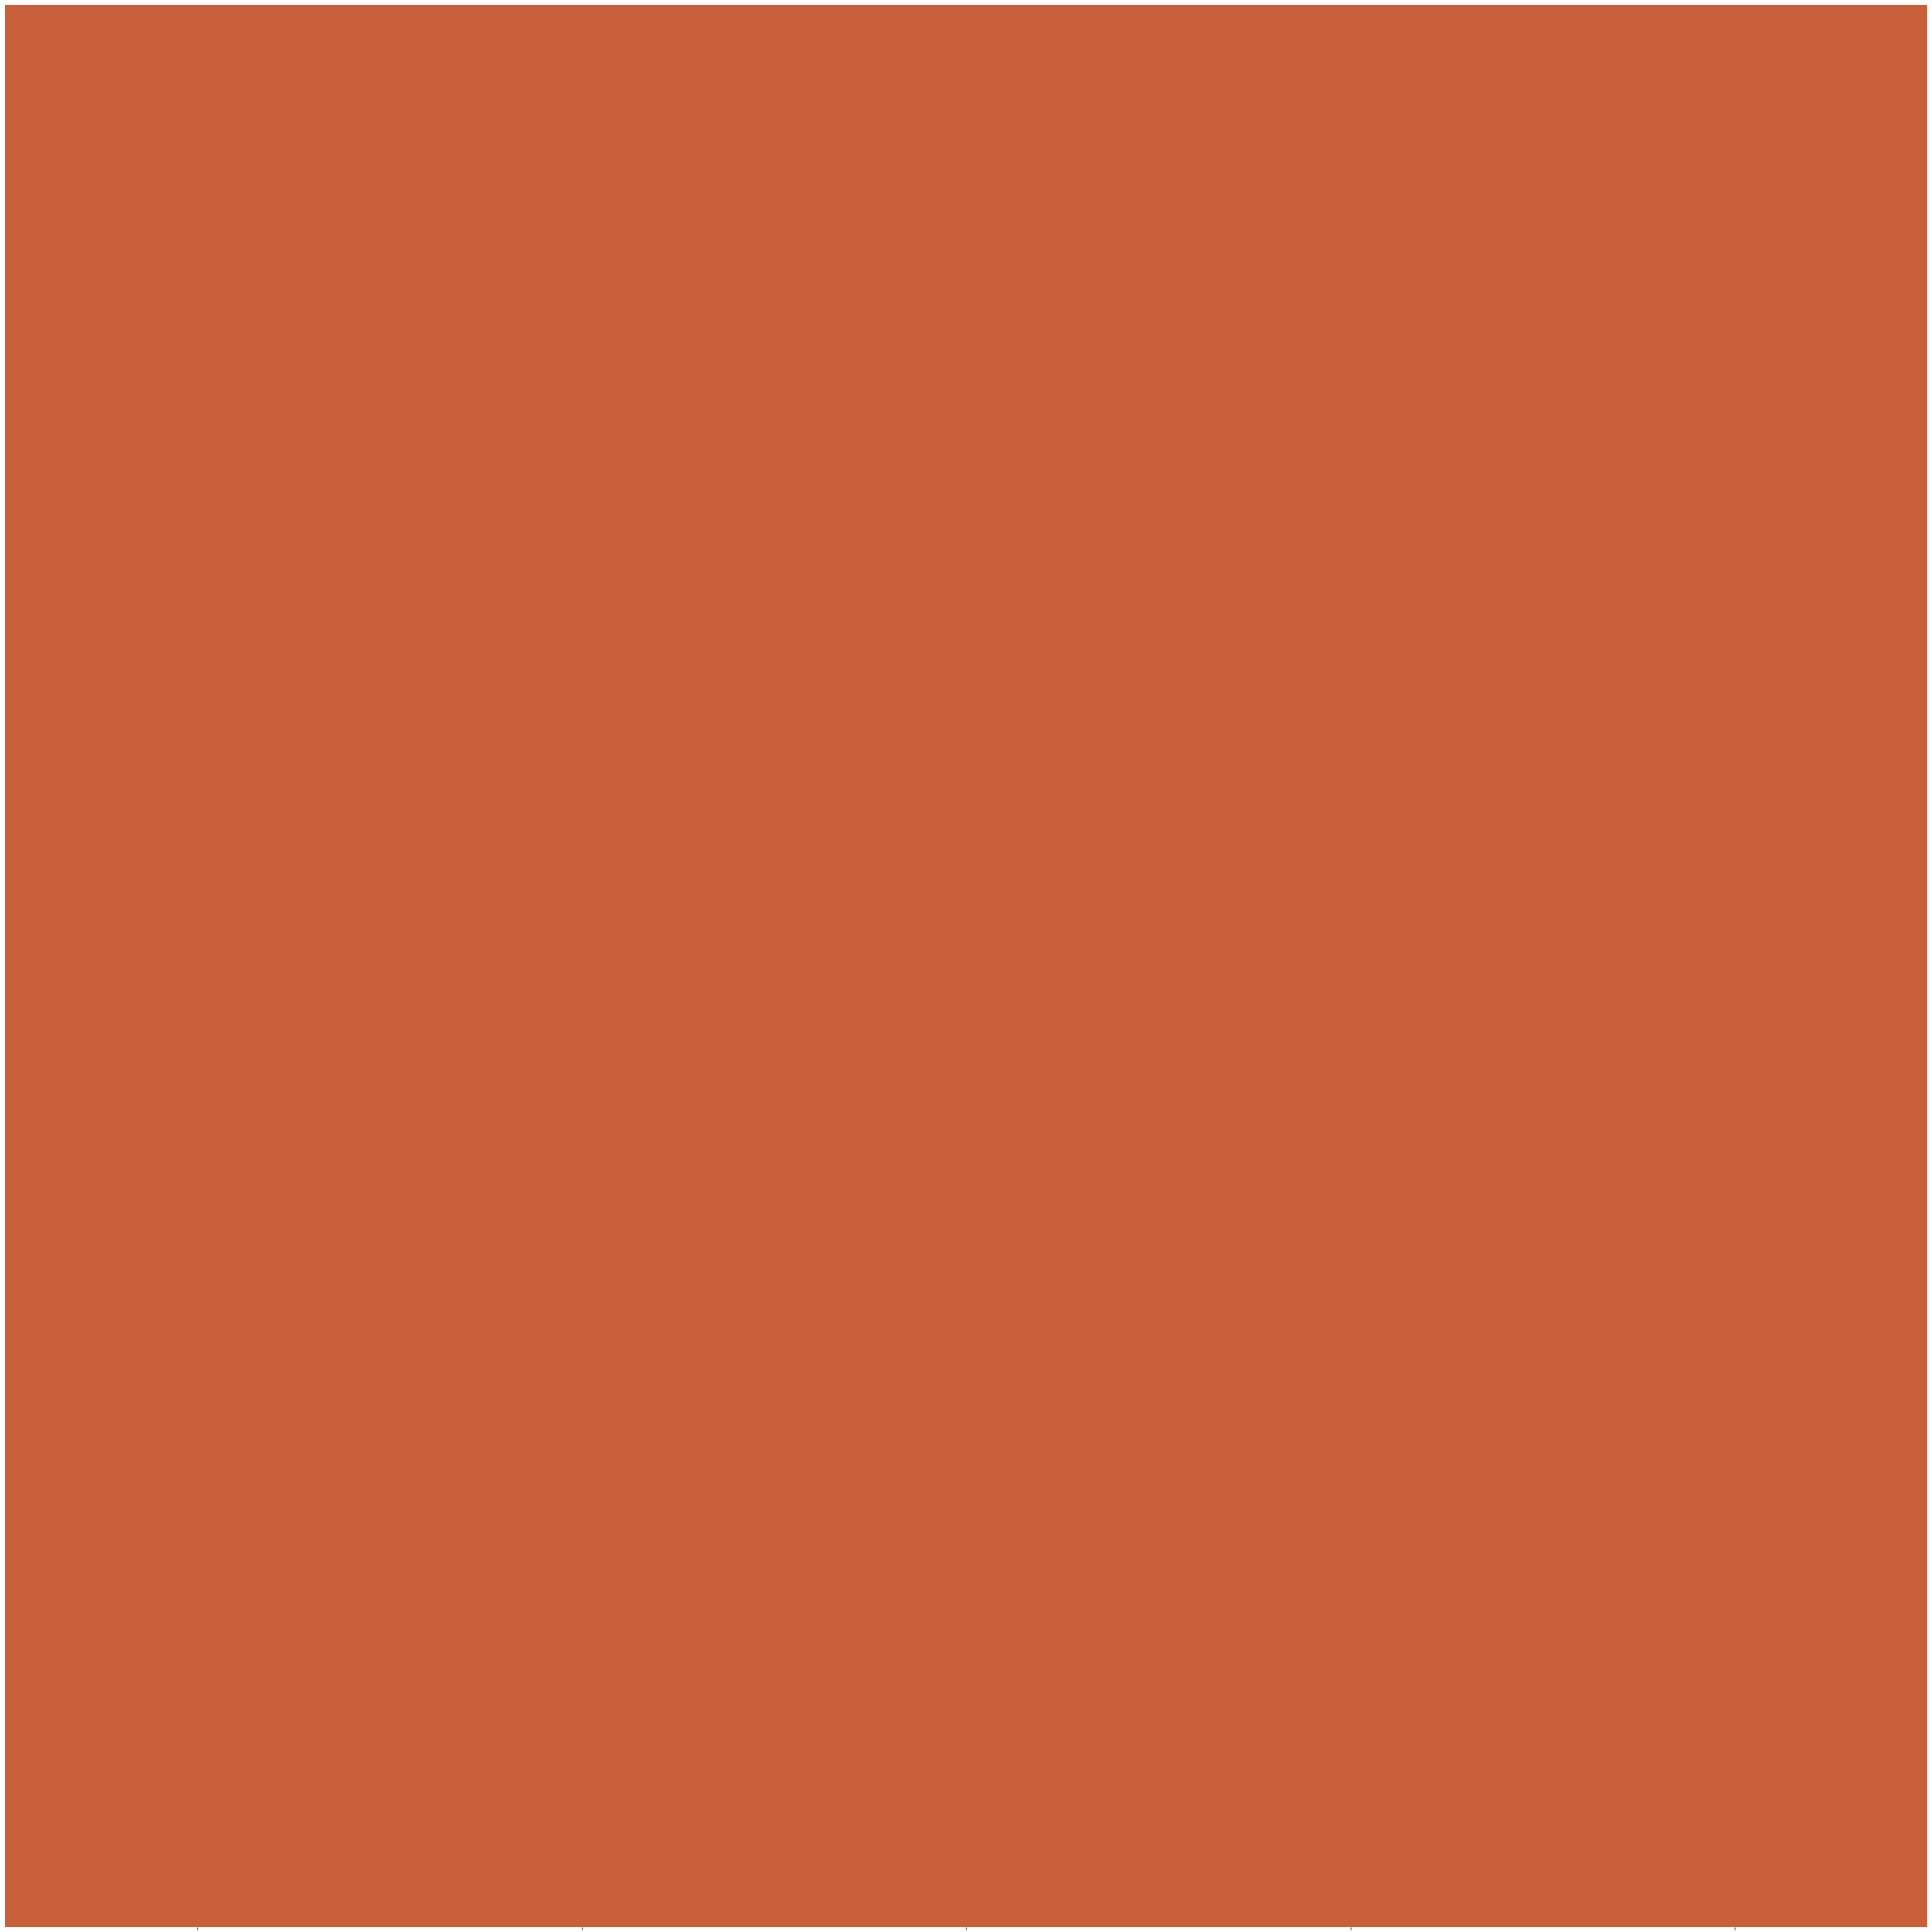

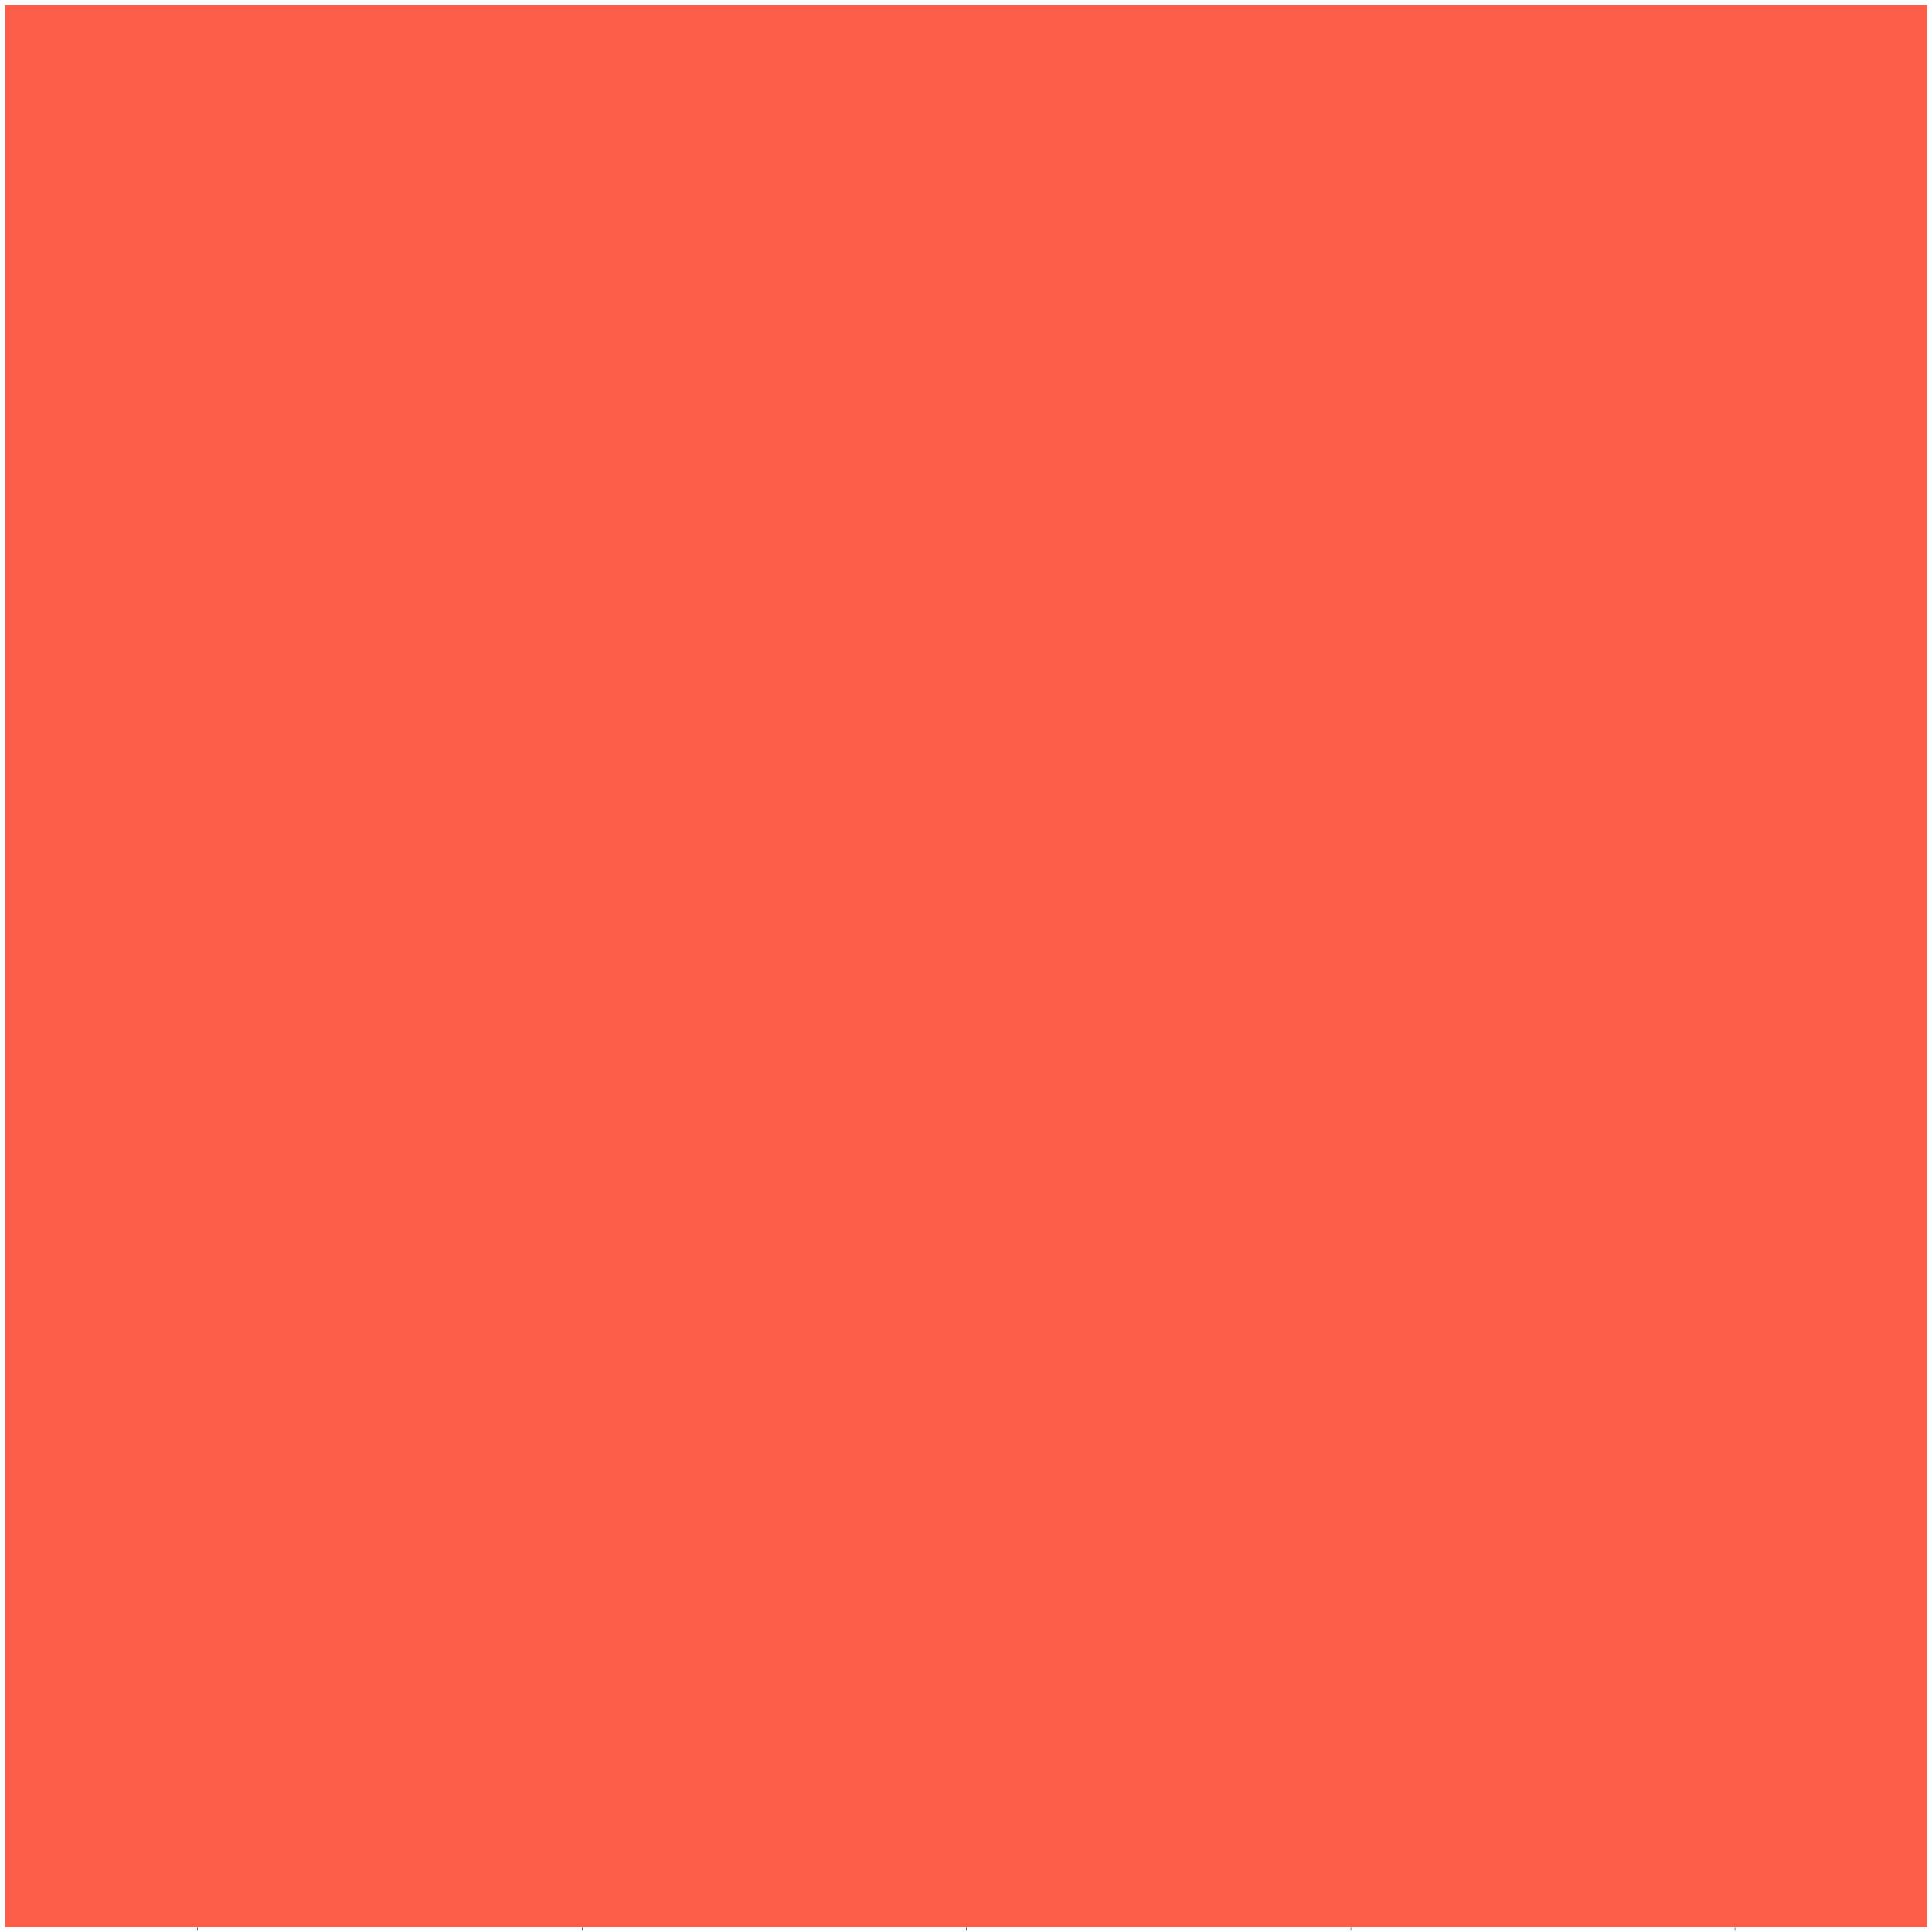

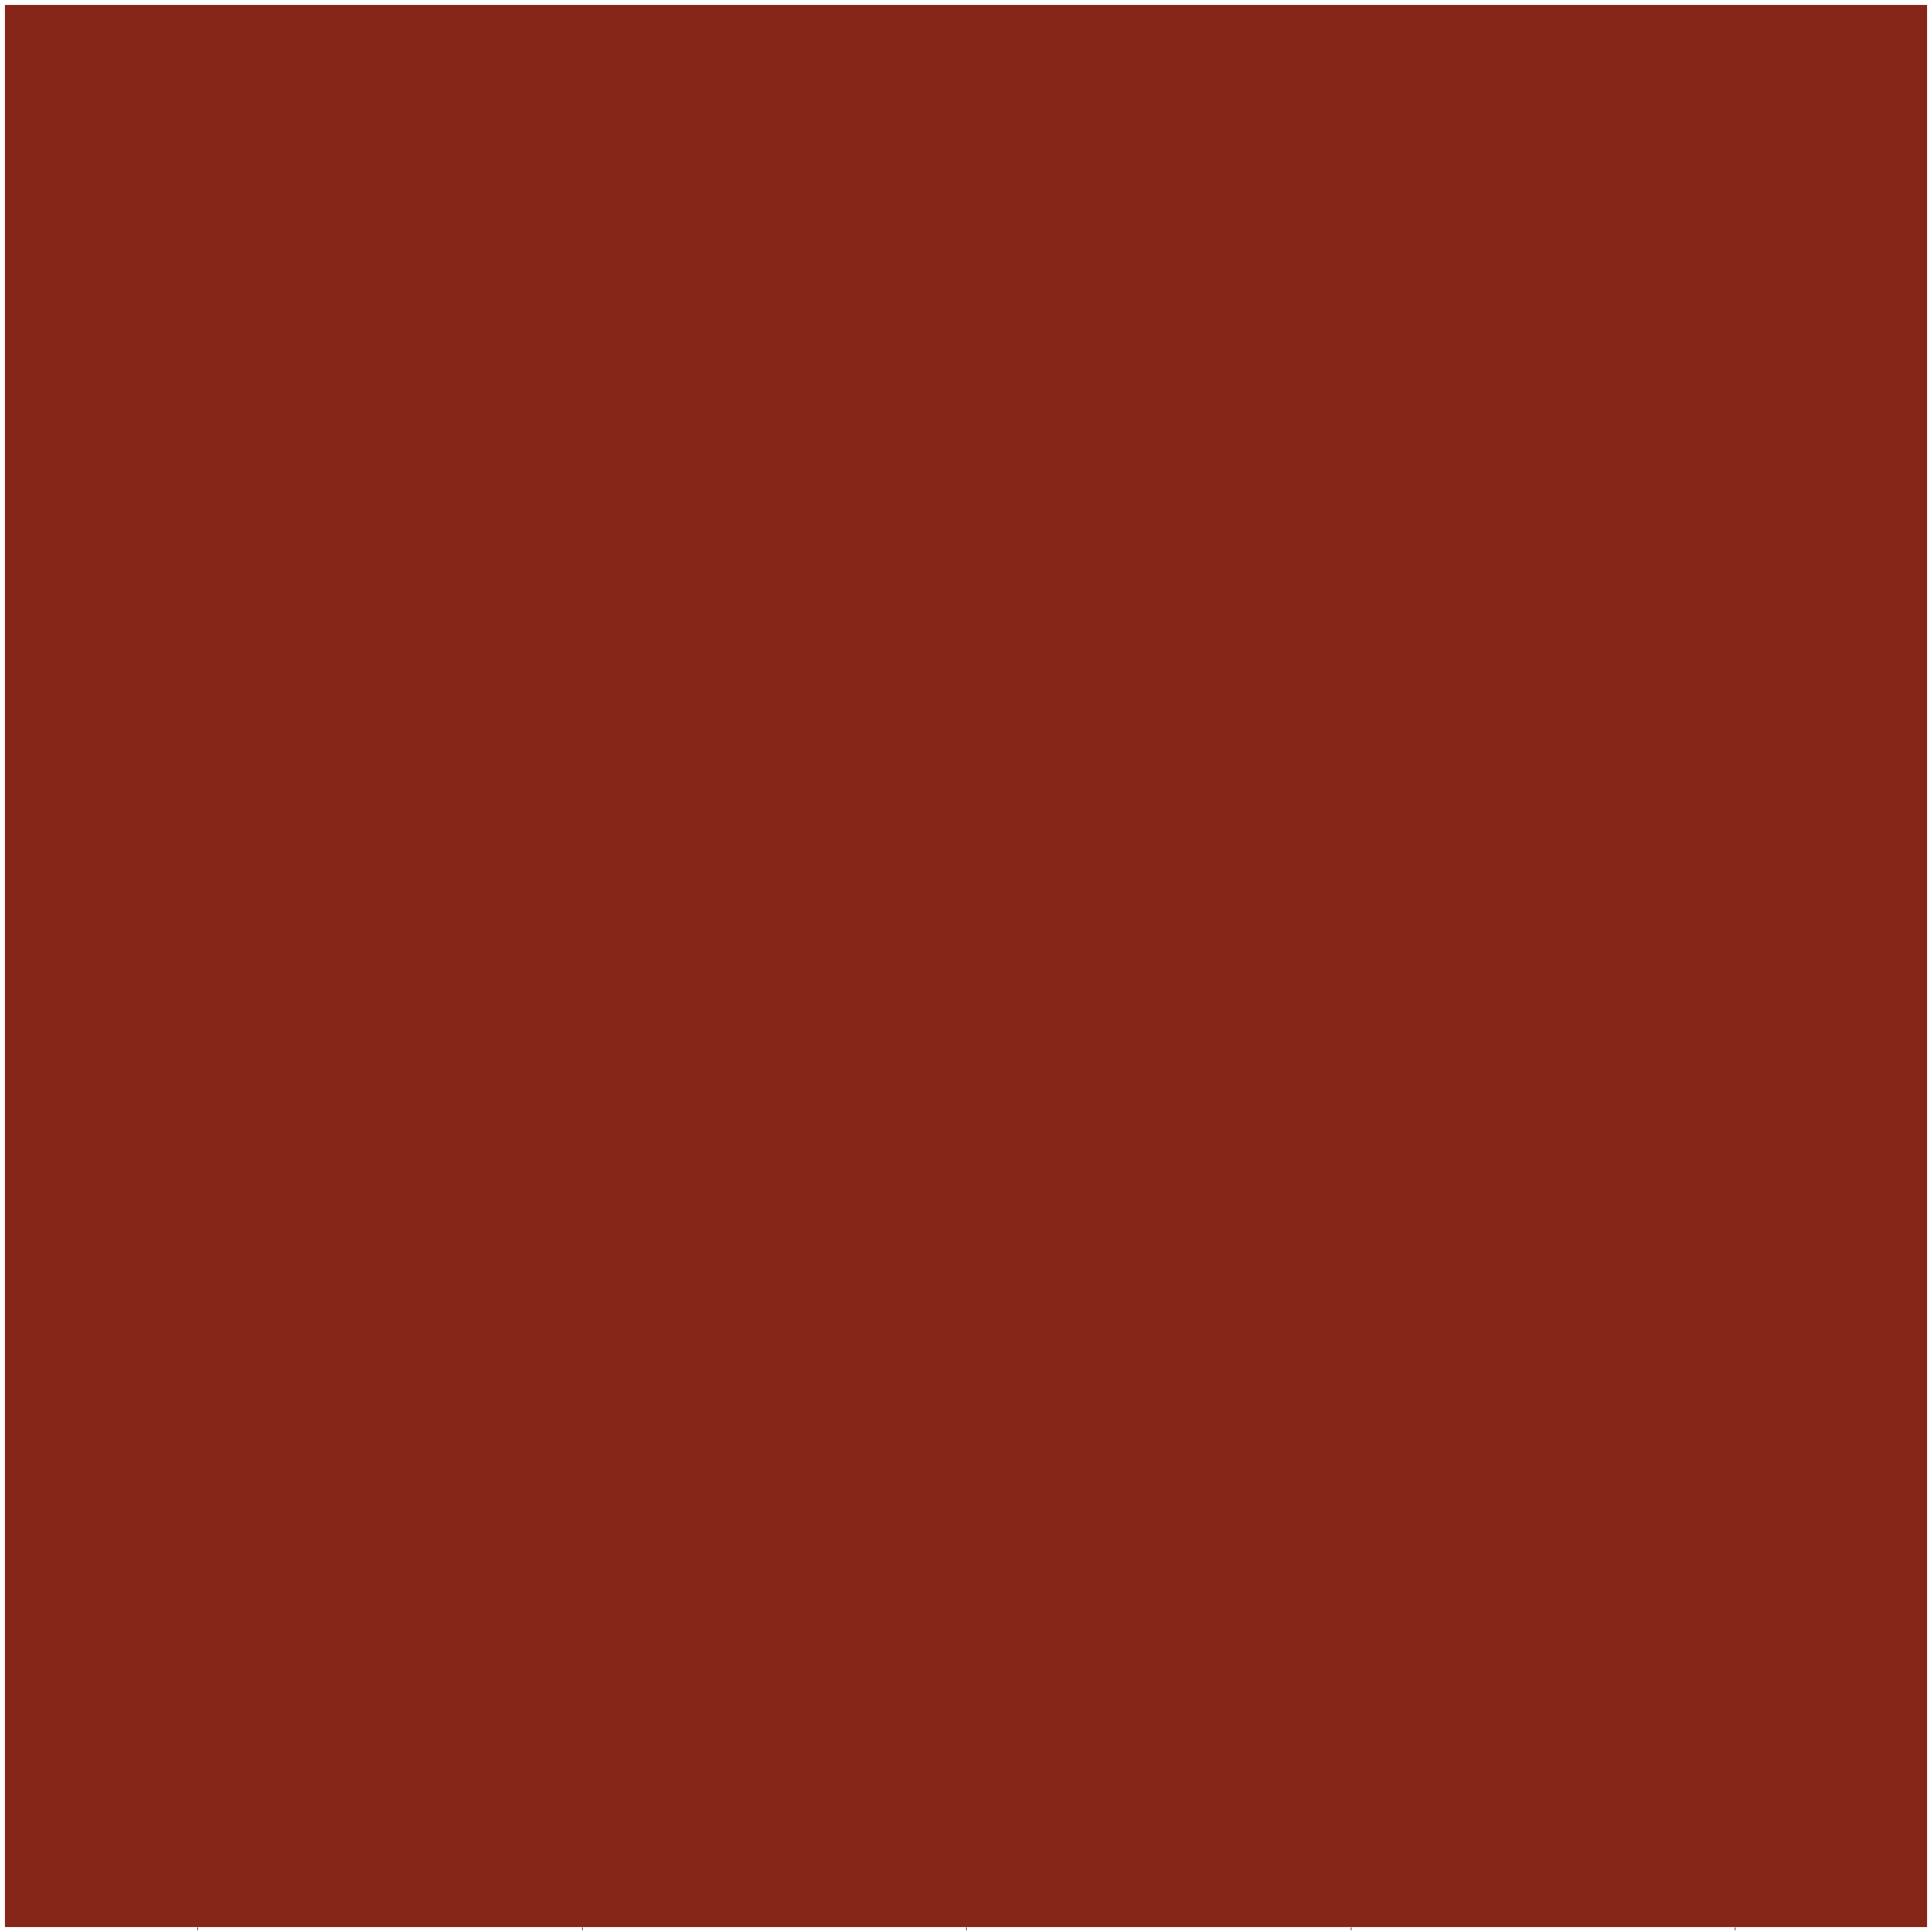

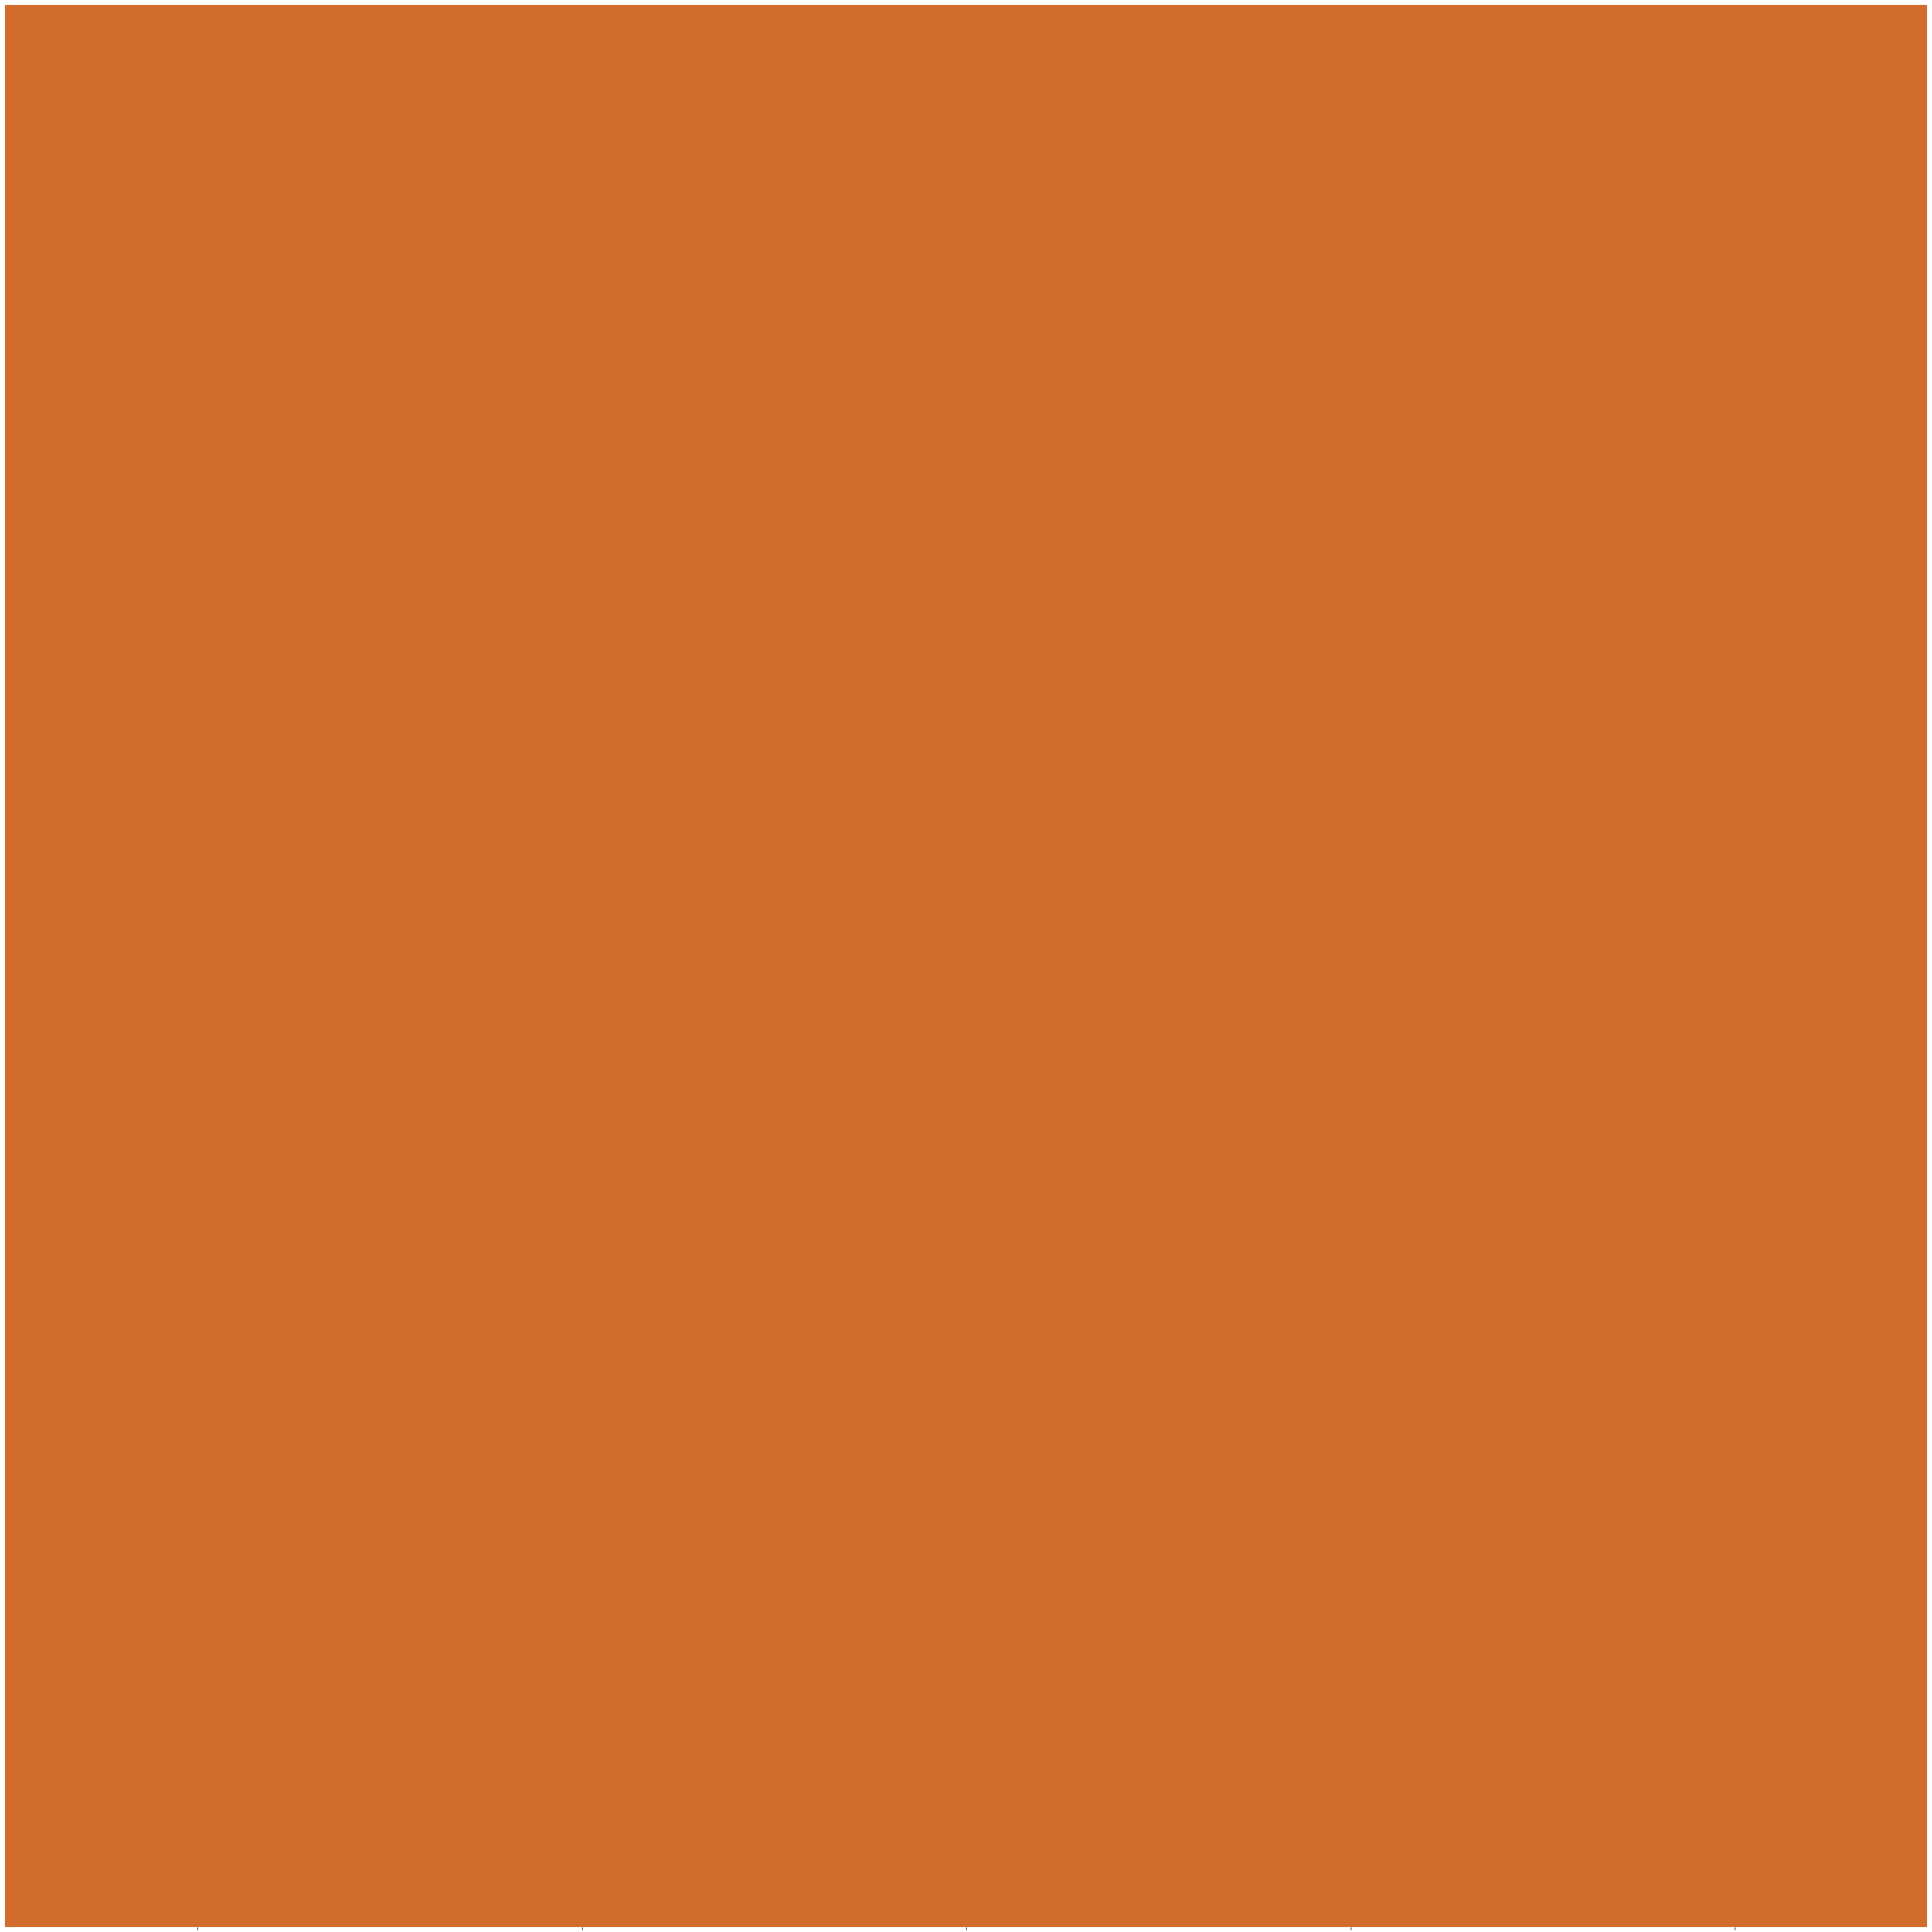

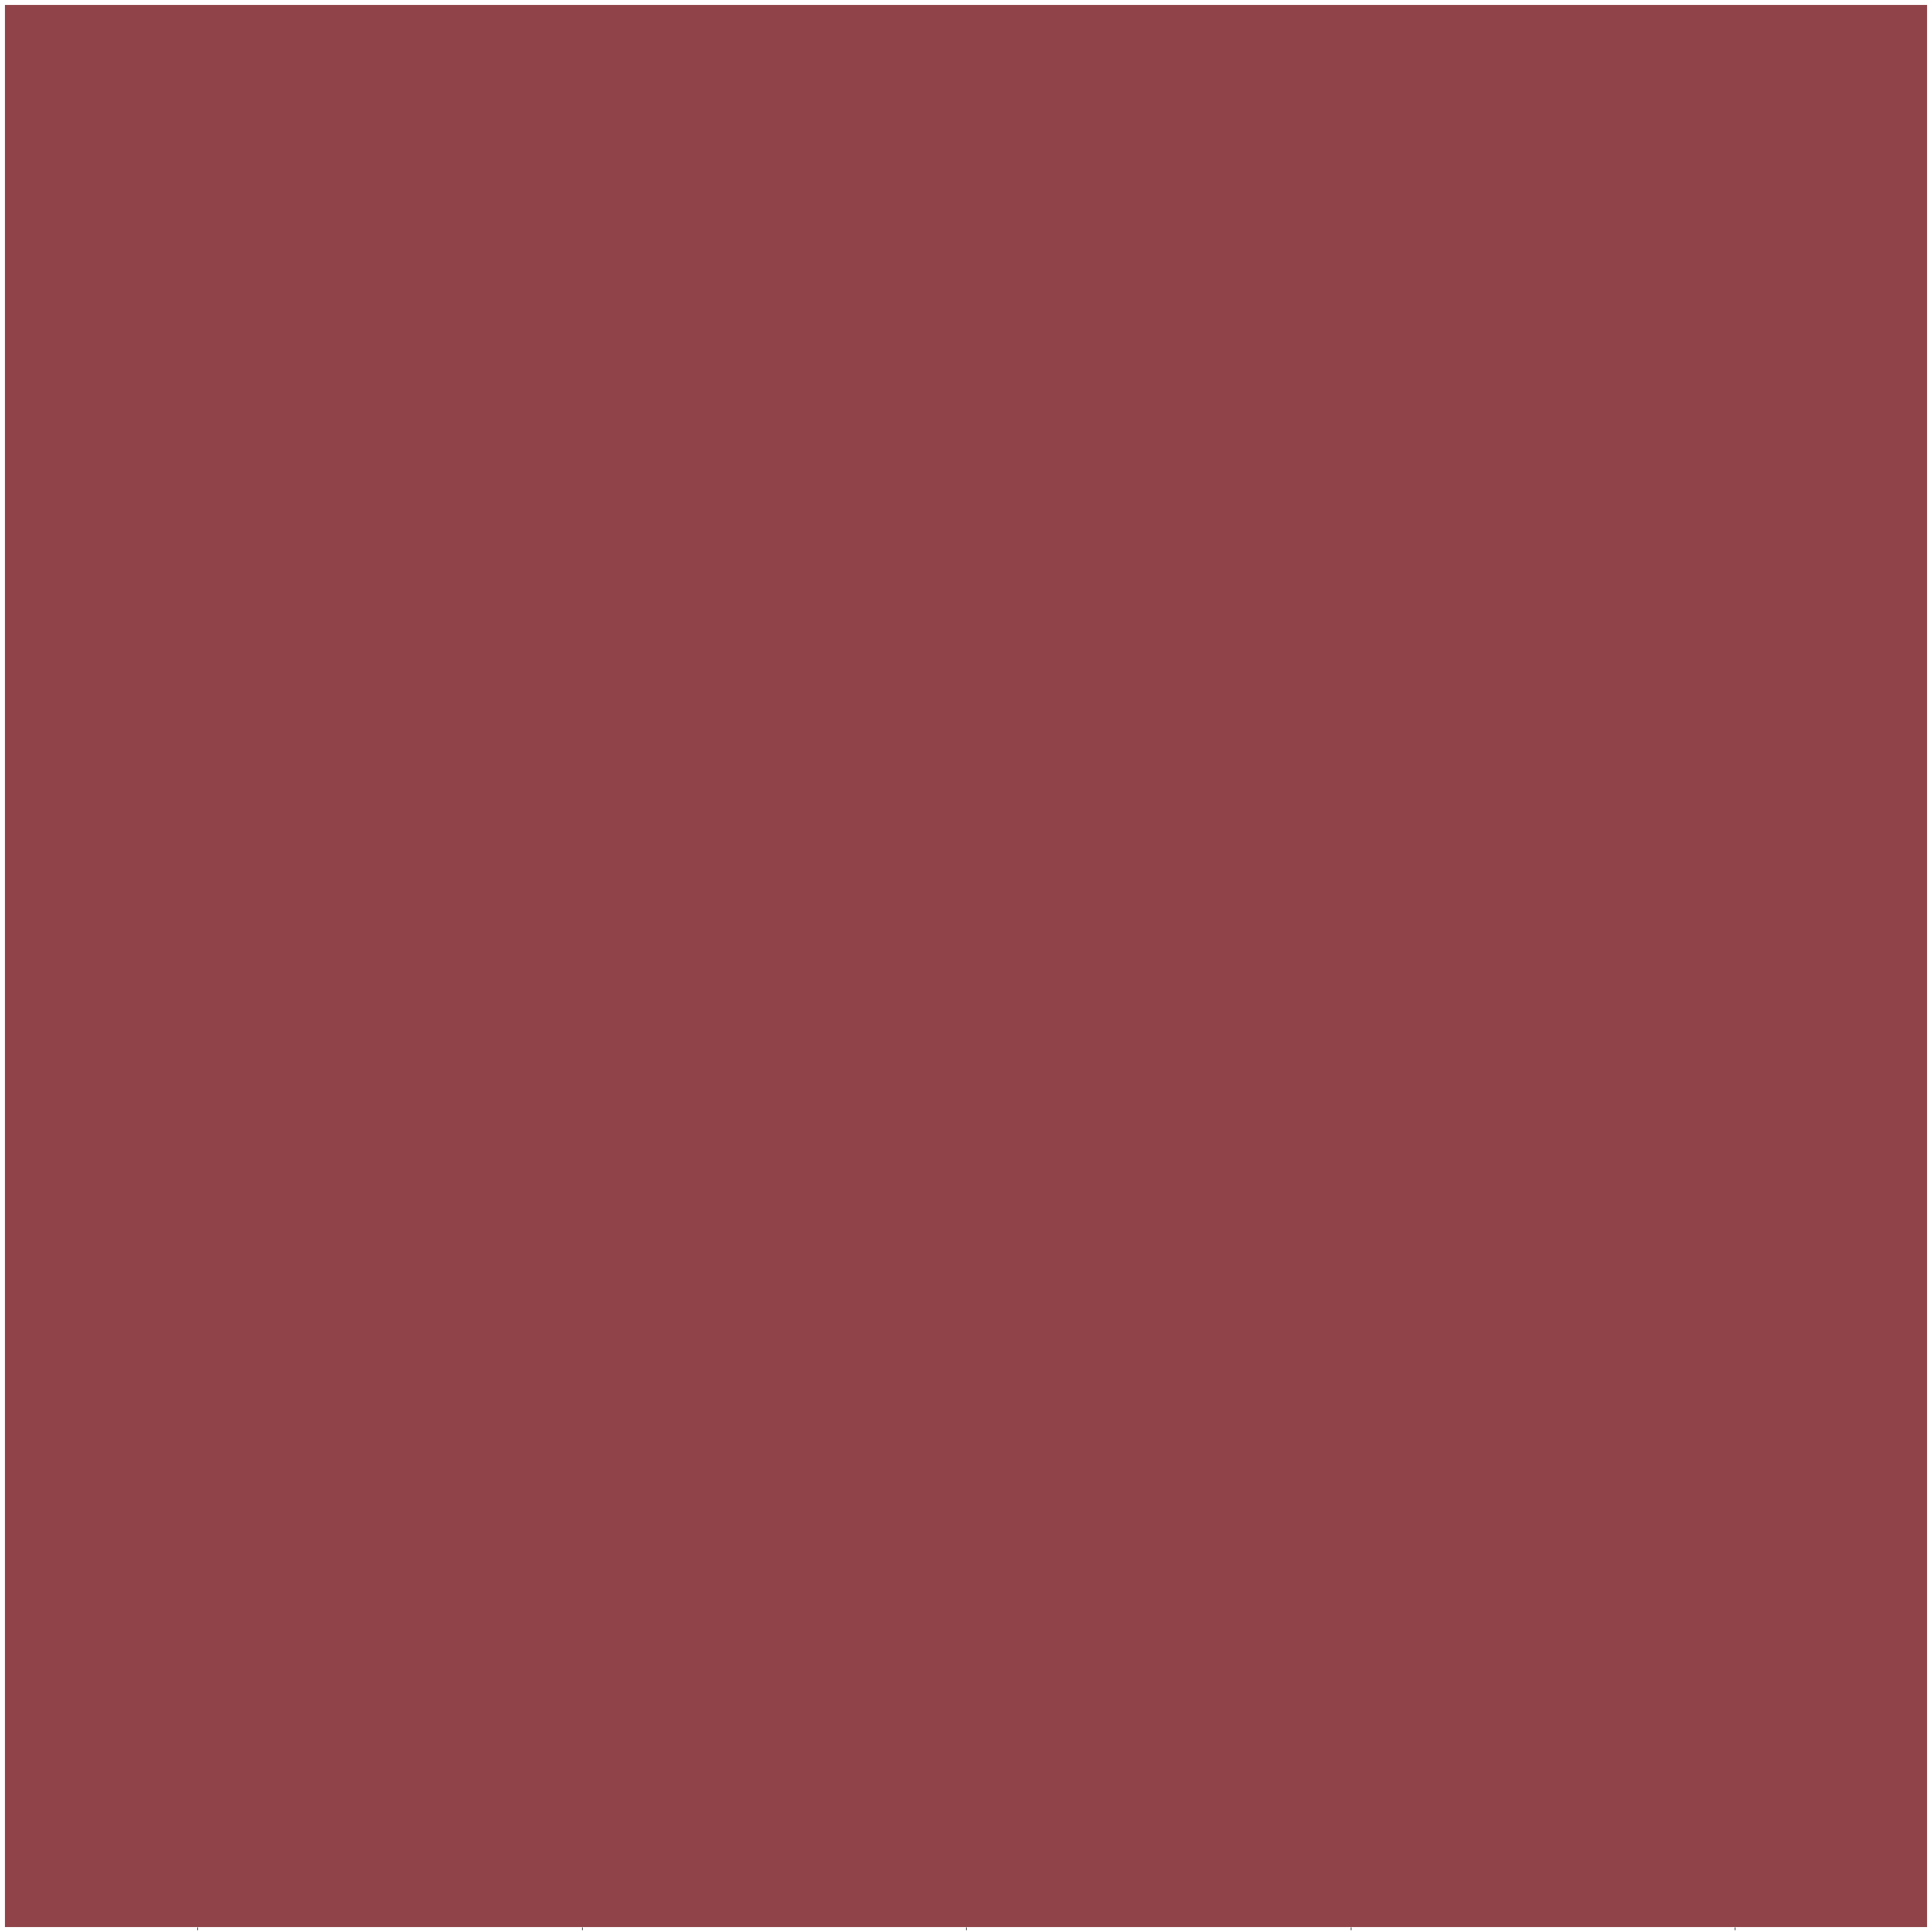

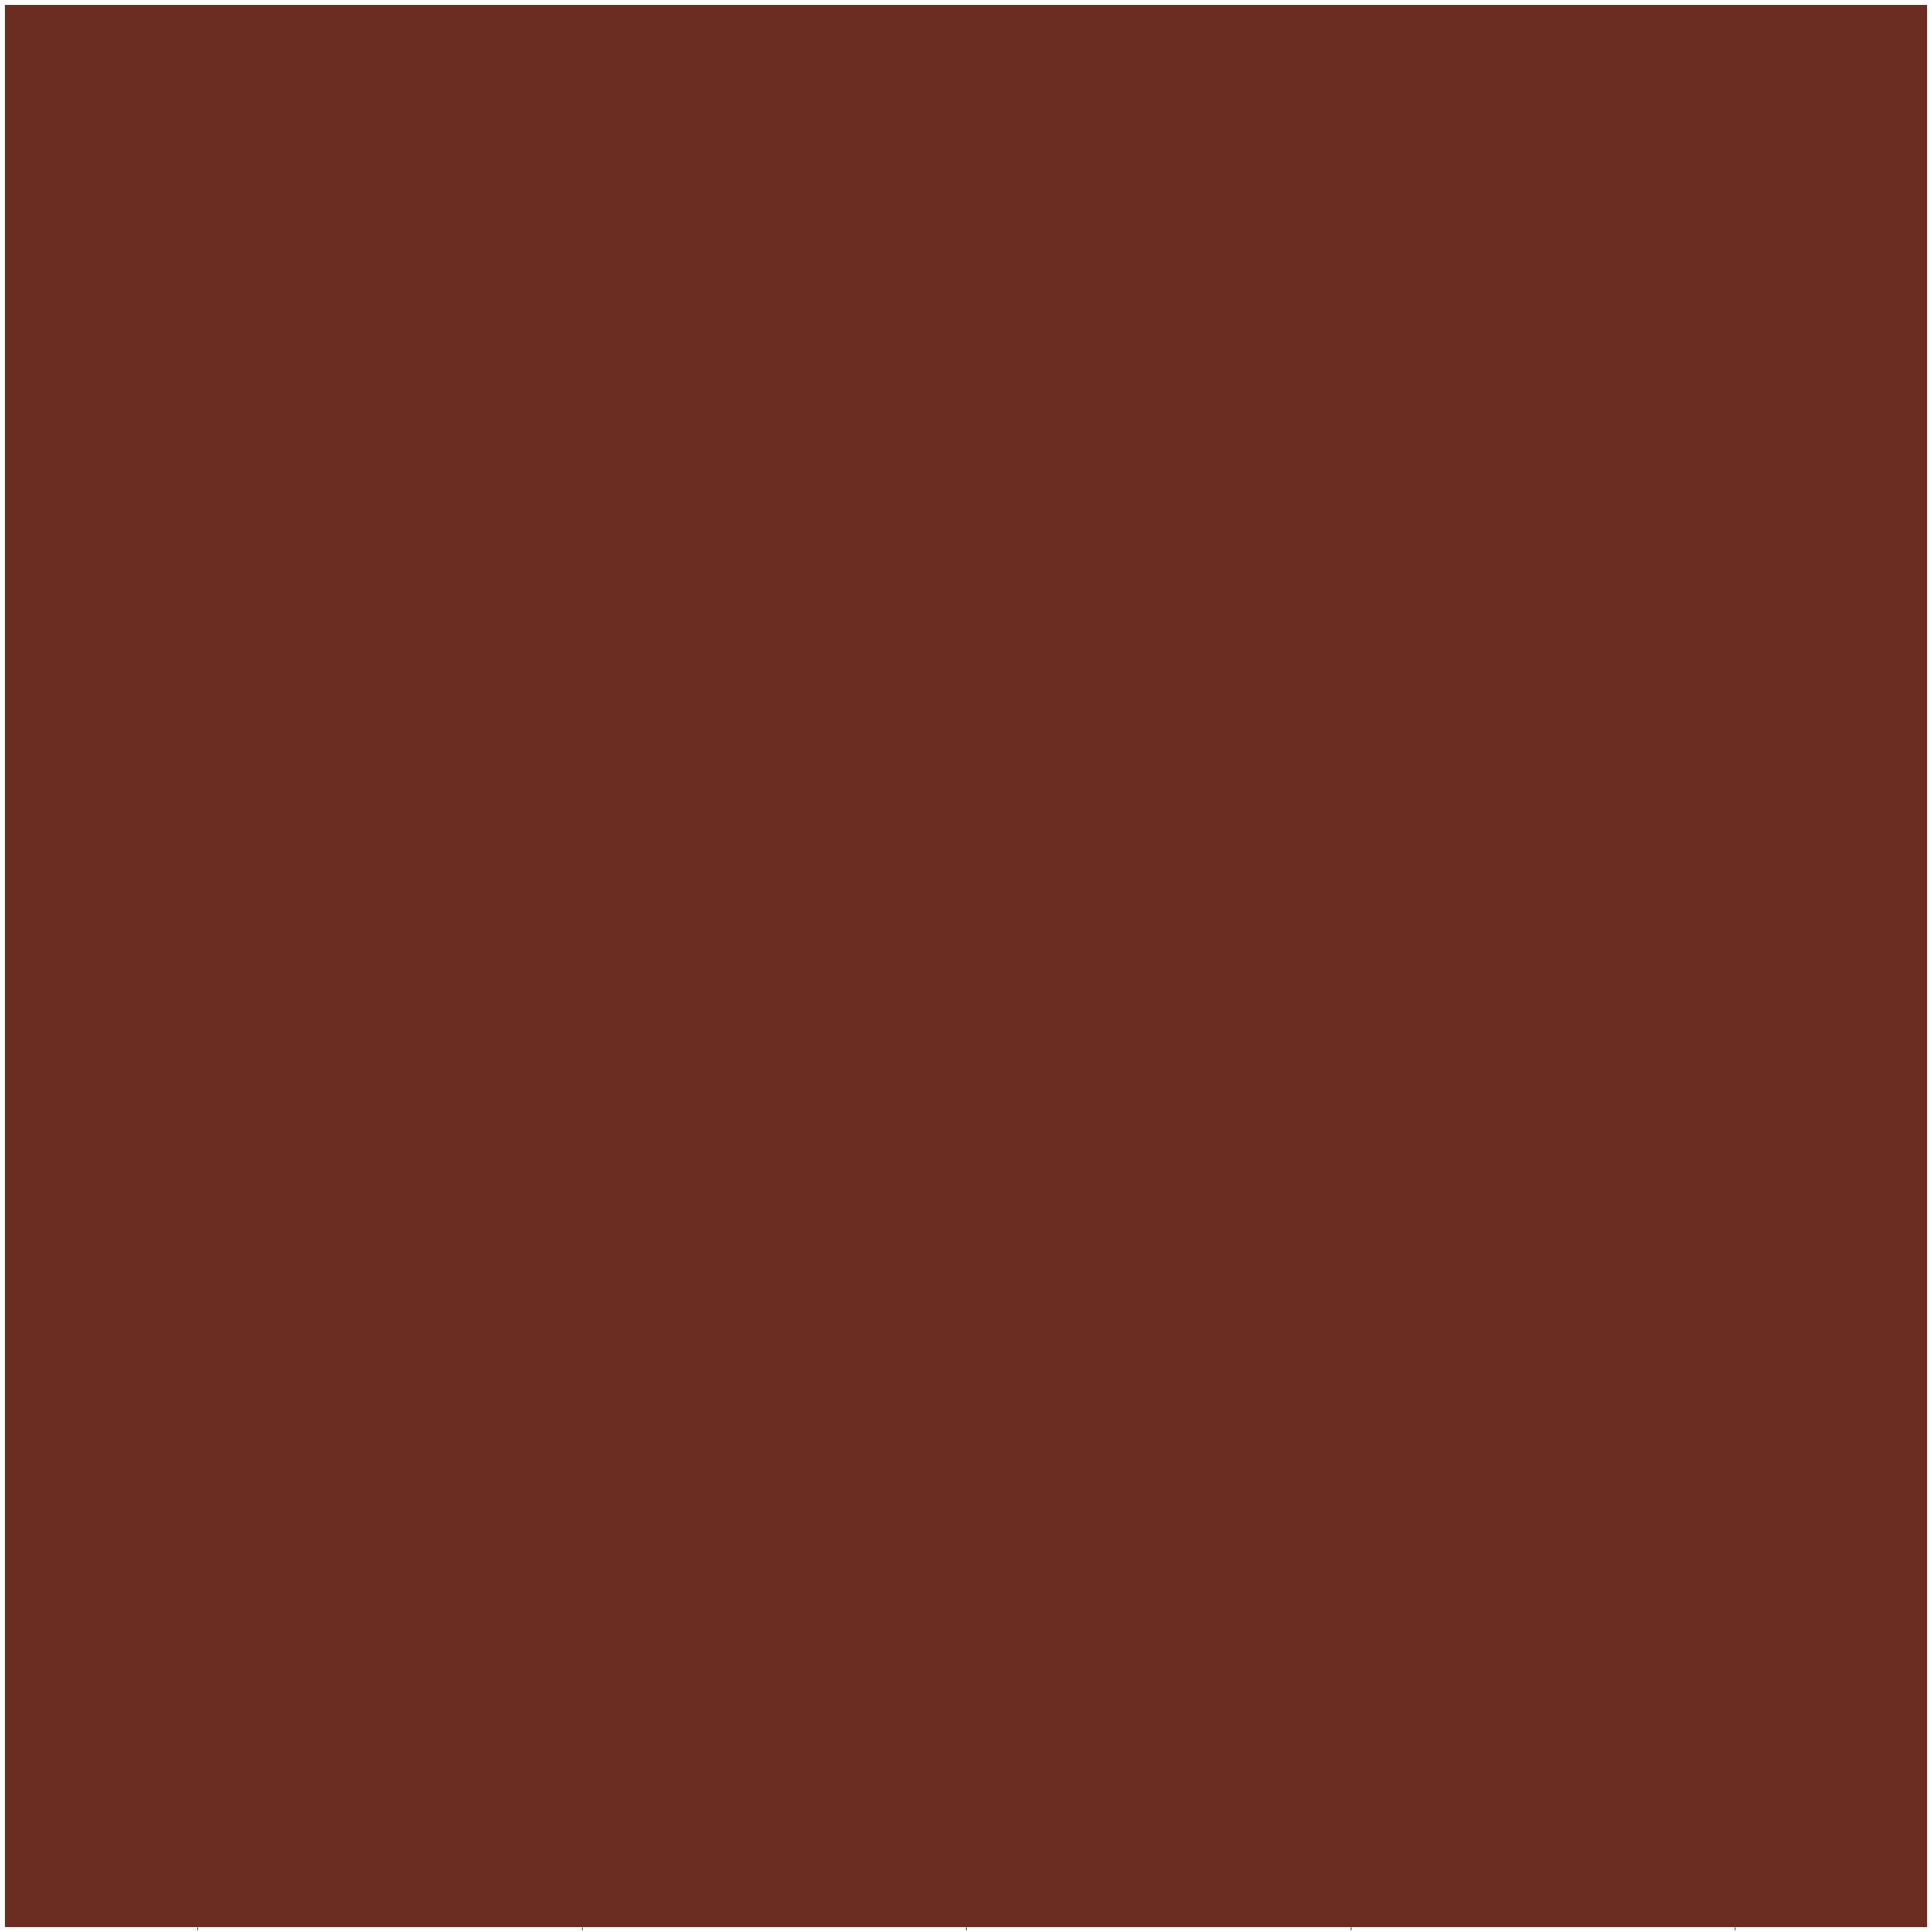

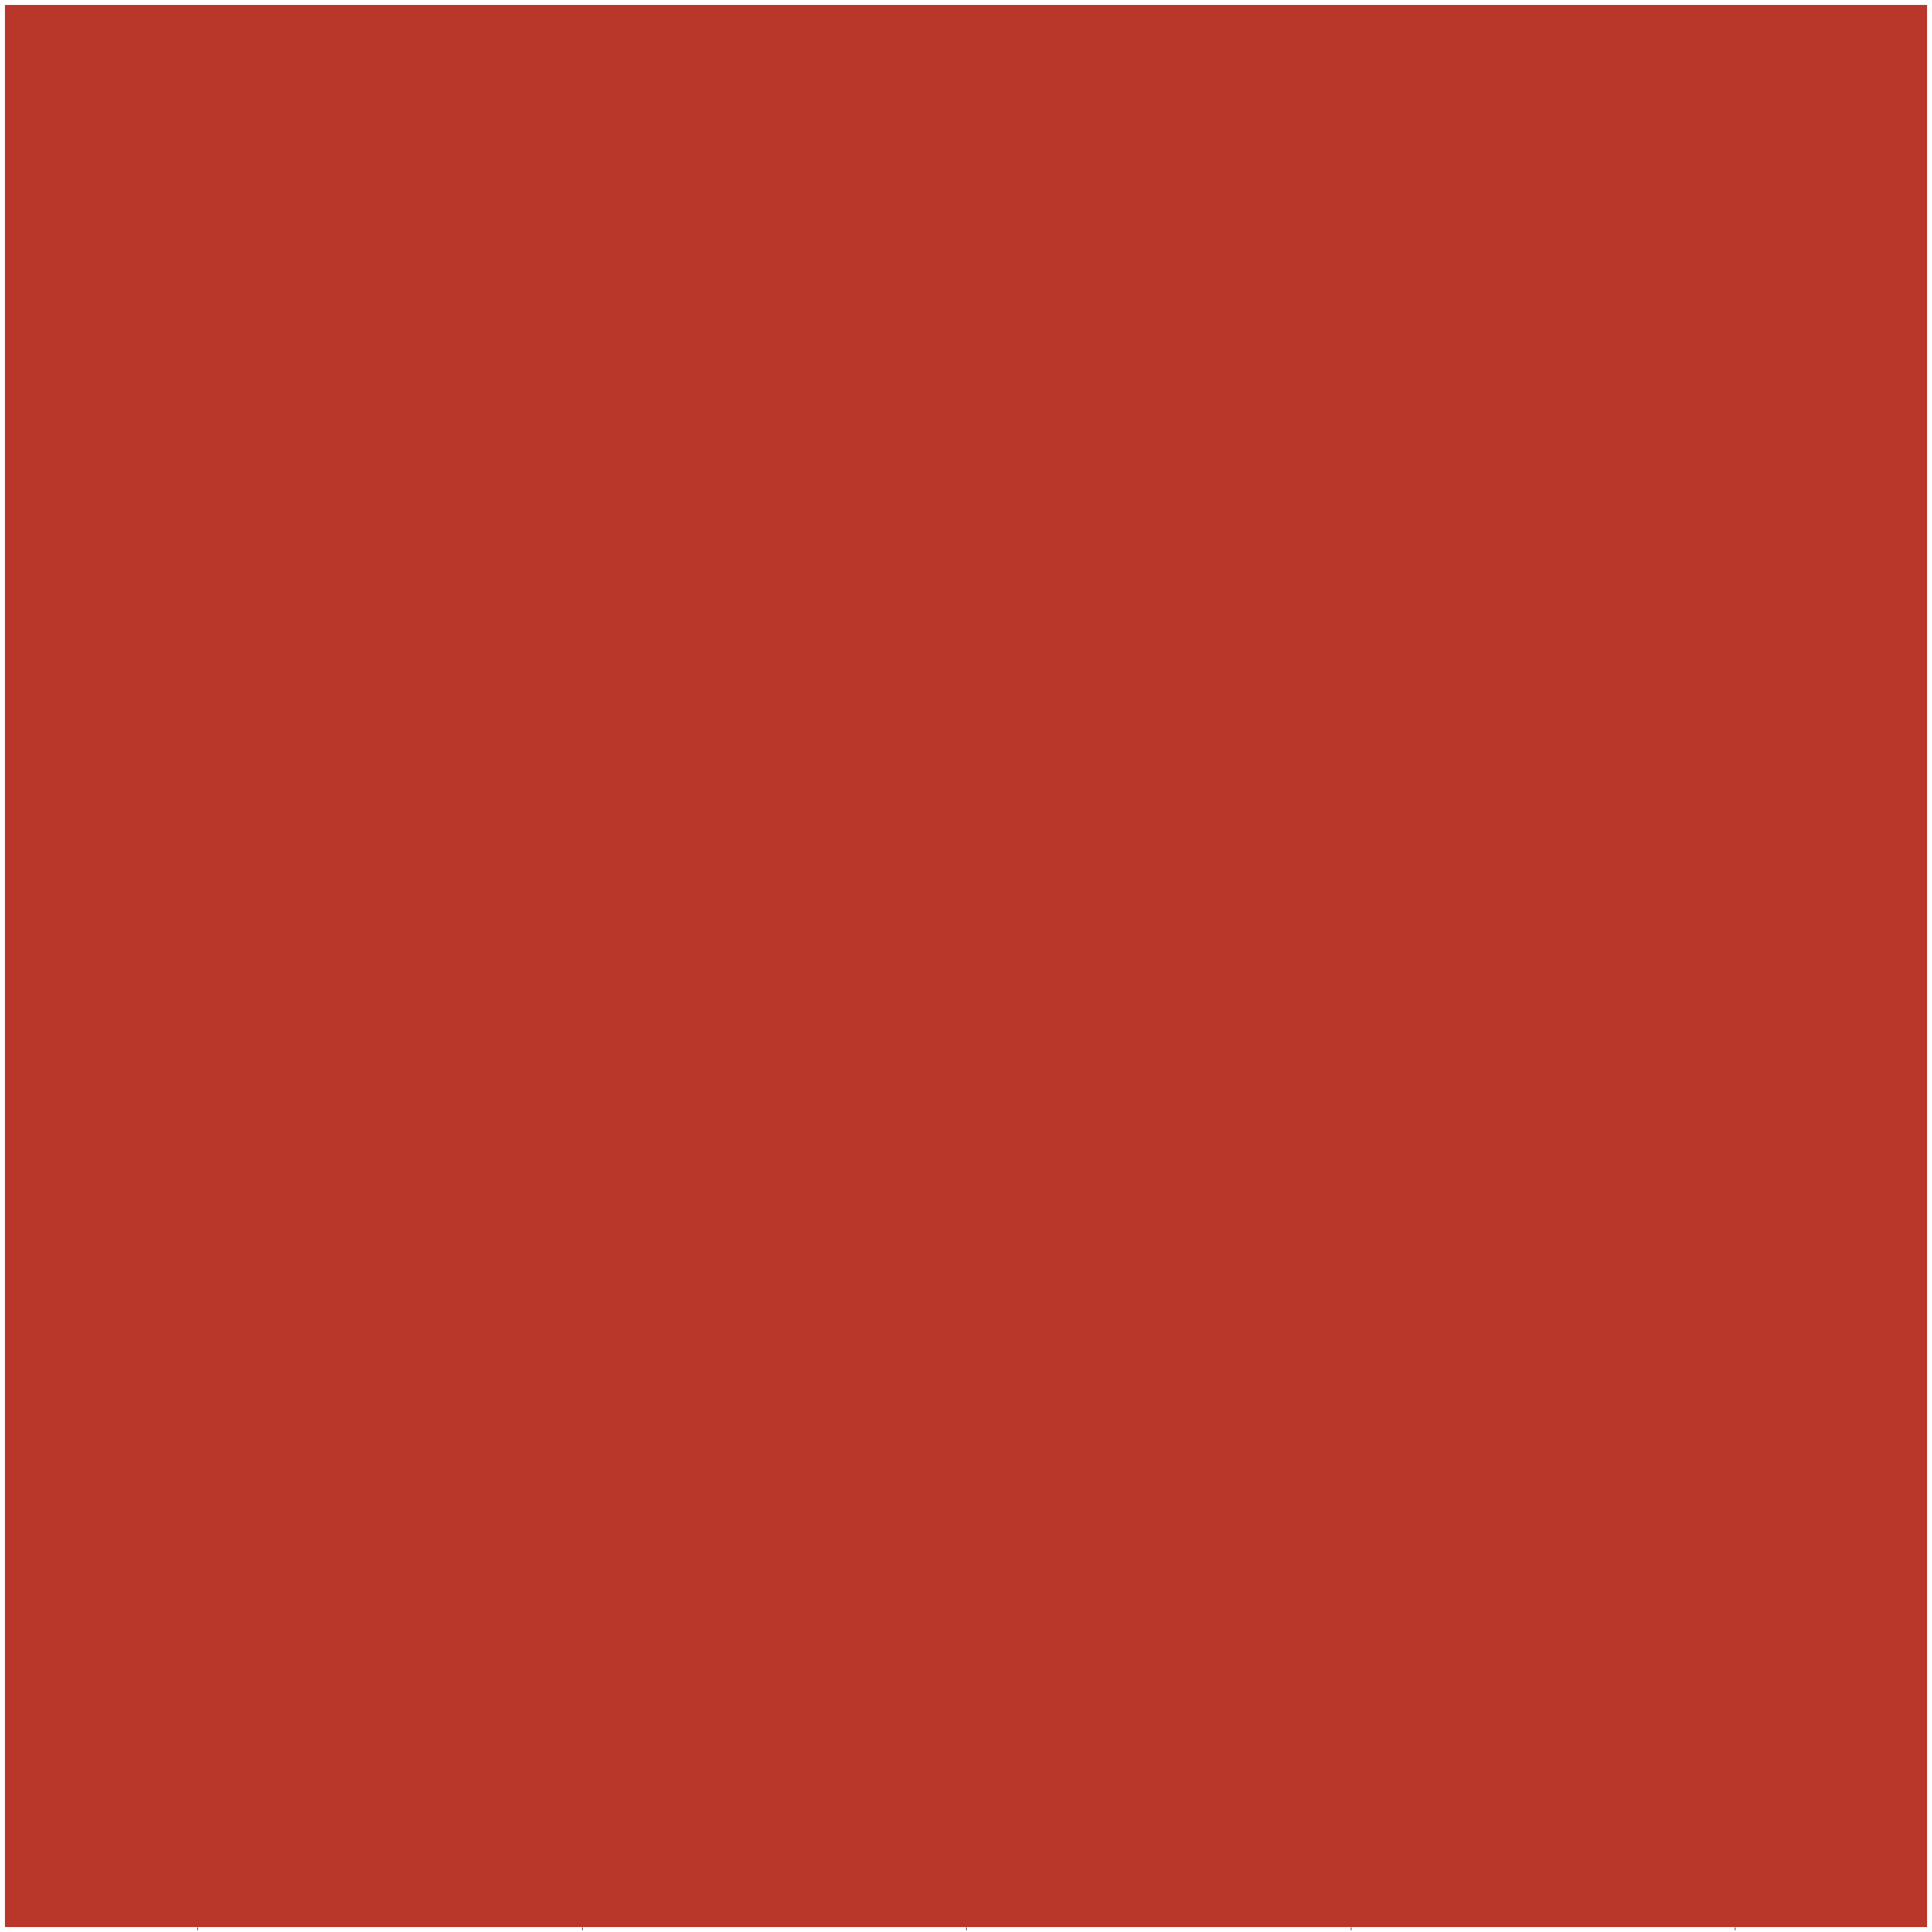

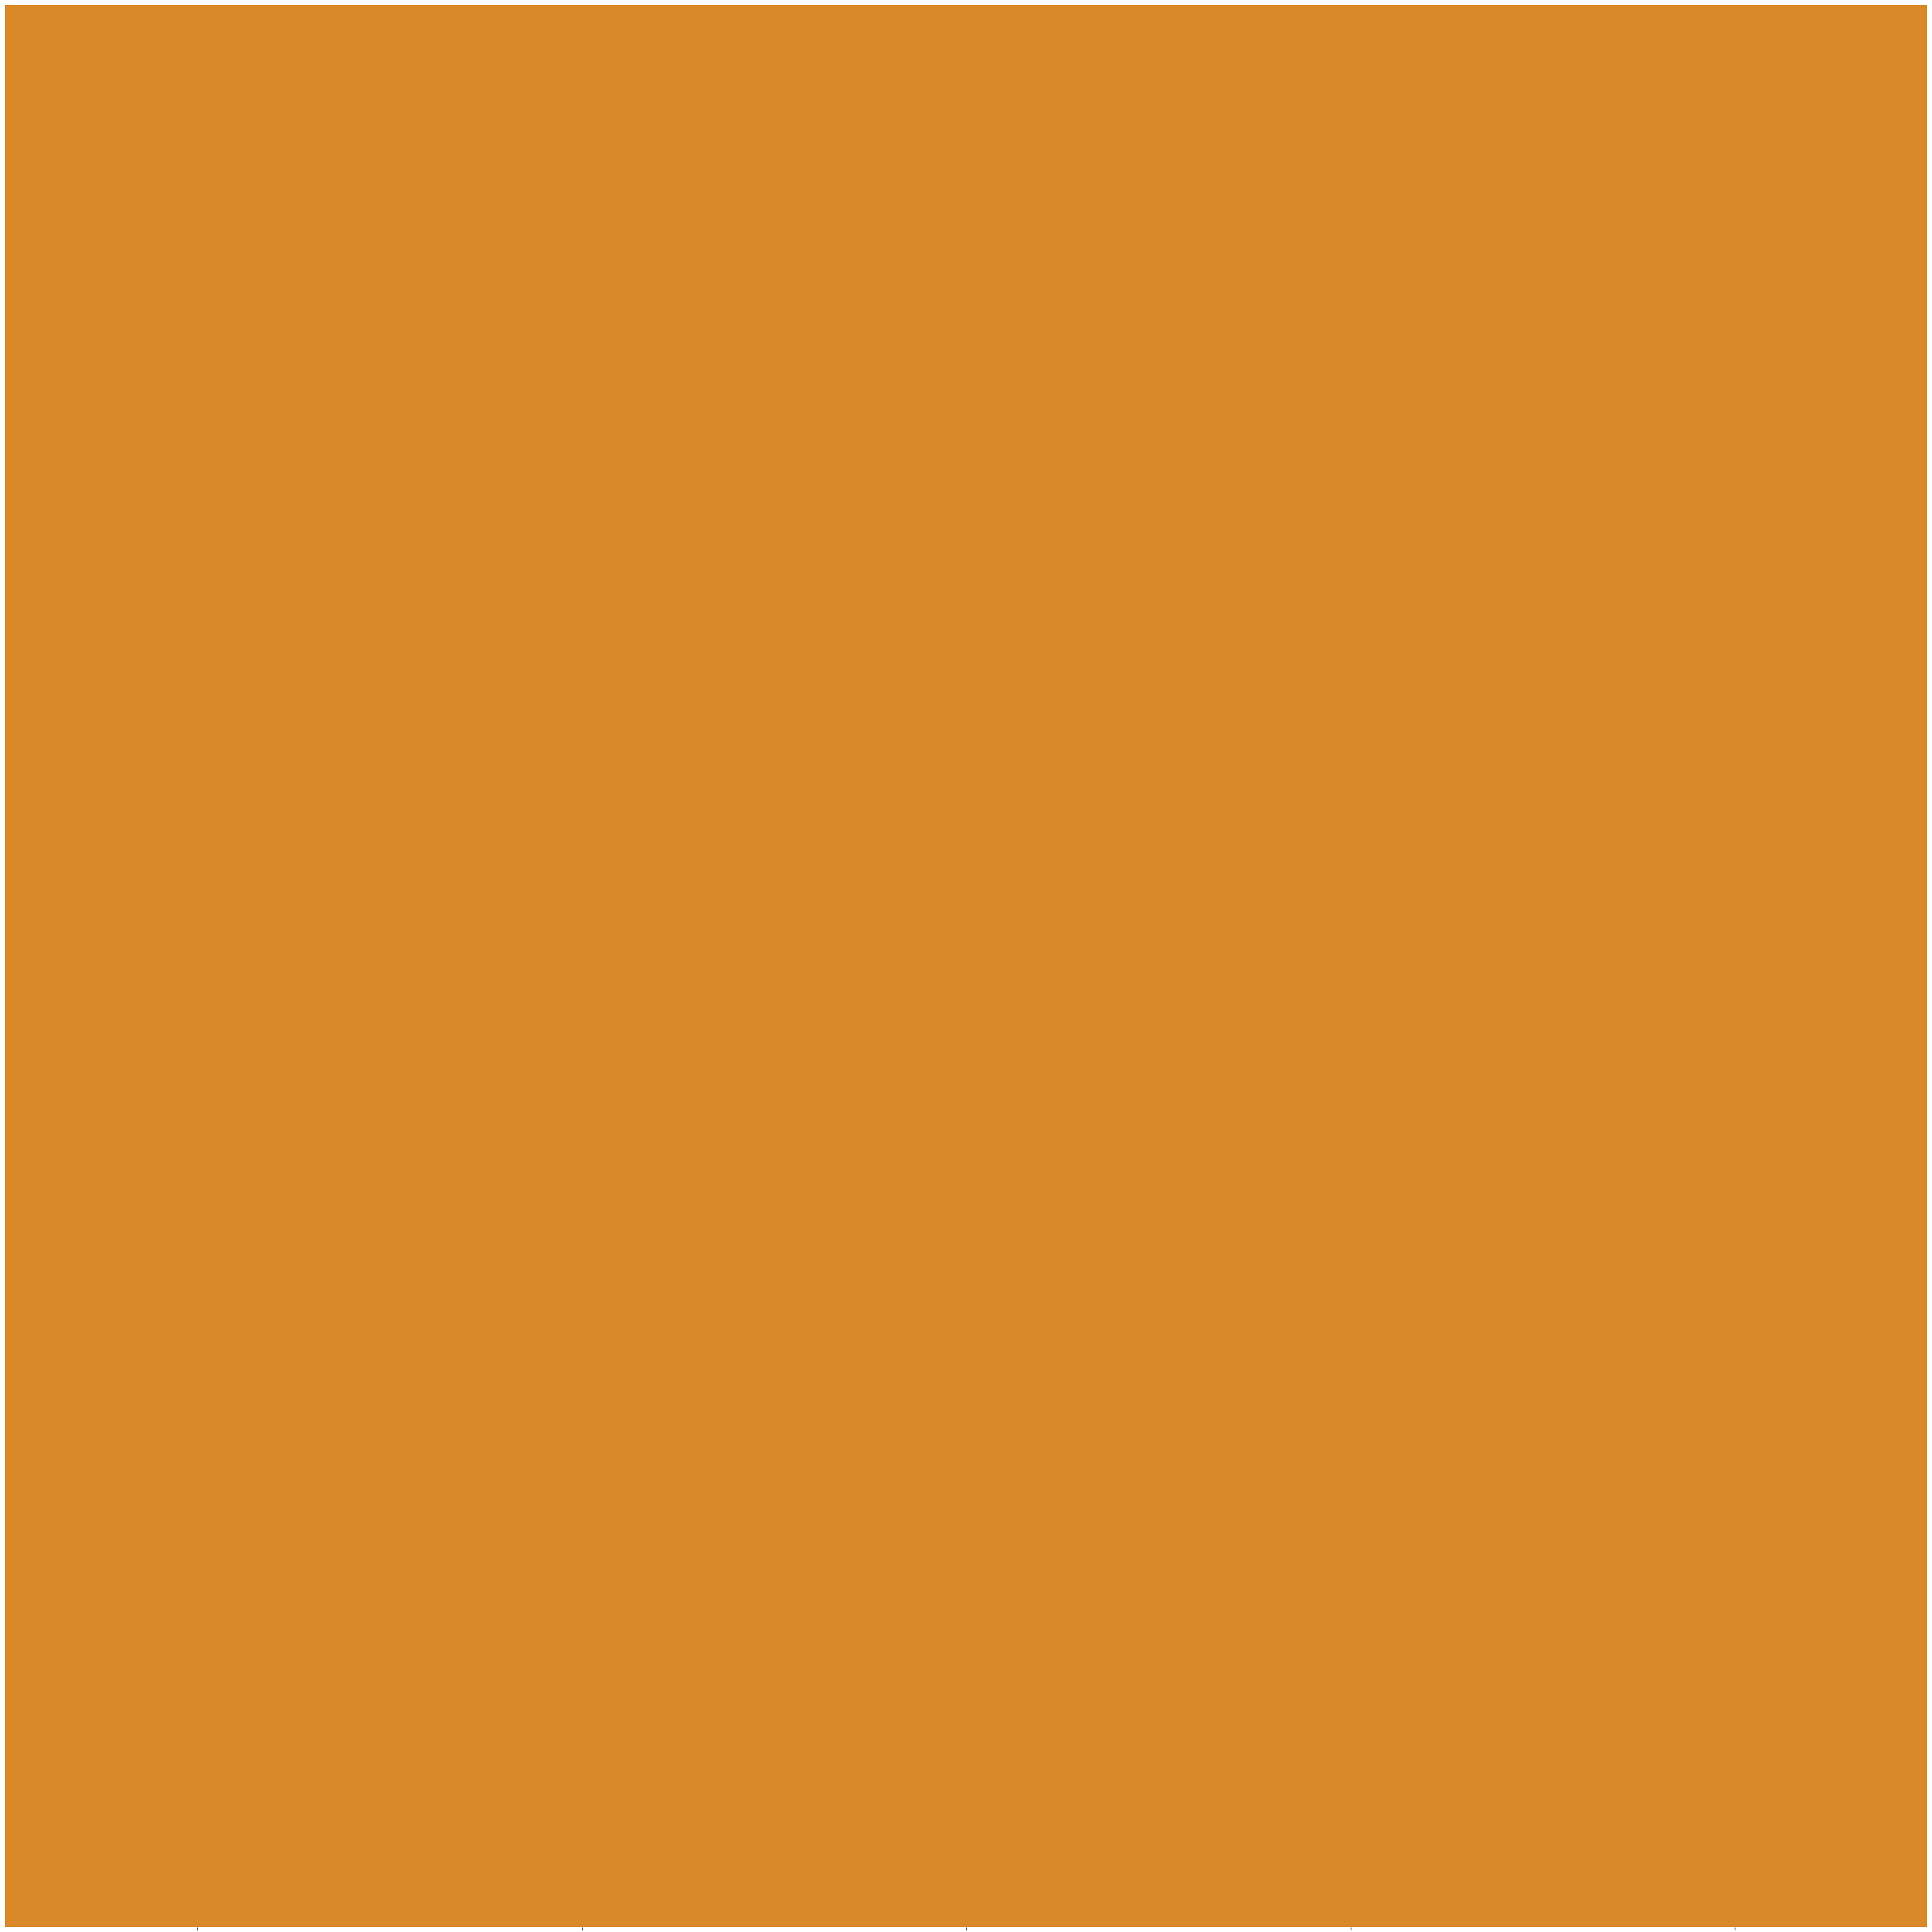

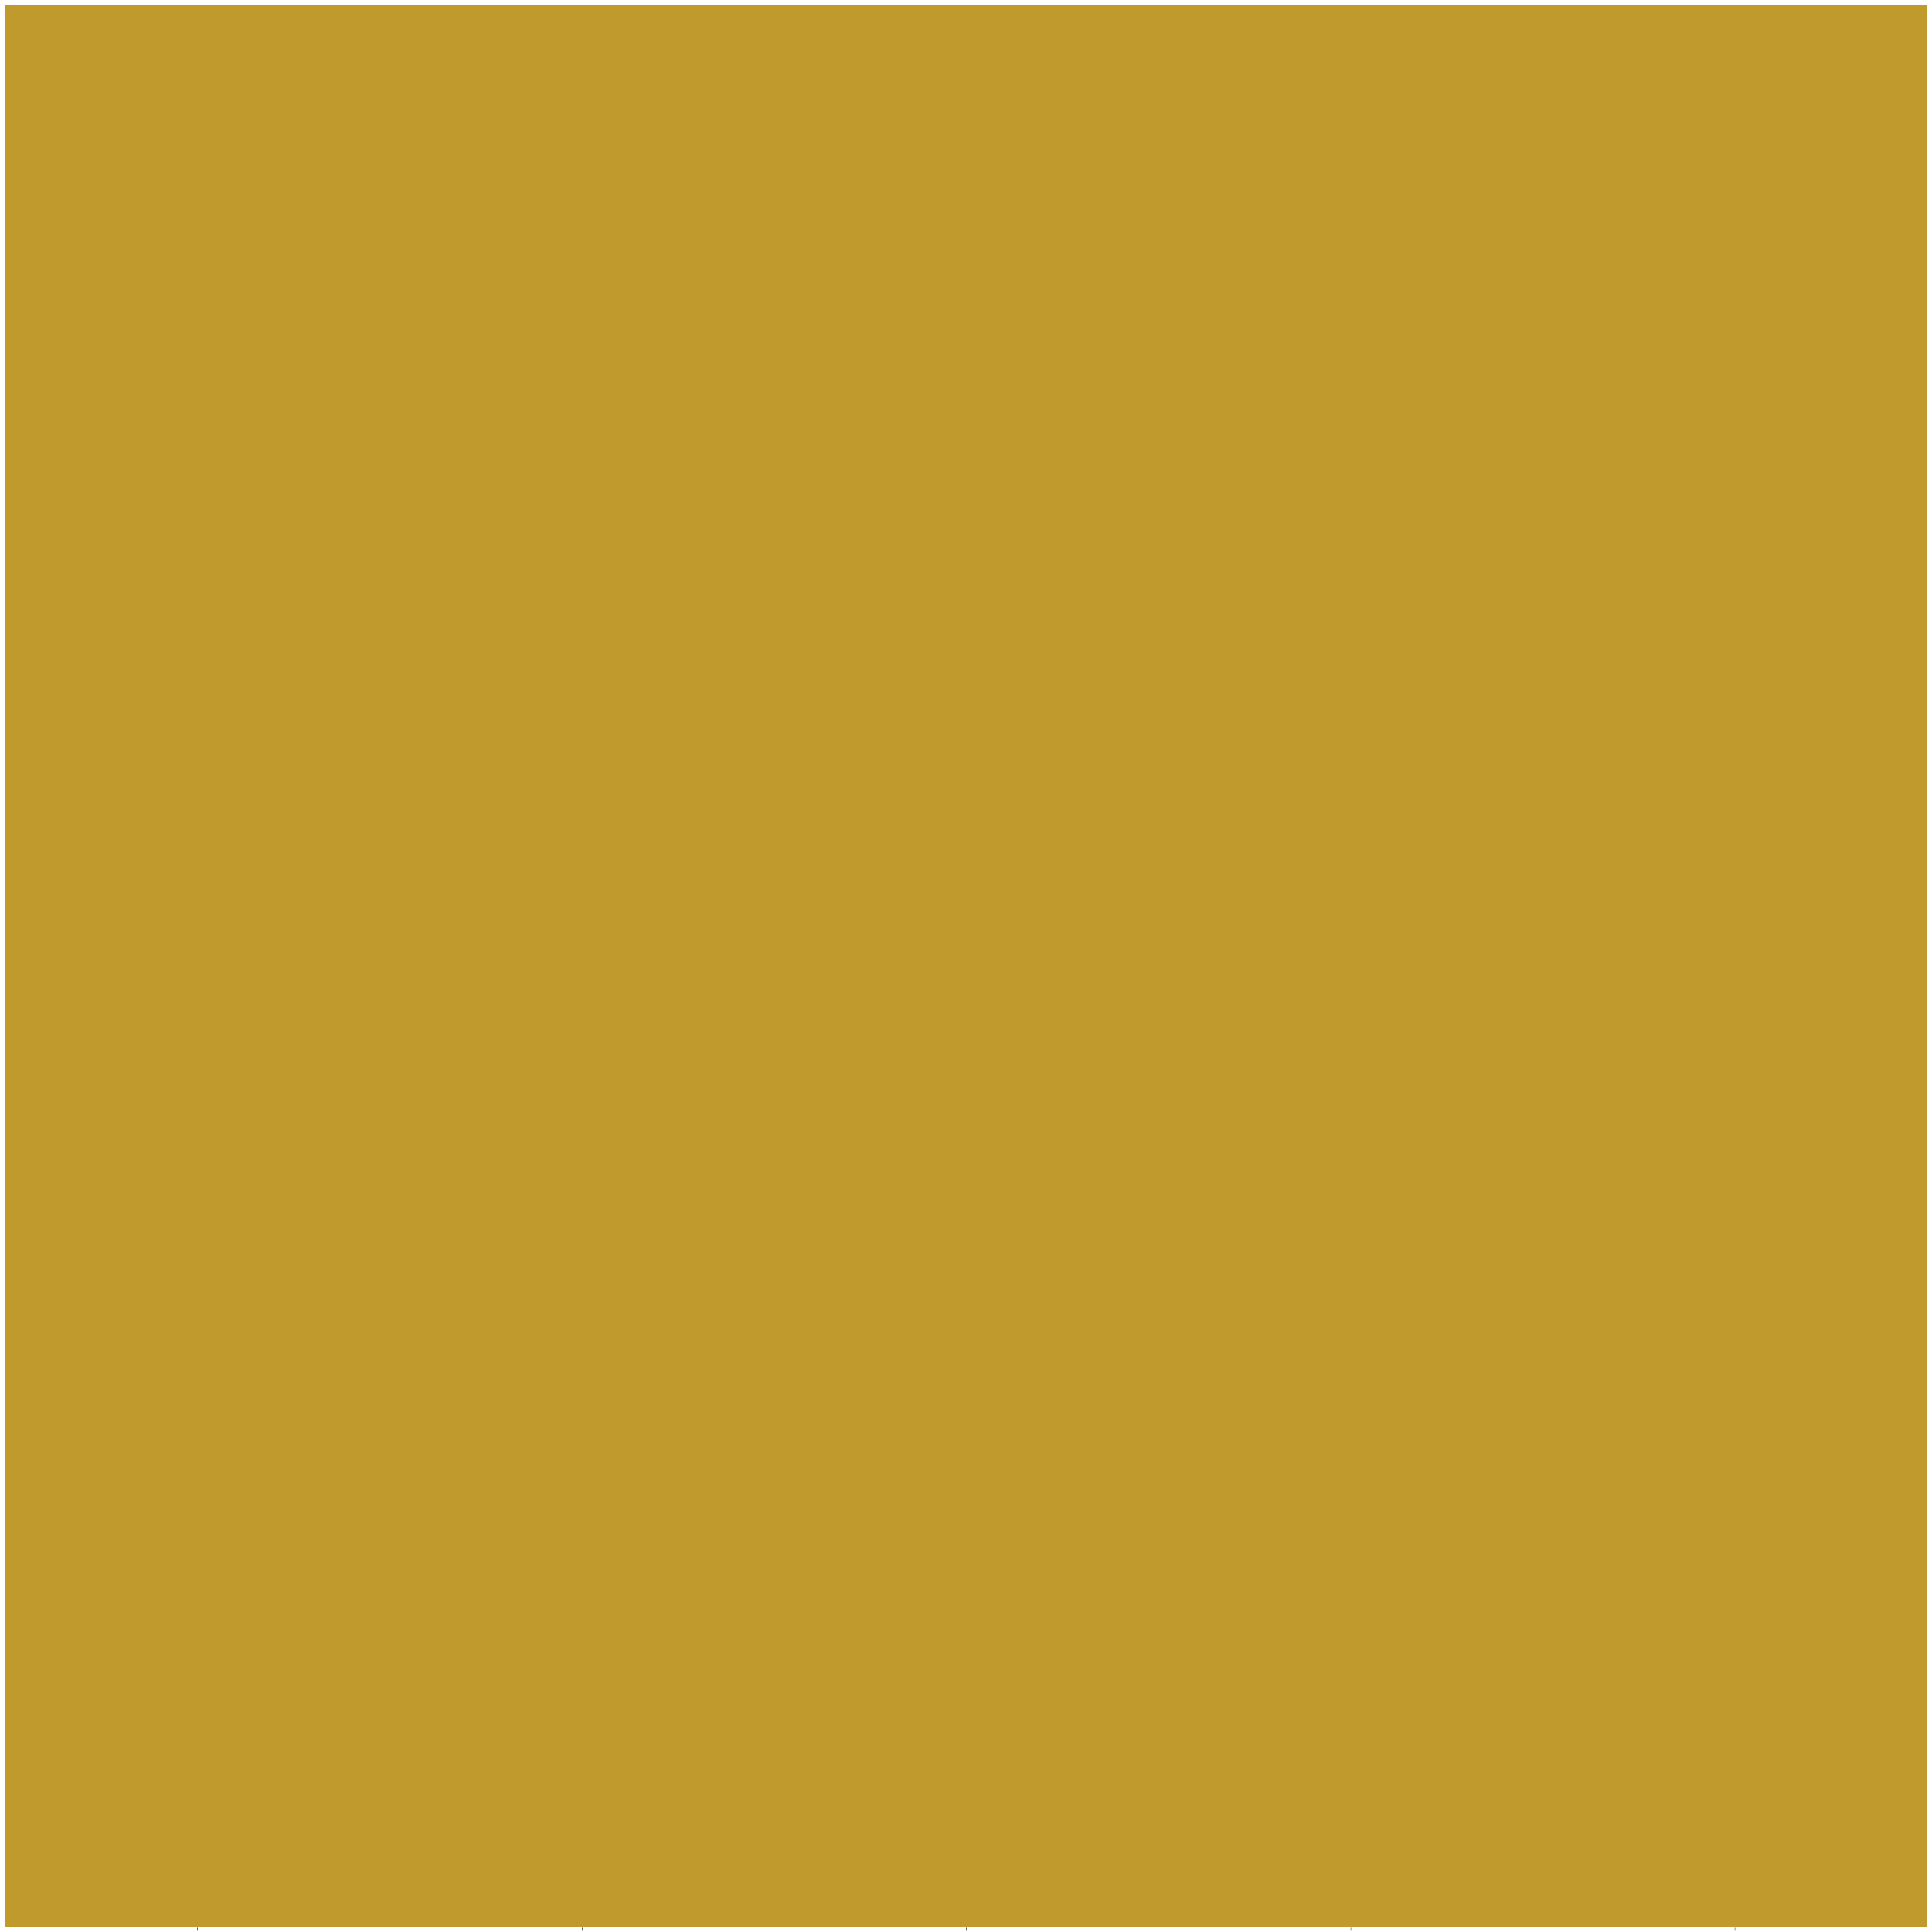

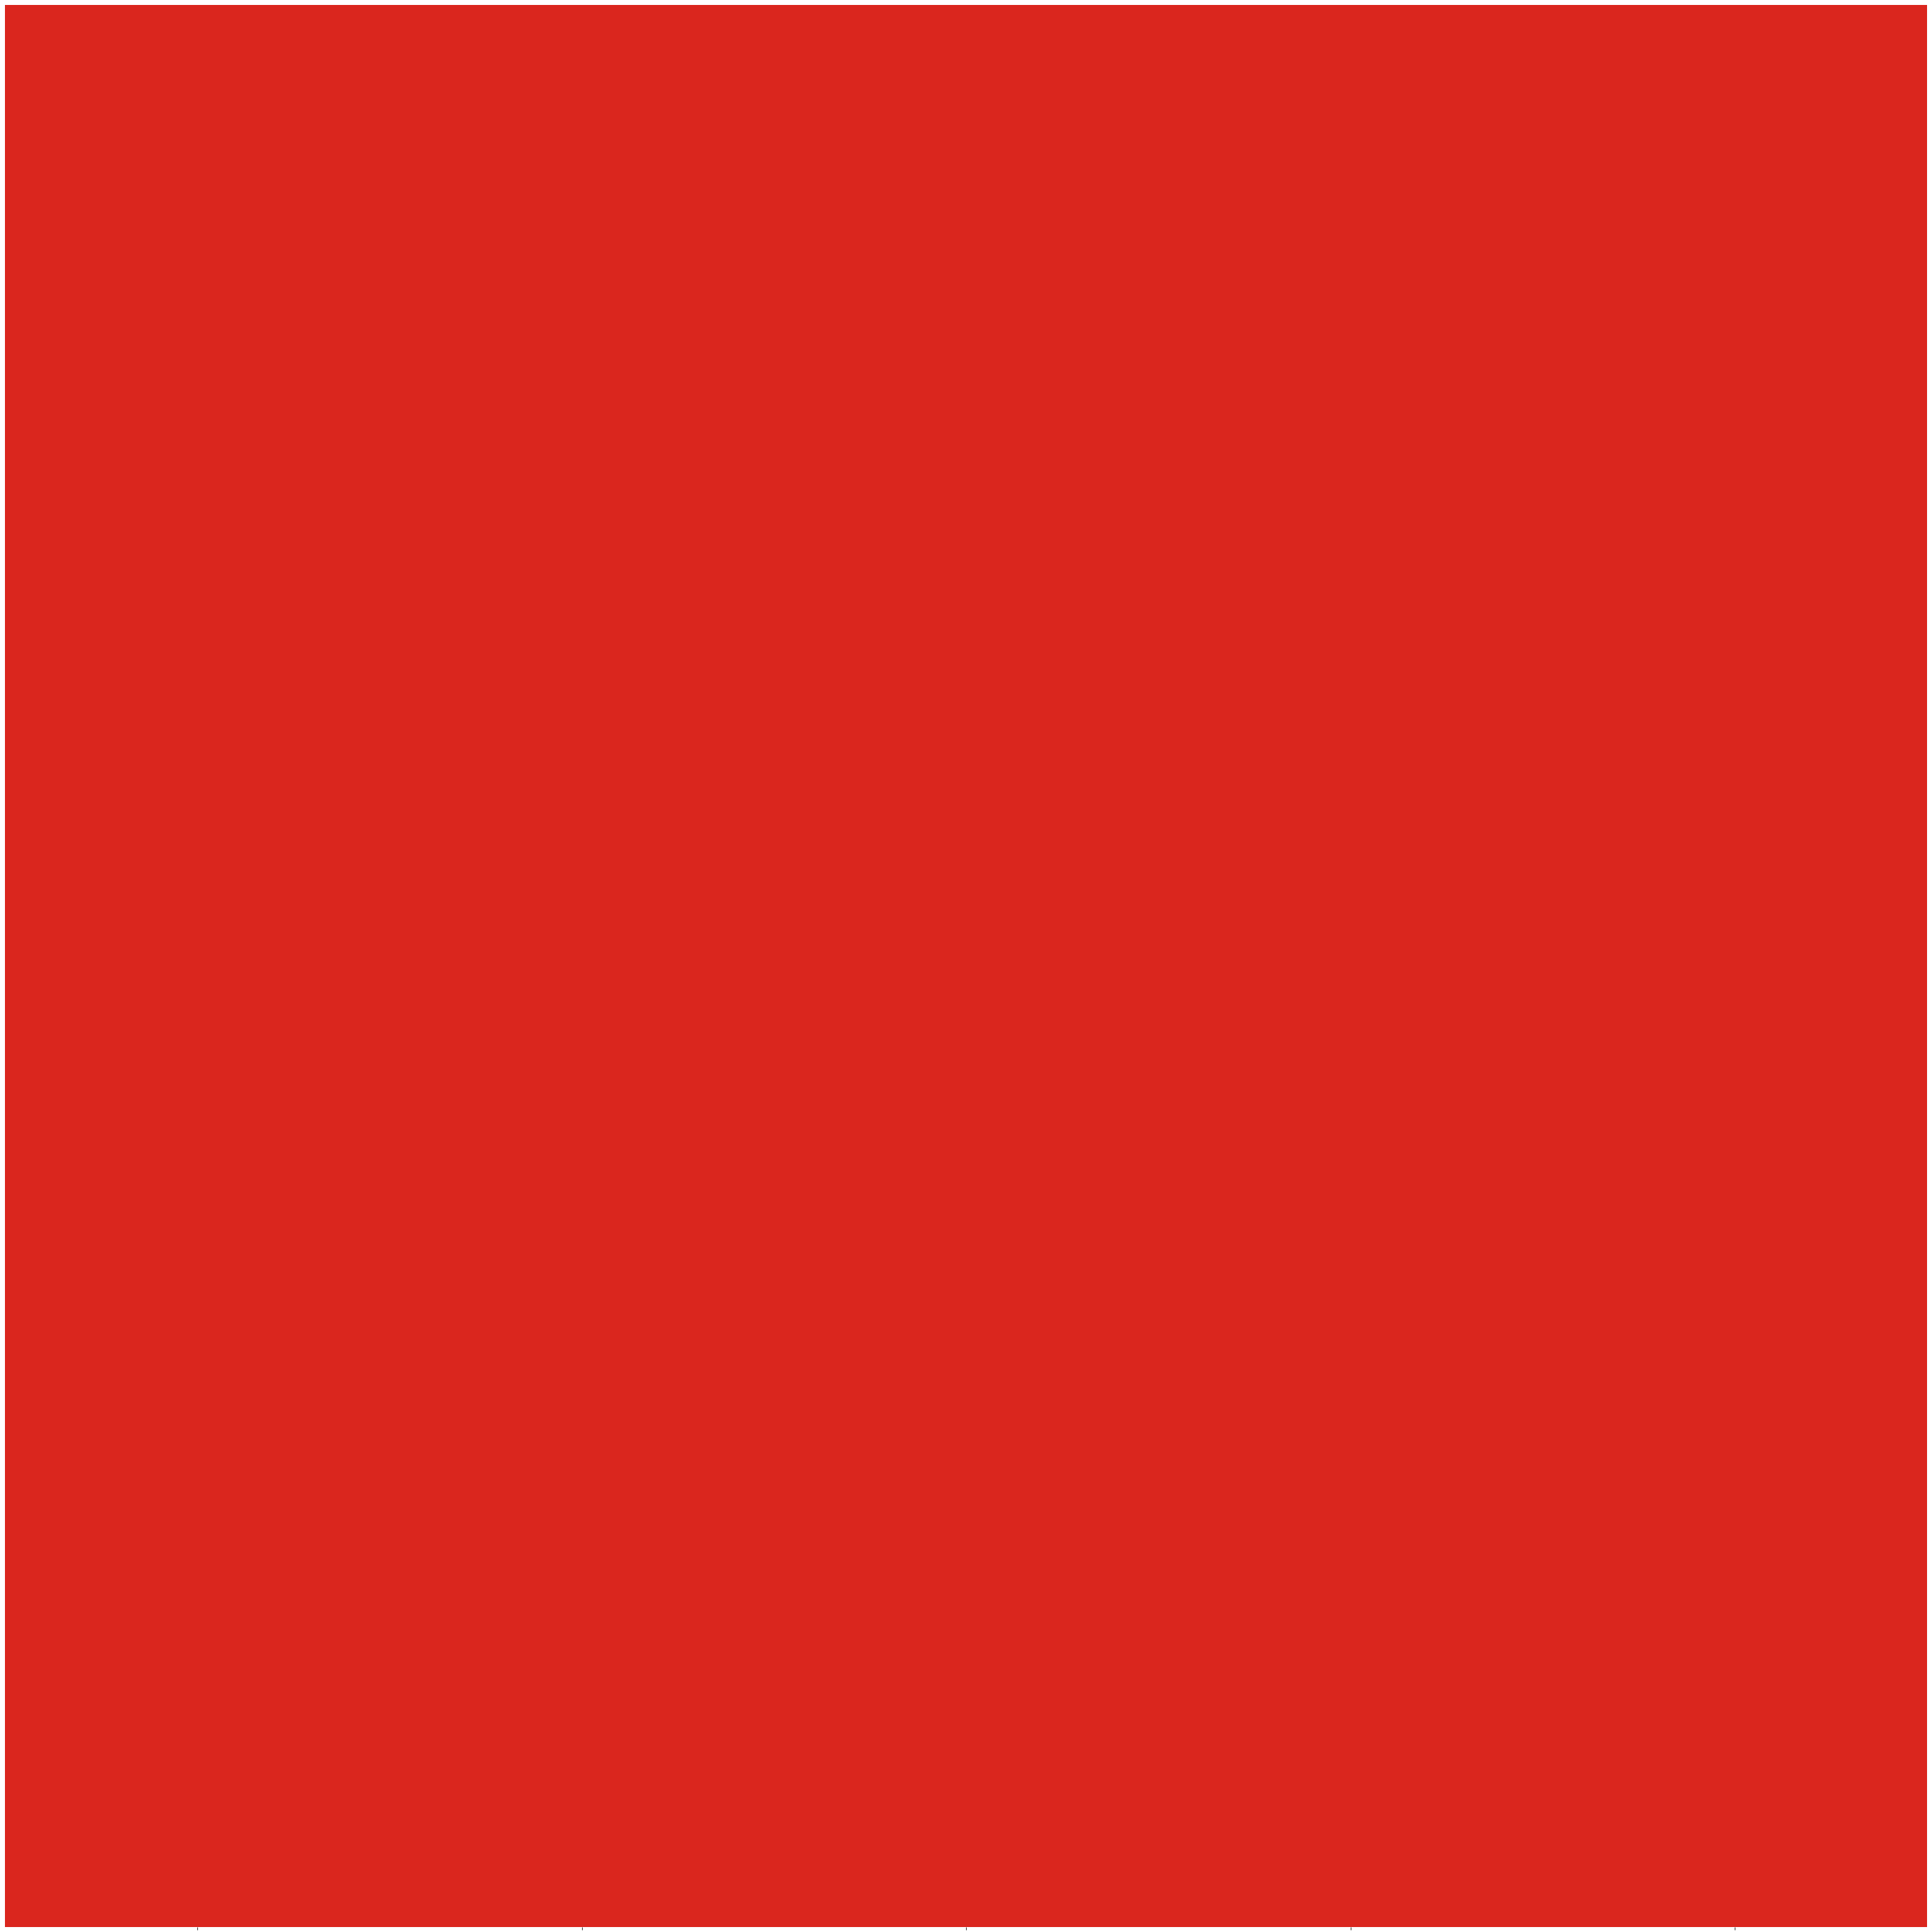

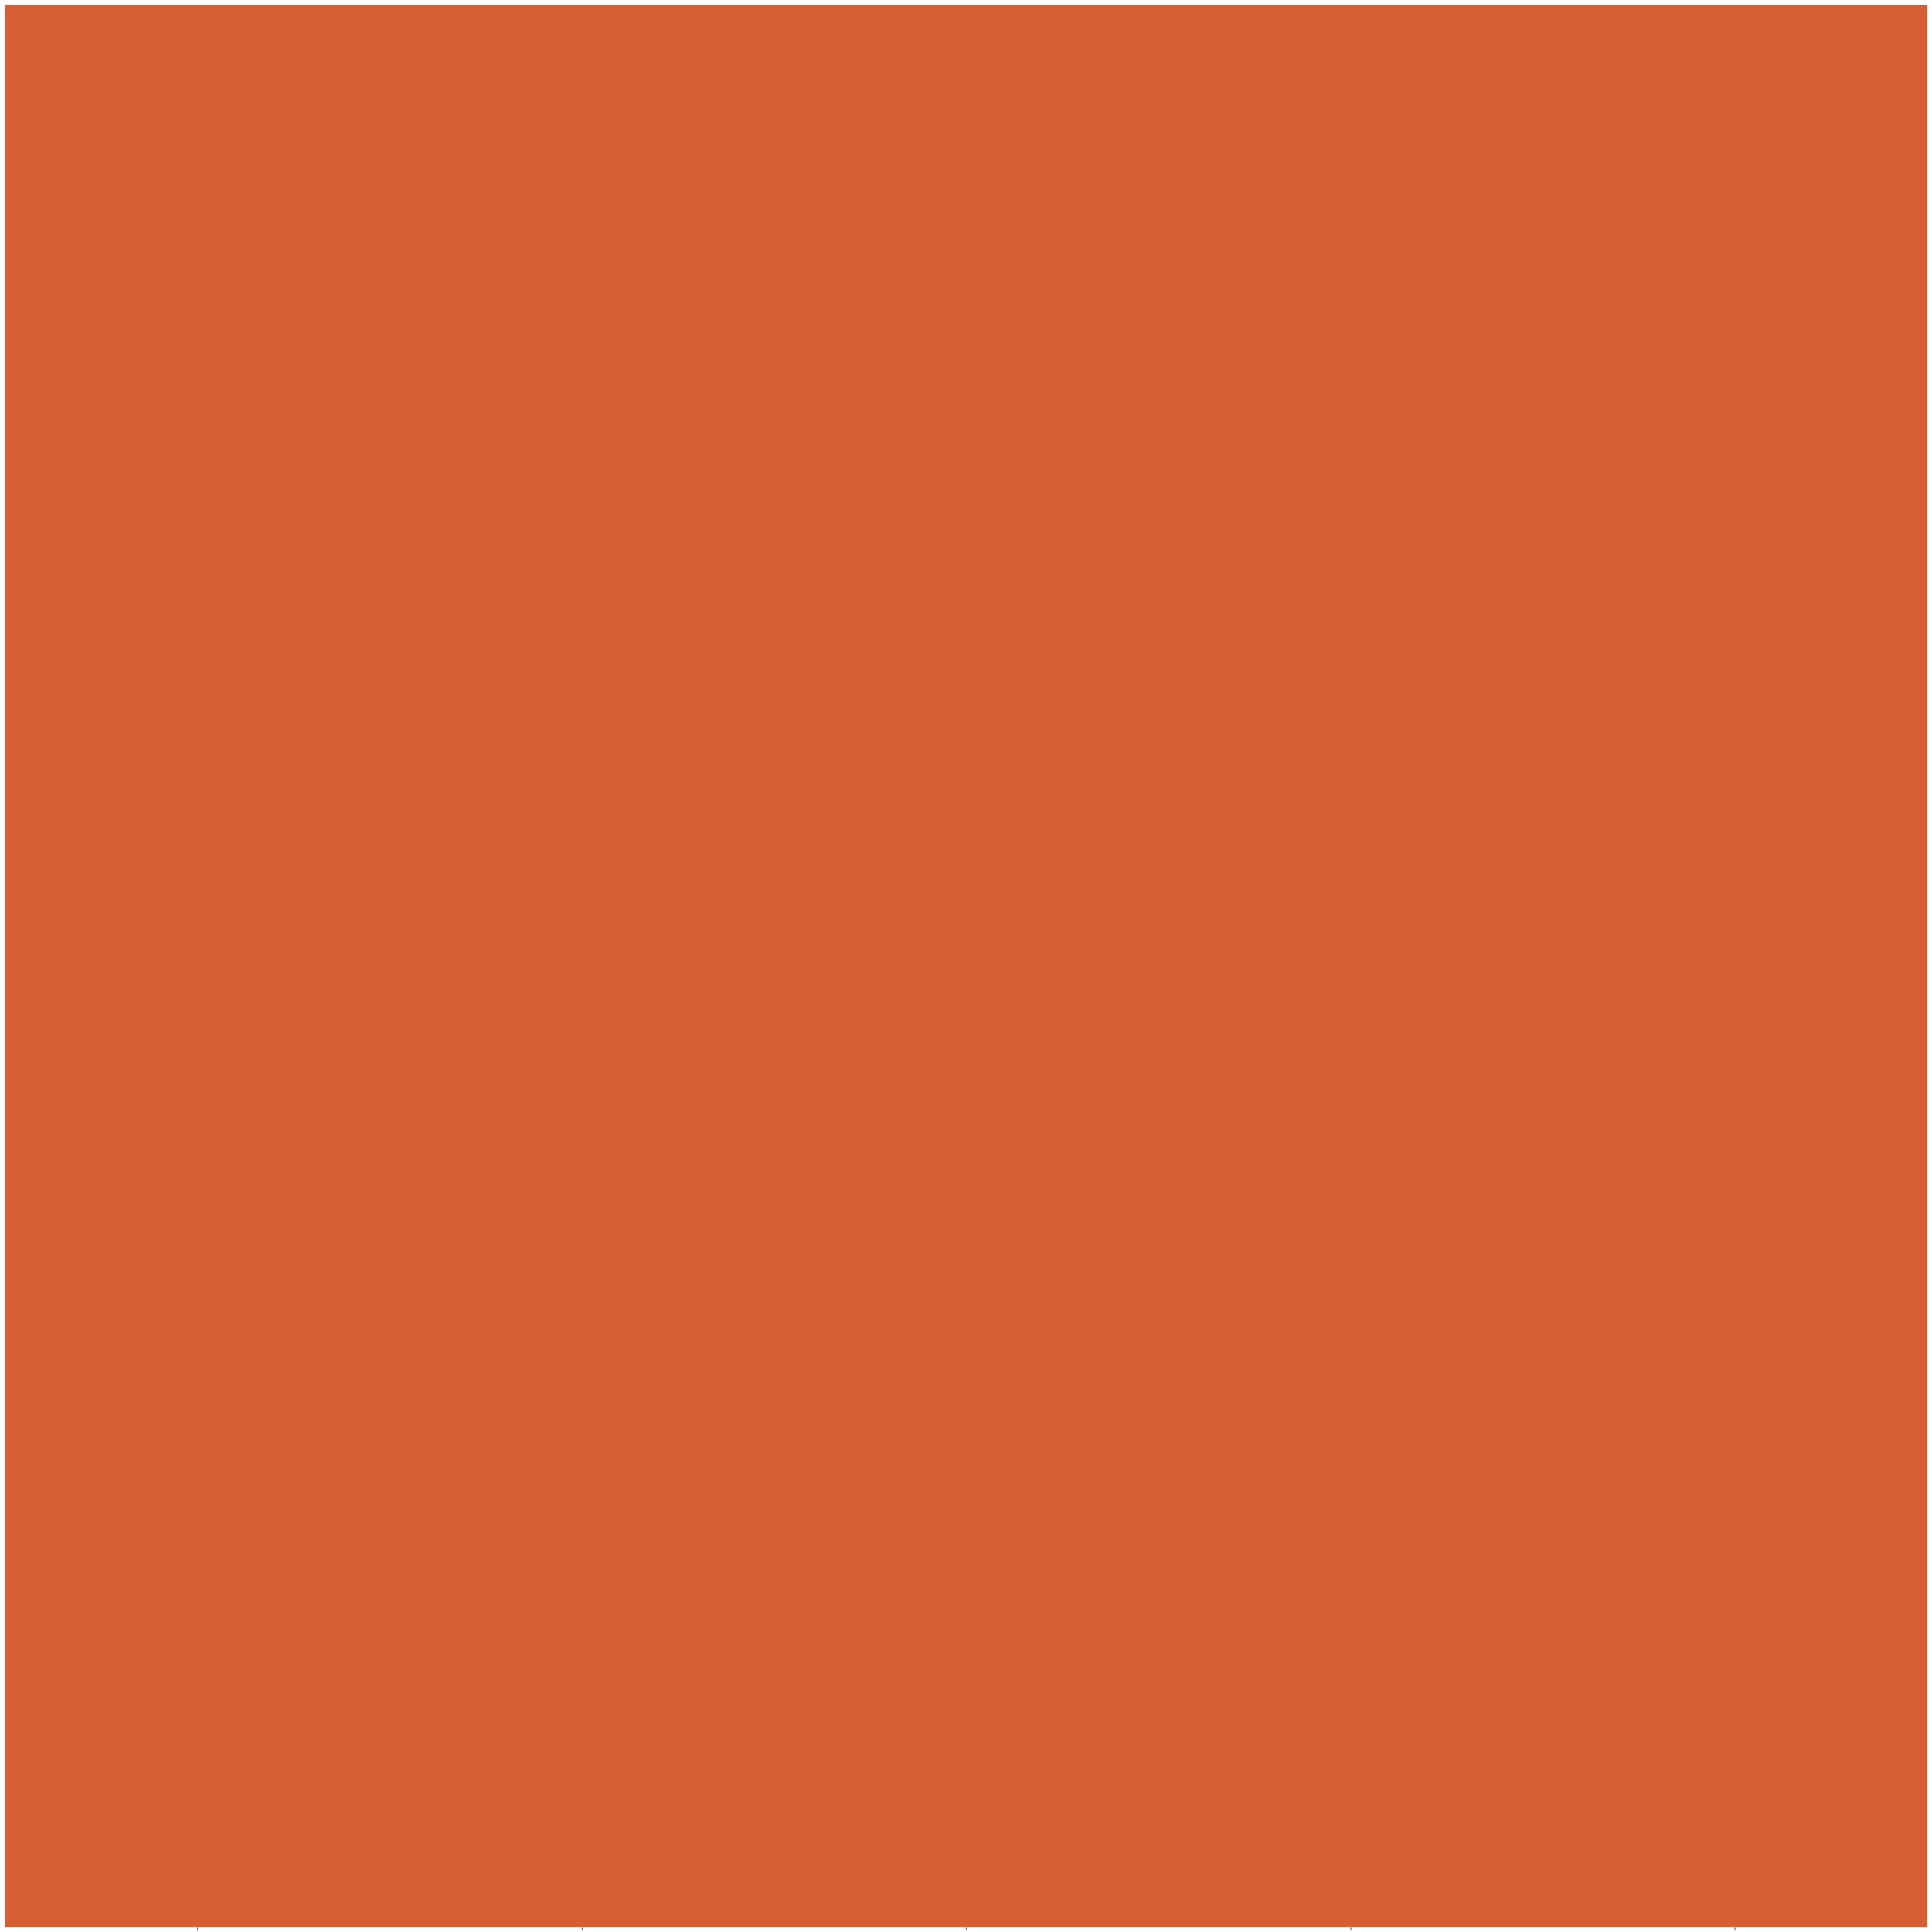

In [99]:
# ploting the color patches per movement
for i in range(len(movement_colors)):
    plt.figure(figsize=(50,50))
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(True)
    plt.xticks(visible=False)

    sns.despine(bottom = True, left = True)
    plt.imshow([[(movement_colors.color[i][0]/255, movement_colors.color[i][1]/255, movement_colors.color[i][2]/255)]])
    
    # saving the color patches
    plt.savefig(str(i)+ ' - '+movement_colors.movement[i]+'color patch.jpg', transparent=True)
    plt.show()

**Apendix: I forgot to add the url to the big dataset, so i'll do it now**

In [2]:
# loading the clustered dataset
data_cluster = pd.read_csv("C:/Users/VideoMachine/IH-labs/art.i/CSV's/clustered/trainset_color_palletes_clustered.csv")

# droping some known duplicates
data_cluster = data_cluster.drop_duplicates(subset=['id'])

In [3]:
data_wiki = pd.read_csv("C:/Users/VideoMachine/IH-Lessons/Final Project/Big set/all_data_info.csv")

In [6]:
# small functions to flatten and do some regex replacements and converting dates to strings
# so they can be concatenated
import re

def rnd_str(x):
    try:
        return str(round(float(x)))
    except:
        return 'NAN'

def rep_dash(x):
    try:
        return re.sub('\\W+', '-', str(x)).lower()
    except:
        return 'NAN'

data_wiki.title = data_wiki.title.apply(rep_dash)
data_wiki.artist = data_wiki.artist.apply(rep_dash)
data_wiki.date = data_wiki.date.apply(rnd_str)

Generating the URL based on previous operations

In [8]:
base_url = 'https://www.wikiart.org/en/'
data_wiki['wiki_url'] = base_url+data_wiki.artist+'/'+data_wiki.title+'-'+data_wiki.date

In [9]:
data_wiki = data_wiki[(data_wiki.date != 'NAN') & (data_wiki.artist != 'NAN') & (data_wiki.title != 'NAN') & (data_wiki.source == 'wikiart')]
data_wiki = data_wiki[['new_filename', 'wiki_url']]
data_wiki.columns = ['id', 'wiki_url']
data_wiki = data_wiki.reset_index(drop = True)

In [10]:
data_wiki.head(3)

id                                           wiki_url
0  102257.jpg  https://www.wikiart.org/en/barnett-newman/urie...
1   75232.jpg  https://www.wikiart.org/en/barnett-newman/vir-...
2   49823.jpg  https://www.wikiart.org/en/hiroshige/small-bir...

Merging the dataframe with urls with the original dataframe and saving it to a new csv

In [11]:
merged = data_cluster.merge(data_wiki, on='id', how='right')
merged = merged.drop(columns= 'Unnamed: 0')
merged = merged.dropna(subset=['artiste'])

In [12]:
merged.to_csv("C:/Users/VideoMachine/IH-labs/art.i/CSV's/clustered/trainset_color_palletes_clustered_url.csv", index=False)

**Same process to the chicago museum**

In [137]:
# loading the clustered dataset
data_cluster = pd.read_csv("C:/Users/VideoMachine/IH-labs/art.i/CSV's/clustered/artic_edu_Valid_paintings_pallete_clustered.csv")
data_cluster = data_cluster.drop(columns = 'Unnamed: 0')

In [142]:
data_url = pd.read_csv("C:/Users/VideoMachine/IH-labs/art.i/CSV's/artic_edu_Valid_paintings.csv")
data_url = data_url.drop(columns = 'Unnamed: 0')

In [144]:
data_url.head(2)

date_start artwork_type_title                   artist_display  \
0      1880.0           Painting  Paul Cezanne\nFrench, 1839-1906   
1      1873.0           Painting  Paul Cezanne\nFrench, 1839-1906   

          style_title  artist_title     id  \
0  Post-Impressionism  Paul Cezanne  16487   
1       Impressionism  Paul Cezanne  14556   

                               image_id  \
0  d4ca6321-8656-3d3f-a362-2ee297b2b813   
1  90bc0cec-0d4e-9af5-3912-52a082a428e5   

                                       title  \
0  The Bay of Marseille, Seen from L'Estaque   
1                     Auvers, Panoramic View   

                                 publication_history  artwork_type_id    h  \
0  F. Jourdain, Cézanne (Paris, 1914), pl. 42.\n\...              1.0  194   
1  Journal des Arts 43 (July 9, 1921), p. 2.\n\nD...              1.0   99   

    s   l  
0  10  58  
1   8  41

In [157]:
def regex_f(x):
    return re.sub('\\W+', '-', x).lower()

data_url.title = data_url.title.apply(regex_f)
data_url.id = data_url.id.apply(rnd_str)

In [158]:
base_url = 'https://www.artic.edu/artworks/'

In [159]:
data_url['wiki_url'] = base_url+data_url.id+'/'+data_url.title

In [162]:
data_cluster.shape

(1484, 23)

In [168]:
data_url = data_url[['image_id','wiki_url']]
data_url.columns = ['id', 'wiki_url']

In [169]:
data_url.head(1)

id  \
0  d4ca6321-8656-3d3f-a362-2ee297b2b813   

                                            wiki_url  
0  https://www.artic.edu/artworks/16487/the-bay-o...

In [165]:
data_cluster.head(1)

year                        small_bio               style       artiste  \
0  1880.0  Paul Cezanne\nFrench, 1839-1906  Post-Impressionism  Paul Cezanne   

                                     id  \
0  d4ca6321-8656-3d3f-a362-2ee297b2b813   

                                       title  \
0  The Bay of Marseille, Seen from L'Estaque   

                                 publication_history      c1_r      c1_g  \
0  F. Jourdain, Cézanne (Paris, 1914), pl. 42.\n\...  0.675297  0.542384   

       c1_b  ...      c3_r     c3_g      c3_b      c4_r      c4_g      c4_b  \
0  0.408268  ...  0.299851  0.43381  0.508885  0.541464  0.626463  0.638488   

       c5_r      c5_g      c5_b  color_cluster  
0  0.322627  0.394819  0.365084             13  

[1 rows x 23 columns]

In [175]:
merged = data_url.merge(data_cluster, on='id', how='right')

In [177]:
merged.to_csv("C:/Users/VideoMachine/IH-labs/art.i/CSV's/clustered/artic_edu_Valid_paintings_pallete_clustered_url.csv")

**Another class quick fix, I joined some classes so naturally they need to be merged in the datasets. It has to be done in all 2 datasets**

In [11]:
data = pd.read_csv("C:/Users/VideoMachine/IH-labs/art.i/CSV's/clustered/trainset_color_palletes_clustered_url.csv")

In [12]:
data['style'][(data['style'] == 'Romanticism') | (data['style'] == 'Realism')] = 'Romanticism + Realism'
data['style'][(data['style'] == 'Baroque') | (data['style'] == 'Rococo')] = 'Baroque + Rococo'
data['style'][(data['style'] == 'Post-Impressionism')] = 'Impressionism'

data.to_csv("C:/Users/VideoMachine/IH-labs/art.i/CSV's/clustered/trainset_color_palletes_clustered_url.csv")

C:\Users\VideoMachine\AppData\Local\Temp\ipykernel_21144\2696812205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['style'][(data['style'] == 'Romanticism') | (data['style'] == 'Realism')] = 'Romanticism + Realism'
C:\Users\VideoMachine\AppData\Local\Temp\ipykernel_21144\2696812205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['style'][(data['style'] == 'Baroque') | (data['style'] == 'Rococo')] = 'Baroque + Rococo'
C:\Users\VideoMachine\AppData\Local\Temp\ipykernel_21144\2696812205.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in t

***

In [9]:
data[data['style']=='Baroque + Rococo']

year               artiste             style         id  in_train  \
14     1612.0         Clara Peeters  Baroque + Rococo  28363.jpg      True   
17     1635.0            Gerrit Dou  Baroque + Rococo  59486.jpg      True   
20     1783.0   Thomas Gainsborough  Baroque + Rococo   1164.jpg      True   
55     1645.0    Heinrich Schonfeld  Baroque + Rococo  49864.jpg      True   
108    1623.0  Gian Lorenzo Bernini  Baroque + Rococo  24036.jpg      True   
...       ...                   ...               ...        ...       ...   
49152  1761.0          Allan Ramsay  Baroque + Rococo   9529.jpg      True   
49164  1633.0        Judith Leyster  Baroque + Rococo  53034.jpg      True   
49282  1676.0        Doces e Flores  Baroque + Rococo  70686.jpg      True   
49349  1745.0          Allan Ramsay  Baroque + Rococo   4657.jpg      True   
49412  1647.0     Eustache Le Sueur  Baroque + Rococo  58747.jpg      True   

           c1_r      c1_g      c1_b      c2_r      c2_g  ...  \
14     0.352146  0.227627  0.130118  0.104035  0.076904  ...   
17     0.710311  0.571303  0.384244  0.091258  0.090172  ...   
20     0.207452  0.161374  0.083641  0.575260  0.519002  ...   
55     0.250774  0.150728  0.078235  0.367923  0.269930  ...   
108    0.182099  0.144850  0.056498  0.615378  0.462920  ...   
...         ...       ...       ...       ...       ...  ...   
49152  0.099775  0.069551  0.068489  0.524837  0.455446  ...   
49164  0.268109  0.215432  0.243226  0.789413  0.620349  ...   
49282  0.088622  0.051249  0.024656  0.675880  0.494879  ...   
49349  0.995995  0.995740  0.994890  0.248522  0.206333  ...   
49412  0.419935  0.380054  0.375198  0.085659  0.064062  ...   

                       rgb_2                  rgb_3                  rgb_4  \
14        [27.0, 20.0, 13.0]   [160.0, 133.0, 86.0]     [52.0, 36.0, 23.0]   
17        [23.0, 23.0, 24.0]  [254.0, 254.0, 253.0]     [57.0, 49.0, 47.0]   
20      [147.0, 132.0, 85.0]    [112.0, 96.0, 54.0]     [83.0, 68.0, 33.0]   
55        [94.0, 69.0, 41.0]  [201.0, 196.0, 171.0]     [27.0, 18.0, 13.0]   
108     [157.0, 118.0, 62.0]    [109.0, 69.0, 20.0]   [206.0, 158.0, 82.0]   
...                      ...                    ...                    ...   
49152   [134.0, 116.0, 82.0]  [225.0, 202.0, 159.0]     [87.0, 58.0, 39.0]   
49164  [201.0, 158.0, 108.0]    [167.0, 89.0, 77.0]     [40.0, 33.0, 41.0]   
49282   [172.0, 126.0, 82.0]     [70.0, 40.0, 18.0]  [212.0, 190.0, 159.0]   
49349     [63.0, 53.0, 40.0]    [100.0, 67.0, 46.0]     [30.0, 18.0, 12.0]   
49412     [22.0, 16.0, 16.0]  [185.0, 164.0, 156.0]     [91.0, 53.0, 41.0]   

                       rgb_5  avg_r  avg_g  avg_b             avg_color  \
14       [120.0, 89.0, 56.0]   90.0   67.0   42.0    (90.0, 67.0, 42.0)   
17       [117.0, 91.0, 71.0]  126.0  112.0   99.0  (126.0, 112.0, 99.0)   
20     [182.0, 169.0, 126.0]  115.0  101.0   64.0  (115.0, 101.0, 64.0)   
55      [132.0, 116.0, 91.0]  104.0   88.0   67.0   (104.0, 88.0, 67.0)   
108        [19.0, 14.0, 5.0]  107.0   79.0   37.0   (107.0, 79.0, 37.0)   
...                      ...    ...    ...    ...                   ...   
49152  [180.0, 157.0, 118.0]  130.0  110.0   83.0  (130.0, 110.0, 83.0)   
49164    [104.0, 77.0, 74.0]  116.0   82.0   72.0   (116.0, 82.0, 72.0)   
49282    [133.0, 67.0, 28.0]  122.0   87.0   59.0   (122.0, 87.0, 59.0)   
49349  [150.0, 137.0, 123.0]  119.0  106.0   95.0  (119.0, 106.0, 95.0)   
49412  [126.0, 131.0, 142.0]  106.0   92.0   90.0   (106.0, 92.0, 90.0)   

       color_cluster                                           wiki_url  
14              21.0  https://www.wikiart.org/en/clara-peeters/still...  
17              19.0  https://www.wikiart.org/en/gerrit-dou/self-por...  
20              37.0  https://www.wikiart.org/en/thomas-gainsborough...  
55              19.0  https://www.wikiart.org/en/heinrich-schonfeld/...  
108              6.0  https://www.wikiart.org/en/gian-lorenzo-bernin...  
...              ... 

In [10]:
data = pd.read_csv("C:/Users/VideoMachine/IH-labs/art.i/CSV's/clustered/artic_edu_Valid_paintings_pallete_clustered_url.csv")

In [ ]:
data['style'][(data['style'] == 'Romanticism') | (data['style'] == 'Realism')] = 'Romanticism + Realism'
data['style'][(data['style'] == 'Post-Impressionism')] = 'Impressionism'

data.to_csv("C:/Users/VideoMachine/IH-labs/art.i/CSV's/clustered/artic_edu_Valid_paintings_pallete_clustered_url.csv")